In [44]:
import pandas as pd
import numpy as np
import plotly 
import geopy

In [45]:
orders_raw= pd.read_csv('ISyE 6202 2022 Caseworks 3.1 and 3.2 Orders.csv')
meta = pd.read_excel('ISyE 6202 2022 Caseworks 3.1 and 3.2 MetaData.xlsx')

xls = pd.ExcelFile('ISyE 6202 2022 Caseworks 3.1 and 3.2 MetaData.xlsx')
category = pd.read_excel(xls, 'Product Categorization')
dim = pd.read_excel(xls, 'Modular Package Dimensions')
sp_lead_times = pd.read_excel(xls, 'Supply Lead Times')
dilv_tim_com = pd.read_excel(xls, 'Delivery Time Commitment')

zips = pd.read_csv('ISyE 6202 2022 Caseworks 3.1 and 3.2 ZIP3 US.csv')

#zip_state= pd.read_csv('uszips.csv')

In [46]:
# specify dtype of each column
names = list(orders_raw.columns)
dtypes = ["datetime64[ns]",int,str,str,int,str,int]
orders_raw = orders_raw.astype(dict(zip(names,dtypes)))
orders_raw

Order_Date  Product product category sub-category  ZIP_3d Country  \
0      2019-01-01        1                A            f      70      US   
1      2019-01-01        1                A            f      70      US   
2      2019-01-01        1                A            f     115      US   
3      2019-01-01        1                A            f     191      US   
4      2019-01-01        1                A            f     272      US   
...           ...      ...              ...          ...     ...     ...   
713568 2019-12-31      771                Y            s     322      US   
713569 2019-12-31      771                Y            s     841      US   
713570 2019-12-31      771                Y            s     852      US   
713571 2019-12-31      777                Y            s     490      US   
713572 2019-12-31      778                Y            s     144      US   

        Quantity  
0             61  
1             84  
2             56  
3             65  
4             84  
...          ...  
713568        70  
713569        63  
713570        59  
713571        58  
713572        60  

[713573 rows x 7 columns]

In [47]:
states_2_letter = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [48]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [49]:
#daily demand globally
daily_demand_total=orders_raw.groupby(['Order_Date'])['Quantity'].sum()
daily_demand_total=pd.DataFrame(data = daily_demand_total).reset_index()

# Task 1

## a

In [50]:
orders=orders_raw.copy()
orders['ZIP_str'] = [str(x).zfill(3) + '00' for x in orders['ZIP_3d']]
zips['ZIP_3d'] = zips['ZIP3']
zips.drop(axis = 1, columns = ['ZIP3'])
orders = pd.merge(orders, zips, on='ZIP_3d')
orders

Order_Date  Product product category sub-category  ZIP_3d Country  \
0      2019-01-01        1                A            f      70      US   
1      2019-01-01        1                A            f      70      US   
2      2019-01-01        7                A            f      70      US   
3      2019-01-01        8                A            f      70      US   
4      2019-01-01      255                H            f      70      US   
...           ...      ...              ...          ...     ...     ...   
713568 2019-10-07      258                H            f     772      US   
713569 2019-12-05      255                H            f     772      US   
713570 2019-09-03      251                H            f     204      US   
713571 2019-11-10      370                L            m      59      US   
713572 2019-11-15      266                H            f     202      US   

        Quantity ZIP_str  ZIP3        Lat        Lon  
0             61   07000    70  40.667400 -74.114600  
1             84   07000    70  40.667400 -74.114600  
2             83   07000    70  40.667400 -74.114600  
3             56   07000    70  40.667400 -74.114600  
4             68   07000    70  40.667400 -74.114600  
...          ...     ...   ...        ...        ...  
713568       126   77200   772  29.799679 -95.457756  
713569        81   77200   772  29.799679 -95.457756  
713570        67   20400   204  38.897589 -77.028096  
713571        66   05900    59  44.726674 -71.663170  
713572        80   20200   202  38.892084 -77.017711  

[713573 rows x 11 columns]

In [51]:
# coordinates globally
glob = orders.groupby(['Lat', 'Lon'])['Quantity'].sum()
glob = pd.DataFrame(data = glob).reset_index()
glob

Lat         Lon  Quantity
0    20.666774 -157.292398     73437
1    21.316271 -157.858771     34652
2    25.771400  -80.206350      1692
3    25.787712  -80.241397    464854
4    25.957772  -80.258590    334839
..         ...         ...       ...
884  55.847715 -132.703055      2037
885  58.188334 -135.227811      3872
886  60.524385 -153.405946     11541
887  60.970213 -151.140110     22453
888  65.359648 -151.894015     13113

[889 rows x 3 columns]

In [52]:
# coordinates by product categroy
product_cate = orders.groupby(['Lat', 'Lon','product category'])['Quantity'].sum()
product_cate = pd.DataFrame(data = product_cate).reset_index()
product_cate

Lat         Lon product category  Quantity
0      20.666774 -157.292398                A      3137
1      20.666774 -157.292398                B        82
2      20.666774 -157.292398                C       429
3      20.666774 -157.292398                D      9414
4      20.666774 -157.292398                F       145
...          ...         ...              ...       ...
15094  65.359648 -151.894015                Q       577
15095  65.359648 -151.894015                R       867
15096  65.359648 -151.894015                S       622
15097  65.359648 -151.894015                U       698
15098  65.359648 -151.894015                Y       355

[15099 rows x 4 columns]

In [53]:
prdct_by_cat_dict={}
iter_cat = product_cate['product category'].unique()
for cat in iter_cat:
    prdct_by_cat_dict[cat] = product_cate[product_cate['product category']==cat]
prdct_by_cat_dict['A']

Lat         Lon product category  Quantity
0      20.666774 -157.292398                A      3137
20     21.316271 -157.858771                A      1424
40     25.771400  -80.206350                A        81
48     25.787712  -80.241397                A     27048
72     25.957772  -80.258590                A     21620
...          ...         ...              ...       ...
15034  55.847715 -132.703055                A       122
15043  58.188334 -135.227811                A       350
15055  60.524385 -153.405946                A      1009
15071  60.970213 -151.140110                A      1636
15087  65.359648 -151.894015                A      3036

[879 rows x 4 columns]

In [11]:
"""glob1 = orders.groupby('ZIP_str')['Quantity'].sum()
glob1 = pd.DataFrame(data = glob1).reset_index()
glob1['zip'] = [int(x) for x in glob1['ZIP_str']]"""

"glob1 = orders.groupby('ZIP_str')['Quantity'].sum()\nglob1 = pd.DataFrame(data = glob1).reset_index()\nglob1['zip'] = [int(x) for x in glob1['ZIP_str']]"

### State-Heatmap

In [54]:


from geopy.geocoders import Nominatim
import plotly.express as px

geolocator = Nominatim(user_agent="geoapiExercises")

In [55]:
# Get state col based on the coordinate
def get_state(df):
    state = []
    for i in range(len(df)):
        location = geolocator.reverse((df['Lat'][i], df['Lon'][i]))
        if location != None:
            state.append(location.raw['address']['state'])
        else:
            state.append(None)
    df['state']=state
    df['state_code']= df['state'].map(us_state_to_abbrev)

In [56]:
# Plot State Heatmap function
def state_heatmap(df):
    df_state=df.groupby(['state_code','state'])['Quantity'].sum()
    df_state = pd.DataFrame(data = glob_state).reset_index()
    fig = px.choropleth(df_state,
                        locations='state_code', 
                        locationmode="USA-states", 
                        scope="usa",
                        color='Quantity',
                        color_continuous_scale="amp", 
                        #animation_frame='Order_Date'
                        )
    fig.show()

#### Globally

In [57]:
#get_state(glob)
glob = pd.read_csv('glob.csv')

In [59]:
get_heatmap(glob)

NameError: name 'glob_state' is not defined

#### Product Category

In [90]:
# category from A-X: prdct_by_cat_dict['i'] for i from A-X
prdct_by_cat_dict['A']=pd.DataFrame(data = prdct_by_cat_dict['A']).reset_index()
prdct_by_cat_dict['A']

level_0  index        Lat         Lon product category  Quantity
0          0      0  20.666774 -157.292398                A      3137
1          1     20  21.316271 -157.858771                A      1424
2          2     40  25.771400  -80.206350                A        81
3          3     48  25.787712  -80.241397                A     27048
4          4     72  25.957772  -80.258590                A     21620
..       ...    ...        ...         ...              ...       ...
874      874  15034  55.847715 -132.703055                A       122
875      875  15043  58.188334 -135.227811                A       350
876      876  15055  60.524385 -153.405946                A      1009
877      877  15071  60.970213 -151.140110                A      1636
878      878  15087  65.359648 -151.894015                A      3036

[879 rows x 6 columns]

In [93]:
get_state(prdct_by_cat_dict['A'])

In [94]:
state_heatmap(prdct_by_cat_dict['A'])

### Zip-Heatmap

In [ ]:
! pip install -U folium
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

In [ ]:
def zip_heatmap(df):
    # min max grid
    min_lat = df['Lat'].min()
    max_lat = df['Lat'].max()
    min_long = df['Lon'].min()
    max_long = df['Lon'].max()
    
    # enforce grid
    df = df[df.Lat >= min_lat]
    df = df[df.Lat <= max_lat]
    df = df[df.Lon >= min_long]
    df = df[df.Lon <= max_long]

    # define centre of map
    Heat_COORDINATES = (df['Lat'].mean(), df['Lon'].mean())

    # subset to match subset of locations
    MAX_RECORDS = 100

    # create empty map zoomed
    map_zip = folium.Map(location=Heat_COORDINATES, zoom_start=5)

    # define heat map
    HeatMap(data=df[['Lat', 'Lon', 'Quantity']].groupby(['Lat', 'Lon']).sum().reset_index().values.tolist(), radius=12, max_zoom=5).add_to(map_zip)

    display(map_zip)

#### Globally

In [ ]:
# demand share of each three-digit zip code
zip_heatmap(glob)

#### Product Category

In [ ]:
# category from A-X
zip_heatmap(prdct_by_cat_dict["C"])

## b

# Task 2

In [5]:
orders_raw

Order_Date  Product product category sub-category  ZIP_3d Country  \
0      2019-01-01        1                A            f      70      US   
1      2019-01-01        1                A            f      70      US   
2      2019-01-01        1                A            f     115      US   
3      2019-01-01        1                A            f     191      US   
4      2019-01-01        1                A            f     272      US   
...           ...      ...              ...          ...     ...     ...   
713568 2019-12-31      771                Y            s     322      US   
713569 2019-12-31      771                Y            s     841      US   
713570 2019-12-31      771                Y            s     852      US   
713571 2019-12-31      777                Y            s     490      US   
713572 2019-12-31      778                Y            s     144      US   

        Quantity  
0             61  
1             84  
2             56  
3             65  
4             84  
...          ...  
713568        70  
713569        63  
713570        59  
713571        58  
713572        60  

[713573 rows x 7 columns]

In [6]:
def daily_2_my(df, m_or_y:str = "1M"):
    '''
    Inputs:
        df: daily df
        m_or_y: '1M'(monthly) or '1Y'(yearly)
        
    Outputs:
        required df
    '''
    res = df.copy()
    res.set_index('Order_Date', inplace=True)
    res.index = pd.to_datetime(res.index)
    res = res.resample(m_or_y).sum()
    res.reset_index(inplace=True)
    
    return res

In [7]:
def trend_generator(rate, length, variation = False, opt=None, cons=None):
    
    '''
    return: 
    if variation = true
    lsts of day trend, day trend opt, day trend cons, day counter
    
    if variation = false
    lsts of day trend, day counter
    '''
    
    if variation == False:
        
        lst_of_dt = []
        counter = []
        for i in range(length):
            lst_of_dt.append(pow(pow(rate, length/365), i/length))
            counter.append(i+1)
        return lst_of_dt, counter
    


In [26]:
da2024 = pd.date_range(start='1/1/2023', end='12/31/2024', freq = '1W')
da2025 = pd.date_range(start='1/1/2025', end='12/31/2025', freq = '1W')
da2028 = pd.date_range(start='1/1/2026', end='12/31/2028', freq = '1W')

date2024 = []
date2025 = []
date2028 = []

for i in da2024:
    date2024.append(i.strftime('%Y-%m-%d'))
    
for i in da2025:
    date2025.append(i.strftime('%Y-%m-%d'))
    
for i in da2028:
    date2028.append(i.strftime('%Y-%m-%d'))

date = date2024 + date2025 + date2028

In [27]:
len(date2024 + date2025 + date2028)

314

In [28]:
dt2024, counter =  trend_generator(1.5, len(date2024))
dt2025, counter =  trend_generator(2.0/1.5, len(date2025))
dt2028, counter =  trend_generator(1.5, len(date2028))

In [140]:
len(orders_raw['Product'].unique())

586

In [448]:
def ramp_demand(prd, zip3):
    df = orders_raw[(orders_raw['Product']==prd) & (orders_raw['ZIP_3d']==zip3)]
    
    if len(df) == 0:
        return
        
    df = df.drop(axis = 1, columns = [
         'Product', 'product category', 'sub-category', 'ZIP_3d', 'Country'
    ])
    df = df.groupby(['Order_Date'])['Quantity'].sum()
    df=pd.DataFrame(data = df).reset_index()
    df.loc[0] = ['2019/1/1', 0] 
    df.loc[len(df.index)] = ['2019/12/29', 0] 
    df = daily_2_my(df, "1W")
    
    wkly2019 = df['Quantity'].tolist()
    
    wkly2024 = wkly2019 + wkly2019 
    wkly2028 = wkly2019 + wkly2019 + wkly2019 
    wkly2024.append(wkly2019[-1])
    wkly2028.append(wkly2019[-1])
    
    dp2024 = [int(x*y) for x,y in zip(dt2024,wkly2024)]
    dp2025 = [int(x*y) for x,y in zip(dt2025,[1.5*x for x in wkly2019])]
    dp2028 = [int(x*y) for x,y in zip(dt2028,[2*x for x in wkly2028])]
    
    res = pd.DataFrame()
    res['date'] = date
    res['Quantity'] = dp2024 + dp2025 + dp2028
    
    return res

In [449]:
df = ramp_demand(1,70)
df

date  Quantity
0    2023-01-01         0
1    2023-01-08       188
2    2023-01-15       128
3    2023-01-22         0
4    2023-01-29        57
..          ...       ...
309  2028-12-03         0
310  2028-12-10       497
311  2028-12-17       149
312  2028-12-24         0
313  2028-12-31         0

[314 rows x 2 columns]

In [450]:
fig = px.line(x = df['date'], y = df['Quantity'])
fig.show()

## DO NOT RUN

In [451]:
orders_raw

index = ['Product','ZIP_3d']
unique_comb = orders_raw.set_index(index).index.unique()

In [452]:
unique_comb[0]

(1, 70)

In [454]:
df2328_lst = []
for comb in unique_comb:
    print(comb)
    df = ramp_demand(comb[0], comb[1])
    df['Product'] = comb[0]
    df['ZIP_3d'] = comb[1]
    df2328_lst.append(df)

(1, 70)
(1, 115)
(1, 191)
(1, 272)
(1, 331)
(1, 587)
(1, 641)
(1, 895)
(1, 752)
(2, 190)
(2, 283)
(2, 320)
(2, 323)
(2, 370)
(2, 600)
(2, 799)
(2, 605)
(3, 27)
(3, 105)
(3, 276)
(3, 412)
(3, 975)
(4, 76)
(4, 194)
(4, 330)
(4, 333)
(4, 484)
(4, 902)
(4, 952)
(4, 325)
(4, 491)
(4, 850)
(5, 437)
(5, 668)
(5, 853)
(5, 323)
(5, 339)
(5, 931)
(7, 18)
(7, 146)
(7, 328)
(7, 339)
(7, 480)
(7, 912)
(7, 70)
(7, 841)
(8, 18)
(8, 62)
(8, 146)
(8, 212)
(8, 328)
(8, 339)
(8, 480)
(8, 782)
(8, 912)
(8, 939)
(8, 70)
(8, 330)
(8, 841)
(9, 347)
(9, 549)
(10, 807)
(10, 871)
(10, 172)
(10, 191)
(10, 342)
(10, 401)
(10, 450)
(10, 601)
(10, 859)
(11, 156)
(12, 493)
(12, 853)
(12, 980)
(13, 775)
(14, 134)
(14, 437)
(14, 921)
(14, 980)
(16, 852)
(16, 923)
(16, 970)
(16, 47)
(17, 982)
(18, 334)
(18, 919)
(20, 196)
(20, 932)
(20, 240)
(21, 932)
(21, 240)
(21, 973)
(22, 973)
(24, 110)
(55, 103)
(55, 117)
(55, 142)
(55, 329)
(55, 331)
(55, 468)
(55, 750)
(55, 762)
(55, 77)
(55, 89)
(55, 328)
(55, 337)
(55, 339)
(5

(319, 913)
(319, 952)
(319, 980)
(319, 553)
(319, 881)
(319, 956)
(320, 18)
(320, 28)
(320, 280)
(320, 430)
(320, 452)
(320, 951)
(321, 191)
(321, 468)
(321, 764)
(321, 840)
(321, 913)
(321, 236)
(321, 949)
(321, 982)
(322, 104)
(323, 38)
(323, 616)
(324, 17)
(324, 112)
(324, 150)
(324, 606)
(324, 727)
(324, 787)
(325, 370)
(325, 809)
(326, 300)
(326, 981)
(327, 483)
(327, 600)
(327, 688)
(328, 467)
(329, 54)
(330, 930)
(338, 558)
(348, 12)
(348, 70)
(348, 80)
(348, 87)
(348, 175)
(348, 190)
(348, 234)
(348, 275)
(348, 295)
(348, 389)
(348, 404)
(348, 461)
(348, 480)
(348, 481)
(348, 494)
(348, 551)
(348, 563)
(348, 672)
(348, 685)
(348, 688)
(348, 752)
(348, 804)
(348, 829)
(348, 846)
(348, 981)
(348, 601)
(348, 681)
(348, 800)
(349, 48)
(349, 64)
(349, 78)
(349, 80)
(349, 194)
(349, 197)
(349, 200)
(349, 238)
(349, 281)
(349, 363)
(349, 421)
(349, 469)
(349, 600)
(349, 606)
(349, 775)
(349, 793)
(349, 846)
(349, 853)
(349, 913)
(349, 922)
(349, 83)
(349, 100)
(349, 207)
(349, 303)
(3

(529, 546)
(529, 852)
(529, 190)
(529, 767)
(530, 450)
(530, 850)
(531, 207)
(532, 322)
(532, 606)
(532, 662)
(532, 605)
(534, 462)
(534, 750)
(534, 321)
(535, 462)
(536, 162)
(536, 346)
(536, 443)
(536, 919)
(537, 117)
(537, 356)
(537, 551)
(538, 933)
(543, 290)
(543, 610)
(545, 280)
(545, 951)
(548, 200)
(549, 405)
(549, 941)
(549, 314)
(550, 130)
(550, 314)
(551, 322)
(553, 226)
(553, 606)
(553, 945)
(553, 70)
(553, 77)
(553, 410)
(553, 629)
(555, 209)
(558, 770)
(560, 492)
(589, 326)
(589, 389)
(589, 461)
(589, 622)
(589, 770)
(589, 913)
(589, 921)
(589, 201)
(589, 281)
(589, 440)
(590, 191)
(590, 197)
(590, 379)
(590, 770)
(590, 808)
(590, 891)
(590, 232)
(591, 103)
(591, 305)
(591, 782)
(591, 970)
(591, 528)
(592, 23)
(592, 223)
(592, 379)
(592, 481)
(592, 667)
(592, 117)
(592, 440)
(592, 541)
(593, 104)
(593, 465)
(593, 622)
(594, 20)
(594, 468)
(595, 152)
(595, 481)
(595, 705)
(596, 926)
(597, 78)
(597, 173)
(597, 631)
(597, 405)
(597, 596)
(597, 787)
(597, 926)
(598, 28)
(598,

(167, 974)
(170, 605)
(173, 103)
(173, 331)
(174, 953)
(176, 68)
(177, 660)
(177, 631)
(183, 207)
(187, 799)
(191, 106)
(191, 229)
(195, 227)
(195, 286)
(196, 805)
(196, 864)
(209, 112)
(216, 953)
(237, 920)
(246, 238)
(246, 104)
(246, 152)
(246, 450)
(246, 956)
(249, 15)
(249, 116)
(249, 165)
(249, 195)
(249, 200)
(249, 210)
(249, 270)
(249, 276)
(249, 333)
(249, 339)
(249, 347)
(249, 354)
(249, 376)
(249, 410)
(249, 446)
(249, 469)
(249, 484)
(249, 602)
(249, 662)
(249, 701)
(249, 711)
(249, 750)
(249, 763)
(249, 774)
(249, 805)
(249, 810)
(249, 850)
(249, 902)
(249, 913)
(249, 930)
(249, 986)
(249, 17)
(249, 19)
(249, 20)
(249, 30)
(249, 33)
(249, 79)
(249, 88)
(249, 140)
(249, 170)
(249, 189)
(249, 206)
(249, 255)
(249, 282)
(249, 288)
(249, 316)
(249, 324)
(249, 330)
(249, 331)
(249, 358)
(249, 402)
(249, 436)
(249, 440)
(249, 458)
(249, 460)
(249, 465)
(249, 566)
(249, 601)
(249, 670)
(249, 707)
(249, 730)
(249, 760)
(249, 780)
(249, 782)
(249, 894)
(249, 940)
(249, 951)
(249, 98

(358, 985)
(358, 112)
(358, 330)
(359, 300)
(359, 385)
(359, 840)
(359, 336)
(359, 337)
(360, 300)
(360, 73)
(360, 139)
(360, 495)
(361, 61)
(361, 73)
(361, 339)
(361, 371)
(361, 583)
(361, 633)
(361, 977)
(361, 197)
(362, 21)
(362, 100)
(362, 150)
(362, 190)
(362, 549)
(362, 790)
(362, 926)
(363, 31)
(363, 322)
(363, 542)
(363, 729)
(363, 800)
(363, 840)
(363, 857)
(363, 100)
(363, 201)
(363, 331)
(363, 431)
(363, 900)
(363, 913)
(363, 917)
(363, 958)
(364, 410)
(364, 917)
(365, 483)
(365, 606)
(365, 945)
(365, 951)
(365, 10)
(365, 983)
(366, 18)
(366, 88)
(366, 201)
(366, 331)
(366, 379)
(366, 442)
(366, 471)
(366, 553)
(366, 607)
(366, 981)
(367, 410)
(367, 465)
(367, 484)
(367, 631)
(367, 711)
(367, 880)
(367, 985)
(367, 212)
(367, 774)
(368, 77)
(368, 113)
(368, 116)
(368, 78)
(368, 103)
(368, 341)
(368, 919)
(369, 461)
(369, 982)
(370, 191)
(370, 601)
(370, 730)
(370, 925)
(370, 973)
(370, 27)
(370, 503)
(370, 606)
(370, 620)
(371, 316)
(371, 761)
(371, 840)
(371, 928)
(371, 112)

(617, 800)
(618, 195)
(621, 802)
(622, 767)
(622, 810)
(623, 799)
(624, 296)
(624, 329)
(624, 301)
(624, 921)
(625, 294)
(625, 328)
(626, 152)
(626, 282)
(627, 491)
(627, 607)
(628, 21)
(628, 70)
(628, 773)
(628, 774)
(629, 463)
(629, 945)
(630, 302)
(633, 194)
(634, 208)
(634, 329)
(634, 797)
(639, 478)
(641, 114)
(651, 483)
(651, 630)
(651, 331)
(652, 165)
(652, 483)
(652, 630)
(652, 802)
(652, 331)
(652, 761)
(653, 165)
(653, 802)
(653, 761)
(658, 21)
(658, 83)
(658, 180)
(658, 190)
(658, 240)
(658, 292)
(658, 300)
(658, 310)
(658, 321)
(658, 480)
(658, 547)
(658, 664)
(658, 730)
(658, 744)
(658, 775)
(658, 784)
(658, 826)
(658, 852)
(658, 900)
(658, 928)
(658, 946)
(658, 953)
(658, 15)
(658, 325)
(658, 430)
(658, 752)
(658, 980)
(659, 271)
(659, 275)
(659, 303)
(659, 337)
(659, 344)
(659, 371)
(659, 463)
(659, 488)
(659, 705)
(659, 748)
(659, 773)
(659, 794)
(659, 801)
(659, 15)
(659, 73)
(659, 111)
(659, 114)
(659, 197)
(659, 235)
(659, 277)
(659, 292)
(659, 401)
(659, 462)
(659, 

(249, 391)
(249, 480)
(249, 500)
(249, 531)
(249, 532)
(249, 540)
(249, 553)
(249, 572)
(249, 618)
(249, 633)
(249, 765)
(249, 773)
(249, 794)
(249, 838)
(249, 841)
(249, 900)
(249, 918)
(249, 957)
(249, 973)
(250, 38)
(250, 280)
(250, 282)
(250, 294)
(250, 325)
(250, 378)
(250, 430)
(250, 439)
(250, 466)
(250, 531)
(250, 631)
(250, 775)
(250, 782)
(250, 801)
(250, 917)
(250, 919)
(250, 955)
(250, 972)
(250, 16)
(250, 117)
(250, 236)
(250, 245)
(250, 341)
(250, 371)
(250, 379)
(250, 432)
(250, 446)
(250, 541)
(250, 706)
(250, 900)
(250, 902)
(250, 940)
(250, 945)
(250, 956)
(250, 980)
(251, 128)
(251, 181)
(251, 276)
(251, 295)
(251, 301)
(251, 372)
(251, 482)
(251, 703)
(251, 705)
(251, 767)
(251, 21)
(251, 25)
(251, 139)
(251, 168)
(251, 221)
(251, 290)
(251, 321)
(251, 324)
(251, 337)
(251, 363)
(251, 432)
(251, 473)
(251, 489)
(251, 494)
(251, 605)
(251, 700)
(251, 752)
(251, 784)
(251, 830)
(251, 850)
(251, 908)
(251, 915)
(251, 940)
(251, 973)
(251, 980)
(251, 984)
(252, 101)
(25

(464, 853)
(474, 61)
(474, 74)
(474, 80)
(474, 108)
(474, 120)
(474, 122)
(474, 159)
(474, 193)
(474, 208)
(474, 209)
(474, 210)
(474, 225)
(474, 260)
(474, 291)
(474, 302)
(474, 406)
(474, 482)
(474, 547)
(474, 638)
(474, 743)
(474, 902)
(474, 911)
(474, 925)
(474, 931)
(474, 935)
(474, 948)
(474, 982)
(474, 31)
(474, 114)
(474, 140)
(474, 207)
(474, 228)
(474, 236)
(474, 295)
(474, 301)
(474, 305)
(474, 312)
(474, 321)
(474, 322)
(474, 480)
(474, 520)
(474, 543)
(474, 672)
(474, 840)
(474, 863)
(474, 890)
(474, 924)
(474, 928)
(474, 936)
(474, 967)
(474, 973)
(475, 15)
(475, 66)
(475, 796)
(475, 917)
(475, 934)
(475, 951)
(475, 10)
(475, 18)
(475, 38)
(475, 67)
(475, 88)
(475, 112)
(475, 280)
(475, 282)
(475, 294)
(475, 323)
(475, 333)
(475, 391)
(475, 786)
(475, 850)
(475, 900)
(475, 906)
(476, 18)
(476, 126)
(476, 199)
(476, 344)
(476, 450)
(476, 484)
(476, 506)
(476, 785)
(476, 957)
(476, 970)
(476, 70)
(476, 100)
(476, 330)
(476, 542)
(476, 761)
(476, 765)
(477, 342)
(477, 347)
(

(4, 81)
(4, 275)
(4, 294)
(4, 461)
(4, 648)
(4, 802)
(4, 836)
(4, 920)
(4, 212)
(5, 70)
(5, 190)
(5, 600)
(5, 930)
(5, 110)
(5, 230)
(5, 385)
(5, 751)
(5, 774)
(5, 802)
(5, 891)
(5, 928)
(6, 532)
(6, 770)
(7, 532)
(7, 770)
(7, 104)
(7, 980)
(8, 118)
(8, 371)
(8, 553)
(8, 980)
(9, 302)
(9, 324)
(9, 330)
(9, 984)
(9, 349)
(9, 410)
(9, 787)
(9, 857)
(9, 920)
(10, 136)
(10, 171)
(10, 210)
(10, 212)
(10, 729)
(10, 285)
(10, 431)
(10, 468)
(10, 908)
(11, 303)
(11, 600)
(11, 760)
(12, 21)
(12, 981)
(12, 370)
(12, 657)
(14, 115)
(14, 950)
(15, 434)
(16, 85)
(16, 832)
(16, 891)
(17, 64)
(17, 349)
(18, 922)
(18, 322)
(20, 922)
(21, 922)
(24, 133)
(24, 727)
(34, 342)
(55, 110)
(55, 181)
(55, 499)
(55, 982)
(55, 19)
(55, 74)
(55, 160)
(55, 333)
(55, 806)
(55, 840)
(56, 460)
(56, 557)
(56, 680)
(56, 392)
(56, 537)
(56, 853)
(60, 371)
(60, 488)
(60, 737)
(60, 852)
(60, 633)
(61, 798)
(61, 841)
(62, 292)
(62, 765)
(66, 159)
(66, 400)
(66, 800)
(68, 254)
(77, 88)
(77, 104)
(77, 146)
(77, 174)
(77, 176

(348, 211)
(348, 302)
(348, 309)
(348, 320)
(348, 328)
(348, 395)
(348, 477)
(348, 532)
(348, 609)
(348, 706)
(348, 780)
(348, 803)
(348, 850)
(348, 856)
(348, 863)
(348, 921)
(348, 959)
(348, 27)
(348, 182)
(348, 282)
(348, 294)
(348, 490)
(348, 790)
(348, 968)
(348, 973)
(349, 77)
(349, 112)
(349, 195)
(349, 196)
(349, 220)
(349, 275)
(349, 291)
(349, 331)
(349, 443)
(349, 481)
(349, 486)
(349, 524)
(349, 721)
(349, 801)
(349, 875)
(349, 292)
(349, 330)
(349, 432)
(349, 474)
(349, 740)
(349, 925)
(350, 64)
(350, 65)
(350, 87)
(350, 100)
(350, 119)
(350, 208)
(350, 321)
(350, 337)
(350, 386)
(350, 436)
(350, 455)
(350, 481)
(350, 544)
(350, 620)
(350, 625)
(350, 672)
(350, 708)
(350, 727)
(350, 757)
(350, 798)
(350, 890)
(350, 936)
(350, 104)
(350, 262)
(350, 322)
(350, 370)
(350, 454)
(350, 681)
(350, 809)
(350, 940)
(351, 40)
(351, 200)
(351, 274)
(351, 483)
(351, 773)
(351, 222)
(351, 398)
(351, 402)
(351, 415)
(351, 465)
(351, 495)
(351, 760)
(351, 761)
(351, 902)
(351, 911)
(351,

(594, 339)
(594, 591)
(595, 86)
(595, 114)
(595, 160)
(595, 853)
(595, 200)
(595, 925)
(596, 453)
(596, 487)
(597, 17)
(597, 538)
(597, 191)
(598, 100)
(598, 111)
(598, 431)
(598, 449)
(598, 606)
(598, 207)
(598, 506)
(599, 740)
(599, 201)
(600, 112)
(600, 207)
(600, 236)
(600, 282)
(600, 665)
(600, 970)
(602, 111)
(602, 352)
(603, 719)
(603, 188)
(603, 236)
(604, 49)
(604, 841)
(605, 191)
(605, 799)
(605, 410)
(607, 140)
(607, 972)
(607, 294)
(608, 341)
(609, 974)
(610, 294)
(610, 296)
(610, 476)
(611, 945)
(612, 410)
(613, 850)
(614, 483)
(614, 775)
(616, 600)
(616, 983)
(617, 752)
(618, 317)
(619, 487)
(620, 334)
(621, 229)
(622, 410)
(622, 973)
(623, 352)
(624, 487)
(626, 117)
(627, 806)
(627, 921)
(627, 923)
(628, 82)
(628, 750)
(628, 850)
(629, 327)
(630, 530)
(632, 273)
(633, 244)
(633, 637)
(633, 913)
(634, 960)
(638, 300)
(640, 762)
(640, 951)
(641, 210)
(641, 319)
(642, 74)
(642, 782)
(652, 840)
(653, 223)
(653, 840)
(654, 223)
(658, 61)
(658, 64)
(658, 73)
(658, 115)
(658, 1

(249, 604)
(249, 761)
(249, 863)
(249, 864)
(249, 919)
(249, 949)
(250, 44)
(250, 77)
(250, 181)
(250, 276)
(250, 295)
(250, 403)
(250, 440)
(250, 591)
(250, 655)
(250, 730)
(250, 751)
(250, 983)
(250, 183)
(250, 200)
(250, 604)
(250, 800)
(251, 222)
(251, 284)
(251, 296)
(251, 331)
(251, 502)
(251, 658)
(251, 730)
(251, 836)
(251, 840)
(251, 882)
(251, 917)
(251, 932)
(251, 978)
(251, 979)
(251, 41)
(251, 77)
(251, 124)
(251, 141)
(251, 228)
(251, 229)
(251, 233)
(251, 325)
(251, 352)
(251, 392)
(251, 454)
(251, 571)
(251, 601)
(251, 633)
(251, 645)
(251, 656)
(251, 945)
(251, 968)
(251, 981)
(252, 78)
(252, 180)
(252, 329)
(252, 921)
(252, 22)
(252, 31)
(252, 109)
(252, 231)
(252, 265)
(252, 276)
(252, 293)
(252, 310)
(252, 331)
(252, 359)
(252, 370)
(252, 440)
(252, 553)
(252, 604)
(252, 762)
(252, 844)
(252, 941)
(252, 982)
(253, 178)
(253, 439)
(253, 440)
(253, 917)
(253, 30)
(253, 354)
(253, 606)
(254, 970)
(254, 70)
(254, 79)
(254, 117)
(254, 190)
(254, 207)
(254, 446)
(254, 452

(483, 352)
(483, 458)
(485, 209)
(486, 840)
(488, 185)
(488, 309)
(488, 295)
(488, 447)
(498, 28)
(498, 68)
(498, 190)
(498, 310)
(498, 444)
(498, 496)
(498, 534)
(498, 606)
(498, 675)
(498, 711)
(498, 913)
(498, 150)
(498, 300)
(498, 372)
(498, 440)
(498, 442)
(498, 468)
(498, 597)
(498, 681)
(498, 705)
(498, 714)
(498, 894)
(498, 920)
(499, 70)
(499, 77)
(499, 140)
(499, 237)
(499, 342)
(499, 410)
(499, 706)
(499, 838)
(499, 982)
(499, 295)
(499, 610)
(500, 29)
(500, 40)
(500, 61)
(500, 70)
(500, 169)
(500, 273)
(500, 274)
(500, 276)
(500, 330)
(500, 339)
(500, 347)
(500, 463)
(500, 479)
(500, 480)
(500, 550)
(500, 559)
(500, 604)
(500, 616)
(500, 770)
(500, 78)
(500, 103)
(500, 117)
(500, 605)
(500, 762)
(500, 786)
(500, 907)
(500, 981)
(500, 990)
(501, 14)
(501, 70)
(501, 222)
(501, 302)
(501, 338)
(501, 381)
(501, 385)
(501, 437)
(501, 452)
(501, 543)
(501, 546)
(501, 615)
(501, 681)
(501, 700)
(501, 775)
(501, 903)
(501, 907)
(501, 924)
(501, 957)
(501, 113)
(501, 238)
(501, 462)

(80, 725)
(80, 773)
(80, 799)
(80, 940)
(80, 945)
(80, 950)
(80, 953)
(80, 958)
(80, 973)
(80, 480)
(81, 27)
(81, 78)
(81, 465)
(81, 541)
(81, 630)
(81, 973)
(81, 224)
(81, 840)
(81, 935)
(81, 967)
(81, 980)
(82, 80)
(82, 114)
(82, 144)
(82, 160)
(82, 325)
(82, 329)
(82, 333)
(82, 470)
(82, 957)
(82, 27)
(84, 82)
(84, 301)
(84, 303)
(84, 444)
(84, 465)
(84, 605)
(84, 685)
(84, 874)
(84, 910)
(84, 917)
(84, 922)
(84, 956)
(84, 982)
(84, 983)
(84, 104)
(84, 117)
(84, 283)
(84, 328)
(84, 330)
(84, 554)
(85, 112)
(85, 662)
(85, 920)
(85, 926)
(85, 73)
(86, 263)
(86, 291)
(86, 379)
(86, 492)
(86, 530)
(86, 982)
(87, 30)
(87, 117)
(87, 334)
(87, 337)
(87, 982)
(87, 81)
(87, 142)
(87, 145)
(87, 461)
(87, 972)
(88, 27)
(88, 207)
(88, 836)
(88, 837)
(88, 941)
(89, 64)
(89, 120)
(89, 125)
(89, 781)
(89, 15)
(89, 17)
(89, 481)
(89, 525)
(89, 880)
(90, 130)
(90, 211)
(90, 280)
(90, 322)
(90, 782)
(90, 958)
(91, 331)
(91, 479)
(91, 931)
(91, 760)
(92, 54)
(92, 180)
(92, 762)
(92, 895)
(92, 945)
(92

(351, 68)
(351, 70)
(351, 245)
(351, 297)
(351, 299)
(351, 342)
(351, 370)
(351, 393)
(351, 430)
(351, 486)
(351, 531)
(351, 563)
(351, 703)
(351, 727)
(351, 774)
(351, 851)
(351, 936)
(351, 970)
(352, 16)
(352, 25)
(352, 112)
(352, 191)
(352, 217)
(352, 222)
(352, 295)
(352, 591)
(352, 606)
(352, 850)
(353, 77)
(353, 107)
(353, 111)
(353, 308)
(353, 324)
(353, 600)
(353, 752)
(353, 920)
(353, 959)
(353, 974)
(353, 146)
(353, 460)
(353, 606)
(353, 622)
(353, 751)
(353, 788)
(353, 890)
(354, 322)
(354, 331)
(354, 481)
(354, 486)
(354, 640)
(354, 933)
(354, 953)
(355, 21)
(355, 70)
(355, 125)
(355, 263)
(355, 463)
(355, 468)
(355, 800)
(355, 114)
(355, 658)
(355, 913)
(355, 955)
(356, 253)
(356, 303)
(356, 922)
(357, 130)
(357, 277)
(357, 333)
(357, 606)
(357, 945)
(357, 114)
(358, 32)
(358, 69)
(358, 140)
(358, 271)
(358, 328)
(358, 339)
(358, 470)
(358, 782)
(358, 850)
(358, 935)
(359, 29)
(359, 197)
(359, 335)
(359, 410)
(359, 481)
(359, 894)
(359, 925)
(359, 970)
(359, 604)
(360, 47)

(597, 940)
(597, 431)
(597, 941)
(598, 38)
(598, 153)
(598, 194)
(598, 432)
(598, 117)
(598, 840)
(600, 197)
(600, 21)
(601, 983)
(601, 537)
(602, 117)
(602, 301)
(602, 461)
(603, 275)
(603, 210)
(603, 786)
(603, 952)
(604, 334)
(604, 370)
(605, 295)
(605, 303)
(605, 750)
(605, 953)
(607, 954)
(608, 824)
(608, 917)
(608, 606)
(608, 705)
(608, 907)
(609, 326)
(609, 331)
(609, 954)
(610, 765)
(612, 85)
(613, 770)
(614, 230)
(614, 605)
(614, 460)
(614, 530)
(616, 150)
(617, 114)
(617, 162)
(617, 921)
(618, 117)
(618, 421)
(619, 83)
(619, 985)
(620, 921)
(620, 182)
(622, 63)
(627, 328)
(627, 852)
(628, 465)
(634, 917)
(637, 303)
(637, 465)
(641, 341)
(642, 410)
(652, 100)
(652, 988)
(653, 112)
(653, 483)
(653, 100)
(653, 486)
(653, 988)
(654, 112)
(654, 486)
(655, 563)
(656, 330)
(656, 563)
(657, 330)
(658, 16)
(658, 199)
(658, 234)
(658, 276)
(658, 481)
(658, 622)
(658, 832)
(658, 934)
(658, 528)
(658, 843)
(659, 198)
(659, 199)
(659, 218)
(659, 295)
(659, 331)
(659, 532)
(659, 553)
(659,

(176, 921)
(177, 460)
(178, 410)
(185, 152)
(187, 631)
(196, 77)
(200, 100)
(208, 609)
(237, 680)
(246, 662)
(246, 864)
(246, 242)
(246, 349)
(246, 427)
(246, 435)
(249, 12)
(249, 40)
(249, 78)
(249, 209)
(249, 296)
(249, 327)
(249, 462)
(249, 790)
(249, 847)
(249, 934)
(249, 23)
(249, 71)
(249, 73)
(249, 141)
(249, 211)
(249, 323)
(249, 351)
(249, 754)
(249, 870)
(249, 908)
(249, 924)
(249, 928)
(249, 946)
(250, 23)
(250, 71)
(250, 74)
(250, 79)
(250, 87)
(250, 88)
(250, 196)
(250, 207)
(250, 306)
(250, 463)
(250, 490)
(250, 551)
(250, 582)
(250, 809)
(250, 856)
(250, 937)
(250, 42)
(250, 70)
(250, 83)
(250, 142)
(250, 156)
(250, 180)
(250, 218)
(250, 339)
(250, 431)
(250, 612)
(250, 650)
(250, 721)
(250, 774)
(250, 825)
(250, 840)
(250, 931)
(250, 986)
(251, 103)
(251, 126)
(251, 303)
(251, 610)
(251, 611)
(251, 644)
(251, 776)
(251, 881)
(251, 928)
(251, 120)
(251, 121)
(251, 293)
(251, 310)
(251, 344)
(251, 534)
(251, 802)
(251, 941)
(252, 238)
(252, 327)
(252, 347)
(252, 644)
(252

(398, 880)
(402, 320)
(403, 606)
(404, 452)
(404, 871)
(404, 206)
(405, 330)
(407, 64)
(407, 190)
(409, 633)
(410, 786)
(412, 218)
(412, 809)
(414, 449)
(414, 951)
(415, 449)
(415, 951)
(417, 960)
(417, 77)
(417, 272)
(419, 330)
(423, 265)
(426, 333)
(454, 142)
(454, 481)
(454, 530)
(454, 754)
(454, 775)
(454, 140)
(454, 161)
(455, 198)
(455, 290)
(455, 483)
(456, 113)
(456, 441)
(456, 710)
(456, 952)
(456, 20)
(456, 120)
(456, 352)
(456, 530)
(456, 775)
(456, 840)
(456, 984)
(460, 333)
(460, 234)
(461, 21)
(461, 463)
(461, 647)
(461, 775)
(463, 128)
(464, 83)
(470, 975)
(474, 11)
(474, 335)
(474, 405)
(474, 454)
(474, 461)
(474, 484)
(474, 532)
(474, 730)
(474, 754)
(474, 758)
(474, 776)
(474, 786)
(474, 836)
(474, 991)
(474, 82)
(474, 235)
(474, 422)
(474, 432)
(474, 453)
(474, 527)
(474, 565)
(474, 597)
(474, 656)
(474, 670)
(474, 686)
(474, 713)
(474, 761)
(474, 809)
(474, 827)
(474, 910)
(474, 939)
(475, 34)
(475, 74)
(475, 85)
(475, 100)
(475, 124)
(475, 148)
(475, 190)
(475, 196

(705, 662)
(706, 370)
(707, 296)
(707, 852)
(709, 14)
(710, 70)
(718, 445)
(726, 333)
(735, 152)
(735, 331)
(735, 797)
(746, 750)
(746, 326)
(746, 352)
(754, 280)
(758, 112)
(758, 270)
(758, 280)
(758, 300)
(758, 303)
(758, 379)
(758, 606)
(758, 600)
(758, 925)
(759, 197)
(759, 952)
(760, 705)
(760, 853)
(760, 906)
(760, 917)
(760, 480)
(760, 778)
(761, 70)
(761, 38)
(761, 347)
(761, 600)
(762, 349)
(762, 773)
(762, 333)
(762, 800)
(763, 171)
(763, 276)
(763, 331)
(763, 600)
(763, 945)
(764, 327)
(764, 480)
(764, 891)
(764, 21)
(764, 260)
(765, 80)
(765, 920)
(766, 402)
(766, 786)
(766, 151)
(766, 528)
(766, 952)
(768, 981)
(770, 40)
(770, 902)
(771, 371)
(772, 641)
(772, 953)
(781, 410)
(783, 112)
(783, 410)
(1, 113)
(1, 180)
(1, 283)
(1, 344)
(1, 490)
(1, 523)
(1, 600)
(1, 759)
(1, 760)
(1, 810)
(1, 972)
(1, 168)
(1, 200)
(1, 740)
(1, 936)
(2, 29)
(2, 30)
(2, 159)
(2, 201)
(2, 331)
(2, 464)
(2, 664)
(2, 679)
(2, 800)
(2, 806)
(2, 850)
(2, 300)
(2, 463)
(3, 152)
(3, 350)
(3, 140)
(3, 

(350, 787)
(350, 894)
(350, 906)
(350, 919)
(350, 88)
(350, 201)
(350, 606)
(350, 762)
(350, 841)
(351, 49)
(351, 69)
(351, 112)
(351, 237)
(351, 295)
(351, 857)
(351, 917)
(351, 935)
(351, 937)
(351, 950)
(351, 18)
(351, 32)
(351, 114)
(351, 197)
(351, 260)
(351, 496)
(351, 610)
(351, 620)
(352, 104)
(352, 127)
(352, 210)
(352, 240)
(352, 330)
(352, 337)
(352, 544)
(352, 680)
(352, 980)
(352, 554)
(353, 211)
(353, 327)
(353, 391)
(353, 468)
(353, 602)
(353, 707)
(353, 730)
(353, 787)
(353, 797)
(353, 805)
(353, 853)
(353, 295)
(353, 925)
(353, 943)
(354, 75)
(354, 284)
(354, 294)
(354, 309)
(354, 410)
(354, 780)
(355, 88)
(355, 132)
(355, 238)
(355, 258)
(355, 401)
(355, 456)
(355, 770)
(355, 890)
(355, 430)
(355, 453)
(355, 600)
(356, 27)
(356, 29)
(356, 424)
(356, 953)
(356, 54)
(356, 87)
(356, 240)
(356, 480)
(357, 111)
(357, 149)
(357, 760)
(357, 903)
(357, 600)
(358, 280)
(358, 371)
(358, 384)
(358, 445)
(358, 708)
(358, 852)
(359, 74)
(359, 104)
(359, 107)
(359, 850)
(359, 913)


(665, 532)
(666, 741)
(666, 973)
(666, 770)
(666, 921)
(666, 980)
(667, 472)
(667, 915)
(667, 939)
(667, 980)
(667, 110)
(667, 799)
(667, 921)
(667, 936)
(668, 114)
(668, 701)
(668, 117)
(669, 492)
(669, 800)
(669, 721)
(670, 662)
(671, 150)
(671, 338)
(671, 420)
(671, 20)
(671, 898)
(671, 902)
(672, 71)
(672, 383)
(672, 440)
(672, 488)
(672, 900)
(672, 945)
(672, 112)
(672, 432)
(672, 436)
(672, 781)
(673, 706)
(673, 641)
(673, 752)
(673, 820)
(675, 551)
(675, 782)
(675, 951)
(675, 220)
(675, 853)
(676, 189)
(676, 336)
(676, 802)
(676, 913)
(677, 199)
(677, 402)
(677, 770)
(677, 330)
(678, 481)
(680, 223)
(680, 890)
(680, 301)
(680, 302)
(681, 330)
(682, 322)
(682, 366)
(682, 180)
(683, 207)
(684, 112)
(684, 228)
(685, 347)
(685, 504)
(686, 926)
(686, 299)
(687, 282)
(687, 852)
(687, 664)
(688, 325)
(688, 479)
(688, 606)
(690, 750)
(690, 993)
(691, 256)
(693, 840)
(694, 117)
(694, 442)
(695, 810)
(696, 711)
(697, 457)
(697, 506)
(698, 498)
(698, 974)
(699, 902)
(699, 956)
(700, 471)
(

(319, 990)
(320, 852)
(320, 210)
(321, 24)
(321, 163)
(321, 172)
(321, 531)
(322, 262)
(323, 88)
(323, 178)
(323, 488)
(324, 73)
(324, 945)
(324, 32)
(324, 333)
(327, 630)
(328, 608)
(329, 461)
(329, 731)
(329, 760)
(330, 60)
(336, 21)
(336, 76)
(337, 439)
(338, 273)
(348, 146)
(348, 148)
(348, 188)
(348, 236)
(348, 273)
(348, 293)
(348, 371)
(348, 452)
(348, 462)
(348, 557)
(348, 678)
(348, 712)
(348, 747)
(348, 928)
(348, 960)
(348, 303)
(348, 487)
(348, 721)
(348, 808)
(348, 985)
(349, 32)
(349, 131)
(349, 142)
(349, 170)
(349, 210)
(349, 323)
(349, 450)
(349, 591)
(349, 890)
(349, 62)
(349, 113)
(349, 857)
(349, 883)
(350, 188)
(350, 223)
(350, 296)
(350, 347)
(350, 352)
(350, 503)
(350, 719)
(350, 838)
(350, 905)
(350, 446)
(350, 900)
(350, 908)
(350, 930)
(351, 22)
(351, 151)
(351, 327)
(351, 335)
(351, 664)
(351, 786)
(351, 123)
(351, 331)
(351, 339)
(351, 356)
(351, 432)
(351, 895)
(351, 914)
(351, 916)
(352, 20)
(352, 105)
(352, 630)
(352, 704)
(352, 853)
(352, 935)
(352, 970)

(671, 992)
(672, 372)
(672, 379)
(672, 600)
(672, 296)
(673, 436)
(674, 175)
(674, 619)
(674, 700)
(675, 463)
(675, 217)
(675, 492)
(675, 600)
(676, 455)
(677, 105)
(677, 282)
(678, 331)
(678, 183)
(678, 360)
(679, 882)
(679, 976)
(679, 947)
(680, 77)
(680, 280)
(680, 544)
(681, 196)
(682, 453)
(682, 652)
(682, 210)
(682, 370)
(682, 602)
(683, 327)
(683, 488)
(684, 70)
(684, 454)
(685, 87)
(685, 926)
(686, 18)
(686, 220)
(687, 131)
(687, 331)
(687, 112)
(688, 810)
(689, 221)
(690, 21)
(690, 179)
(692, 770)
(694, 750)
(696, 306)
(696, 786)
(698, 120)
(698, 272)
(698, 66)
(699, 762)
(699, 117)
(700, 919)
(701, 13)
(704, 481)
(707, 112)
(707, 300)
(709, 554)
(710, 87)
(710, 773)
(710, 940)
(712, 70)
(716, 840)
(717, 606)
(722, 196)
(726, 313)
(726, 926)
(754, 64)
(754, 112)
(755, 840)
(758, 117)
(758, 207)
(758, 336)
(758, 708)
(758, 906)
(758, 480)
(758, 761)
(759, 606)
(759, 615)
(760, 287)
(760, 431)
(760, 481)
(760, 681)
(760, 774)
(760, 984)
(760, 70)
(760, 77)
(760, 191)
(760, 285)


(356, 150)
(356, 223)
(356, 291)
(356, 553)
(356, 750)
(356, 952)
(357, 100)
(357, 104)
(357, 601)
(358, 209)
(358, 314)
(358, 325)
(358, 773)
(358, 809)
(358, 761)
(359, 162)
(359, 251)
(359, 321)
(359, 328)
(359, 330)
(359, 323)
(359, 495)
(360, 21)
(360, 201)
(360, 337)
(360, 665)
(360, 797)
(360, 916)
(361, 69)
(361, 610)
(361, 784)
(362, 913)
(362, 920)
(362, 272)
(362, 486)
(363, 274)
(363, 607)
(363, 902)
(363, 70)
(364, 17)
(364, 334)
(364, 460)
(364, 805)
(365, 159)
(365, 852)
(366, 190)
(366, 840)
(366, 958)
(366, 403)
(366, 532)
(367, 88)
(367, 190)
(367, 258)
(367, 330)
(367, 445)
(367, 481)
(367, 843)
(367, 254)
(367, 776)
(367, 981)
(368, 38)
(368, 100)
(368, 201)
(368, 231)
(368, 946)
(368, 490)
(369, 480)
(370, 209)
(370, 577)
(370, 773)
(371, 10)
(371, 349)
(372, 287)
(372, 352)
(372, 957)
(372, 275)
(372, 609)
(372, 928)
(373, 104)
(373, 479)
(376, 917)
(376, 280)
(377, 700)
(377, 100)
(378, 468)
(378, 744)
(378, 299)
(378, 335)
(380, 21)
(380, 100)
(381, 115)
(382, 7

(68, 477)
(69, 342)
(77, 116)
(77, 156)
(77, 381)
(77, 436)
(77, 554)
(77, 611)
(77, 836)
(77, 983)
(77, 70)
(78, 15)
(78, 27)
(78, 197)
(78, 465)
(78, 891)
(78, 933)
(78, 451)
(78, 871)
(79, 243)
(79, 853)
(79, 279)
(79, 357)
(79, 970)
(80, 86)
(80, 303)
(80, 342)
(80, 440)
(80, 443)
(80, 600)
(80, 609)
(80, 782)
(80, 796)
(80, 857)
(80, 970)
(80, 30)
(80, 481)
(80, 891)
(81, 109)
(81, 331)
(81, 368)
(81, 882)
(81, 910)
(82, 191)
(82, 959)
(83, 199)
(83, 303)
(84, 152)
(84, 270)
(84, 341)
(84, 534)
(84, 641)
(84, 841)
(84, 857)
(84, 948)
(84, 88)
(84, 217)
(85, 488)
(85, 577)
(85, 225)
(85, 750)
(85, 910)
(86, 23)
(86, 372)
(86, 541)
(86, 920)
(86, 934)
(87, 173)
(87, 331)
(87, 921)
(87, 802)
(88, 900)
(88, 187)
(88, 233)
(89, 88)
(89, 201)
(89, 598)
(89, 320)
(89, 330)
(89, 730)
(90, 87)
(90, 750)
(90, 800)
(90, 853)
(90, 922)
(90, 113)
(90, 452)
(91, 606)
(91, 747)
(91, 341)
(91, 370)
(91, 775)
(91, 936)
(91, 953)
(92, 730)
(92, 773)
(94, 620)
(94, 934)
(94, 28)
(95, 974)
(95, 226)


(477, 460)
(477, 662)
(478, 114)
(478, 175)
(478, 206)
(478, 328)
(478, 331)
(478, 590)
(478, 378)
(480, 165)
(480, 200)
(480, 281)
(480, 380)
(480, 70)
(480, 342)
(480, 902)
(481, 21)
(481, 300)
(481, 321)
(482, 100)
(485, 785)
(485, 952)
(485, 118)
(486, 282)
(488, 283)
(488, 660)
(489, 922)
(490, 770)
(498, 103)
(498, 128)
(498, 170)
(498, 201)
(498, 335)
(498, 405)
(498, 434)
(498, 435)
(498, 500)
(498, 563)
(498, 680)
(498, 713)
(498, 769)
(498, 857)
(498, 975)
(498, 344)
(498, 582)
(498, 937)
(499, 112)
(499, 184)
(499, 452)
(499, 770)
(499, 881)
(499, 904)
(499, 908)
(499, 949)
(499, 320)
(500, 23)
(500, 71)
(500, 128)
(500, 303)
(500, 305)
(500, 371)
(500, 434)
(500, 641)
(500, 724)
(500, 765)
(500, 806)
(500, 824)
(500, 857)
(500, 928)
(500, 989)
(500, 31)
(500, 232)
(500, 495)
(501, 282)
(501, 301)
(501, 760)
(501, 64)
(501, 565)
(502, 244)
(502, 324)
(502, 366)
(502, 907)
(502, 19)
(502, 110)
(502, 201)
(502, 463)
(502, 761)
(503, 19)
(503, 88)
(503, 273)
(503, 752)
(503, 75

(251, 911)
(251, 914)
(251, 931)
(251, 944)
(251, 977)
(252, 19)
(252, 33)
(252, 223)
(252, 383)
(252, 498)
(252, 910)
(252, 956)
(252, 986)
(252, 352)
(252, 366)
(252, 598)
(252, 810)
(252, 843)
(253, 64)
(253, 331)
(253, 335)
(253, 501)
(253, 977)
(253, 980)
(253, 430)
(253, 432)
(253, 681)
(253, 703)
(254, 179)
(254, 359)
(254, 373)
(254, 636)
(254, 786)
(254, 222)
(254, 420)
(254, 756)
(254, 972)
(255, 880)
(255, 168)
(255, 174)
(255, 314)
(255, 434)
(256, 401)
(256, 463)
(256, 554)
(256, 907)
(257, 100)
(257, 272)
(257, 120)
(257, 285)
(257, 329)
(257, 358)
(257, 374)
(257, 534)
(257, 600)
(257, 618)
(258, 136)
(258, 233)
(258, 300)
(258, 352)
(258, 527)
(258, 623)
(258, 935)
(258, 288)
(258, 483)
(258, 956)
(259, 275)
(259, 280)
(259, 294)
(259, 378)
(259, 482)
(260, 28)
(260, 911)
(260, 189)
(260, 547)
(260, 641)
(260, 852)
(261, 352)
(261, 24)
(261, 141)
(261, 331)
(262, 605)
(262, 117)
(262, 297)
(262, 357)
(262, 783)
(263, 292)
(263, 335)
(263, 67)
(263, 294)
(263, 301)
(263,

(659, 630)
(659, 672)
(659, 933)
(659, 468)
(659, 550)
(659, 783)
(659, 787)
(660, 550)
(660, 799)
(660, 946)
(660, 336)
(660, 577)
(661, 66)
(661, 189)
(661, 611)
(661, 805)
(661, 949)
(661, 992)
(662, 20)
(662, 488)
(662, 773)
(663, 139)
(663, 296)
(663, 327)
(664, 600)
(664, 708)
(664, 280)
(664, 982)
(664, 983)
(665, 22)
(665, 37)
(665, 432)
(665, 570)
(665, 925)
(665, 980)
(665, 537)
(666, 20)
(666, 23)
(666, 211)
(666, 613)
(666, 342)
(667, 335)
(667, 793)
(667, 916)
(667, 370)
(667, 601)
(668, 273)
(668, 330)
(668, 453)
(668, 15)
(668, 335)
(668, 374)
(669, 592)
(669, 64)
(669, 335)
(670, 871)
(671, 275)
(671, 925)
(671, 217)
(671, 300)
(672, 21)
(672, 321)
(672, 704)
(672, 338)
(673, 891)
(673, 902)
(673, 294)
(673, 604)
(674, 71)
(674, 462)
(675, 145)
(675, 337)
(676, 201)
(676, 334)
(678, 60)
(678, 323)
(678, 522)
(678, 853)
(679, 30)
(679, 64)
(679, 460)
(679, 727)
(679, 937)
(679, 523)
(682, 547)
(682, 913)
(684, 111)
(685, 400)
(686, 207)
(686, 341)
(687, 119)
(687, 207)
(

(324, 70)
(324, 331)
(324, 890)
(324, 228)
(324, 884)
(325, 104)
(325, 440)
(327, 551)
(328, 840)
(328, 983)
(329, 410)
(329, 770)
(330, 482)
(330, 750)
(330, 767)
(330, 945)
(330, 33)
(334, 604)
(336, 847)
(348, 14)
(348, 116)
(348, 118)
(348, 140)
(348, 162)
(348, 196)
(348, 206)
(348, 229)
(348, 313)
(348, 322)
(348, 422)
(348, 760)
(348, 820)
(348, 841)
(348, 941)
(348, 983)
(348, 86)
(348, 235)
(348, 362)
(348, 633)
(348, 730)
(348, 811)
(348, 891)
(348, 932)
(349, 109)
(349, 139)
(349, 358)
(349, 675)
(349, 708)
(349, 726)
(349, 743)
(349, 948)
(349, 982)
(349, 488)
(349, 800)
(350, 27)
(350, 30)
(350, 71)
(350, 109)
(350, 177)
(350, 231)
(350, 306)
(350, 313)
(350, 404)
(350, 550)
(350, 590)
(350, 993)
(350, 58)
(350, 385)
(350, 921)
(351, 38)
(351, 71)
(351, 113)
(351, 503)
(351, 20)
(351, 27)
(351, 50)
(351, 121)
(351, 461)
(351, 594)
(351, 829)
(352, 298)
(352, 551)
(352, 600)
(352, 881)
(352, 907)
(352, 919)
(352, 920)
(352, 972)
(353, 148)
(353, 189)
(353, 198)
(353, 284)
(

(664, 17)
(664, 20)
(664, 330)
(664, 400)
(664, 449)
(664, 917)
(665, 10)
(665, 211)
(665, 564)
(665, 735)
(665, 940)
(665, 945)
(665, 986)
(666, 933)
(666, 553)
(666, 852)
(667, 347)
(667, 461)
(667, 609)
(667, 919)
(668, 679)
(668, 983)
(668, 680)
(669, 110)
(669, 224)
(669, 339)
(669, 550)
(670, 161)
(670, 840)
(671, 285)
(671, 453)
(671, 550)
(671, 799)
(671, 805)
(671, 939)
(672, 466)
(672, 577)
(672, 775)
(672, 836)
(672, 860)
(672, 74)
(673, 440)
(673, 617)
(673, 781)
(673, 112)
(673, 926)
(674, 925)
(675, 272)
(675, 945)
(676, 194)
(677, 87)
(677, 295)
(677, 349)
(677, 951)
(677, 900)
(678, 467)
(678, 662)
(678, 150)
(678, 462)
(679, 452)
(680, 328)
(680, 483)
(680, 779)
(682, 331)
(682, 811)
(682, 237)
(684, 442)
(685, 190)
(685, 460)
(685, 920)
(686, 208)
(686, 477)
(687, 339)
(687, 810)
(688, 126)
(688, 775)
(688, 805)
(688, 208)
(688, 601)
(688, 850)
(689, 956)
(689, 103)
(690, 300)
(690, 980)
(691, 112)
(693, 30)
(694, 324)
(694, 331)
(694, 761)
(696, 88)
(696, 360)
(696, 

(321, 786)
(321, 729)
(322, 726)
(323, 117)
(323, 294)
(323, 328)
(323, 583)
(324, 320)
(324, 442)
(324, 785)
(324, 799)
(324, 804)
(324, 440)
(326, 329)
(326, 336)
(326, 898)
(327, 41)
(327, 112)
(327, 490)
(327, 853)
(328, 80)
(328, 354)
(328, 551)
(328, 756)
(328, 801)
(328, 973)
(329, 87)
(329, 606)
(329, 790)
(330, 295)
(330, 780)
(332, 330)
(338, 907)
(338, 493)
(340, 967)
(340, 782)
(348, 88)
(348, 285)
(348, 335)
(348, 342)
(348, 600)
(348, 658)
(348, 727)
(348, 905)
(348, 113)
(348, 210)
(348, 227)
(348, 370)
(348, 398)
(348, 617)
(348, 661)
(348, 956)
(349, 27)
(349, 137)
(349, 230)
(349, 284)
(349, 368)
(349, 492)
(349, 551)
(349, 700)
(349, 741)
(349, 841)
(349, 882)
(350, 121)
(350, 214)
(350, 217)
(350, 280)
(350, 286)
(350, 293)
(350, 373)
(350, 381)
(350, 451)
(350, 464)
(350, 465)
(350, 472)
(350, 482)
(350, 613)
(350, 658)
(350, 693)
(350, 761)
(350, 781)
(350, 857)
(350, 960)
(350, 371)
(350, 846)
(350, 937)
(351, 170)
(351, 261)
(351, 485)
(351, 554)
(351, 791)
(351

(682, 983)
(683, 423)
(683, 606)
(685, 173)
(685, 285)
(685, 297)
(685, 799)
(686, 760)
(686, 88)
(687, 232)
(688, 923)
(689, 305)
(690, 153)
(691, 28)
(692, 802)
(693, 757)
(694, 76)
(694, 546)
(696, 24)
(699, 900)
(699, 254)
(699, 463)
(701, 79)
(701, 342)
(702, 70)
(702, 30)
(704, 773)
(705, 604)
(706, 483)
(707, 152)
(707, 986)
(710, 551)
(713, 706)
(713, 988)
(716, 208)
(716, 852)
(722, 76)
(735, 70)
(735, 212)
(735, 606)
(735, 977)
(746, 79)
(746, 920)
(754, 927)
(755, 115)
(756, 330)
(758, 350)
(758, 75)
(758, 136)
(758, 463)
(758, 880)
(758, 958)
(759, 620)
(759, 63)
(759, 104)
(760, 980)
(760, 201)
(760, 900)
(760, 957)
(761, 80)
(761, 349)
(761, 980)
(762, 331)
(762, 982)
(763, 328)
(763, 295)
(764, 115)
(764, 331)
(764, 401)
(765, 461)
(766, 105)
(766, 148)
(766, 605)
(766, 480)
(766, 559)
(767, 740)
(767, 945)
(767, 303)
(767, 926)
(768, 201)
(769, 326)
(769, 471)
(772, 800)
(775, 156)
(775, 604)
(777, 550)
(777, 236)
(781, 927)
(1, 234)
(1, 372)
(1, 903)
(1, 960)
(1, 783)


(352, 803)
(352, 912)
(352, 983)
(352, 916)
(353, 80)
(353, 120)
(353, 201)
(353, 208)
(353, 334)
(353, 360)
(353, 727)
(353, 934)
(354, 193)
(354, 432)
(354, 439)
(354, 606)
(354, 945)
(355, 531)
(355, 623)
(355, 179)
(355, 339)
(355, 554)
(355, 971)
(356, 19)
(356, 385)
(356, 957)
(356, 448)
(357, 80)
(357, 209)
(357, 247)
(358, 142)
(358, 440)
(358, 461)
(358, 606)
(358, 926)
(359, 20)
(359, 117)
(359, 156)
(359, 270)
(359, 281)
(359, 285)
(359, 494)
(359, 992)
(359, 890)
(360, 439)
(360, 972)
(360, 981)
(361, 38)
(361, 283)
(361, 982)
(361, 326)
(362, 483)
(362, 922)
(362, 951)
(363, 241)
(363, 501)
(363, 939)
(363, 940)
(363, 104)
(363, 105)
(363, 559)
(364, 322)
(364, 329)
(364, 787)
(364, 937)
(364, 953)
(364, 103)
(364, 297)
(365, 440)
(365, 145)
(365, 280)
(366, 661)
(366, 500)
(367, 606)
(367, 630)
(367, 685)
(367, 701)
(367, 171)
(367, 924)
(368, 63)
(368, 105)
(368, 917)
(370, 212)
(370, 302)
(370, 339)
(370, 703)
(370, 764)
(370, 58)
(370, 450)
(370, 693)
(371, 294)
(371, 

(10, 911)
(10, 148)
(10, 160)
(10, 575)
(11, 297)
(11, 480)
(11, 610)
(11, 936)
(14, 481)
(14, 104)
(14, 563)
(15, 337)
(15, 481)
(15, 104)
(16, 480)
(17, 900)
(17, 294)
(17, 928)
(18, 324)
(20, 852)
(24, 337)
(55, 300)
(55, 615)
(55, 152)
(55, 454)
(55, 780)
(55, 787)
(55, 981)
(56, 751)
(60, 152)
(60, 322)
(60, 330)
(60, 468)
(60, 773)
(60, 799)
(60, 804)
(60, 959)
(60, 100)
(60, 294)
(60, 302)
(60, 630)
(60, 840)
(60, 981)
(61, 29)
(61, 207)
(61, 926)
(61, 940)
(62, 787)
(63, 700)
(63, 971)
(64, 920)
(64, 959)
(65, 532)
(65, 959)
(66, 492)
(66, 953)
(66, 69)
(75, 105)
(77, 182)
(77, 329)
(77, 543)
(77, 622)
(77, 811)
(77, 923)
(77, 352)
(77, 530)
(77, 591)
(77, 631)
(78, 74)
(78, 104)
(78, 310)
(78, 551)
(78, 658)
(78, 723)
(78, 880)
(78, 906)
(78, 951)
(79, 112)
(79, 115)
(79, 373)
(79, 730)
(79, 73)
(79, 782)
(80, 80)
(80, 370)
(80, 400)
(80, 441)
(80, 895)
(81, 623)
(81, 809)
(81, 850)
(81, 991)
(81, 553)
(81, 907)
(82, 70)
(82, 88)
(82, 234)
(82, 441)
(82, 461)
(82, 930)
(82, 90

(506, 461)
(507, 405)
(507, 200)
(507, 333)
(507, 740)
(508, 141)
(508, 152)
(508, 316)
(508, 378)
(508, 925)
(510, 147)
(511, 18)
(511, 231)
(511, 296)
(512, 70)
(512, 104)
(512, 166)
(512, 185)
(512, 381)
(512, 786)
(512, 334)
(514, 184)
(514, 300)
(514, 331)
(514, 597)
(514, 932)
(514, 333)
(515, 550)
(517, 891)
(517, 934)
(517, 152)
(517, 201)
(517, 725)
(520, 347)
(520, 405)
(520, 773)
(520, 946)
(520, 700)
(521, 125)
(521, 346)
(521, 720)
(521, 792)
(521, 70)
(521, 191)
(522, 844)
(523, 60)
(524, 191)
(524, 294)
(524, 302)
(524, 328)
(524, 794)
(524, 972)
(524, 83)
(524, 297)
(524, 765)
(526, 662)
(526, 300)
(526, 302)
(526, 333)
(526, 762)
(526, 856)
(527, 171)
(527, 302)
(527, 471)
(527, 982)
(527, 214)
(529, 284)
(529, 482)
(529, 760)
(529, 774)
(529, 800)
(529, 907)
(529, 600)
(530, 191)
(530, 752)
(530, 857)
(530, 895)
(530, 900)
(530, 920)
(530, 921)
(531, 553)
(532, 11)
(532, 458)
(532, 750)
(533, 346)
(534, 107)
(535, 107)
(536, 958)
(536, 276)
(536, 850)
(541, 328)
(543,

(319, 330)
(319, 917)
(319, 432)
(319, 514)
(319, 591)
(321, 89)
(321, 169)
(321, 171)
(321, 307)
(321, 778)
(321, 921)
(321, 333)
(321, 490)
(321, 612)
(321, 851)
(321, 882)
(323, 222)
(324, 535)
(324, 630)
(324, 335)
(325, 410)
(326, 705)
(329, 64)
(337, 604)
(348, 121)
(348, 130)
(348, 189)
(348, 436)
(348, 482)
(348, 543)
(348, 611)
(348, 655)
(348, 971)
(349, 224)
(349, 802)
(349, 908)
(349, 923)
(349, 952)
(349, 221)
(350, 130)
(350, 215)
(350, 219)
(350, 596)
(350, 767)
(350, 685)
(351, 756)
(351, 403)
(351, 672)
(351, 693)
(351, 832)
(352, 113)
(352, 390)
(352, 405)
(352, 492)
(352, 527)
(352, 700)
(352, 798)
(352, 918)
(352, 288)
(353, 114)
(353, 212)
(353, 302)
(353, 388)
(353, 544)
(353, 908)
(353, 935)
(354, 250)
(354, 390)
(354, 940)
(355, 43)
(355, 201)
(356, 140)
(356, 283)
(356, 334)
(356, 404)
(356, 470)
(356, 481)
(356, 705)
(356, 928)
(356, 958)
(356, 970)
(356, 980)
(356, 222)
(357, 71)
(357, 914)
(357, 137)
(358, 77)
(358, 337)
(358, 347)
(358, 760)
(358, 920)
(359

(83, 31)
(83, 604)
(83, 837)
(83, 891)
(83, 27)
(83, 151)
(83, 497)
(84, 40)
(84, 295)
(84, 539)
(84, 895)
(84, 949)
(84, 275)
(84, 940)
(85, 116)
(85, 306)
(85, 378)
(85, 940)
(86, 70)
(86, 146)
(86, 330)
(87, 21)
(88, 441)
(88, 891)
(88, 71)
(89, 945)
(89, 973)
(90, 378)
(90, 570)
(90, 704)
(90, 781)
(90, 921)
(90, 760)
(91, 711)
(91, 919)
(91, 280)
(91, 741)
(92, 620)
(94, 461)
(95, 114)
(95, 809)
(95, 508)
(96, 172)
(96, 301)
(96, 919)
(97, 782)
(98, 128)
(98, 338)
(98, 330)
(98, 926)
(99, 791)
(99, 349)
(99, 926)
(100, 791)
(100, 349)
(102, 358)
(102, 712)
(102, 985)
(102, 331)
(103, 40)
(103, 949)
(104, 276)
(104, 539)
(104, 940)
(105, 495)
(106, 275)
(106, 681)
(106, 410)
(107, 410)
(108, 18)
(108, 172)
(108, 740)
(109, 686)
(110, 752)
(111, 331)
(111, 953)
(112, 184)
(112, 331)
(112, 492)
(113, 784)
(113, 975)
(116, 760)
(116, 148)
(117, 983)
(117, 300)
(117, 945)
(118, 200)
(118, 945)
(120, 117)
(120, 200)
(120, 970)
(121, 900)
(122, 793)
(122, 900)
(122, 945)
(122, 488)
(123,

(589, 797)
(589, 944)
(589, 957)
(589, 497)
(589, 605)
(589, 945)
(590, 493)
(590, 902)
(590, 970)
(590, 21)
(590, 907)
(591, 46)
(591, 431)
(591, 490)
(591, 983)
(591, 212)
(591, 221)
(591, 341)
(592, 617)
(592, 625)
(592, 657)
(592, 891)
(593, 871)
(593, 923)
(593, 956)
(594, 328)
(594, 321)
(594, 919)
(595, 782)
(596, 890)
(596, 315)
(596, 535)
(597, 86)
(597, 208)
(598, 423)
(598, 605)
(599, 208)
(599, 940)
(599, 466)
(600, 117)
(600, 128)
(600, 532)
(600, 330)
(602, 727)
(603, 301)
(604, 782)
(604, 921)
(605, 350)
(607, 881)
(608, 595)
(609, 339)
(611, 146)
(611, 662)
(611, 970)
(611, 186)
(613, 306)
(613, 331)
(614, 80)
(614, 800)
(614, 997)
(615, 666)
(617, 24)
(617, 891)
(618, 410)
(619, 100)
(620, 441)
(620, 765)
(621, 115)
(621, 493)
(624, 210)
(624, 339)
(627, 117)
(627, 253)
(627, 10)
(628, 200)
(629, 171)
(630, 162)
(630, 503)
(630, 339)
(633, 809)
(633, 941)
(634, 176)
(636, 945)
(637, 967)
(638, 959)
(641, 900)
(641, 945)
(642, 933)
(651, 88)
(652, 88)
(652, 114)
(652, 8

(362, 541)
(362, 847)
(362, 850)
(362, 235)
(363, 894)
(365, 681)
(365, 982)
(366, 119)
(366, 750)
(366, 773)
(367, 21)
(367, 206)
(367, 300)
(367, 532)
(367, 826)
(367, 133)
(367, 549)
(367, 672)
(368, 117)
(368, 980)
(370, 765)
(371, 18)
(372, 267)
(372, 775)
(372, 208)
(372, 913)
(373, 222)
(374, 194)
(374, 222)
(375, 114)
(375, 235)
(375, 327)
(377, 238)
(377, 403)
(377, 592)
(377, 992)
(377, 112)
(378, 465)
(379, 240)
(379, 527)
(379, 612)
(379, 802)
(379, 841)
(379, 891)
(380, 882)
(382, 64)
(382, 383)
(383, 157)
(384, 152)
(384, 171)
(384, 480)
(385, 225)
(385, 435)
(385, 483)
(385, 708)
(385, 790)
(385, 189)
(387, 461)
(388, 461)
(389, 372)
(389, 481)
(389, 681)
(389, 444)
(390, 159)
(390, 630)
(390, 553)
(390, 949)
(391, 687)
(392, 586)
(392, 754)
(392, 802)
(392, 224)
(396, 752)
(398, 73)
(398, 162)
(399, 754)
(401, 347)
(401, 680)
(402, 61)
(402, 805)
(403, 640)
(404, 103)
(407, 760)
(407, 950)
(409, 941)
(410, 105)
(412, 553)
(415, 70)
(416, 945)
(417, 180)
(419, 846)
(419,

(109, 787)
(110, 315)
(111, 160)
(112, 356)
(112, 439)
(112, 773)
(112, 816)
(112, 160)
(113, 631)
(114, 306)
(114, 380)
(115, 306)
(115, 380)
(116, 236)
(116, 615)
(117, 337)
(117, 462)
(117, 735)
(117, 789)
(117, 379)
(117, 615)
(120, 233)
(121, 803)
(122, 787)
(122, 935)
(122, 191)
(123, 253)
(126, 553)
(126, 920)
(127, 199)
(128, 199)
(129, 105)
(130, 275)
(131, 63)
(131, 313)
(131, 983)
(131, 774)
(132, 814)
(132, 958)
(133, 814)
(133, 958)
(134, 894)
(134, 814)
(135, 553)
(135, 760)
(136, 553)
(136, 760)
(137, 119)
(138, 119)
(138, 199)
(138, 894)
(139, 620)
(139, 773)
(139, 176)
(144, 88)
(144, 324)
(144, 735)
(152, 180)
(152, 430)
(152, 461)
(152, 453)
(153, 430)
(153, 550)
(155, 238)
(156, 238)
(157, 925)
(158, 945)
(159, 285)
(160, 791)
(162, 117)
(163, 524)
(165, 333)
(169, 553)
(169, 920)
(170, 809)
(176, 27)
(181, 900)
(181, 917)
(185, 761)
(185, 376)
(185, 906)
(187, 296)
(189, 953)
(189, 532)
(191, 945)
(195, 483)
(197, 761)
(208, 495)
(236, 351)
(240, 601)
(246, 171)
(2

(517, 551)
(520, 305)
(520, 927)
(521, 88)
(521, 195)
(521, 853)
(521, 891)
(521, 112)
(521, 433)
(522, 483)
(523, 48)
(523, 319)
(523, 432)
(523, 460)
(524, 28)
(524, 234)
(524, 523)
(526, 18)
(526, 191)
(526, 760)
(526, 88)
(526, 105)
(526, 200)
(526, 371)
(526, 933)
(527, 349)
(527, 913)
(527, 211)
(528, 283)
(528, 400)
(529, 70)
(529, 80)
(529, 140)
(529, 160)
(529, 283)
(529, 442)
(529, 956)
(529, 988)
(530, 115)
(530, 145)
(530, 622)
(530, 935)
(531, 457)
(532, 730)
(532, 752)
(534, 421)
(536, 370)
(536, 685)
(536, 902)
(536, 70)
(536, 334)
(537, 282)
(537, 775)
(537, 801)
(537, 450)
(538, 329)
(543, 212)
(545, 372)
(546, 936)
(549, 368)
(549, 440)
(549, 773)
(549, 917)
(549, 949)
(550, 73)
(550, 351)
(550, 917)
(552, 112)
(552, 773)
(553, 614)
(553, 750)
(553, 265)
(553, 365)
(553, 490)
(553, 601)
(557, 296)
(558, 303)
(574, 554)
(589, 76)
(589, 173)
(589, 207)
(589, 330)
(589, 333)
(589, 776)
(589, 454)
(590, 307)
(590, 604)
(590, 622)
(590, 923)
(590, 324)
(590, 473)
(590, 615

(253, 554)
(253, 786)
(253, 67)
(253, 163)
(253, 194)
(253, 473)
(253, 954)
(254, 23)
(254, 89)
(254, 140)
(254, 226)
(254, 285)
(254, 334)
(254, 609)
(254, 740)
(254, 932)
(254, 131)
(254, 175)
(254, 265)
(254, 302)
(254, 384)
(254, 441)
(254, 902)
(255, 15)
(255, 277)
(255, 190)
(255, 608)
(255, 666)
(256, 67)
(256, 123)
(256, 193)
(256, 338)
(256, 502)
(256, 293)
(256, 316)
(256, 490)
(257, 283)
(257, 352)
(257, 378)
(257, 481)
(257, 794)
(257, 198)
(257, 910)
(258, 221)
(258, 631)
(258, 690)
(258, 785)
(258, 907)
(258, 493)
(258, 986)
(259, 347)
(259, 460)
(259, 939)
(259, 946)
(259, 15)
(259, 276)
(259, 520)
(259, 620)
(259, 706)
(259, 871)
(259, 922)
(260, 220)
(260, 347)
(260, 594)
(260, 727)
(260, 800)
(260, 140)
(260, 441)
(261, 105)
(261, 468)
(261, 740)
(261, 940)
(261, 981)
(261, 714)
(261, 805)
(261, 920)
(262, 452)
(262, 331)
(262, 454)
(262, 477)
(262, 691)
(262, 847)
(263, 925)
(263, 975)
(264, 193)
(264, 210)
(265, 206)
(265, 210)
(265, 941)
(265, 890)
(266, 70)
(266, 

(608, 951)
(608, 551)
(609, 451)
(610, 28)
(610, 856)
(612, 71)
(613, 551)
(614, 801)
(614, 851)
(614, 549)
(617, 78)
(617, 786)
(618, 468)
(618, 484)
(619, 484)
(620, 956)
(621, 853)
(621, 64)
(625, 305)
(625, 917)
(626, 932)
(628, 220)
(628, 336)
(628, 605)
(628, 80)
(629, 339)
(629, 494)
(629, 481)
(631, 342)
(633, 207)
(634, 740)
(638, 342)
(638, 141)
(642, 24)
(652, 229)
(653, 115)
(653, 229)
(653, 581)
(653, 80)
(654, 581)
(654, 80)
(655, 973)
(658, 79)
(658, 82)
(658, 130)
(658, 410)
(658, 493)
(658, 662)
(658, 825)
(658, 895)
(658, 571)
(658, 665)
(658, 959)
(659, 123)
(659, 232)
(659, 461)
(659, 977)
(659, 484)
(659, 790)
(660, 549)
(660, 620)
(660, 749)
(660, 917)
(660, 184)
(660, 342)
(660, 374)
(660, 959)
(661, 276)
(661, 305)
(661, 341)
(661, 760)
(661, 775)
(661, 916)
(661, 982)
(662, 101)
(662, 125)
(662, 837)
(662, 907)
(662, 982)
(662, 330)
(662, 662)
(663, 228)
(663, 276)
(663, 362)
(663, 491)
(664, 296)
(664, 633)
(664, 941)
(664, 201)
(664, 326)
(664, 336)
(664, 618

(359, 922)
(361, 440)
(361, 959)
(361, 600)
(362, 338)
(362, 582)
(362, 803)
(362, 953)
(362, 891)
(363, 182)
(363, 951)
(364, 104)
(364, 125)
(364, 463)
(364, 750)
(364, 836)
(364, 949)
(364, 241)
(365, 157)
(365, 554)
(365, 54)
(365, 210)
(365, 276)
(366, 313)
(366, 967)
(367, 381)
(367, 393)
(367, 920)
(367, 146)
(367, 191)
(367, 338)
(367, 604)
(368, 310)
(368, 470)
(368, 802)
(369, 328)
(370, 23)
(370, 285)
(370, 856)
(370, 927)
(370, 133)
(370, 165)
(371, 773)
(371, 100)
(371, 216)
(371, 515)
(371, 788)
(372, 788)
(372, 975)
(372, 17)
(372, 128)
(373, 968)
(373, 315)
(373, 441)
(374, 627)
(374, 315)
(374, 441)
(375, 171)
(375, 432)
(375, 444)
(375, 159)
(375, 630)
(376, 100)
(376, 201)
(376, 299)
(376, 300)
(376, 600)
(378, 117)
(378, 162)
(379, 346)
(381, 100)
(382, 77)
(382, 773)
(382, 919)
(383, 80)
(383, 115)
(383, 450)
(384, 841)
(385, 220)
(385, 275)
(385, 770)
(385, 782)
(385, 799)
(385, 983)
(385, 212)
(385, 331)
(385, 364)
(386, 113)
(387, 66)
(390, 100)
(390, 559)
(391,

(116, 805)
(116, 930)
(116, 539)
(116, 946)
(117, 452)
(117, 930)
(118, 685)
(119, 69)
(120, 754)
(120, 925)
(120, 74)
(121, 326)
(121, 463)
(121, 654)
(121, 981)
(121, 731)
(122, 431)
(123, 80)
(123, 201)
(127, 914)
(127, 222)
(128, 914)
(129, 960)
(130, 840)
(131, 88)
(131, 371)
(131, 460)
(131, 354)
(131, 907)
(132, 700)
(132, 805)
(132, 840)
(133, 840)
(134, 490)
(135, 923)
(135, 741)
(136, 923)
(136, 741)
(137, 822)
(138, 822)
(138, 12)
(138, 543)
(139, 481)
(140, 662)
(144, 841)
(148, 222)
(149, 222)
(150, 128)
(155, 303)
(156, 303)
(157, 125)
(157, 782)
(157, 900)
(158, 881)
(159, 107)
(161, 432)
(162, 604)
(163, 430)
(165, 88)
(165, 413)
(168, 945)
(169, 954)
(172, 820)
(172, 71)
(174, 481)
(175, 197)
(176, 197)
(181, 114)
(185, 891)
(195, 191)
(195, 140)
(208, 913)
(208, 919)
(209, 334)
(216, 928)
(246, 344)
(246, 368)
(246, 681)
(246, 779)
(246, 41)
(246, 531)
(249, 154)
(249, 797)
(249, 860)
(249, 625)
(249, 800)
(250, 191)
(250, 243)
(250, 359)
(250, 525)
(250, 624)
(250, 6

(682, 220)
(682, 788)
(682, 970)
(682, 543)
(684, 88)
(684, 804)
(685, 117)
(688, 191)
(688, 604)
(690, 212)
(690, 844)
(690, 925)
(691, 336)
(691, 641)
(693, 201)
(693, 754)
(694, 957)
(695, 900)
(696, 125)
(696, 600)
(700, 804)
(702, 334)
(702, 410)
(703, 413)
(703, 891)
(704, 295)
(714, 326)
(714, 989)
(716, 480)
(718, 920)
(735, 329)
(735, 921)
(736, 410)
(742, 329)
(744, 840)
(746, 917)
(746, 980)
(754, 57)
(755, 480)
(758, 70)
(758, 531)
(758, 847)
(758, 941)
(760, 254)
(760, 233)
(760, 836)
(760, 995)
(761, 104)
(761, 787)
(761, 430)
(763, 336)
(764, 183)
(764, 550)
(766, 524)
(766, 532)
(766, 719)
(767, 146)
(767, 352)
(769, 804)
(770, 80)
(771, 762)
(775, 921)
(777, 80)
(781, 481)
(787, 604)
(787, 731)
(1, 281)
(1, 321)
(1, 338)
(1, 471)
(1, 741)
(1, 875)
(1, 806)
(2, 219)
(2, 271)
(2, 280)
(2, 383)
(2, 483)
(2, 611)
(2, 751)
(2, 294)
(3, 731)
(3, 797)
(3, 922)
(3, 934)
(3, 200)
(3, 358)
(3, 389)
(3, 505)
(3, 658)
(4, 65)
(4, 265)
(4, 775)
(4, 127)
(4, 301)
(4, 894)
(5, 326)
(

(544, 60)
(547, 282)
(547, 730)
(549, 336)
(549, 437)
(549, 770)
(549, 774)
(549, 945)
(549, 328)
(549, 481)
(549, 801)
(550, 79)
(550, 100)
(589, 112)
(589, 226)
(589, 395)
(590, 293)
(590, 347)
(590, 331)
(590, 497)
(591, 531)
(591, 237)
(592, 169)
(592, 757)
(592, 846)
(592, 905)
(592, 951)
(592, 992)
(593, 112)
(593, 774)
(594, 15)
(594, 224)
(595, 295)
(595, 794)
(595, 201)
(595, 432)
(595, 904)
(597, 310)
(597, 606)
(597, 807)
(598, 774)
(599, 968)
(599, 152)
(600, 433)
(600, 856)
(601, 207)
(602, 18)
(602, 212)
(602, 328)
(602, 841)
(604, 180)
(604, 229)
(604, 495)
(604, 852)
(605, 458)
(605, 609)
(606, 74)
(607, 208)
(607, 458)
(607, 238)
(608, 958)
(608, 108)
(608, 128)
(609, 857)
(610, 275)
(610, 320)
(610, 613)
(611, 190)
(613, 368)
(613, 950)
(614, 727)
(617, 809)
(621, 789)
(622, 113)
(622, 193)
(624, 950)
(625, 483)
(625, 125)
(626, 272)
(627, 945)
(628, 787)
(632, 63)
(633, 708)
(634, 774)
(635, 631)
(640, 18)
(641, 926)
(652, 762)
(653, 768)
(653, 762)
(654, 768)
(654, 

(456, 300)
(456, 920)
(461, 146)
(461, 373)
(470, 454)
(474, 216)
(474, 290)
(474, 477)
(474, 755)
(474, 860)
(474, 947)
(475, 335)
(475, 482)
(475, 559)
(475, 907)
(475, 86)
(475, 296)
(475, 549)
(476, 425)
(476, 184)
(477, 372)
(477, 88)
(478, 108)
(478, 801)
(478, 236)
(479, 913)
(480, 46)
(480, 78)
(480, 704)
(480, 958)
(480, 989)
(481, 152)
(481, 803)
(481, 917)
(482, 270)
(482, 913)
(483, 279)
(483, 275)
(484, 77)
(485, 210)
(486, 800)
(488, 321)
(497, 274)
(498, 224)
(498, 313)
(498, 546)
(498, 12)
(498, 166)
(498, 187)
(498, 320)
(498, 493)
(498, 564)
(498, 703)
(499, 177)
(499, 218)
(499, 454)
(499, 468)
(499, 923)
(500, 151)
(500, 170)
(500, 184)
(500, 566)
(500, 902)
(500, 228)
(500, 299)
(501, 307)
(502, 704)
(503, 447)
(504, 325)
(504, 307)
(504, 840)
(505, 79)
(505, 100)
(505, 986)
(505, 339)
(505, 472)
(505, 754)
(506, 152)
(506, 358)
(506, 601)
(506, 191)
(507, 150)
(507, 952)
(508, 379)
(508, 434)
(508, 855)
(510, 31)
(511, 641)
(511, 900)
(512, 80)
(512, 187)
(512, 32

(376, 737)
(378, 287)
(378, 940)
(380, 721)
(380, 985)
(380, 240)
(381, 26)
(381, 721)
(381, 985)
(381, 240)
(382, 967)
(383, 370)
(383, 936)
(383, 494)
(384, 890)
(384, 925)
(386, 177)
(388, 283)
(391, 260)
(393, 115)
(393, 80)
(394, 23)
(395, 62)
(396, 857)
(398, 42)
(398, 483)
(398, 756)
(398, 217)
(398, 594)
(399, 238)
(399, 535)
(399, 723)
(399, 946)
(400, 191)
(400, 554)
(401, 660)
(401, 285)
(402, 436)
(402, 640)
(403, 112)
(403, 86)
(404, 926)
(404, 941)
(405, 170)
(405, 331)
(406, 234)
(408, 760)
(408, 919)
(411, 891)
(454, 627)
(454, 700)
(454, 937)
(454, 64)
(454, 475)
(454, 970)
(455, 951)
(455, 974)
(456, 64)
(456, 350)
(456, 778)
(456, 605)
(456, 935)
(460, 670)
(461, 597)
(468, 378)
(469, 750)
(474, 309)
(474, 711)
(474, 350)
(474, 368)
(474, 814)
(475, 136)
(475, 523)
(475, 530)
(475, 922)
(475, 374)
(475, 485)
(477, 11)
(477, 237)
(478, 376)
(478, 422)
(480, 462)
(480, 379)
(480, 559)
(480, 760)
(481, 908)
(482, 981)
(486, 420)
(487, 350)
(488, 577)
(489, 106)
(490, 11

(267, 103)
(267, 146)
(267, 977)
(267, 295)
(268, 112)
(269, 925)
(269, 30)
(269, 596)
(270, 72)
(270, 383)
(270, 890)
(271, 296)
(272, 63)
(272, 481)
(273, 422)
(273, 678)
(274, 773)
(275, 20)
(275, 190)
(275, 703)
(276, 298)
(276, 82)
(276, 936)
(277, 452)
(277, 752)
(279, 339)
(286, 88)
(286, 457)
(287, 802)
(287, 864)
(289, 520)
(290, 152)
(290, 190)
(291, 983)
(305, 145)
(305, 951)
(305, 86)
(305, 137)
(305, 452)
(305, 857)
(306, 154)
(306, 334)
(306, 641)
(306, 735)
(306, 838)
(307, 107)
(307, 402)
(307, 606)
(307, 211)
(307, 907)
(308, 278)
(308, 786)
(309, 336)
(309, 701)
(313, 200)
(313, 300)
(313, 309)
(313, 342)
(319, 40)
(319, 370)
(319, 530)
(319, 38)
(319, 80)
(319, 303)
(319, 864)
(320, 111)
(320, 152)
(320, 223)
(320, 719)
(320, 750)
(321, 17)
(321, 323)
(321, 410)
(321, 604)
(321, 523)
(322, 108)
(323, 20)
(323, 350)
(323, 770)
(323, 973)
(324, 18)
(324, 117)
(324, 164)
(324, 201)
(324, 235)
(324, 871)
(325, 714)
(326, 331)
(326, 344)
(326, 373)
(327, 200)
(327, 337)
(

(1, 189)
(1, 208)
(1, 263)
(1, 315)
(1, 325)
(1, 403)
(1, 609)
(1, 660)
(1, 678)
(1, 680)
(2, 80)
(2, 119)
(2, 382)
(2, 531)
(2, 747)
(2, 411)
(2, 781)
(3, 285)
(3, 295)
(3, 506)
(3, 775)
(3, 263)
(3, 272)
(3, 378)
(3, 381)
(3, 850)
(4, 29)
(4, 315)
(4, 329)
(4, 349)
(4, 923)
(4, 956)
(4, 472)
(5, 199)
(5, 278)
(5, 984)
(7, 333)
(9, 394)
(9, 770)
(9, 928)
(9, 21)
(9, 166)
(9, 993)
(10, 446)
(10, 824)
(10, 934)
(11, 38)
(11, 222)
(11, 755)
(11, 544)
(11, 762)
(12, 210)
(12, 956)
(14, 41)
(14, 685)
(15, 114)
(15, 922)
(17, 441)
(17, 921)
(17, 968)
(17, 917)
(17, 973)
(18, 302)
(18, 440)
(55, 146)
(55, 165)
(55, 196)
(55, 395)
(55, 404)
(55, 761)
(55, 908)
(55, 927)
(55, 943)
(56, 871)
(56, 913)
(56, 980)
(60, 85)
(60, 125)
(60, 693)
(60, 815)
(60, 833)
(60, 851)
(60, 217)
(60, 282)
(61, 740)
(61, 662)
(61, 928)
(62, 117)
(62, 153)
(62, 503)
(62, 802)
(63, 103)
(63, 950)
(65, 945)
(66, 473)
(66, 336)
(70, 853)
(71, 151)
(74, 112)
(77, 12)
(77, 125)
(77, 610)
(77, 971)
(77, 985)
(77, 601)


(499, 537)
(499, 986)
(500, 88)
(500, 115)
(500, 123)
(500, 178)
(500, 187)
(500, 350)
(500, 790)
(500, 939)
(500, 219)
(501, 228)
(501, 275)
(502, 843)
(502, 912)
(502, 566)
(503, 378)
(503, 520)
(503, 785)
(503, 923)
(504, 922)
(505, 150)
(505, 454)
(505, 468)
(505, 587)
(506, 17)
(506, 223)
(506, 462)
(506, 171)
(508, 143)
(508, 158)
(508, 982)
(508, 171)
(508, 740)
(508, 971)
(510, 820)
(510, 847)
(510, 937)
(512, 73)
(512, 616)
(512, 28)
(512, 601)
(513, 546)
(514, 286)
(514, 297)
(514, 959)
(514, 283)
(514, 678)
(515, 494)
(515, 923)
(516, 641)
(517, 921)
(518, 70)
(520, 137)
(520, 895)
(520, 908)
(520, 210)
(520, 857)
(520, 974)
(521, 74)
(521, 958)
(521, 996)
(521, 620)
(522, 300)
(524, 455)
(524, 908)
(524, 917)
(524, 935)
(524, 448)
(526, 220)
(526, 959)
(526, 138)
(526, 278)
(526, 346)
(527, 535)
(527, 267)
(527, 342)
(528, 934)
(529, 630)
(529, 775)
(529, 787)
(530, 63)
(530, 337)
(530, 482)
(530, 800)
(530, 946)
(534, 331)
(534, 337)
(534, 773)
(535, 331)
(535, 337)
(535, 

(309, 775)
(312, 912)
(312, 275)
(312, 341)
(319, 230)
(319, 843)
(320, 17)
(320, 134)
(320, 967)
(320, 980)
(321, 371)
(321, 953)
(321, 983)
(324, 493)
(324, 773)
(325, 180)
(326, 252)
(326, 928)
(326, 21)
(327, 27)
(328, 672)
(328, 549)
(329, 100)
(348, 129)
(348, 228)
(348, 141)
(348, 219)
(348, 564)
(349, 66)
(349, 150)
(349, 298)
(349, 630)
(350, 37)
(350, 276)
(350, 127)
(350, 443)
(350, 467)
(350, 484)
(350, 564)
(351, 293)
(351, 378)
(351, 395)
(351, 660)
(351, 905)
(351, 61)
(351, 172)
(351, 310)
(351, 368)
(351, 752)
(351, 806)
(351, 830)
(352, 13)
(352, 111)
(352, 461)
(352, 805)
(353, 306)
(353, 471)
(353, 542)
(353, 597)
(353, 685)
(353, 986)
(353, 453)
(354, 53)
(354, 71)
(354, 105)
(354, 236)
(354, 350)
(354, 359)
(354, 700)
(355, 207)
(355, 325)
(355, 445)
(355, 845)
(355, 910)
(355, 134)
(355, 487)
(355, 880)
(356, 932)
(357, 811)
(357, 198)
(357, 212)
(358, 193)
(358, 975)
(358, 119)
(358, 144)
(358, 224)
(358, 706)
(358, 730)
(359, 653)
(359, 275)
(360, 945)
(360, 80

(115, 286)
(116, 388)
(116, 346)
(116, 503)
(117, 346)
(117, 503)
(118, 801)
(118, 941)
(119, 986)
(120, 941)
(120, 974)
(121, 307)
(121, 971)
(122, 234)
(122, 922)
(122, 189)
(122, 731)
(126, 606)
(127, 300)
(127, 430)
(131, 117)
(131, 625)
(131, 980)
(132, 54)
(133, 88)
(134, 479)
(135, 17)
(135, 937)
(136, 937)
(137, 217)
(138, 217)
(139, 410)
(140, 322)
(143, 731)
(144, 641)
(144, 731)
(148, 300)
(148, 430)
(148, 553)
(148, 782)
(149, 300)
(149, 430)
(149, 782)
(152, 939)
(153, 939)
(155, 113)
(156, 113)
(156, 953)
(158, 493)
(162, 926)
(164, 864)
(165, 410)
(168, 535)
(169, 462)
(169, 606)
(171, 664)
(172, 664)
(173, 547)
(175, 198)
(176, 198)
(179, 493)
(181, 329)
(196, 140)
(208, 452)
(208, 501)
(209, 836)
(214, 310)
(214, 347)
(216, 60)
(238, 330)
(239, 410)
(246, 272)
(246, 801)
(246, 331)
(248, 600)
(249, 86)
(249, 933)
(249, 344)
(249, 442)
(249, 443)
(249, 570)
(249, 639)
(249, 806)
(250, 433)
(250, 580)
(250, 923)
(250, 397)
(250, 601)
(250, 791)
(250, 863)
(250, 926)
(251

(760, 685)
(761, 152)
(761, 234)
(761, 463)
(761, 900)
(761, 983)
(762, 80)
(762, 206)
(762, 660)
(763, 41)
(763, 109)
(763, 495)
(763, 864)
(764, 326)
(766, 109)
(766, 894)
(767, 477)
(767, 480)
(767, 983)
(767, 797)
(770, 207)
(772, 217)
(772, 891)
(783, 945)
(1, 164)
(1, 288)
(1, 744)
(1, 977)
(2, 35)
(2, 200)
(2, 318)
(2, 421)
(2, 456)
(3, 112)
(3, 288)
(3, 31)
(3, 330)
(3, 341)
(3, 726)
(4, 925)
(4, 366)
(5, 105)
(5, 200)
(5, 402)
(5, 914)
(5, 366)
(5, 454)
(6, 152)
(6, 282)
(7, 152)
(7, 282)
(9, 917)
(9, 358)
(9, 640)
(9, 902)
(10, 105)
(11, 113)
(11, 322)
(11, 483)
(11, 837)
(11, 83)
(12, 284)
(12, 530)
(12, 797)
(12, 531)
(12, 782)
(14, 80)
(14, 222)
(14, 486)
(15, 222)
(16, 606)
(17, 480)
(17, 103)
(17, 221)
(17, 305)
(18, 20)
(18, 68)
(18, 321)
(18, 606)
(18, 982)
(20, 117)
(21, 117)
(23, 483)
(23, 853)
(29, 914)
(34, 191)
(55, 675)
(55, 436)
(60, 274)
(60, 320)
(60, 411)
(60, 450)
(60, 757)
(60, 950)
(60, 957)
(60, 15)
(60, 24)
(60, 435)
(60, 604)
(62, 341)
(62, 471)
(62, 90

(613, 142)
(614, 174)
(615, 325)
(615, 410)
(615, 483)
(615, 606)
(617, 233)
(619, 236)
(620, 494)
(621, 212)
(621, 550)
(622, 230)
(622, 741)
(626, 221)
(627, 960)
(627, 752)
(628, 400)
(629, 840)
(634, 913)
(635, 300)
(635, 681)
(646, 212)
(652, 870)
(653, 870)
(658, 171)
(658, 174)
(658, 189)
(658, 535)
(658, 653)
(658, 719)
(658, 731)
(658, 236)
(659, 306)
(659, 708)
(659, 984)
(660, 117)
(660, 175)
(660, 797)
(660, 296)
(660, 310)
(661, 71)
(661, 495)
(662, 618)
(663, 935)
(663, 463)
(663, 707)
(663, 890)
(664, 571)
(664, 616)
(664, 797)
(664, 928)
(665, 946)
(665, 108)
(666, 473)
(667, 115)
(667, 196)
(667, 358)
(668, 614)
(668, 125)
(668, 958)
(669, 153)
(669, 935)
(671, 253)
(671, 331)
(673, 283)
(673, 292)
(673, 801)
(673, 920)
(678, 40)
(678, 333)
(678, 656)
(679, 208)
(679, 337)
(679, 506)
(679, 735)
(679, 290)
(679, 296)
(683, 410)
(684, 222)
(685, 142)
(685, 178)
(685, 284)
(685, 851)
(687, 201)
(687, 211)
(687, 494)
(687, 952)
(688, 105)
(688, 852)
(689, 912)
(693, 232)
(

(506, 502)
(506, 741)
(506, 840)
(507, 838)
(508, 30)
(508, 480)
(508, 790)
(508, 76)
(510, 171)
(510, 400)
(510, 840)
(511, 783)
(512, 420)
(512, 522)
(512, 604)
(513, 522)
(513, 380)
(515, 809)
(516, 208)
(516, 294)
(516, 553)
(520, 711)
(522, 302)
(522, 303)
(523, 402)
(523, 787)
(523, 950)
(523, 274)
(523, 631)
(523, 850)
(524, 338)
(524, 341)
(525, 757)
(526, 342)
(526, 363)
(526, 63)
(526, 186)
(526, 233)
(526, 462)
(526, 600)
(527, 927)
(528, 282)
(528, 953)
(529, 77)
(529, 548)
(529, 585)
(529, 335)
(530, 296)
(530, 335)
(530, 760)
(531, 945)
(532, 835)
(534, 144)
(538, 200)
(545, 488)
(548, 188)
(551, 201)
(551, 224)
(552, 494)
(553, 191)
(553, 780)
(553, 306)
(553, 325)
(553, 808)
(553, 891)
(553, 900)
(560, 410)
(563, 325)
(574, 17)
(589, 543)
(589, 752)
(589, 773)
(589, 975)
(589, 295)
(589, 559)
(590, 306)
(590, 915)
(591, 182)
(591, 494)
(591, 520)
(591, 610)
(591, 640)
(591, 834)
(592, 284)
(592, 781)
(592, 871)
(592, 371)
(592, 782)
(593, 384)
(593, 301)
(593, 320)
(593

(506, 761)
(506, 941)
(506, 291)
(507, 782)
(507, 796)
(507, 623)
(508, 380)
(508, 585)
(508, 624)
(508, 191)
(508, 922)
(511, 125)
(511, 809)
(511, 64)
(511, 306)
(512, 432)
(512, 465)
(512, 513)
(512, 945)
(512, 972)
(513, 953)
(513, 931)
(514, 956)
(517, 837)
(517, 537)
(518, 711)
(520, 483)
(520, 917)
(522, 934)
(522, 937)
(523, 531)
(524, 45)
(525, 727)
(525, 989)
(526, 338)
(526, 921)
(526, 81)
(526, 190)
(527, 65)
(527, 66)
(527, 234)
(527, 443)
(527, 906)
(528, 24)
(528, 88)
(529, 931)
(529, 88)
(529, 206)
(530, 245)
(530, 583)
(530, 727)
(530, 953)
(530, 984)
(531, 295)
(534, 374)
(534, 787)
(534, 956)
(535, 787)
(536, 105)
(536, 113)
(536, 378)
(537, 460)
(537, 933)
(537, 945)
(541, 923)
(541, 921)
(543, 328)
(545, 334)
(546, 210)
(546, 627)
(547, 421)
(553, 88)
(553, 141)
(553, 769)
(553, 951)
(553, 180)
(553, 329)
(553, 379)
(555, 945)
(560, 339)
(563, 870)
(569, 640)
(574, 80)
(589, 954)
(590, 314)
(591, 15)
(591, 920)
(591, 940)
(591, 829)
(592, 460)
(592, 493)
(592, 531)

(366, 302)
(366, 577)
(366, 475)
(366, 495)
(367, 104)
(367, 368)
(367, 109)
(367, 954)
(367, 970)
(368, 64)
(368, 731)
(368, 196)
(368, 934)
(370, 549)
(371, 631)
(371, 797)
(371, 678)
(372, 73)
(372, 245)
(372, 806)
(372, 834)
(372, 328)
(372, 449)
(372, 504)
(373, 84)
(373, 532)
(374, 84)
(374, 636)
(374, 774)
(374, 324)
(374, 532)
(376, 931)
(376, 945)
(376, 112)
(376, 180)
(376, 303)
(378, 190)
(379, 785)
(379, 299)
(380, 890)
(380, 907)
(380, 950)
(381, 385)
(381, 907)
(381, 925)
(381, 553)
(382, 191)
(382, 442)
(383, 352)
(383, 718)
(383, 914)
(383, 402)
(384, 481)
(385, 322)
(385, 386)
(386, 333)
(389, 388)
(389, 882)
(390, 117)
(392, 115)
(392, 913)
(393, 232)
(393, 358)
(393, 630)
(393, 657)
(394, 300)
(394, 598)
(394, 980)
(397, 212)
(397, 707)
(398, 284)
(398, 238)
(398, 275)
(398, 330)
(398, 870)
(399, 631)
(399, 770)
(400, 547)
(400, 791)
(401, 433)
(402, 602)
(402, 864)
(403, 441)
(404, 640)
(405, 80)
(405, 633)
(406, 981)
(417, 920)
(423, 166)
(426, 430)
(451, 736)
(454

(152, 342)
(153, 342)
(157, 811)
(162, 500)
(162, 490)
(165, 750)
(167, 430)
(171, 321)
(172, 321)
(172, 347)
(172, 600)
(173, 951)
(175, 612)
(175, 774)
(176, 925)
(178, 528)
(182, 941)
(183, 297)
(185, 60)
(195, 752)
(200, 530)
(216, 641)
(224, 801)
(236, 283)
(246, 101)
(246, 448)
(246, 933)
(249, 597)
(250, 172)
(250, 660)
(250, 143)
(250, 238)
(252, 254)
(252, 448)
(252, 175)
(252, 209)
(252, 245)
(252, 385)
(252, 635)
(252, 769)
(253, 168)
(253, 237)
(253, 265)
(253, 793)
(253, 710)
(253, 790)
(254, 338)
(254, 288)
(254, 641)
(255, 432)
(255, 612)
(255, 161)
(255, 186)
(255, 304)
(255, 321)
(255, 640)
(255, 704)
(255, 714)
(256, 295)
(256, 804)
(256, 981)
(256, 253)
(256, 379)
(256, 622)
(256, 667)
(256, 704)
(257, 894)
(258, 315)
(259, 295)
(259, 553)
(259, 385)
(259, 515)
(259, 603)
(260, 463)
(260, 617)
(260, 693)
(261, 83)
(261, 121)
(261, 310)
(261, 359)
(261, 89)
(261, 356)
(261, 465)
(262, 130)
(262, 100)
(263, 982)
(263, 891)
(263, 914)
(264, 238)
(264, 305)
(264, 335)
(2

(11, 446)
(11, 986)
(12, 87)
(12, 689)
(13, 88)
(14, 86)
(14, 551)
(14, 787)
(14, 953)
(14, 705)
(15, 86)
(15, 770)
(16, 564)
(16, 950)
(17, 554)
(17, 620)
(17, 631)
(17, 981)
(18, 923)
(23, 582)
(27, 754)
(34, 932)
(34, 956)
(34, 196)
(55, 308)
(55, 230)
(55, 347)
(55, 358)
(56, 331)
(56, 622)
(60, 546)
(60, 671)
(60, 894)
(60, 26)
(60, 27)
(60, 40)
(60, 141)
(60, 501)
(60, 565)
(60, 616)
(60, 665)
(61, 372)
(61, 773)
(61, 956)
(62, 63)
(62, 196)
(62, 859)
(63, 851)
(65, 191)
(65, 488)
(66, 191)
(66, 236)
(67, 191)
(67, 676)
(67, 101)
(67, 410)
(77, 357)
(77, 359)
(77, 458)
(77, 598)
(77, 599)
(77, 614)
(77, 767)
(77, 916)
(78, 136)
(78, 430)
(78, 454)
(78, 527)
(78, 548)
(78, 405)
(78, 559)
(79, 381)
(79, 80)
(79, 138)
(79, 467)
(80, 721)
(80, 920)
(80, 933)
(81, 188)
(81, 342)
(81, 605)
(81, 982)
(83, 347)
(84, 791)
(85, 432)
(85, 816)
(85, 968)
(85, 988)
(85, 897)
(86, 212)
(86, 448)
(88, 76)
(89, 136)
(90, 300)
(90, 917)
(91, 71)
(91, 917)
(92, 194)
(92, 333)
(92, 362)
(92, 600)
(

(677, 153)
(677, 386)
(677, 920)
(679, 299)
(679, 530)
(679, 894)
(679, 958)
(679, 531)
(681, 190)
(681, 676)
(681, 902)
(681, 921)
(683, 173)
(684, 210)
(685, 537)
(686, 750)
(687, 117)
(688, 934)
(689, 173)
(689, 328)
(690, 444)
(691, 346)
(691, 132)
(691, 190)
(693, 325)
(694, 194)
(694, 857)
(695, 234)
(695, 633)
(695, 850)
(696, 544)
(700, 782)
(701, 601)
(701, 933)
(702, 871)
(702, 850)
(702, 974)
(703, 125)
(704, 548)
(706, 481)
(707, 193)
(707, 217)
(707, 442)
(708, 640)
(709, 490)
(714, 211)
(714, 925)
(735, 232)
(746, 432)
(746, 490)
(754, 660)
(754, 780)
(758, 710)
(758, 740)
(758, 972)
(759, 110)
(760, 549)
(760, 352)
(761, 662)
(761, 87)
(761, 336)
(762, 959)
(763, 191)
(763, 322)
(763, 482)
(763, 666)
(763, 391)
(764, 800)
(765, 662)
(766, 956)
(768, 330)
(769, 919)
(770, 107)
(770, 294)
(771, 953)
(775, 19)
(783, 341)
(1, 303)
(1, 413)
(1, 532)
(1, 593)
(1, 613)
(1, 933)
(2, 287)
(2, 474)
(2, 677)
(2, 705)
(2, 852)
(2, 917)
(3, 844)
(3, 80)
(3, 370)
(4, 123)
(4, 618)
(4,

(545, 588)
(546, 980)
(547, 64)
(547, 322)
(555, 630)
(555, 531)
(563, 296)
(589, 38)
(589, 150)
(590, 170)
(590, 303)
(590, 611)
(590, 220)
(591, 64)
(591, 113)
(592, 80)
(592, 163)
(592, 441)
(592, 968)
(592, 982)
(593, 800)
(593, 801)
(593, 150)
(594, 750)
(594, 302)
(594, 336)
(596, 920)
(598, 989)
(598, 551)
(598, 727)
(599, 437)
(600, 440)
(600, 468)
(600, 890)
(600, 922)
(602, 64)
(604, 244)
(605, 465)
(605, 605)
(606, 207)
(606, 846)
(607, 451)
(608, 140)
(608, 402)
(608, 447)
(608, 450)
(608, 773)
(609, 577)
(610, 299)
(614, 832)
(615, 809)
(615, 791)
(617, 496)
(618, 60)
(618, 123)
(618, 794)
(618, 891)
(620, 799)
(622, 65)
(622, 730)
(624, 926)
(626, 142)
(626, 779)
(628, 606)
(630, 220)
(631, 221)
(633, 33)
(640, 342)
(642, 88)
(651, 480)
(651, 572)
(651, 852)
(652, 480)
(652, 572)
(652, 625)
(652, 852)
(653, 625)
(653, 180)
(653, 324)
(653, 935)
(654, 935)
(658, 33)
(658, 101)
(658, 111)
(658, 232)
(658, 263)
(658, 421)
(658, 660)
(659, 836)
(659, 662)
(659, 786)
(660, 257

(500, 301)
(500, 372)
(501, 144)
(501, 168)
(501, 322)
(501, 346)
(501, 390)
(501, 420)
(501, 421)
(501, 666)
(501, 740)
(501, 787)
(501, 974)
(501, 232)
(502, 786)
(502, 946)
(502, 567)
(503, 139)
(503, 356)
(503, 473)
(503, 881)
(503, 926)
(503, 989)
(503, 108)
(503, 662)
(503, 953)
(504, 452)
(505, 40)
(505, 594)
(506, 29)
(506, 322)
(506, 913)
(507, 750)
(507, 492)
(508, 88)
(508, 115)
(508, 232)
(508, 711)
(508, 465)
(508, 846)
(510, 233)
(510, 941)
(511, 295)
(511, 530)
(511, 882)
(512, 305)
(512, 662)
(513, 40)
(513, 100)
(513, 535)
(513, 955)
(514, 563)
(515, 993)
(515, 553)
(515, 932)
(516, 920)
(517, 207)
(517, 14)
(520, 420)
(520, 232)
(520, 487)
(521, 321)
(521, 327)
(521, 338)
(522, 330)
(522, 347)
(523, 225)
(524, 222)
(524, 174)
(524, 462)
(526, 537)
(527, 19)
(528, 70)
(528, 463)
(529, 897)
(529, 195)
(529, 720)
(530, 221)
(531, 189)
(531, 926)
(533, 330)
(533, 395)
(534, 811)
(534, 925)
(535, 113)
(535, 811)
(535, 925)
(537, 612)
(537, 114)
(537, 523)
(541, 553)
(541, 

(392, 20)
(392, 805)
(395, 443)
(396, 290)
(396, 727)
(396, 894)
(396, 103)
(403, 956)
(405, 333)
(405, 271)
(409, 121)
(410, 776)
(414, 74)
(451, 486)
(451, 606)
(451, 902)
(454, 534)
(454, 935)
(454, 981)
(455, 234)
(455, 276)
(455, 364)
(456, 527)
(456, 532)
(456, 563)
(456, 431)
(456, 834)
(463, 706)
(464, 471)
(464, 775)
(464, 891)
(469, 185)
(471, 486)
(471, 606)
(474, 458)
(474, 411)
(474, 667)
(474, 703)
(474, 796)
(475, 31)
(475, 762)
(475, 810)
(475, 880)
(476, 236)
(476, 721)
(476, 371)
(476, 906)
(477, 74)
(477, 217)
(477, 305)
(477, 352)
(477, 462)
(477, 791)
(477, 940)
(478, 323)
(479, 853)
(479, 900)
(479, 531)
(480, 178)
(480, 604)
(481, 231)
(481, 373)
(482, 286)
(482, 580)
(483, 381)
(486, 462)
(486, 857)
(486, 933)
(487, 10)
(487, 983)
(488, 242)
(488, 779)
(497, 327)
(498, 319)
(498, 701)
(498, 274)
(498, 549)
(499, 422)
(499, 488)
(499, 493)
(499, 530)
(499, 549)
(499, 806)
(499, 731)
(500, 767)
(500, 810)
(500, 503)
(500, 826)
(501, 407)
(501, 431)
(501, 721)
(501

(351, 571)
(351, 582)
(351, 812)
(351, 924)
(351, 637)
(352, 171)
(352, 378)
(352, 622)
(352, 672)
(352, 727)
(353, 64)
(353, 150)
(353, 402)
(353, 902)
(353, 73)
(353, 837)
(354, 386)
(354, 917)
(355, 352)
(355, 857)
(355, 306)
(355, 786)
(355, 977)
(356, 622)
(356, 662)
(357, 132)
(357, 719)
(357, 900)
(357, 922)
(357, 930)
(357, 972)
(358, 764)
(358, 895)
(359, 73)
(359, 100)
(359, 207)
(359, 535)
(359, 907)
(360, 209)
(360, 860)
(360, 920)
(360, 836)
(361, 133)
(362, 374)
(362, 837)
(363, 365)
(363, 448)
(363, 200)
(363, 672)
(364, 31)
(364, 920)
(364, 236)
(364, 748)
(365, 303)
(365, 930)
(366, 660)
(367, 115)
(367, 542)
(367, 295)
(367, 325)
(367, 335)
(367, 374)
(367, 461)
(368, 301)
(368, 750)
(369, 601)
(369, 943)
(369, 331)
(370, 774)
(370, 802)
(371, 103)
(371, 890)
(372, 933)
(372, 336)
(372, 372)
(372, 761)
(373, 272)
(373, 180)
(374, 180)
(375, 60)
(375, 334)
(375, 379)
(375, 925)
(376, 427)
(377, 114)
(377, 117)
(380, 974)
(380, 102)
(380, 233)
(381, 102)
(381, 233)
(382

(197, 73)
(198, 328)
(209, 468)
(216, 981)
(236, 786)
(246, 64)
(246, 180)
(246, 310)
(246, 430)
(249, 132)
(249, 136)
(249, 382)
(249, 433)
(249, 103)
(249, 381)
(250, 20)
(250, 31)
(250, 46)
(250, 457)
(250, 990)
(250, 33)
(250, 107)
(251, 418)
(251, 427)
(251, 810)
(251, 460)
(251, 628)
(252, 511)
(252, 914)
(252, 282)
(252, 333)
(252, 468)
(253, 460)
(253, 60)
(253, 415)
(253, 856)
(255, 283)
(255, 240)
(256, 232)
(256, 638)
(256, 342)
(256, 752)
(257, 567)
(257, 871)
(257, 87)
(257, 235)
(257, 315)
(257, 836)
(258, 852)
(258, 972)
(259, 138)
(259, 352)
(259, 468)
(259, 479)
(259, 87)
(259, 134)
(260, 69)
(261, 170)
(261, 532)
(261, 591)
(261, 912)
(261, 985)
(263, 138)
(263, 904)
(264, 189)
(264, 170)
(265, 441)
(265, 846)
(265, 76)
(265, 801)
(265, 895)
(268, 120)
(268, 337)
(268, 727)
(268, 424)
(268, 773)
(268, 973)
(269, 365)
(270, 761)
(271, 275)
(272, 145)
(272, 880)
(273, 852)
(274, 935)
(275, 708)
(276, 78)
(276, 208)
(277, 685)
(277, 275)
(277, 395)
(278, 221)
(278, 936)


(759, 31)
(759, 951)
(760, 71)
(761, 197)
(761, 800)
(762, 105)
(763, 217)
(764, 492)
(764, 30)
(765, 186)
(765, 750)
(765, 211)
(766, 145)
(767, 761)
(768, 751)
(768, 902)
(771, 382)
(774, 331)
(778, 100)
(780, 436)
(781, 490)
(1, 15)
(1, 217)
(1, 608)
(1, 853)
(1, 735)
(1, 949)
(2, 23)
(2, 137)
(2, 281)
(2, 349)
(2, 730)
(3, 431)
(3, 765)
(3, 232)
(3, 308)
(3, 361)
(3, 453)
(3, 585)
(3, 949)
(4, 209)
(4, 655)
(4, 871)
(4, 704)
(5, 379)
(5, 498)
(5, 549)
(5, 316)
(5, 591)
(6, 23)
(6, 787)
(6, 980)
(7, 23)
(7, 481)
(7, 787)
(8, 23)
(8, 109)
(8, 468)
(9, 144)
(9, 272)
(9, 285)
(9, 79)
(10, 15)
(10, 132)
(10, 926)
(12, 113)
(12, 800)
(13, 891)
(14, 111)
(14, 331)
(14, 546)
(15, 111)
(15, 546)
(15, 980)
(17, 323)
(17, 532)
(18, 274)
(18, 305)
(19, 483)
(20, 310)
(21, 310)
(23, 782)
(34, 604)
(55, 18)
(55, 301)
(56, 940)
(60, 598)
(60, 609)
(60, 891)
(60, 931)
(60, 482)
(60, 984)
(61, 78)
(61, 150)
(61, 990)
(62, 331)
(62, 344)
(62, 622)
(62, 762)
(64, 480)
(65, 776)
(67, 378)
(72, 320)
(7

(574, 937)
(589, 114)
(589, 906)
(589, 958)
(590, 654)
(590, 441)
(590, 451)
(591, 19)
(591, 44)
(591, 321)
(591, 100)
(592, 488)
(592, 850)
(593, 234)
(593, 532)
(595, 216)
(595, 282)
(596, 456)
(598, 223)
(599, 600)
(599, 597)
(599, 630)
(600, 956)
(601, 922)
(601, 169)
(602, 327)
(602, 857)
(602, 452)
(603, 87)
(603, 430)
(604, 222)
(604, 305)
(604, 900)
(604, 300)
(604, 760)
(606, 283)
(607, 87)
(608, 553)
(610, 295)
(611, 450)
(611, 808)
(611, 370)
(613, 326)
(615, 71)
(617, 512)
(617, 620)
(617, 871)
(617, 933)
(618, 802)
(621, 403)
(622, 368)
(622, 894)
(622, 958)
(623, 490)
(624, 770)
(626, 799)
(627, 301)
(628, 78)
(628, 300)
(628, 480)
(629, 391)
(629, 107)
(633, 958)
(635, 70)
(635, 451)
(641, 800)
(642, 802)
(651, 136)
(651, 850)
(651, 21)
(651, 950)
(652, 136)
(652, 850)
(652, 950)
(655, 210)
(655, 924)
(656, 210)
(656, 924)
(656, 484)
(656, 857)
(657, 484)
(657, 857)
(658, 23)
(658, 34)
(658, 523)
(658, 152)
(658, 326)
(659, 347)
(659, 442)
(660, 234)
(661, 708)
(661, 256

(481, 762)
(482, 302)
(482, 125)
(482, 189)
(482, 786)
(483, 730)
(484, 970)
(485, 337)
(486, 731)
(486, 971)
(487, 927)
(487, 975)
(488, 704)
(488, 761)
(488, 206)
(488, 296)
(488, 928)
(489, 111)
(498, 472)
(498, 788)
(498, 881)
(498, 527)
(498, 706)
(498, 927)
(499, 158)
(499, 322)
(499, 453)
(499, 532)
(499, 612)
(499, 751)
(499, 860)
(499, 844)
(500, 56)
(500, 284)
(500, 456)
(500, 528)
(500, 898)
(500, 109)
(500, 125)
(501, 130)
(501, 140)
(501, 172)
(501, 410)
(501, 728)
(502, 180)
(502, 189)
(502, 993)
(502, 199)
(502, 237)
(503, 121)
(503, 968)
(504, 296)
(504, 815)
(504, 532)
(506, 38)
(506, 68)
(506, 123)
(506, 293)
(506, 548)
(506, 681)
(506, 730)
(507, 805)
(507, 30)
(510, 126)
(510, 481)
(511, 727)
(512, 236)
(512, 898)
(512, 922)
(513, 554)
(513, 850)
(514, 114)
(514, 327)
(514, 554)
(514, 931)
(514, 344)
(515, 441)
(515, 76)
(515, 956)
(516, 324)
(517, 121)
(517, 967)
(517, 833)
(518, 289)
(520, 74)
(521, 956)
(522, 371)
(524, 17)
(524, 64)
(524, 754)
(524, 891)
(524, 1

(454, 461)
(454, 703)
(454, 808)
(454, 152)
(454, 653)
(454, 796)
(455, 495)
(455, 726)
(456, 162)
(456, 328)
(457, 295)
(457, 774)
(457, 978)
(458, 923)
(461, 913)
(471, 921)
(474, 976)
(474, 741)
(474, 806)
(475, 309)
(476, 658)
(476, 660)
(476, 372)
(476, 379)
(477, 162)
(477, 757)
(477, 944)
(477, 108)
(477, 765)
(477, 926)
(478, 189)
(478, 325)
(478, 395)
(478, 481)
(478, 605)
(479, 156)
(479, 209)
(479, 300)
(479, 330)
(479, 769)
(479, 972)
(479, 183)
(479, 282)
(480, 773)
(480, 908)
(480, 100)
(481, 778)
(483, 981)
(485, 528)
(485, 799)
(485, 934)
(486, 956)
(486, 299)
(486, 880)
(488, 907)
(488, 344)
(488, 731)
(498, 610)
(498, 747)
(498, 84)
(498, 832)
(499, 539)
(499, 900)
(500, 445)
(500, 558)
(500, 75)
(500, 703)
(500, 874)
(500, 908)
(502, 321)
(502, 394)
(502, 405)
(502, 539)
(502, 631)
(502, 763)
(502, 101)
(502, 175)
(502, 874)
(503, 691)
(503, 805)
(504, 23)
(504, 601)
(504, 197)
(506, 370)
(506, 850)
(506, 928)
(507, 120)
(507, 316)
(508, 890)
(508, 333)
(510, 265)
(5

(474, 298)
(475, 912)
(475, 160)
(475, 777)
(475, 808)
(476, 62)
(477, 535)
(477, 864)
(477, 860)
(478, 840)
(479, 165)
(479, 295)
(479, 956)
(481, 339)
(481, 970)
(482, 327)
(484, 706)
(484, 782)
(485, 341)
(485, 920)
(486, 601)
(488, 805)
(490, 70)
(498, 177)
(498, 650)
(498, 678)
(499, 386)
(499, 442)
(499, 722)
(499, 898)
(499, 927)
(500, 748)
(501, 206)
(501, 672)
(501, 710)
(501, 727)
(501, 735)
(501, 855)
(501, 949)
(502, 851)
(502, 336)
(503, 344)
(503, 462)
(503, 535)
(503, 751)
(503, 608)
(504, 401)
(504, 422)
(504, 620)
(505, 211)
(505, 760)
(506, 890)
(506, 950)
(507, 171)
(507, 441)
(507, 779)
(507, 153)
(507, 180)
(508, 824)
(508, 151)
(510, 104)
(510, 341)
(510, 662)
(510, 995)
(511, 903)
(511, 950)
(512, 274)
(512, 82)
(513, 299)
(513, 390)
(513, 544)
(513, 765)
(513, 837)
(513, 936)
(513, 957)
(513, 993)
(514, 109)
(515, 483)
(515, 840)
(516, 745)
(517, 334)
(518, 27)
(520, 693)
(521, 680)
(522, 21)
(523, 42)
(524, 142)
(524, 313)
(524, 176)
(526, 347)
(526, 788)
(527,

(480, 27)
(480, 500)
(480, 335)
(482, 926)
(483, 488)
(483, 775)
(485, 488)
(485, 983)
(486, 334)
(486, 451)
(487, 496)
(497, 764)
(498, 397)
(498, 437)
(498, 76)
(499, 54)
(499, 461)
(499, 902)
(499, 837)
(500, 491)
(500, 784)
(501, 46)
(501, 703)
(501, 946)
(501, 973)
(501, 571)
(502, 80)
(502, 354)
(502, 790)
(502, 103)
(503, 700)
(503, 797)
(503, 722)
(504, 117)
(505, 104)
(505, 164)
(505, 212)
(505, 228)
(505, 681)
(505, 750)
(505, 914)
(506, 28)
(506, 280)
(506, 631)
(506, 894)
(506, 940)
(506, 843)
(507, 313)
(507, 480)
(507, 341)
(507, 925)
(508, 456)
(510, 395)
(511, 194)
(511, 763)
(511, 797)
(512, 394)
(512, 747)
(513, 70)
(513, 210)
(513, 925)
(514, 222)
(514, 302)
(515, 786)
(516, 109)
(517, 208)
(517, 871)
(518, 121)
(520, 339)
(520, 462)
(520, 527)
(520, 897)
(520, 933)
(520, 952)
(521, 774)
(521, 328)
(522, 151)
(524, 799)
(524, 895)
(524, 741)
(524, 776)
(526, 100)
(527, 625)
(527, 939)
(528, 260)
(528, 302)
(528, 480)
(528, 787)
(529, 101)
(530, 674)
(530, 784)
(531, 

(474, 421)
(476, 376)
(476, 910)
(476, 388)
(476, 565)
(477, 661)
(478, 166)
(478, 173)
(478, 583)
(478, 624)
(479, 339)
(479, 490)
(480, 278)
(482, 430)
(482, 617)
(482, 57)
(482, 971)
(483, 103)
(483, 207)
(483, 236)
(488, 678)
(498, 34)
(498, 576)
(498, 585)
(498, 688)
(499, 241)
(499, 313)
(499, 446)
(499, 494)
(499, 950)
(499, 19)
(500, 44)
(500, 129)
(500, 162)
(500, 271)
(500, 281)
(500, 860)
(501, 73)
(501, 105)
(501, 198)
(501, 278)
(501, 305)
(501, 588)
(501, 991)
(502, 75)
(502, 159)
(502, 423)
(502, 483)
(502, 731)
(502, 514)
(502, 864)
(503, 130)
(503, 184)
(503, 281)
(503, 433)
(503, 453)
(504, 985)
(505, 689)
(505, 177)
(507, 752)
(507, 606)
(508, 172)
(508, 224)
(508, 390)
(508, 468)
(508, 841)
(508, 730)
(510, 30)
(510, 720)
(510, 936)
(511, 463)
(511, 914)
(511, 991)
(511, 89)
(512, 280)
(512, 800)
(513, 291)
(514, 460)
(514, 363)
(514, 640)
(515, 294)
(515, 921)
(515, 372)
(515, 900)
(516, 235)
(516, 970)
(520, 206)
(520, 212)
(520, 302)
(520, 836)
(520, 221)
(520, 3

(356, 978)
(356, 297)
(357, 347)
(357, 352)
(357, 435)
(357, 475)
(357, 711)
(357, 953)
(358, 194)
(358, 967)
(359, 755)
(359, 288)
(360, 148)
(360, 727)
(360, 913)
(360, 86)
(361, 66)
(361, 125)
(361, 655)
(361, 414)
(361, 454)
(362, 773)
(362, 30)
(363, 300)
(363, 401)
(363, 407)
(363, 850)
(363, 553)
(363, 577)
(363, 802)
(364, 454)
(364, 928)
(365, 275)
(365, 805)
(366, 24)
(366, 80)
(366, 186)
(366, 62)
(366, 497)
(367, 193)
(367, 768)
(367, 980)
(368, 313)
(368, 331)
(368, 475)
(368, 293)
(369, 109)
(369, 321)
(370, 347)
(370, 410)
(371, 622)
(371, 333)
(372, 148)
(372, 210)
(372, 320)
(372, 727)
(372, 220)
(372, 346)
(372, 559)
(372, 647)
(374, 952)
(375, 816)
(376, 104)
(376, 630)
(377, 467)
(378, 197)
(378, 234)
(378, 941)
(379, 347)
(380, 906)
(381, 74)
(381, 906)
(382, 105)
(383, 20)
(383, 177)
(383, 301)
(384, 220)
(387, 880)
(387, 920)
(388, 799)
(388, 880)
(389, 655)
(389, 859)
(392, 105)
(392, 324)
(393, 550)
(393, 105)
(394, 498)
(395, 740)
(396, 87)
(397, 24)
(398, 314

(116, 782)
(116, 864)
(116, 324)
(117, 782)
(117, 864)
(117, 324)
(118, 60)
(118, 206)
(118, 329)
(118, 336)
(118, 534)
(118, 752)
(119, 282)
(119, 331)
(119, 115)
(120, 64)
(120, 727)
(120, 453)
(120, 945)
(121, 328)
(121, 468)
(121, 550)
(121, 750)
(121, 928)
(122, 78)
(122, 670)
(122, 952)
(123, 474)
(123, 919)
(123, 957)
(123, 981)
(125, 483)
(127, 44)
(127, 146)
(127, 440)
(129, 736)
(130, 410)
(131, 275)
(131, 988)
(132, 481)
(133, 481)
(134, 66)
(136, 114)
(137, 170)
(138, 170)
(138, 463)
(138, 857)
(139, 74)
(141, 196)
(143, 196)
(148, 44)
(148, 111)
(148, 146)
(148, 217)
(148, 440)
(149, 44)
(149, 146)
(149, 440)
(150, 760)
(151, 28)
(152, 376)
(152, 553)
(153, 376)
(153, 553)
(154, 335)
(155, 324)
(155, 560)
(155, 604)
(155, 797)
(156, 560)
(156, 604)
(156, 797)
(156, 181)
(156, 410)
(161, 814)
(162, 441)
(162, 662)
(162, 765)
(162, 430)
(163, 64)
(163, 295)
(163, 928)
(165, 681)
(165, 787)
(165, 844)
(168, 243)
(170, 328)
(170, 120)
(171, 330)
(172, 330)
(174, 920)
(177, 640

(626, 14)
(627, 486)
(627, 453)
(627, 741)
(628, 60)
(628, 329)
(628, 534)
(628, 752)
(630, 452)
(631, 206)
(632, 531)
(632, 941)
(633, 686)
(637, 193)
(637, 245)
(637, 483)
(639, 83)
(639, 295)
(651, 144)
(651, 809)
(651, 930)
(651, 314)
(651, 857)
(652, 144)
(652, 201)
(652, 391)
(652, 930)
(652, 314)
(652, 328)
(652, 857)
(653, 201)
(653, 391)
(654, 953)
(654, 190)
(655, 926)
(656, 301)
(657, 301)
(658, 71)
(658, 81)
(658, 108)
(658, 231)
(659, 586)
(659, 628)
(659, 824)
(660, 73)
(660, 446)
(660, 805)
(660, 820)
(661, 453)
(661, 685)
(661, 700)
(661, 841)
(661, 928)
(662, 680)
(662, 908)
(662, 238)
(662, 941)
(663, 633)
(663, 941)
(663, 954)
(663, 105)
(663, 802)
(664, 128)
(664, 352)
(664, 446)
(664, 637)
(664, 140)
(664, 377)
(664, 956)
(665, 278)
(665, 339)
(665, 346)
(665, 458)
(665, 800)
(666, 435)
(666, 189)
(667, 64)
(667, 195)
(667, 905)
(667, 949)
(667, 989)
(668, 44)
(668, 506)
(668, 657)
(668, 985)
(669, 359)
(669, 235)
(669, 275)
(669, 956)
(670, 225)
(670, 330)
(670, 6

(499, 535)
(499, 590)
(499, 654)
(499, 575)
(500, 62)
(500, 241)
(500, 564)
(500, 778)
(500, 476)
(501, 11)
(501, 454)
(501, 984)
(501, 378)
(502, 106)
(502, 458)
(502, 474)
(502, 927)
(503, 288)
(503, 668)
(503, 161)
(503, 222)
(503, 324)
(504, 132)
(504, 193)
(504, 283)
(504, 544)
(505, 299)
(505, 365)
(505, 956)
(506, 20)
(506, 278)
(506, 336)
(506, 346)
(506, 765)
(507, 106)
(507, 322)
(507, 951)
(508, 354)
(508, 989)
(510, 197)
(510, 871)
(510, 993)
(510, 298)
(511, 315)
(511, 490)
(511, 629)
(512, 146)
(512, 934)
(513, 236)
(513, 338)
(513, 365)
(513, 951)
(514, 379)
(514, 900)
(515, 600)
(516, 194)
(516, 280)
(516, 410)
(517, 852)
(517, 320)
(517, 949)
(518, 440)
(520, 27)
(520, 605)
(520, 618)
(520, 850)
(520, 890)
(520, 604)
(521, 302)
(521, 559)
(521, 567)
(521, 630)
(522, 917)
(522, 920)
(523, 212)
(523, 334)
(523, 672)
(524, 314)
(524, 487)
(524, 937)
(524, 494)
(526, 60)
(526, 291)
(526, 335)
(527, 112)
(527, 315)
(527, 392)
(527, 331)
(527, 970)
(528, 76)
(528, 100)
(529,

(354, 956)
(355, 176)
(355, 216)
(355, 410)
(355, 142)
(355, 655)
(355, 912)
(355, 915)
(355, 934)
(356, 175)
(356, 288)
(356, 820)
(356, 841)
(356, 937)
(356, 392)
(357, 180)
(357, 326)
(357, 622)
(357, 806)
(358, 665)
(358, 777)
(359, 61)
(359, 435)
(360, 27)
(360, 274)
(360, 923)
(360, 951)
(360, 786)
(361, 245)
(361, 658)
(362, 37)
(362, 800)
(362, 365)
(363, 880)
(364, 462)
(364, 838)
(364, 882)
(365, 920)
(366, 103)
(366, 107)
(366, 73)
(366, 79)
(366, 127)
(367, 152)
(367, 315)
(367, 833)
(367, 324)
(367, 346)
(368, 922)
(369, 891)
(370, 207)
(370, 551)
(370, 719)
(371, 946)
(372, 67)
(372, 160)
(372, 608)
(372, 703)
(372, 223)
(372, 342)
(372, 827)
(373, 117)
(373, 465)
(373, 941)
(373, 975)
(373, 904)
(374, 117)
(375, 423)
(375, 941)
(375, 714)
(376, 765)
(376, 770)
(377, 550)
(377, 708)
(377, 765)
(380, 227)
(380, 895)
(380, 913)
(380, 77)
(381, 895)
(381, 913)
(381, 77)
(381, 207)
(382, 877)
(383, 347)
(383, 446)
(383, 906)
(386, 190)
(386, 201)
(388, 972)
(389, 115)
(389, 2

(284, 727)
(284, 103)
(285, 336)
(285, 665)
(289, 112)
(289, 212)
(289, 543)
(290, 410)
(305, 140)
(305, 197)
(305, 763)
(306, 33)
(306, 537)
(306, 671)
(306, 142)
(306, 436)
(307, 541)
(307, 635)
(307, 977)
(307, 118)
(307, 328)
(307, 477)
(307, 752)
(308, 980)
(309, 520)
(309, 573)
(309, 810)
(313, 108)
(316, 234)
(319, 460)
(320, 153)
(320, 278)
(320, 287)
(320, 387)
(320, 21)
(321, 619)
(321, 973)
(324, 142)
(324, 701)
(324, 776)
(324, 306)
(325, 285)
(325, 730)
(327, 190)
(328, 162)
(333, 724)
(337, 166)
(348, 387)
(348, 570)
(348, 755)
(348, 976)
(348, 582)
(349, 245)
(349, 319)
(349, 662)
(349, 314)
(349, 381)
(350, 797)
(350, 54)
(350, 497)
(350, 546)
(350, 561)
(350, 594)
(350, 662)
(350, 664)
(350, 989)
(351, 26)
(351, 133)
(351, 230)
(351, 346)
(351, 525)
(351, 239)
(351, 447)
(351, 448)
(351, 469)
(351, 646)
(351, 994)
(352, 180)
(352, 236)
(352, 318)
(352, 362)
(352, 559)
(352, 841)
(353, 106)
(353, 791)
(354, 51)
(354, 347)
(354, 395)
(354, 402)
(354, 607)
(354, 107)
(354

(103, 654)
(103, 744)
(103, 763)
(104, 280)
(104, 807)
(104, 672)
(105, 105)
(106, 294)
(106, 189)
(106, 297)
(106, 394)
(106, 458)
(106, 981)
(107, 183)
(107, 747)
(107, 189)
(107, 297)
(107, 394)
(107, 458)
(107, 981)
(108, 21)
(108, 70)
(108, 481)
(109, 805)
(109, 774)
(110, 834)
(111, 984)
(112, 15)
(112, 297)
(112, 934)
(113, 64)
(113, 156)
(113, 787)
(114, 200)
(115, 200)
(116, 765)
(116, 133)
(116, 422)
(116, 752)
(117, 557)
(117, 133)
(118, 658)
(118, 833)
(118, 576)
(120, 80)
(120, 551)
(120, 931)
(122, 450)
(125, 180)
(125, 479)
(125, 313)
(126, 917)
(126, 981)
(126, 280)
(129, 10)
(129, 414)
(131, 129)
(131, 146)
(131, 606)
(131, 666)
(131, 320)
(132, 107)
(132, 610)
(133, 234)
(135, 286)
(135, 140)
(136, 286)
(136, 140)
(138, 28)
(139, 989)
(140, 152)
(140, 334)
(141, 462)
(141, 606)
(142, 152)
(142, 334)
(143, 396)
(143, 462)
(143, 606)
(143, 804)
(143, 422)
(144, 396)
(144, 804)
(144, 422)
(148, 42)
(150, 787)
(151, 278)
(152, 448)
(152, 373)
(153, 448)
(155, 683)
(156, 6

(592, 671)
(592, 717)
(592, 894)
(592, 549)
(593, 607)
(593, 790)
(593, 920)
(593, 207)
(593, 452)
(594, 148)
(594, 931)
(594, 492)
(594, 601)
(595, 230)
(595, 378)
(595, 463)
(595, 656)
(596, 492)
(596, 815)
(596, 466)
(597, 762)
(597, 281)
(598, 140)
(598, 468)
(598, 294)
(598, 894)
(598, 970)
(599, 42)
(599, 64)
(599, 195)
(599, 799)
(600, 329)
(600, 352)
(600, 691)
(600, 750)
(600, 911)
(600, 958)
(600, 863)
(601, 82)
(601, 272)
(601, 444)
(601, 674)
(601, 740)
(602, 629)
(602, 296)
(603, 370)
(603, 382)
(605, 802)
(605, 211)
(606, 82)
(606, 191)
(606, 411)
(606, 711)
(606, 747)
(606, 774)
(606, 336)
(607, 707)
(608, 302)
(608, 923)
(608, 730)
(609, 27)
(609, 146)
(609, 618)
(609, 484)
(610, 60)
(610, 481)
(611, 158)
(611, 425)
(611, 121)
(611, 728)
(613, 114)
(614, 762)
(614, 30)
(615, 28)
(616, 189)
(617, 244)
(618, 482)
(619, 18)
(619, 601)
(620, 440)
(620, 917)
(621, 174)
(623, 295)
(623, 329)
(624, 32)
(625, 115)
(625, 810)
(625, 454)
(627, 152)
(627, 255)
(629, 804)
(630, 741

(348, 492)
(348, 657)
(348, 676)
(348, 687)
(348, 717)
(348, 769)
(349, 110)
(349, 122)
(349, 176)
(349, 305)
(349, 316)
(349, 585)
(349, 629)
(349, 646)
(349, 670)
(349, 810)
(349, 764)
(350, 19)
(350, 24)
(350, 79)
(350, 82)
(350, 103)
(350, 120)
(350, 147)
(350, 401)
(350, 520)
(350, 743)
(350, 784)
(350, 794)
(351, 16)
(351, 120)
(351, 140)
(351, 884)
(351, 897)
(352, 123)
(352, 130)
(352, 165)
(352, 360)
(352, 755)
(352, 902)
(353, 273)
(353, 420)
(353, 458)
(353, 564)
(354, 200)
(354, 320)
(354, 557)
(354, 648)
(354, 765)
(354, 851)
(354, 712)
(354, 713)
(354, 934)
(355, 591)
(355, 611)
(355, 336)
(356, 161)
(356, 446)
(356, 660)
(356, 891)
(356, 357)
(357, 730)
(357, 748)
(357, 859)
(358, 400)
(358, 420)
(358, 755)
(359, 296)
(359, 587)
(359, 711)
(359, 780)
(360, 937)
(360, 70)
(360, 440)
(361, 110)
(361, 334)
(361, 397)
(361, 505)
(361, 939)
(361, 64)
(362, 379)
(362, 770)
(363, 350)
(363, 618)
(363, 174)
(363, 235)
(363, 436)
(364, 136)
(364, 660)
(364, 231)
(364, 430)
(364, 

(60, 560)
(60, 130)
(60, 168)
(60, 171)
(60, 700)
(61, 72)
(61, 560)
(61, 790)
(62, 335)
(62, 410)
(62, 442)
(62, 142)
(64, 787)
(65, 577)
(65, 714)
(67, 494)
(68, 837)
(69, 77)
(69, 926)
(71, 350)
(77, 206)
(77, 246)
(77, 403)
(77, 489)
(77, 585)
(77, 613)
(77, 661)
(77, 209)
(77, 245)
(78, 270)
(78, 320)
(78, 528)
(78, 615)
(78, 354)
(78, 616)
(78, 662)
(78, 837)
(79, 66)
(79, 225)
(79, 449)
(79, 492)
(79, 628)
(79, 110)
(79, 159)
(80, 537)
(80, 658)
(80, 757)
(81, 184)
(81, 186)
(81, 207)
(81, 263)
(81, 607)
(81, 668)
(81, 688)
(81, 727)
(81, 30)
(81, 328)
(81, 599)
(82, 120)
(82, 176)
(82, 523)
(82, 857)
(83, 523)
(83, 857)
(84, 28)
(84, 282)
(84, 339)
(84, 458)
(84, 540)
(84, 678)
(84, 783)
(84, 970)
(84, 171)
(85, 80)
(85, 138)
(85, 501)
(85, 815)
(85, 276)
(85, 431)
(86, 148)
(86, 201)
(86, 211)
(86, 440)
(86, 603)
(86, 844)
(87, 122)
(87, 282)
(87, 292)
(87, 765)
(87, 662)
(88, 543)
(88, 490)
(89, 284)
(89, 450)
(89, 121)
(89, 494)
(89, 934)
(90, 146)
(90, 164)
(90, 245)
(90, 2

(511, 980)
(511, 285)
(512, 594)
(512, 218)
(513, 142)
(513, 473)
(513, 490)
(513, 672)
(514, 246)
(514, 820)
(514, 958)
(514, 149)
(514, 655)
(515, 114)
(515, 454)
(516, 23)
(516, 738)
(517, 471)
(517, 704)
(518, 347)
(520, 430)
(520, 538)
(520, 543)
(520, 681)
(520, 765)
(520, 911)
(520, 983)
(520, 64)
(520, 319)
(520, 461)
(520, 670)
(520, 939)
(521, 531)
(522, 208)
(523, 765)
(523, 951)
(523, 473)
(524, 18)
(524, 852)
(525, 190)
(526, 339)
(526, 388)
(526, 467)
(526, 601)
(526, 937)
(526, 954)
(526, 298)
(527, 368)
(527, 531)
(527, 692)
(527, 847)
(528, 171)
(528, 292)
(529, 57)
(529, 168)
(529, 182)
(529, 44)
(529, 111)
(529, 356)
(529, 463)
(529, 922)
(530, 640)
(530, 734)
(530, 932)
(531, 115)
(531, 357)
(531, 551)
(531, 446)
(531, 641)
(533, 920)
(534, 10)
(534, 175)
(534, 456)
(534, 465)
(534, 481)
(535, 10)
(535, 604)
(536, 285)
(536, 339)
(536, 372)
(536, 402)
(543, 87)
(543, 224)
(543, 327)
(543, 450)
(544, 178)
(544, 735)
(545, 906)
(548, 330)
(549, 286)
(549, 488)
(549, 1

(258, 740)
(258, 660)
(258, 788)
(259, 322)
(259, 640)
(259, 42)
(259, 197)
(259, 336)
(259, 844)
(259, 882)
(260, 981)
(261, 673)
(262, 773)
(262, 22)
(262, 913)
(263, 608)
(264, 719)
(264, 996)
(265, 78)
(265, 326)
(265, 630)
(265, 686)
(266, 18)
(267, 691)
(268, 18)
(268, 308)
(268, 507)
(268, 895)
(269, 657)
(269, 295)
(269, 458)
(270, 626)
(270, 799)
(270, 881)
(270, 752)
(271, 466)
(271, 112)
(271, 488)
(272, 380)
(273, 945)
(273, 797)
(274, 704)
(276, 791)
(277, 114)
(277, 932)
(277, 613)
(278, 206)
(278, 975)
(279, 455)
(279, 236)
(279, 295)
(281, 853)
(284, 151)
(285, 750)
(289, 72)
(289, 113)
(290, 306)
(291, 191)
(293, 834)
(305, 539)
(305, 370)
(306, 232)
(306, 292)
(306, 108)
(306, 281)
(306, 295)
(306, 454)
(306, 640)
(307, 272)
(307, 371)
(307, 430)
(309, 293)
(313, 140)
(319, 354)
(319, 150)
(319, 236)
(319, 782)
(320, 35)
(321, 179)
(321, 984)
(322, 323)
(322, 422)
(323, 644)
(325, 744)
(325, 351)
(326, 235)
(328, 437)
(329, 940)
(330, 24)
(330, 72)
(330, 850)
(333, 14

(706, 760)
(707, 100)
(707, 115)
(709, 235)
(710, 342)
(713, 206)
(714, 347)
(716, 380)
(716, 952)
(716, 608)
(736, 941)
(754, 178)
(754, 494)
(754, 944)
(755, 750)
(758, 502)
(758, 199)
(758, 550)
(758, 609)
(759, 24)
(760, 142)
(760, 190)
(760, 661)
(760, 180)
(761, 18)
(761, 66)
(761, 452)
(761, 604)
(761, 984)
(762, 217)
(762, 856)
(763, 300)
(763, 925)
(763, 928)
(764, 301)
(764, 503)
(764, 881)
(764, 770)
(764, 934)
(765, 760)
(765, 117)
(765, 561)
(768, 16)
(768, 483)
(769, 208)
(769, 957)
(771, 956)
(773, 448)
(777, 191)
(781, 217)
(781, 194)
(1, 151)
(1, 181)
(1, 394)
(1, 421)
(1, 685)
(1, 911)
(1, 988)
(2, 165)
(2, 314)
(2, 360)
(2, 726)
(2, 783)
(2, 125)
(3, 321)
(3, 480)
(3, 741)
(4, 352)
(4, 407)
(4, 482)
(4, 814)
(4, 131)
(4, 292)
(4, 652)
(4, 815)
(5, 917)
(5, 932)
(5, 566)
(6, 337)
(6, 600)
(6, 956)
(6, 372)
(6, 650)
(8, 427)
(8, 953)
(9, 115)
(9, 891)
(9, 992)
(9, 834)
(9, 959)
(10, 650)
(10, 981)
(12, 305)
(12, 391)
(12, 410)
(12, 535)
(12, 721)
(12, 211)
(12, 329)
(1

(498, 423)
(498, 728)
(498, 127)
(498, 181)
(498, 559)
(499, 63)
(499, 109)
(499, 273)
(499, 472)
(499, 486)
(499, 625)
(499, 863)
(499, 914)
(499, 372)
(499, 483)
(499, 846)
(500, 383)
(501, 236)
(501, 445)
(501, 597)
(501, 917)
(501, 482)
(502, 28)
(502, 78)
(502, 171)
(502, 239)
(502, 308)
(502, 436)
(502, 443)
(502, 492)
(502, 666)
(502, 784)
(502, 181)
(502, 427)
(502, 551)
(503, 258)
(503, 620)
(503, 630)
(503, 807)
(504, 30)
(504, 176)
(504, 932)
(504, 75)
(505, 140)
(505, 631)
(506, 672)
(506, 984)
(507, 300)
(507, 292)
(507, 647)
(508, 71)
(508, 194)
(508, 302)
(508, 313)
(508, 361)
(508, 404)
(508, 620)
(508, 769)
(508, 845)
(508, 461)
(508, 602)
(508, 623)
(508, 680)
(510, 486)
(510, 563)
(510, 576)
(511, 317)
(511, 333)
(511, 338)
(511, 796)
(512, 302)
(512, 530)
(513, 452)
(513, 532)
(513, 779)
(514, 468)
(514, 711)
(515, 64)
(515, 178)
(515, 365)
(516, 372)
(516, 871)
(516, 439)
(516, 993)
(518, 226)
(520, 624)
(520, 986)
(522, 105)
(522, 191)
(522, 447)
(523, 880)
(524, 

(115, 465)
(115, 481)
(115, 775)
(115, 799)
(115, 986)
(115, 497)
(115, 770)
(115, 923)
(116, 160)
(116, 237)
(116, 432)
(116, 794)
(116, 333)
(116, 630)
(117, 144)
(117, 160)
(117, 210)
(117, 219)
(117, 450)
(117, 631)
(117, 687)
(117, 805)
(117, 333)
(117, 460)
(118, 325)
(118, 342)
(118, 414)
(119, 64)
(120, 752)
(121, 10)
(121, 173)
(121, 751)
(121, 884)
(122, 368)
(122, 440)
(122, 972)
(122, 285)
(123, 18)
(123, 681)
(123, 471)
(123, 853)
(125, 957)
(125, 405)
(126, 146)
(126, 856)
(126, 904)
(127, 12)
(127, 474)
(128, 12)
(130, 28)
(131, 177)
(132, 111)
(132, 314)
(132, 657)
(132, 782)
(133, 322)
(134, 917)
(134, 688)
(135, 151)
(135, 291)
(135, 327)
(136, 151)
(136, 291)
(136, 327)
(137, 600)
(139, 303)
(139, 813)
(140, 448)
(140, 775)
(140, 981)
(140, 992)
(141, 731)
(142, 448)
(142, 775)
(142, 992)
(143, 640)
(143, 985)
(144, 10)
(144, 640)
(144, 985)
(144, 284)
(147, 799)
(148, 982)
(150, 611)
(151, 331)
(152, 741)
(152, 765)
(152, 759)
(153, 741)
(154, 601)
(155, 347)
(155, 

(500, 808)
(500, 934)
(501, 270)
(501, 323)
(501, 341)
(501, 359)
(501, 641)
(501, 685)
(501, 755)
(501, 769)
(501, 873)
(501, 883)
(501, 997)
(502, 38)
(502, 81)
(502, 146)
(502, 240)
(502, 283)
(502, 292)
(502, 468)
(502, 612)
(502, 618)
(502, 724)
(502, 906)
(502, 383)
(502, 610)
(503, 75)
(503, 182)
(503, 208)
(503, 407)
(503, 431)
(503, 637)
(503, 701)
(503, 731)
(503, 765)
(503, 796)
(503, 865)
(504, 32)
(504, 380)
(505, 281)
(505, 328)
(505, 350)
(505, 936)
(506, 30)
(506, 430)
(506, 460)
(506, 946)
(506, 395)
(506, 444)
(507, 40)
(507, 478)
(508, 130)
(508, 137)
(508, 162)
(508, 174)
(508, 181)
(508, 210)
(508, 254)
(508, 292)
(508, 299)
(508, 305)
(508, 347)
(508, 372)
(508, 388)
(508, 392)
(508, 407)
(508, 560)
(508, 801)
(508, 61)
(508, 82)
(508, 120)
(508, 186)
(508, 218)
(508, 687)
(508, 743)
(508, 765)
(508, 832)
(508, 972)
(508, 974)
(510, 216)
(510, 441)
(510, 532)
(510, 974)
(511, 216)
(511, 458)
(511, 773)
(511, 140)
(512, 120)
(512, 402)
(512, 954)
(512, 251)
(513, 1

(79, 794)
(79, 795)
(79, 907)
(79, 921)
(79, 121)
(79, 284)
(80, 386)
(80, 469)
(80, 590)
(80, 620)
(80, 744)
(80, 785)
(80, 60)
(80, 454)
(81, 199)
(81, 633)
(81, 651)
(81, 681)
(81, 703)
(81, 306)
(81, 790)
(82, 87)
(82, 262)
(82, 373)
(82, 395)
(82, 408)
(82, 680)
(82, 539)
(82, 640)
(83, 87)
(83, 408)
(83, 539)
(83, 640)
(84, 38)
(84, 263)
(84, 527)
(84, 609)
(84, 45)
(84, 851)
(84, 952)
(85, 234)
(85, 330)
(85, 565)
(85, 958)
(85, 75)
(85, 142)
(85, 179)
(85, 314)
(85, 420)
(86, 28)
(86, 276)
(86, 455)
(86, 626)
(86, 633)
(86, 705)
(86, 950)
(87, 119)
(87, 313)
(87, 658)
(88, 775)
(88, 447)
(89, 530)
(89, 763)
(89, 840)
(89, 42)
(89, 85)
(89, 759)
(89, 799)
(89, 834)
(90, 71)
(90, 80)
(90, 111)
(90, 124)
(90, 363)
(90, 480)
(90, 720)
(90, 813)
(90, 82)
(91, 88)
(91, 131)
(91, 361)
(91, 380)
(91, 439)
(91, 609)
(91, 664)
(91, 675)
(91, 728)
(91, 735)
(91, 736)
(91, 781)
(91, 145)
(91, 173)
(91, 193)
(91, 321)
(91, 610)
(92, 80)
(92, 299)
(92, 928)
(94, 104)
(94, 166)
(94, 231)
(94,

(477, 780)
(478, 379)
(478, 541)
(478, 656)
(479, 440)
(479, 860)
(480, 992)
(480, 142)
(483, 32)
(483, 799)
(483, 612)
(483, 928)
(484, 626)
(484, 752)
(485, 219)
(486, 15)
(486, 436)
(488, 80)
(489, 606)
(490, 263)
(490, 334)
(492, 196)
(497, 908)
(498, 475)
(498, 619)
(498, 662)
(498, 385)
(498, 433)
(498, 624)
(498, 735)
(499, 895)
(499, 989)
(499, 42)
(499, 174)
(499, 475)
(499, 619)
(499, 934)
(500, 240)
(500, 316)
(500, 565)
(500, 582)
(500, 978)
(500, 400)
(500, 443)
(500, 657)
(501, 422)
(501, 613)
(501, 729)
(501, 982)
(502, 40)
(502, 195)
(502, 608)
(502, 914)
(502, 637)
(502, 687)
(503, 79)
(503, 114)
(503, 195)
(503, 327)
(503, 392)
(503, 423)
(503, 537)
(503, 713)
(503, 794)
(503, 906)
(503, 361)
(503, 935)
(504, 604)
(504, 956)
(504, 432)
(504, 711)
(505, 385)
(505, 860)
(505, 919)
(506, 61)
(506, 351)
(506, 916)
(506, 453)
(507, 170)
(507, 391)
(507, 510)
(507, 64)
(507, 245)
(507, 462)
(507, 473)
(508, 176)
(508, 178)
(508, 230)
(508, 242)
(508, 326)
(508, 409)
(508, 4

(104, 103)
(104, 761)
(104, 501)
(104, 950)
(105, 80)
(105, 111)
(105, 378)
(105, 956)
(105, 992)
(106, 751)
(106, 279)
(106, 541)
(106, 958)
(107, 596)
(107, 751)
(107, 279)
(107, 541)
(107, 958)
(109, 752)
(110, 605)
(110, 829)
(111, 149)
(111, 301)
(111, 483)
(112, 149)
(112, 317)
(112, 483)
(112, 551)
(112, 563)
(112, 774)
(113, 588)
(114, 145)
(114, 159)
(114, 283)
(114, 394)
(115, 145)
(115, 159)
(115, 283)
(115, 394)
(116, 27)
(116, 179)
(116, 330)
(116, 651)
(116, 952)
(116, 670)
(116, 762)
(117, 440)
(117, 701)
(118, 485)
(119, 770)
(119, 951)
(120, 231)
(120, 539)
(121, 64)
(121, 447)
(121, 628)
(121, 802)
(123, 837)
(125, 769)
(126, 112)
(129, 122)
(129, 559)
(129, 535)
(131, 104)
(132, 245)
(133, 432)
(135, 978)
(136, 978)
(137, 301)
(138, 301)
(138, 515)
(138, 218)
(139, 89)
(139, 130)
(140, 255)
(142, 255)
(143, 296)
(143, 806)
(144, 296)
(144, 600)
(144, 806)
(144, 283)
(147, 190)
(151, 130)
(151, 326)
(151, 820)
(151, 863)
(152, 381)
(152, 530)
(152, 601)
(153, 530)
(15

(594, 921)
(594, 395)
(595, 39)
(595, 46)
(595, 290)
(595, 303)
(595, 317)
(595, 604)
(595, 784)
(597, 615)
(597, 633)
(597, 660)
(597, 806)
(597, 973)
(598, 462)
(598, 539)
(598, 303)
(599, 182)
(599, 902)
(599, 19)
(599, 972)
(600, 381)
(600, 502)
(601, 238)
(601, 662)
(602, 367)
(602, 368)
(602, 453)
(602, 940)
(603, 61)
(603, 247)
(603, 330)
(603, 701)
(603, 809)
(603, 230)
(603, 752)
(604, 410)
(606, 442)
(606, 596)
(606, 794)
(606, 802)
(607, 201)
(607, 452)
(608, 24)
(608, 182)
(608, 270)
(608, 411)
(608, 489)
(609, 422)
(609, 454)
(609, 608)
(609, 329)
(610, 900)
(613, 328)
(613, 587)
(614, 112)
(614, 989)
(615, 245)
(615, 373)
(615, 920)
(616, 853)
(617, 290)
(618, 212)
(618, 296)
(618, 320)
(618, 806)
(620, 840)
(624, 143)
(624, 623)
(624, 751)
(625, 705)
(625, 836)
(627, 295)
(628, 485)
(628, 611)
(632, 199)
(635, 410)
(638, 61)
(638, 507)
(638, 612)
(652, 488)
(653, 488)
(654, 761)
(656, 303)
(656, 486)
(656, 992)
(657, 303)
(657, 486)
(657, 992)
(658, 42)
(658, 146)
(658, 

(364, 984)
(364, 159)
(365, 73)
(366, 856)
(366, 882)
(367, 421)
(367, 440)
(367, 808)
(367, 941)
(367, 83)
(367, 309)
(367, 443)
(368, 44)
(368, 278)
(368, 834)
(369, 201)
(369, 336)
(369, 566)
(369, 902)
(369, 916)
(370, 142)
(370, 547)
(370, 798)
(370, 941)
(370, 530)
(371, 22)
(371, 291)
(371, 293)
(371, 611)
(371, 681)
(372, 271)
(373, 130)
(373, 28)
(374, 130)
(374, 28)
(375, 294)
(375, 453)
(375, 461)
(375, 713)
(375, 283)
(376, 786)
(376, 958)
(376, 27)
(376, 857)
(377, 641)
(377, 903)
(377, 588)
(378, 147)
(378, 451)
(379, 570)
(380, 546)
(380, 920)
(381, 221)
(381, 980)
(381, 920)
(382, 272)
(382, 974)
(383, 141)
(383, 337)
(383, 431)
(383, 530)
(384, 607)
(384, 752)
(384, 835)
(385, 81)
(385, 609)
(386, 114)
(387, 773)
(388, 773)
(389, 430)
(390, 322)
(390, 301)
(390, 317)
(391, 900)
(393, 258)
(393, 313)
(394, 290)
(394, 296)
(394, 472)
(399, 200)
(399, 322)
(399, 725)
(402, 71)
(402, 522)
(403, 250)
(403, 313)
(403, 331)
(411, 17)
(411, 144)
(412, 480)
(414, 206)
(414, 29)

(102, 959)
(103, 344)
(103, 400)
(103, 620)
(103, 631)
(103, 102)
(103, 212)
(103, 665)
(104, 465)
(104, 493)
(104, 522)
(104, 713)
(104, 955)
(105, 981)
(106, 13)
(106, 62)
(106, 129)
(106, 545)
(106, 761)
(106, 974)
(107, 389)
(107, 545)
(107, 547)
(107, 614)
(107, 740)
(107, 761)
(107, 936)
(107, 776)
(109, 68)
(109, 76)
(109, 298)
(111, 159)
(111, 465)
(111, 600)
(111, 449)
(111, 781)
(112, 159)
(112, 443)
(112, 465)
(112, 785)
(112, 449)
(112, 781)
(113, 904)
(114, 49)
(114, 427)
(114, 487)
(114, 503)
(114, 661)
(115, 49)
(115, 427)
(115, 487)
(115, 503)
(115, 661)
(116, 104)
(116, 374)
(116, 681)
(116, 33)
(116, 336)
(116, 597)
(116, 852)
(117, 315)
(117, 622)
(117, 796)
(117, 33)
(117, 38)
(117, 597)
(118, 74)
(118, 130)
(118, 423)
(118, 920)
(119, 380)
(121, 774)
(122, 109)
(122, 880)
(123, 550)
(126, 493)
(127, 799)
(128, 331)
(129, 87)
(129, 806)
(130, 857)
(131, 956)
(132, 727)
(133, 126)
(133, 283)
(134, 212)
(134, 481)
(135, 113)
(135, 182)
(135, 441)
(135, 259)
(136, 113)

(518, 926)
(520, 249)
(520, 473)
(520, 834)
(520, 146)
(521, 952)
(521, 240)
(521, 775)
(522, 23)
(522, 325)
(522, 360)
(522, 925)
(523, 150)
(523, 494)
(524, 450)
(524, 497)
(524, 957)
(524, 478)
(524, 920)
(525, 77)
(525, 320)
(526, 130)
(526, 431)
(526, 150)
(527, 103)
(527, 463)
(527, 957)
(527, 120)
(527, 784)
(527, 922)
(528, 69)
(528, 481)
(528, 977)
(529, 14)
(529, 217)
(529, 280)
(529, 295)
(529, 282)
(530, 117)
(530, 741)
(530, 902)
(530, 290)
(531, 470)
(531, 809)
(531, 218)
(531, 460)
(534, 980)
(536, 326)
(536, 601)
(536, 712)
(536, 721)
(536, 934)
(536, 935)
(537, 119)
(537, 234)
(537, 656)
(537, 550)
(537, 870)
(538, 123)
(538, 601)
(541, 186)
(543, 355)
(543, 750)
(544, 333)
(544, 338)
(544, 436)
(544, 74)
(545, 20)
(545, 189)
(545, 720)
(546, 381)
(546, 492)
(546, 594)
(546, 926)
(548, 441)
(549, 172)
(549, 21)
(549, 321)
(550, 29)
(550, 321)
(551, 454)
(551, 814)
(555, 891)
(563, 60)
(566, 550)
(566, 907)
(589, 84)
(589, 144)
(589, 200)
(589, 254)
(589, 679)
(589, 681

(152, 917)
(152, 293)
(152, 675)
(153, 236)
(153, 917)
(153, 293)
(154, 236)
(155, 14)
(155, 297)
(155, 932)
(155, 80)
(155, 974)
(156, 14)
(156, 297)
(156, 493)
(156, 80)
(157, 143)
(157, 630)
(160, 80)
(162, 105)
(162, 606)
(165, 780)
(165, 564)
(168, 218)
(169, 925)
(169, 338)
(171, 977)
(172, 19)
(172, 977)
(173, 720)
(173, 452)
(174, 231)
(175, 70)
(176, 146)
(176, 233)
(177, 104)
(177, 337)
(185, 800)
(195, 337)
(195, 606)
(200, 941)
(209, 919)
(236, 68)
(236, 326)
(236, 729)
(242, 210)
(246, 190)
(246, 483)
(246, 603)
(246, 826)
(249, 504)
(249, 624)
(250, 835)
(251, 151)
(251, 214)
(251, 349)
(251, 376)
(251, 763)
(251, 83)
(251, 196)
(252, 344)
(252, 744)
(254, 425)
(254, 18)
(254, 287)
(255, 136)
(255, 354)
(255, 524)
(256, 24)
(256, 448)
(256, 845)
(257, 121)
(257, 273)
(257, 473)
(257, 515)
(257, 749)
(258, 755)
(258, 452)
(259, 361)
(259, 373)
(259, 488)
(260, 254)
(260, 500)
(261, 666)
(262, 855)
(262, 553)
(262, 662)
(263, 674)
(263, 707)
(263, 86)
(263, 983)
(264, 461)


(602, 463)
(602, 805)
(603, 299)
(603, 394)
(603, 759)
(604, 81)
(604, 282)
(604, 330)
(604, 186)
(605, 66)
(605, 931)
(606, 172)
(606, 357)
(607, 230)
(607, 543)
(608, 133)
(609, 182)
(609, 553)
(609, 940)
(609, 463)
(609, 559)
(611, 690)
(612, 902)
(613, 225)
(614, 76)
(614, 782)
(614, 923)
(614, 420)
(615, 114)
(615, 751)
(615, 773)
(616, 347)
(616, 670)
(617, 480)
(617, 604)
(618, 480)
(618, 489)
(618, 426)
(618, 853)
(618, 906)
(619, 900)
(619, 476)
(620, 63)
(620, 129)
(622, 182)
(622, 72)
(623, 210)
(624, 283)
(624, 327)
(625, 465)
(626, 754)
(627, 762)
(628, 15)
(628, 322)
(630, 951)
(631, 850)
(632, 106)
(633, 488)
(633, 180)
(635, 117)
(635, 333)
(638, 551)
(638, 752)
(639, 201)
(639, 303)
(642, 23)
(652, 788)
(652, 804)
(653, 385)
(653, 788)
(653, 804)
(654, 385)
(658, 160)
(658, 306)
(658, 489)
(658, 520)
(658, 722)
(658, 927)
(658, 416)
(659, 657)
(659, 115)
(659, 120)
(659, 171)
(659, 612)
(660, 816)
(660, 933)
(661, 49)
(661, 128)
(661, 906)
(661, 236)
(662, 180)
(662, 3

(386, 700)
(386, 802)
(386, 922)
(387, 200)
(388, 276)
(388, 200)
(389, 309)
(390, 69)
(390, 325)
(393, 607)
(393, 610)
(393, 997)
(394, 130)
(396, 604)
(396, 605)
(398, 921)
(399, 604)
(401, 282)
(402, 945)
(402, 44)
(403, 543)
(403, 671)
(404, 834)
(407, 258)
(407, 836)
(410, 323)
(412, 272)
(413, 280)
(413, 285)
(414, 351)
(417, 780)
(451, 317)
(454, 661)
(454, 329)
(458, 201)
(460, 230)
(461, 986)
(461, 984)
(469, 633)
(469, 356)
(474, 84)
(475, 24)
(475, 908)
(475, 955)
(476, 712)
(477, 379)
(477, 650)
(477, 935)
(478, 143)
(478, 373)
(478, 473)
(478, 906)
(479, 76)
(479, 212)
(479, 405)
(479, 612)
(479, 349)
(479, 914)
(480, 17)
(480, 60)
(480, 920)
(480, 949)
(480, 981)
(482, 857)
(483, 10)
(483, 786)
(483, 149)
(483, 600)
(484, 551)
(484, 801)
(485, 722)
(486, 590)
(486, 407)
(486, 974)
(487, 814)
(489, 190)
(490, 208)
(490, 924)
(490, 450)
(498, 154)
(498, 539)
(498, 72)
(498, 388)
(498, 599)
(498, 810)
(499, 62)
(499, 86)
(499, 278)
(499, 350)
(499, 451)
(499, 661)
(500, 272)

(185, 440)
(187, 220)
(189, 398)
(194, 294)
(195, 468)
(195, 334)
(236, 338)
(239, 338)
(246, 453)
(247, 380)
(249, 380)
(249, 746)
(250, 380)
(250, 720)
(250, 216)
(251, 53)
(251, 86)
(251, 247)
(251, 357)
(251, 661)
(251, 808)
(251, 814)
(251, 182)
(251, 561)
(251, 577)
(252, 666)
(253, 41)
(254, 158)
(254, 845)
(254, 506)
(255, 107)
(255, 781)
(255, 211)
(255, 924)
(256, 374)
(256, 967)
(257, 463)
(258, 178)
(258, 973)
(258, 764)
(258, 908)
(259, 296)
(259, 601)
(259, 820)
(259, 705)
(259, 927)
(259, 958)
(260, 967)
(261, 511)
(261, 140)
(261, 225)
(261, 294)
(261, 754)
(262, 44)
(262, 103)
(262, 150)
(262, 850)
(263, 15)
(263, 283)
(264, 951)
(265, 165)
(265, 65)
(265, 119)
(265, 616)
(266, 488)
(267, 560)
(267, 661)
(268, 87)
(268, 119)
(268, 495)
(272, 700)
(272, 601)
(273, 233)
(276, 913)
(279, 366)
(279, 748)
(280, 125)
(280, 922)
(281, 794)
(284, 927)
(285, 124)
(289, 483)
(291, 945)
(293, 606)
(305, 657)
(305, 310)
(305, 514)
(305, 684)
(305, 689)
(305, 700)
(306, 103)
(306, 

(11, 957)
(12, 191)
(12, 925)
(15, 148)
(15, 282)
(16, 352)
(17, 15)
(18, 113)
(18, 707)
(20, 891)
(21, 891)
(29, 787)
(55, 161)
(55, 237)
(55, 291)
(55, 636)
(56, 104)
(60, 30)
(60, 983)
(60, 406)
(62, 141)
(62, 207)
(62, 773)
(63, 852)
(65, 554)
(67, 606)
(68, 117)
(71, 701)
(77, 707)
(77, 754)
(77, 815)
(77, 236)
(78, 78)
(78, 110)
(78, 161)
(78, 195)
(78, 835)
(78, 151)
(78, 596)
(78, 924)
(79, 483)
(79, 48)
(79, 465)
(79, 908)
(79, 959)
(80, 127)
(80, 272)
(80, 701)
(80, 139)
(81, 128)
(81, 245)
(81, 272)
(81, 598)
(81, 851)
(81, 960)
(83, 507)
(83, 490)
(84, 333)
(84, 467)
(84, 592)
(84, 625)
(84, 169)
(84, 442)
(85, 19)
(85, 409)
(85, 631)
(85, 850)
(85, 231)
(85, 402)
(86, 87)
(86, 236)
(86, 283)
(87, 625)
(88, 109)
(88, 198)
(88, 481)
(88, 721)
(88, 958)
(89, 933)
(89, 986)
(89, 496)
(89, 611)
(89, 670)
(90, 139)
(90, 272)
(90, 304)
(90, 469)
(90, 478)
(90, 629)
(91, 302)
(91, 502)
(91, 601)
(92, 75)
(92, 170)
(92, 297)
(92, 60)
(94, 226)
(94, 271)
(94, 315)
(94, 400)
(94, 853

(609, 184)
(609, 199)
(609, 628)
(609, 309)
(609, 491)
(610, 14)
(610, 207)
(610, 313)
(611, 954)
(613, 890)
(614, 838)
(615, 309)
(615, 370)
(615, 712)
(615, 232)
(615, 312)
(616, 604)
(616, 667)
(617, 957)
(618, 405)
(619, 255)
(619, 454)
(620, 708)
(621, 77)
(623, 120)
(626, 191)
(626, 322)
(626, 591)
(627, 625)
(629, 105)
(630, 125)
(634, 800)
(636, 274)
(641, 275)
(642, 895)
(651, 303)
(651, 430)
(651, 453)
(651, 778)
(652, 303)
(652, 430)
(652, 453)
(653, 479)
(653, 743)
(654, 479)
(654, 743)
(654, 840)
(655, 331)
(656, 331)
(658, 446)
(658, 712)
(658, 724)
(659, 506)
(659, 168)
(659, 637)
(659, 681)
(660, 864)
(661, 392)
(661, 542)
(661, 797)
(662, 368)
(662, 467)
(663, 751)
(663, 338)
(663, 665)
(664, 125)
(664, 365)
(664, 381)
(664, 382)
(665, 951)
(667, 630)
(667, 238)
(668, 482)
(668, 716)
(668, 358)
(669, 295)
(669, 775)
(669, 604)
(669, 992)
(670, 757)
(670, 799)
(670, 926)
(671, 107)
(671, 551)
(671, 986)
(671, 199)
(671, 351)
(672, 672)
(672, 380)
(673, 350)
(673, 983)
(

(500, 355)
(501, 120)
(501, 495)
(501, 706)
(501, 875)
(502, 176)
(502, 827)
(503, 457)
(503, 465)
(503, 479)
(503, 511)
(503, 790)
(503, 957)
(503, 373)
(504, 613)
(504, 707)
(504, 935)
(505, 321)
(505, 484)
(505, 812)
(507, 326)
(507, 706)
(507, 917)
(508, 40)
(508, 703)
(508, 993)
(508, 291)
(508, 396)
(508, 628)
(510, 577)
(510, 757)
(510, 370)
(511, 195)
(511, 464)
(511, 785)
(511, 245)
(512, 543)
(513, 159)
(513, 319)
(513, 322)
(513, 403)
(513, 211)
(513, 388)
(513, 474)
(515, 497)
(516, 781)
(518, 177)
(518, 346)
(518, 587)
(518, 704)
(518, 927)
(518, 940)
(518, 218)
(518, 236)
(521, 294)
(522, 757)
(522, 760)
(523, 201)
(523, 18)
(524, 912)
(524, 454)
(525, 990)
(526, 812)
(526, 440)
(526, 443)
(527, 344)
(527, 907)
(527, 958)
(528, 765)
(529, 339)
(530, 128)
(530, 782)
(531, 82)
(531, 282)
(531, 293)
(531, 497)
(531, 628)
(533, 442)
(533, 284)
(534, 255)
(534, 401)
(534, 606)
(534, 751)
(535, 104)
(536, 82)
(536, 764)
(536, 219)
(536, 395)
(537, 368)
(537, 601)
(538, 199)
(53

(383, 24)
(383, 751)
(383, 993)
(385, 284)
(386, 225)
(386, 424)
(389, 23)
(389, 712)
(389, 986)
(390, 581)
(391, 630)
(392, 144)
(392, 553)
(392, 837)
(392, 845)
(394, 310)
(394, 381)
(394, 803)
(395, 199)
(396, 344)
(397, 60)
(399, 985)
(401, 744)
(403, 883)
(414, 190)
(419, 983)
(454, 827)
(454, 15)
(454, 548)
(455, 490)
(456, 287)
(456, 427)
(458, 481)
(458, 902)
(460, 460)
(461, 298)
(467, 980)
(475, 354)
(475, 971)
(475, 255)
(476, 675)
(476, 769)
(476, 32)
(476, 990)
(478, 638)
(479, 443)
(479, 458)
(479, 381)
(480, 152)
(480, 20)
(480, 670)
(480, 777)
(482, 481)
(482, 610)
(482, 724)
(483, 104)
(483, 735)
(483, 925)
(484, 444)
(485, 294)
(485, 338)
(486, 78)
(486, 571)
(486, 335)
(489, 444)
(489, 779)
(490, 750)
(497, 946)
(498, 182)
(498, 44)
(500, 254)
(500, 448)
(500, 754)
(500, 258)
(501, 484)
(501, 860)
(502, 23)
(502, 140)
(502, 558)
(502, 293)
(502, 847)
(503, 105)
(503, 297)
(503, 312)
(503, 759)
(504, 20)
(504, 900)
(504, 761)
(505, 442)
(505, 298)
(506, 71)
(506, 145)

(319, 16)
(319, 26)
(319, 226)
(319, 794)
(320, 851)
(320, 977)
(320, 252)
(321, 471)
(321, 493)
(322, 177)
(322, 398)
(322, 950)
(322, 750)
(322, 801)
(323, 40)
(323, 125)
(323, 703)
(324, 200)
(324, 852)
(325, 601)
(326, 787)
(327, 544)
(327, 29)
(328, 270)
(328, 907)
(328, 407)
(330, 660)
(333, 103)
(333, 388)
(333, 563)
(333, 374)
(348, 215)
(348, 745)
(349, 247)
(349, 366)
(350, 634)
(350, 675)
(350, 745)
(350, 758)
(350, 875)
(350, 224)
(350, 292)
(350, 968)
(351, 898)
(351, 577)
(352, 274)
(352, 313)
(352, 379)
(352, 381)
(352, 404)
(352, 409)
(352, 657)
(352, 973)
(352, 120)
(353, 368)
(353, 657)
(353, 633)
(354, 28)
(354, 398)
(354, 625)
(354, 902)
(354, 278)
(355, 344)
(355, 443)
(355, 898)
(355, 537)
(356, 64)
(356, 183)
(356, 276)
(356, 344)
(356, 388)
(356, 449)
(356, 710)
(356, 758)
(356, 860)
(356, 60)
(356, 349)
(356, 721)
(357, 14)
(357, 113)
(357, 124)
(357, 367)
(357, 837)
(358, 609)
(358, 620)
(358, 11)
(358, 114)
(358, 222)
(358, 320)
(358, 367)
(358, 548)
(359, 90

(96, 23)
(96, 784)
(97, 31)
(97, 197)
(97, 723)
(98, 175)
(98, 452)
(98, 344)
(99, 452)
(101, 385)
(101, 391)
(102, 174)
(102, 271)
(102, 453)
(103, 29)
(103, 49)
(103, 145)
(103, 986)
(104, 778)
(104, 258)
(104, 284)
(104, 756)
(105, 489)
(105, 539)
(106, 17)
(106, 719)
(107, 432)
(107, 719)
(108, 80)
(109, 939)
(109, 775)
(110, 443)
(110, 832)
(111, 206)
(112, 30)
(112, 206)
(113, 296)
(113, 452)
(113, 633)
(114, 973)
(115, 973)
(116, 608)
(116, 672)
(116, 925)
(116, 219)
(116, 594)
(117, 223)
(117, 641)
(117, 594)
(118, 370)
(118, 481)
(119, 981)
(120, 936)
(121, 629)
(121, 446)
(122, 17)
(125, 164)
(125, 453)
(127, 908)
(128, 908)
(129, 799)
(129, 851)
(131, 266)
(132, 64)
(133, 23)
(135, 217)
(135, 871)
(135, 933)
(136, 933)
(137, 761)
(138, 258)
(138, 488)
(139, 526)
(140, 617)
(142, 617)
(143, 928)
(144, 958)
(144, 190)
(144, 928)
(147, 432)
(148, 101)
(150, 324)
(150, 328)
(150, 923)
(151, 814)
(152, 124)
(155, 455)
(156, 210)
(156, 387)
(156, 455)
(157, 164)
(157, 906)
(158, 8

(758, 993)
(759, 85)
(759, 210)
(761, 440)
(761, 539)
(762, 836)
(762, 100)
(763, 236)
(763, 480)
(763, 559)
(764, 922)
(764, 281)
(764, 647)
(764, 914)
(765, 537)
(767, 490)
(767, 923)
(768, 17)
(768, 928)
(769, 672)
(769, 770)
(770, 337)
(770, 100)
(770, 349)
(771, 165)
(771, 774)
(772, 500)
(774, 20)
(775, 641)
(781, 320)
(782, 220)
(782, 553)
(1, 265)
(1, 622)
(1, 880)
(1, 131)
(1, 746)
(2, 302)
(2, 496)
(2, 961)
(2, 404)
(3, 496)
(3, 778)
(3, 129)
(4, 66)
(4, 235)
(4, 383)
(4, 170)
(4, 973)
(5, 178)
(5, 597)
(5, 528)
(5, 919)
(6, 324)
(6, 679)
(7, 47)
(7, 539)
(7, 679)
(8, 47)
(8, 551)
(8, 840)
(8, 539)
(9, 282)
(10, 30)
(10, 287)
(10, 971)
(10, 327)
(11, 486)
(12, 827)
(12, 47)
(12, 405)
(16, 320)
(17, 131)
(17, 333)
(18, 452)
(18, 112)
(23, 241)
(24, 779)
(24, 981)
(56, 27)
(60, 837)
(61, 87)
(62, 322)
(62, 837)
(66, 598)
(69, 783)
(72, 852)
(77, 14)
(77, 175)
(77, 523)
(77, 724)
(78, 442)
(79, 229)
(79, 338)
(79, 880)
(79, 757)
(80, 403)
(81, 993)
(82, 456)
(82, 920)
(83, 245)


(684, 301)
(685, 222)
(686, 571)
(686, 615)
(686, 54)
(687, 596)
(688, 254)
(688, 321)
(688, 782)
(690, 853)
(690, 405)
(690, 816)
(691, 282)
(691, 453)
(691, 836)
(691, 601)
(693, 685)
(694, 383)
(694, 463)
(694, 200)
(694, 238)
(696, 142)
(696, 604)
(699, 212)
(699, 272)
(699, 638)
(699, 809)
(702, 17)
(702, 330)
(704, 543)
(704, 972)
(705, 707)
(705, 145)
(714, 154)
(716, 104)
(716, 794)
(736, 138)
(736, 913)
(737, 483)
(741, 313)
(742, 313)
(755, 941)
(758, 82)
(759, 303)
(761, 724)
(761, 232)
(762, 748)
(763, 761)
(763, 871)
(763, 815)
(764, 532)
(764, 843)
(764, 959)
(765, 801)
(767, 891)
(768, 762)
(768, 198)
(768, 900)
(770, 734)
(775, 140)
(777, 338)
(1, 214)
(1, 296)
(2, 239)
(2, 262)
(2, 390)
(2, 765)
(2, 797)
(3, 32)
(3, 250)
(3, 614)
(3, 993)
(4, 287)
(5, 328)
(5, 991)
(5, 157)
(5, 214)
(5, 215)
(5, 237)
(6, 502)
(6, 234)
(6, 856)
(7, 502)
(7, 234)
(8, 452)
(8, 206)
(8, 359)
(8, 605)
(8, 630)
(8, 898)
(9, 495)
(11, 212)
(11, 650)
(11, 840)
(12, 303)
(12, 897)
(13, 180)
(15

(639, 441)
(641, 925)
(646, 124)
(648, 598)
(651, 230)
(651, 330)
(651, 339)
(651, 683)
(651, 152)
(651, 891)
(652, 18)
(652, 170)
(652, 230)
(652, 330)
(652, 683)
(652, 152)
(652, 891)
(653, 18)
(653, 170)
(653, 980)
(653, 564)
(654, 564)
(655, 750)
(655, 913)
(656, 289)
(656, 750)
(656, 913)
(657, 289)
(658, 256)
(658, 261)
(658, 424)
(658, 458)
(658, 911)
(659, 700)
(659, 880)
(661, 104)
(661, 146)
(661, 270)
(661, 633)
(662, 769)
(663, 210)
(663, 928)
(663, 618)
(664, 217)
(664, 321)
(665, 352)
(665, 541)
(665, 553)
(665, 610)
(666, 29)
(667, 553)
(670, 425)
(672, 190)
(672, 301)
(673, 82)
(673, 445)
(674, 112)
(674, 283)
(674, 802)
(675, 481)
(676, 114)
(677, 425)
(677, 928)
(678, 620)
(679, 774)
(680, 82)
(680, 386)
(680, 791)
(680, 930)
(680, 975)
(681, 452)
(681, 995)
(682, 121)
(682, 130)
(682, 233)
(682, 336)
(682, 386)
(682, 616)
(683, 337)
(685, 328)
(685, 683)
(686, 61)
(687, 900)
(687, 781)
(688, 173)
(688, 405)
(689, 941)
(690, 325)
(690, 553)
(691, 444)
(692, 307)
(693,

(601, 285)
(601, 959)
(602, 350)
(602, 900)
(603, 482)
(603, 773)
(603, 874)
(603, 705)
(605, 317)
(605, 787)
(605, 853)
(607, 689)
(609, 453)
(613, 296)
(613, 611)
(614, 958)
(615, 714)
(615, 850)
(616, 623)
(617, 461)
(617, 527)
(618, 119)
(618, 148)
(622, 587)
(623, 837)
(624, 194)
(624, 344)
(625, 488)
(625, 372)
(626, 606)
(629, 310)
(629, 554)
(629, 678)
(632, 640)
(632, 82)
(635, 480)
(636, 751)
(637, 397)
(638, 21)
(638, 240)
(638, 640)
(640, 871)
(642, 475)
(651, 159)
(652, 159)
(652, 221)
(653, 841)
(653, 221)
(653, 327)
(655, 482)
(656, 482)
(658, 176)
(658, 726)
(658, 790)
(659, 23)
(659, 627)
(659, 912)
(660, 176)
(660, 780)
(660, 443)
(661, 371)
(663, 224)
(664, 995)
(665, 611)
(665, 217)
(666, 951)
(667, 813)
(668, 422)
(668, 120)
(669, 116)
(669, 20)
(669, 336)
(670, 557)
(671, 972)
(671, 301)
(671, 472)
(671, 660)
(672, 83)
(672, 655)
(673, 490)
(673, 550)
(674, 330)
(675, 304)
(675, 454)
(676, 23)
(676, 191)
(676, 900)
(676, 930)
(678, 717)
(679, 285)
(679, 604)
(680,

(589, 350)
(589, 551)
(589, 809)
(589, 910)
(590, 88)
(590, 442)
(590, 559)
(590, 795)
(590, 851)
(590, 940)
(591, 482)
(591, 706)
(591, 515)
(592, 76)
(592, 761)
(593, 492)
(593, 76)
(593, 932)
(594, 391)
(595, 217)
(595, 597)
(595, 935)
(595, 381)
(596, 324)
(597, 373)
(599, 300)
(600, 111)
(600, 357)
(601, 38)
(601, 640)
(601, 765)
(601, 810)
(601, 934)
(601, 336)
(602, 549)
(603, 338)
(603, 282)
(604, 840)
(605, 700)
(607, 496)
(607, 601)
(607, 760)
(607, 916)
(608, 67)
(608, 449)
(608, 681)
(608, 799)
(609, 103)
(609, 546)
(609, 554)
(610, 460)
(610, 667)
(611, 103)
(611, 625)
(612, 629)
(613, 954)
(615, 302)
(617, 226)
(618, 776)
(619, 342)
(621, 335)
(623, 301)
(624, 78)
(625, 338)
(625, 469)
(626, 327)
(627, 922)
(628, 462)
(629, 141)
(629, 333)
(629, 322)
(629, 786)
(630, 104)
(630, 640)
(633, 950)
(635, 331)
(637, 347)
(639, 750)
(639, 928)
(642, 168)
(652, 78)
(652, 321)
(653, 27)
(653, 398)
(653, 78)
(653, 288)
(653, 321)
(653, 480)
(654, 27)
(654, 398)
(654, 288)
(655, 982

(533, 936)
(534, 354)
(536, 675)
(536, 977)
(537, 342)
(537, 616)
(538, 684)
(541, 217)
(541, 993)
(543, 323)
(543, 481)
(543, 806)
(544, 601)
(546, 232)
(548, 85)
(548, 321)
(549, 18)
(549, 238)
(555, 142)
(560, 402)
(589, 264)
(589, 372)
(589, 793)
(589, 972)
(590, 30)
(590, 633)
(590, 780)
(591, 616)
(591, 877)
(591, 260)
(592, 129)
(592, 140)
(592, 170)
(592, 395)
(592, 933)
(593, 307)
(593, 377)
(593, 841)
(593, 549)
(594, 686)
(595, 245)
(595, 293)
(595, 385)
(595, 386)
(595, 402)
(595, 615)
(595, 211)
(596, 647)
(596, 673)
(597, 951)
(597, 728)
(598, 265)
(598, 897)
(598, 301)
(599, 39)
(600, 189)
(601, 112)
(601, 527)
(601, 852)
(602, 17)
(602, 74)
(603, 72)
(603, 201)
(603, 765)
(603, 779)
(603, 347)
(603, 852)
(604, 110)
(604, 140)
(604, 385)
(604, 982)
(605, 105)
(605, 272)
(605, 917)
(605, 123)
(605, 217)
(606, 236)
(606, 481)
(608, 620)
(609, 273)
(610, 321)
(611, 986)
(614, 18)
(614, 457)
(615, 940)
(616, 80)
(617, 403)
(617, 388)
(617, 781)
(618, 773)
(618, 210)
(619, 78

(486, 371)
(489, 273)
(489, 977)
(498, 39)
(498, 507)
(498, 515)
(498, 826)
(499, 176)
(499, 302)
(500, 384)
(500, 654)
(500, 267)
(501, 299)
(501, 553)
(501, 776)
(501, 992)
(502, 630)
(502, 541)
(502, 759)
(503, 315)
(503, 685)
(503, 769)
(504, 729)
(504, 400)
(505, 16)
(505, 457)
(506, 14)
(506, 125)
(506, 161)
(506, 936)
(507, 19)
(507, 973)
(507, 199)
(507, 233)
(508, 133)
(508, 775)
(508, 853)
(508, 928)
(508, 12)
(508, 128)
(508, 719)
(510, 33)
(510, 106)
(510, 473)
(510, 671)
(510, 226)
(510, 554)
(511, 276)
(511, 342)
(511, 774)
(512, 386)
(512, 545)
(512, 984)
(512, 961)
(513, 230)
(513, 417)
(513, 780)
(514, 433)
(515, 271)
(515, 442)
(516, 611)
(518, 30)
(518, 871)
(518, 941)
(518, 446)
(518, 481)
(518, 553)
(520, 322)
(520, 61)
(520, 845)
(521, 151)
(521, 541)
(521, 985)
(521, 981)
(522, 197)
(522, 752)
(524, 253)
(525, 306)
(526, 341)
(526, 992)
(527, 704)
(527, 840)
(527, 670)
(527, 992)
(528, 148)
(529, 10)
(529, 453)
(529, 708)
(530, 449)
(530, 750)
(530, 856)
(531, 23

(362, 349)
(362, 535)
(363, 129)
(363, 286)
(363, 395)
(363, 453)
(363, 761)
(364, 442)
(364, 800)
(364, 926)
(365, 526)
(365, 553)
(367, 317)
(367, 891)
(367, 73)
(368, 287)
(368, 355)
(368, 954)
(368, 87)
(368, 826)
(369, 327)
(370, 170)
(370, 541)
(370, 77)
(370, 82)
(370, 554)
(371, 741)
(372, 184)
(372, 297)
(372, 303)
(372, 371)
(372, 111)
(373, 714)
(373, 871)
(374, 714)
(374, 871)
(375, 495)
(377, 113)
(377, 972)
(378, 21)
(378, 237)
(378, 331)
(378, 934)
(379, 183)
(379, 194)
(379, 302)
(379, 442)
(379, 703)
(379, 662)
(380, 338)
(380, 912)
(381, 82)
(381, 371)
(383, 104)
(383, 806)
(383, 471)
(384, 368)
(385, 183)
(385, 502)
(387, 40)
(387, 610)
(387, 666)
(388, 40)
(388, 666)
(389, 144)
(389, 206)
(389, 492)
(390, 21)
(390, 941)
(391, 436)
(391, 945)
(391, 125)
(391, 136)
(392, 384)
(393, 840)
(394, 245)
(394, 656)
(394, 571)
(396, 219)
(396, 701)
(397, 760)
(399, 967)
(400, 200)
(400, 430)
(400, 981)
(401, 341)
(403, 196)
(404, 398)
(408, 23)
(408, 124)
(410, 940)
(412, 184

(373, 972)
(375, 775)
(377, 191)
(379, 49)
(379, 122)
(379, 800)
(379, 936)
(379, 370)
(380, 152)
(382, 283)
(382, 342)
(383, 359)
(383, 640)
(383, 945)
(383, 972)
(385, 170)
(386, 195)
(386, 385)
(387, 107)
(388, 107)
(388, 331)
(389, 339)
(389, 546)
(389, 981)
(389, 982)
(390, 871)
(392, 145)
(392, 460)
(393, 524)
(393, 633)
(393, 774)
(395, 117)
(395, 424)
(395, 799)
(395, 630)
(398, 141)
(398, 160)
(400, 731)
(401, 322)
(402, 294)
(403, 243)
(404, 841)
(411, 264)
(412, 633)
(413, 469)
(414, 117)
(415, 117)
(417, 402)
(420, 982)
(454, 24)
(454, 447)
(454, 514)
(454, 625)
(455, 441)
(456, 280)
(456, 487)
(457, 217)
(458, 112)
(465, 615)
(469, 917)
(476, 12)
(477, 476)
(477, 978)
(477, 495)
(478, 163)
(478, 631)
(478, 287)
(479, 463)
(480, 803)
(482, 114)
(483, 622)
(483, 330)
(484, 900)
(486, 88)
(486, 275)
(486, 600)
(487, 104)
(488, 113)
(490, 871)
(497, 554)
(498, 394)
(498, 438)
(498, 856)
(498, 924)
(498, 673)
(499, 183)
(499, 279)
(499, 474)
(499, 912)
(500, 424)
(500, 496)
(50

(474, 540)
(475, 172)
(477, 288)
(479, 290)
(479, 706)
(479, 29)
(479, 535)
(480, 394)
(480, 812)
(480, 922)
(481, 453)
(482, 402)
(482, 544)
(483, 302)
(483, 480)
(483, 802)
(486, 779)
(490, 662)
(498, 768)
(498, 997)
(498, 270)
(498, 487)
(500, 768)
(501, 471)
(501, 894)
(502, 777)
(502, 939)
(503, 122)
(503, 231)
(503, 424)
(503, 551)
(504, 11)
(504, 484)
(505, 585)
(506, 532)
(506, 932)
(506, 955)
(508, 758)
(510, 752)
(511, 175)
(512, 25)
(512, 784)
(513, 856)
(515, 232)
(515, 371)
(515, 997)
(515, 141)
(515, 346)
(516, 113)
(516, 232)
(518, 281)
(518, 864)
(520, 368)
(520, 421)
(520, 591)
(520, 982)
(521, 23)
(521, 415)
(521, 287)
(523, 430)
(523, 265)
(524, 436)
(524, 662)
(524, 838)
(526, 258)
(526, 973)
(527, 121)
(527, 136)
(528, 554)
(528, 735)
(529, 583)
(529, 191)
(529, 402)
(530, 220)
(530, 328)
(530, 765)
(531, 409)
(533, 956)
(534, 313)
(534, 748)
(535, 300)
(536, 207)
(536, 319)
(536, 441)
(536, 141)
(536, 641)
(537, 191)
(538, 920)
(540, 787)
(543, 531)
(543, 341)
(54

(536, 282)
(536, 475)
(536, 992)
(537, 604)
(538, 331)
(541, 30)
(541, 148)
(543, 226)
(543, 441)
(543, 935)
(546, 31)
(547, 394)
(547, 914)
(548, 442)
(549, 113)
(549, 240)
(549, 296)
(550, 481)
(550, 908)
(550, 983)
(551, 254)
(555, 608)
(563, 19)
(569, 85)
(569, 599)
(589, 67)
(590, 11)
(590, 394)
(590, 660)
(590, 707)
(591, 933)
(593, 18)
(593, 28)
(593, 65)
(593, 82)
(594, 705)
(594, 721)
(594, 770)
(595, 894)
(595, 927)
(597, 550)
(597, 62)
(598, 71)
(598, 805)
(598, 534)
(598, 712)
(599, 730)
(601, 707)
(601, 846)
(602, 680)
(602, 894)
(603, 128)
(604, 765)
(605, 209)
(606, 78)
(606, 142)
(606, 371)
(606, 721)
(606, 761)
(608, 27)
(608, 756)
(609, 631)
(609, 731)
(614, 221)
(614, 79)
(614, 331)
(615, 549)
(616, 329)
(616, 388)
(616, 778)
(617, 880)
(617, 982)
(617, 729)
(621, 366)
(622, 19)
(622, 535)
(623, 900)
(625, 140)
(627, 29)
(628, 240)
(628, 604)
(628, 503)
(630, 371)
(631, 334)
(637, 496)
(637, 982)
(638, 142)
(639, 178)
(641, 19)
(642, 956)
(652, 76)
(656, 19)
(657, 19

(662, 496)
(663, 245)
(663, 436)
(663, 925)
(665, 927)
(666, 146)
(666, 151)
(666, 904)
(667, 151)
(667, 20)
(668, 283)
(668, 927)
(669, 223)
(669, 452)
(670, 208)
(670, 927)
(671, 826)
(671, 614)
(671, 785)
(671, 838)
(673, 164)
(673, 497)
(673, 491)
(674, 324)
(675, 765)
(676, 275)
(677, 982)
(678, 114)
(678, 293)
(678, 302)
(680, 720)
(682, 325)
(682, 421)
(682, 424)
(683, 672)
(685, 217)
(685, 114)
(686, 44)
(687, 765)
(687, 74)
(688, 704)
(689, 707)
(690, 346)
(690, 321)
(691, 300)
(691, 688)
(692, 841)
(693, 28)
(693, 105)
(694, 209)
(694, 572)
(694, 852)
(694, 285)
(695, 132)
(695, 327)
(696, 722)
(698, 463)
(698, 925)
(699, 958)
(700, 926)
(701, 554)
(702, 284)
(703, 240)
(706, 40)
(710, 731)
(712, 212)
(712, 285)
(712, 708)
(714, 701)
(736, 64)
(736, 82)
(736, 200)
(737, 221)
(754, 816)
(754, 930)
(754, 986)
(755, 802)
(756, 981)
(758, 123)
(758, 184)
(758, 780)
(759, 919)
(759, 986)
(759, 762)
(760, 483)
(763, 234)
(763, 544)
(763, 948)
(764, 18)
(764, 701)
(764, 601)
(764, 9

(716, 115)
(746, 283)
(758, 43)
(758, 174)
(758, 628)
(760, 212)
(760, 174)
(760, 903)
(761, 75)
(762, 211)
(762, 494)
(763, 431)
(763, 766)
(764, 235)
(764, 863)
(766, 10)
(769, 186)
(772, 530)
(775, 982)
(777, 372)
(781, 180)
(783, 293)
(2, 457)
(3, 115)
(3, 197)
(4, 664)
(4, 905)
(4, 906)
(4, 148)
(4, 641)
(5, 150)
(5, 442)
(5, 553)
(6, 544)
(6, 633)
(6, 985)
(6, 988)
(6, 254)
(7, 544)
(7, 633)
(7, 917)
(7, 988)
(7, 254)
(8, 128)
(8, 467)
(8, 917)
(11, 115)
(11, 766)
(11, 194)
(12, 773)
(12, 831)
(14, 993)
(15, 993)
(16, 631)
(18, 117)
(18, 137)
(18, 462)
(18, 547)
(18, 800)
(19, 304)
(19, 981)
(20, 238)
(20, 335)
(20, 453)
(21, 238)
(21, 700)
(21, 853)
(22, 700)
(22, 853)
(55, 128)
(55, 526)
(55, 265)
(55, 622)
(55, 836)
(60, 38)
(61, 531)
(62, 241)
(63, 117)
(63, 30)
(65, 38)
(65, 946)
(74, 662)
(77, 165)
(77, 537)
(77, 748)
(77, 820)
(78, 456)
(78, 688)
(78, 629)
(79, 233)
(79, 354)
(79, 693)
(79, 486)
(80, 277)
(80, 444)
(80, 489)
(80, 550)
(81, 54)
(81, 566)
(81, 624)
(82, 17)


(669, 80)
(669, 200)
(669, 378)
(670, 153)
(670, 354)
(670, 430)
(670, 836)
(670, 360)
(671, 17)
(671, 276)
(671, 612)
(673, 307)
(673, 371)
(674, 57)
(674, 197)
(675, 115)
(676, 193)
(677, 460)
(678, 170)
(678, 372)
(678, 726)
(678, 802)
(679, 148)
(679, 660)
(679, 809)
(679, 913)
(679, 977)
(680, 801)
(681, 115)
(681, 356)
(682, 480)
(682, 279)
(685, 960)
(685, 334)
(686, 261)
(686, 774)
(687, 303)
(688, 103)
(688, 454)
(688, 550)
(688, 952)
(690, 301)
(691, 796)
(694, 30)
(698, 936)
(699, 954)
(699, 74)
(700, 174)
(700, 223)
(700, 537)
(702, 150)
(702, 688)
(702, 945)
(703, 294)
(703, 431)
(704, 735)
(705, 836)
(706, 499)
(707, 553)
(709, 700)
(710, 923)
(712, 153)
(712, 852)
(713, 292)
(713, 370)
(714, 15)
(716, 280)
(716, 688)
(735, 782)
(735, 841)
(754, 18)
(755, 334)
(758, 482)
(759, 852)
(761, 19)
(761, 74)
(761, 231)
(761, 986)
(762, 175)
(762, 360)
(762, 223)
(762, 335)
(763, 971)
(764, 774)
(764, 274)
(764, 531)
(765, 104)
(765, 452)
(766, 29)
(768, 21)
(768, 296)
(768, 423)

(673, 802)
(674, 280)
(674, 639)
(675, 926)
(675, 957)
(677, 551)
(677, 972)
(678, 550)
(678, 384)
(679, 640)
(679, 703)
(679, 704)
(679, 605)
(680, 532)
(680, 284)
(681, 483)
(681, 752)
(682, 532)
(683, 735)
(683, 773)
(684, 335)
(684, 535)
(685, 23)
(685, 276)
(685, 608)
(686, 321)
(686, 984)
(687, 712)
(687, 882)
(688, 184)
(689, 319)
(690, 633)
(691, 810)
(691, 907)
(691, 201)
(693, 616)
(693, 809)
(694, 282)
(696, 953)
(697, 630)
(698, 983)
(701, 297)
(702, 114)
(704, 136)
(704, 852)
(707, 513)
(710, 463)
(712, 114)
(713, 951)
(714, 271)
(714, 484)
(716, 773)
(735, 105)
(735, 113)
(737, 124)
(741, 341)
(741, 398)
(742, 341)
(742, 398)
(746, 25)
(746, 802)
(758, 410)
(758, 956)
(759, 442)
(759, 836)
(759, 191)
(760, 796)
(761, 201)
(761, 932)
(762, 222)
(762, 907)
(763, 54)
(763, 617)
(764, 725)
(764, 131)
(768, 221)
(768, 496)
(768, 631)
(769, 207)
(770, 110)
(770, 112)
(770, 914)
(774, 781)
(775, 640)
(777, 74)
(777, 381)
(781, 237)
(781, 441)
(783, 486)
(783, 254)
(1, 930)
(1, 9

(9, 805)
(12, 596)
(12, 104)
(13, 750)
(13, 837)
(14, 300)
(15, 88)
(16, 316)
(17, 967)
(18, 123)
(18, 344)
(20, 209)
(20, 890)
(21, 209)
(23, 917)
(23, 503)
(24, 481)
(24, 941)
(56, 117)
(56, 441)
(56, 463)
(60, 346)
(61, 603)
(61, 809)
(62, 209)
(63, 351)
(68, 19)
(68, 551)
(69, 379)
(78, 479)
(78, 711)
(79, 128)
(79, 201)
(79, 445)
(79, 530)
(79, 11)
(80, 984)
(82, 139)
(82, 553)
(83, 445)
(83, 461)
(83, 553)
(85, 140)
(85, 281)
(85, 446)
(85, 524)
(85, 243)
(86, 468)
(87, 60)
(87, 880)
(87, 922)
(88, 474)
(89, 430)
(89, 444)
(90, 712)
(91, 790)
(92, 120)
(92, 302)
(92, 327)
(94, 45)
(94, 363)
(94, 473)
(94, 775)
(94, 85)
(94, 377)
(94, 598)
(95, 421)
(95, 212)
(96, 458)
(96, 728)
(96, 85)
(97, 809)
(97, 277)
(98, 316)
(98, 754)
(98, 921)
(99, 532)
(99, 707)
(99, 113)
(99, 921)
(100, 532)
(100, 707)
(100, 113)
(102, 860)
(104, 436)
(105, 566)
(106, 750)
(106, 954)
(107, 373)
(107, 450)
(107, 773)
(107, 954)
(108, 706)
(111, 67)
(111, 285)
(111, 614)
(111, 456)
(112, 285)
(112, 347)


(145, 774)
(151, 338)
(153, 390)
(153, 481)
(154, 390)
(154, 481)
(155, 430)
(156, 430)
(156, 838)
(156, 983)
(160, 298)
(161, 113)
(161, 837)
(162, 400)
(162, 499)
(162, 532)
(165, 471)
(170, 282)
(171, 125)
(172, 747)
(172, 125)
(174, 900)
(175, 934)
(175, 69)
(176, 69)
(194, 800)
(195, 26)
(195, 808)
(247, 458)
(247, 871)
(249, 437)
(250, 584)
(250, 259)
(251, 635)
(254, 927)
(254, 468)
(255, 943)
(257, 470)
(258, 406)
(258, 453)
(258, 117)
(258, 609)
(258, 846)
(259, 484)
(259, 62)
(259, 483)
(259, 503)
(260, 194)
(260, 706)
(261, 172)
(261, 883)
(263, 130)
(263, 503)
(264, 70)
(264, 908)
(264, 934)
(265, 750)
(265, 463)
(265, 599)
(265, 636)
(266, 32)
(266, 974)
(266, 470)
(267, 751)
(268, 761)
(270, 38)
(271, 346)
(271, 958)
(272, 496)
(273, 657)
(274, 184)
(274, 928)
(276, 420)
(279, 574)
(279, 229)
(285, 808)
(285, 890)
(291, 282)
(305, 61)
(305, 961)
(306, 959)
(307, 73)
(307, 43)
(307, 316)
(307, 973)
(308, 482)
(308, 787)
(309, 756)
(311, 320)
(319, 566)
(319, 760)
(320, 490

(395, 833)
(396, 776)
(398, 327)
(400, 610)
(410, 631)
(411, 933)
(414, 618)
(454, 743)
(454, 845)
(455, 325)
(455, 282)
(455, 880)
(457, 37)
(466, 448)
(475, 447)
(475, 561)
(476, 279)
(476, 949)
(478, 507)
(478, 609)
(479, 325)
(479, 802)
(480, 175)
(480, 910)
(480, 87)
(481, 841)
(483, 658)
(485, 937)
(487, 111)
(498, 683)
(499, 485)
(499, 591)
(500, 651)
(501, 160)
(501, 387)
(502, 605)
(502, 627)
(502, 396)
(503, 123)
(503, 408)
(504, 974)
(505, 815)
(506, 110)
(507, 42)
(507, 89)
(511, 280)
(512, 308)
(514, 60)
(514, 44)
(514, 949)
(514, 977)
(518, 196)
(518, 60)
(520, 707)
(520, 923)
(521, 436)
(521, 907)
(521, 486)
(521, 662)
(523, 550)
(523, 321)
(524, 607)
(524, 844)
(526, 116)
(527, 952)
(528, 57)
(528, 450)
(528, 541)
(528, 629)
(528, 852)
(528, 923)
(528, 136)
(529, 104)
(529, 152)
(529, 259)
(529, 136)
(529, 716)
(530, 235)
(530, 424)
(530, 531)
(533, 992)
(534, 200)
(534, 283)
(534, 770)
(536, 225)
(536, 923)
(538, 606)
(543, 338)
(544, 103)
(544, 276)
(544, 727)
(544, 8

(694, 450)
(695, 443)
(696, 857)
(698, 121)
(699, 376)
(700, 914)
(700, 958)
(701, 925)
(701, 201)
(702, 601)
(703, 60)
(704, 553)
(706, 69)
(707, 970)
(710, 605)
(712, 46)
(713, 941)
(714, 730)
(737, 336)
(737, 100)
(755, 917)
(759, 30)
(759, 401)
(760, 108)
(760, 292)
(760, 452)
(761, 671)
(761, 221)
(762, 177)
(764, 80)
(766, 141)
(766, 207)
(766, 951)
(767, 20)
(769, 19)
(770, 176)
(782, 338)
(1, 54)
(3, 648)
(3, 927)
(3, 72)
(4, 724)
(5, 640)
(5, 104)
(5, 468)
(5, 492)
(6, 41)
(6, 573)
(7, 41)
(7, 688)
(7, 322)
(8, 688)
(8, 322)
(9, 766)
(11, 402)
(11, 197)
(12, 286)
(13, 850)
(13, 665)
(16, 153)
(16, 956)
(16, 807)
(17, 761)
(17, 284)
(17, 446)
(18, 49)
(22, 402)
(23, 85)
(24, 211)
(60, 863)
(61, 125)
(62, 644)
(62, 660)
(64, 70)
(65, 740)
(65, 805)
(66, 805)
(69, 265)
(70, 941)
(71, 184)
(71, 981)
(77, 89)
(77, 816)
(78, 394)
(78, 641)
(78, 796)
(78, 473)
(79, 541)
(79, 168)
(80, 206)
(80, 306)
(80, 333)
(80, 420)
(80, 515)
(80, 843)
(80, 445)
(80, 640)
(80, 754)
(82, 30)
(82, 1

(765, 209)
(765, 347)
(765, 467)
(767, 305)
(767, 432)
(767, 520)
(767, 880)
(768, 480)
(768, 941)
(768, 949)
(769, 68)
(769, 761)
(769, 900)
(770, 109)
(770, 620)
(777, 70)
(777, 948)
(778, 932)
(781, 473)
(783, 926)
(786, 935)
(1, 24)
(1, 307)
(1, 706)
(2, 172)
(3, 75)
(3, 236)
(3, 680)
(4, 357)
(5, 653)
(5, 675)
(5, 357)
(6, 62)
(6, 641)
(6, 270)
(7, 62)
(7, 286)
(8, 286)
(11, 74)
(11, 277)
(12, 968)
(13, 278)
(14, 840)
(16, 71)
(16, 18)
(16, 576)
(17, 925)
(18, 301)
(18, 402)
(18, 831)
(20, 435)
(23, 991)
(24, 993)
(55, 461)
(55, 445)
(55, 469)
(56, 926)
(60, 483)
(61, 760)
(62, 377)
(62, 774)
(63, 310)
(64, 115)
(68, 70)
(68, 652)
(71, 945)
(78, 294)
(78, 408)
(78, 939)
(79, 185)
(79, 815)
(80, 329)
(80, 61)
(80, 109)
(80, 910)
(81, 196)
(81, 937)
(81, 660)
(82, 115)
(82, 200)
(82, 284)
(82, 701)
(83, 74)
(83, 115)
(83, 200)
(83, 494)
(83, 701)
(84, 161)
(84, 637)
(84, 708)
(85, 365)
(85, 526)
(85, 537)
(85, 731)
(85, 935)
(85, 299)
(85, 464)
(85, 957)
(86, 932)
(87, 836)
(88, 323

(700, 305)
(700, 946)
(701, 141)
(704, 727)
(704, 925)
(705, 38)
(705, 805)
(706, 917)
(707, 373)
(707, 926)
(707, 144)
(707, 347)
(709, 650)
(710, 190)
(711, 77)
(714, 483)
(741, 275)
(741, 604)
(742, 275)
(742, 604)
(746, 231)
(746, 782)
(754, 462)
(754, 926)
(758, 447)
(759, 234)
(759, 341)
(761, 194)
(761, 760)
(762, 190)
(764, 33)
(764, 841)
(765, 303)
(765, 800)
(765, 946)
(766, 16)
(769, 339)
(769, 495)
(769, 802)
(769, 914)
(771, 25)
(771, 194)
(771, 618)
(772, 250)
(773, 339)
(777, 140)
(782, 21)
(782, 80)
(783, 275)
(2, 807)
(3, 143)
(3, 191)
(3, 756)
(4, 532)
(4, 174)
(4, 562)
(5, 85)
(5, 231)
(6, 450)
(6, 272)
(6, 462)
(7, 684)
(8, 684)
(9, 941)
(11, 921)
(12, 190)
(13, 272)
(16, 851)
(18, 104)
(18, 303)
(20, 587)
(23, 923)
(23, 950)
(55, 224)
(55, 400)
(55, 700)
(56, 605)
(60, 42)
(61, 436)
(61, 134)
(62, 265)
(62, 360)
(62, 937)
(69, 336)
(69, 442)
(78, 610)
(78, 845)
(79, 528)
(79, 607)
(79, 723)
(79, 598)
(80, 357)
(80, 968)
(81, 20)
(81, 151)
(82, 181)
(82, 321)
(82, 5

(106, 730)
(106, 923)
(106, 985)
(107, 176)
(107, 434)
(107, 597)
(107, 633)
(107, 923)
(108, 559)
(109, 358)
(110, 562)
(111, 70)
(112, 70)
(113, 344)
(114, 27)
(114, 981)
(115, 27)
(115, 981)
(116, 601)
(116, 532)
(117, 541)
(117, 601)
(117, 990)
(118, 136)
(118, 177)
(118, 921)
(120, 334)
(121, 313)
(121, 77)
(122, 86)
(125, 480)
(126, 244)
(127, 70)
(127, 956)
(129, 314)
(131, 657)
(132, 382)
(132, 654)
(134, 121)
(135, 919)
(135, 346)
(135, 460)
(136, 919)
(136, 346)
(137, 232)
(138, 471)
(143, 158)
(144, 158)
(148, 956)
(149, 70)
(149, 956)
(152, 86)
(152, 852)
(153, 852)
(158, 41)
(158, 89)
(158, 210)
(158, 349)
(158, 913)
(158, 488)
(161, 140)
(162, 370)
(162, 542)
(163, 740)
(169, 244)
(179, 41)
(179, 210)
(179, 349)
(179, 913)
(182, 981)
(183, 442)
(183, 736)
(189, 801)
(191, 89)
(191, 488)
(196, 880)
(200, 958)
(246, 211)
(250, 527)
(250, 713)
(250, 542)
(251, 159)
(251, 110)
(251, 528)
(252, 26)
(252, 558)
(253, 832)
(253, 955)
(254, 41)
(254, 727)
(255, 749)
(255, 782)
(25

(367, 952)
(367, 23)
(368, 152)
(368, 473)
(368, 910)
(369, 434)
(369, 493)
(369, 557)
(369, 611)
(370, 40)
(370, 370)
(370, 483)
(370, 585)
(370, 706)
(371, 612)
(371, 757)
(371, 175)
(373, 911)
(374, 479)
(374, 799)
(378, 585)
(379, 19)
(379, 921)
(379, 113)
(379, 945)
(380, 232)
(383, 317)
(383, 781)
(384, 494)
(386, 302)
(386, 765)
(387, 326)
(387, 444)
(388, 302)
(389, 168)
(391, 466)
(391, 530)
(392, 453)
(392, 616)
(393, 191)
(393, 195)
(394, 18)
(394, 104)
(394, 466)
(396, 333)
(396, 111)
(398, 144)
(398, 189)
(400, 17)
(400, 549)
(401, 823)
(402, 902)
(403, 448)
(403, 530)
(404, 705)
(405, 875)
(407, 305)
(407, 325)
(407, 334)
(410, 773)
(412, 921)
(454, 785)
(454, 133)
(454, 280)
(455, 934)
(455, 109)
(457, 150)
(457, 164)
(463, 371)
(464, 823)
(465, 483)
(468, 670)
(469, 490)
(475, 143)
(475, 624)
(476, 403)
(476, 183)
(476, 686)
(477, 457)
(478, 177)
(478, 225)
(478, 731)
(478, 691)
(478, 754)
(479, 460)
(479, 294)
(480, 323)
(480, 150)
(480, 915)
(481, 411)
(481, 747)
(482

(606, 212)
(608, 331)
(608, 141)
(610, 946)
(611, 301)
(611, 820)
(613, 363)
(613, 436)
(614, 463)
(614, 922)
(615, 760)
(616, 294)
(618, 926)
(619, 926)
(620, 754)
(620, 781)
(621, 83)
(622, 840)
(624, 535)
(624, 497)
(625, 484)
(629, 100)
(630, 210)
(633, 379)
(638, 726)
(639, 481)
(639, 774)
(640, 144)
(651, 70)
(651, 373)
(651, 394)
(651, 460)
(651, 625)
(652, 373)
(652, 394)
(652, 460)
(658, 813)
(658, 960)
(659, 804)
(659, 434)
(659, 749)
(660, 711)
(660, 188)
(661, 32)
(662, 831)
(663, 537)
(664, 195)
(664, 275)
(664, 338)
(664, 612)
(665, 207)
(665, 235)
(665, 530)
(667, 923)
(668, 449)
(668, 628)
(668, 540)
(669, 900)
(670, 431)
(670, 711)
(670, 895)
(670, 485)
(671, 136)
(671, 189)
(671, 775)
(671, 400)
(672, 207)
(673, 547)
(674, 630)
(675, 318)
(675, 424)
(676, 488)
(679, 184)
(679, 921)
(680, 760)
(680, 290)
(681, 471)
(682, 301)
(683, 923)
(685, 296)
(685, 281)
(687, 276)
(687, 485)
(687, 726)
(687, 913)
(692, 815)
(694, 900)
(694, 907)
(695, 945)
(697, 82)
(698, 31)
(699

(100, 346)
(100, 308)
(100, 894)
(101, 74)
(101, 175)
(102, 336)
(103, 670)
(103, 687)
(103, 110)
(103, 657)
(104, 17)
(104, 150)
(104, 172)
(104, 235)
(104, 297)
(104, 471)
(104, 524)
(104, 720)
(105, 928)
(106, 28)
(106, 104)
(106, 316)
(106, 672)
(106, 803)
(107, 316)
(107, 672)
(108, 28)
(108, 338)
(108, 483)
(109, 217)
(110, 100)
(110, 442)
(110, 734)
(110, 115)
(111, 773)
(111, 75)
(112, 88)
(112, 278)
(112, 75)
(114, 236)
(115, 236)
(117, 164)
(117, 752)
(118, 760)
(118, 977)
(119, 17)
(119, 19)
(119, 920)
(121, 314)
(121, 906)
(125, 922)
(126, 254)
(127, 301)
(127, 460)
(127, 935)
(128, 301)
(128, 460)
(128, 935)
(131, 295)
(131, 544)
(131, 770)
(131, 86)
(132, 276)
(134, 223)
(135, 352)
(136, 352)
(137, 295)
(137, 957)
(138, 957)
(139, 940)
(140, 815)
(140, 980)
(142, 815)
(142, 980)
(145, 985)
(145, 981)
(149, 945)
(150, 141)
(152, 442)
(152, 615)
(153, 115)
(153, 442)
(154, 115)
(154, 799)
(155, 871)
(155, 985)
(156, 784)
(156, 871)
(156, 985)
(158, 47)
(158, 322)
(158, 577)

(149, 23)
(150, 113)
(150, 293)
(151, 553)
(152, 14)
(152, 927)
(152, 928)
(153, 14)
(153, 488)
(153, 927)
(154, 322)
(155, 15)
(155, 380)
(155, 998)
(156, 15)
(156, 380)
(157, 756)
(158, 301)
(158, 337)
(158, 550)
(158, 853)
(158, 21)
(160, 674)
(161, 80)
(168, 80)
(170, 336)
(174, 919)
(178, 949)
(179, 337)
(179, 853)
(179, 21)
(187, 895)
(191, 301)
(191, 550)
(195, 871)
(195, 138)
(196, 752)
(197, 949)
(200, 112)
(205, 133)
(209, 809)
(236, 29)
(236, 913)
(236, 130)
(237, 104)
(246, 608)
(247, 604)
(249, 769)
(251, 106)
(254, 32)
(255, 668)
(255, 959)
(256, 114)
(256, 628)
(257, 383)
(257, 32)
(257, 863)
(258, 717)
(258, 582)
(258, 864)
(259, 284)
(259, 564)
(259, 443)
(259, 474)
(259, 799)
(260, 781)
(260, 76)
(261, 106)
(261, 816)
(261, 295)
(262, 180)
(262, 766)
(264, 17)
(264, 286)
(265, 154)
(266, 227)
(267, 194)
(267, 284)
(267, 752)
(267, 970)
(267, 528)
(267, 871)
(267, 985)
(269, 624)
(269, 952)
(270, 138)
(270, 557)
(271, 229)
(271, 325)
(271, 333)
(272, 752)
(272, 31)
(27

(352, 723)
(353, 860)
(354, 221)
(354, 860)
(355, 454)
(355, 999)
(355, 85)
(355, 824)
(356, 17)
(356, 535)
(357, 384)
(358, 535)
(359, 898)
(359, 919)
(360, 451)
(361, 908)
(362, 522)
(363, 630)
(363, 177)
(364, 713)
(364, 60)
(365, 206)
(365, 450)
(365, 727)
(365, 906)
(366, 366)
(366, 841)
(366, 908)
(367, 918)
(368, 836)
(369, 970)
(369, 76)
(370, 115)
(370, 155)
(370, 640)
(370, 744)
(370, 970)
(371, 215)
(371, 327)
(372, 10)
(372, 179)
(373, 18)
(373, 939)
(374, 18)
(375, 189)
(375, 532)
(375, 932)
(376, 47)
(376, 652)
(377, 436)
(377, 953)
(378, 300)
(378, 816)
(379, 151)
(381, 605)
(381, 175)
(382, 365)
(382, 410)
(382, 917)
(383, 156)
(384, 288)
(384, 952)
(386, 196)
(387, 950)
(390, 208)
(390, 432)
(393, 277)
(393, 341)
(393, 553)
(394, 78)
(394, 875)
(396, 941)
(398, 151)
(400, 372)
(401, 601)
(401, 641)
(403, 911)
(406, 300)
(407, 981)
(408, 31)
(409, 200)
(413, 441)
(414, 497)
(454, 933)
(455, 29)
(455, 314)
(455, 591)
(457, 373)
(460, 926)
(461, 840)
(464, 984)
(465, 452)

(474, 43)
(474, 508)
(475, 126)
(475, 420)
(475, 528)
(475, 629)
(475, 714)
(475, 187)
(476, 40)
(476, 109)
(476, 189)
(477, 415)
(477, 494)
(477, 774)
(477, 851)
(478, 655)
(478, 798)
(478, 986)
(478, 293)
(480, 86)
(480, 103)
(480, 120)
(481, 191)
(481, 675)
(481, 291)
(482, 335)
(483, 73)
(483, 165)
(483, 751)
(485, 506)
(485, 923)
(486, 554)
(497, 641)
(499, 16)
(499, 130)
(499, 229)
(499, 265)
(499, 540)
(499, 647)
(499, 725)
(499, 726)
(499, 830)
(499, 984)
(499, 134)
(500, 911)
(500, 847)
(501, 490)
(501, 540)
(501, 939)
(502, 911)
(503, 422)
(504, 372)
(504, 475)
(504, 871)
(505, 118)
(505, 430)
(505, 959)
(505, 978)
(508, 592)
(510, 61)
(510, 182)
(511, 560)
(511, 662)
(511, 974)
(512, 238)
(512, 66)
(513, 24)
(513, 166)
(513, 480)
(513, 917)
(513, 196)
(514, 143)
(514, 444)
(515, 480)
(515, 631)
(515, 800)
(515, 284)
(515, 433)
(515, 559)
(515, 672)
(516, 128)
(516, 627)
(517, 532)
(518, 15)
(518, 882)
(520, 28)
(520, 230)
(520, 338)
(522, 64)
(523, 41)
(523, 320)
(523, 986)


(499, 560)
(501, 25)
(501, 260)
(501, 544)
(501, 880)
(504, 480)
(505, 173)
(505, 547)
(505, 740)
(505, 880)
(506, 809)
(508, 206)
(508, 314)
(508, 932)
(511, 221)
(511, 387)
(511, 627)
(511, 816)
(511, 843)
(511, 496)
(512, 660)
(512, 678)
(514, 124)
(514, 922)
(514, 935)
(515, 339)
(516, 833)
(517, 29)
(518, 773)
(520, 550)
(520, 910)
(521, 194)
(523, 27)
(523, 73)
(523, 836)
(524, 38)
(524, 141)
(524, 214)
(524, 804)
(524, 939)
(525, 342)
(525, 525)
(525, 809)
(526, 10)
(526, 320)
(526, 633)
(527, 166)
(527, 236)
(527, 371)
(527, 494)
(527, 890)
(527, 28)
(528, 30)
(528, 85)
(528, 210)
(528, 681)
(528, 928)
(528, 974)
(529, 85)
(530, 241)
(530, 626)
(531, 462)
(531, 486)
(534, 85)
(534, 121)
(534, 480)
(535, 85)
(535, 121)
(535, 210)
(535, 480)
(536, 238)
(536, 936)
(536, 952)
(537, 606)
(537, 928)
(538, 926)
(540, 341)
(540, 360)
(541, 122)
(541, 350)
(543, 483)
(544, 286)
(544, 600)
(545, 420)
(545, 824)
(545, 981)
(546, 52)
(546, 103)
(547, 922)
(548, 894)
(549, 335)
(549, 660)
(

(606, 219)
(606, 864)
(608, 928)
(609, 117)
(609, 175)
(610, 934)
(611, 837)
(613, 285)
(613, 462)
(617, 513)
(617, 347)
(617, 983)
(622, 23)
(622, 365)
(622, 770)
(624, 802)
(624, 308)
(625, 447)
(627, 15)
(630, 774)
(633, 170)
(635, 917)
(638, 276)
(639, 496)
(639, 870)
(651, 120)
(651, 535)
(651, 933)
(652, 120)
(652, 535)
(652, 760)
(652, 826)
(652, 933)
(652, 264)
(652, 296)
(652, 498)
(653, 760)
(653, 826)
(653, 264)
(653, 498)
(658, 143)
(658, 267)
(658, 500)
(658, 974)
(658, 856)
(659, 805)
(660, 60)
(660, 189)
(660, 609)
(660, 824)
(660, 447)
(660, 572)
(661, 45)
(661, 119)
(661, 175)
(661, 386)
(661, 883)
(661, 912)
(662, 31)
(662, 834)
(662, 911)
(663, 451)
(664, 170)
(664, 480)
(664, 322)
(665, 612)
(665, 721)
(665, 681)
(667, 341)
(667, 467)
(668, 272)
(669, 73)
(669, 187)
(669, 337)
(670, 349)
(670, 924)
(670, 604)
(670, 930)
(671, 133)
(671, 611)
(671, 198)
(671, 219)
(672, 852)
(673, 620)
(673, 577)
(673, 599)
(673, 919)
(674, 597)
(674, 906)
(675, 170)
(676, 206)
(676,

(252, 996)
(253, 769)
(254, 708)
(257, 457)
(259, 560)
(259, 597)
(260, 522)
(260, 537)
(260, 359)
(261, 314)
(261, 550)
(263, 44)
(263, 498)
(267, 561)
(267, 207)
(268, 63)
(268, 74)
(268, 187)
(268, 294)
(268, 383)
(269, 440)
(270, 61)
(271, 301)
(271, 483)
(275, 31)
(277, 712)
(278, 357)
(283, 913)
(286, 347)
(305, 73)
(308, 281)
(308, 462)
(308, 784)
(308, 501)
(309, 681)
(313, 762)
(313, 937)
(316, 38)
(316, 491)
(319, 199)
(319, 806)
(320, 140)
(320, 296)
(320, 381)
(320, 650)
(320, 283)
(320, 843)
(321, 989)
(322, 587)
(322, 836)
(324, 350)
(326, 26)
(326, 220)
(327, 117)
(328, 140)
(329, 211)
(329, 436)
(330, 652)
(333, 775)
(340, 330)
(351, 102)
(351, 106)
(353, 377)
(354, 935)
(355, 143)
(355, 420)
(355, 12)
(355, 323)
(355, 377)
(356, 165)
(356, 279)
(357, 354)
(357, 751)
(358, 84)
(358, 363)
(359, 551)
(361, 221)
(361, 787)
(361, 39)
(361, 941)
(362, 983)
(363, 770)
(363, 208)
(363, 547)
(364, 590)
(365, 173)
(365, 736)
(366, 378)
(367, 810)
(367, 956)
(370, 811)
(371, 26)


(475, 557)
(481, 494)
(481, 796)
(481, 19)
(481, 957)
(483, 386)
(483, 465)
(485, 444)
(485, 27)
(485, 326)
(486, 234)
(486, 440)
(486, 478)
(497, 201)
(498, 639)
(498, 382)
(498, 710)
(498, 764)
(499, 508)
(499, 630)
(499, 910)
(499, 124)
(500, 72)
(500, 252)
(501, 229)
(501, 362)
(503, 326)
(503, 905)
(503, 932)
(504, 25)
(504, 776)
(505, 170)
(505, 665)
(505, 799)
(506, 180)
(506, 221)
(506, 420)
(506, 800)
(506, 902)
(507, 377)
(508, 376)
(508, 155)
(508, 366)
(510, 836)
(511, 239)
(511, 84)
(512, 920)
(512, 405)
(512, 626)
(512, 654)
(513, 187)
(513, 240)
(514, 304)
(514, 318)
(515, 137)
(516, 115)
(518, 630)
(518, 880)
(520, 198)
(520, 320)
(520, 608)
(520, 750)
(520, 751)
(521, 339)
(521, 330)
(522, 813)
(522, 722)
(522, 951)
(523, 87)
(523, 297)
(525, 906)
(526, 850)
(527, 440)
(527, 915)
(528, 482)
(528, 731)
(528, 223)
(529, 331)
(529, 277)
(532, 802)
(533, 119)
(533, 212)
(533, 836)
(534, 809)
(535, 809)
(536, 820)
(536, 336)
(537, 190)
(537, 70)
(537, 982)
(538, 904)
(540, 

(6, 284)
(6, 934)
(6, 430)
(6, 731)
(7, 934)
(8, 227)
(9, 480)
(9, 538)
(9, 940)
(11, 373)
(11, 988)
(12, 367)
(16, 75)
(19, 229)
(20, 488)
(24, 294)
(24, 271)
(55, 199)
(61, 920)
(62, 972)
(62, 349)
(65, 163)
(67, 336)
(68, 462)
(69, 67)
(74, 280)
(77, 170)
(79, 281)
(79, 351)
(79, 255)
(79, 847)
(80, 373)
(80, 824)
(81, 294)
(81, 645)
(81, 379)
(85, 597)
(85, 765)
(86, 665)
(87, 54)
(88, 497)
(88, 608)
(91, 445)
(91, 608)
(92, 550)
(94, 114)
(95, 660)
(95, 857)
(97, 285)
(97, 376)
(97, 982)
(98, 206)
(102, 10)
(102, 371)
(103, 549)
(103, 337)
(105, 222)
(108, 337)
(108, 24)
(109, 34)
(109, 537)
(110, 403)
(111, 775)
(111, 974)
(111, 685)
(112, 432)
(112, 494)
(112, 974)
(112, 685)
(117, 167)
(117, 619)
(118, 89)
(119, 229)
(121, 210)
(121, 891)
(125, 809)
(126, 919)
(127, 283)
(127, 189)
(127, 765)
(128, 189)
(128, 765)
(129, 959)
(130, 891)
(131, 484)
(131, 641)
(131, 754)
(132, 63)
(133, 63)
(138, 26)
(139, 193)
(144, 605)
(144, 112)
(144, 468)
(148, 283)
(149, 283)
(159, 685)
(160

(477, 218)
(477, 721)
(480, 15)
(480, 314)
(480, 639)
(480, 522)
(484, 440)
(485, 207)
(485, 452)
(485, 787)
(487, 937)
(489, 986)
(499, 598)
(501, 123)
(501, 795)
(504, 587)
(505, 366)
(507, 222)
(508, 500)
(510, 467)
(511, 561)
(511, 777)
(514, 278)
(514, 377)
(514, 73)
(516, 117)
(516, 802)
(517, 30)
(520, 300)
(521, 657)
(522, 341)
(522, 402)
(522, 959)
(524, 735)
(524, 82)
(526, 708)
(526, 563)
(526, 741)
(528, 873)
(529, 873)
(529, 914)
(530, 134)
(530, 479)
(531, 952)
(540, 928)
(543, 707)
(545, 601)
(551, 112)
(552, 329)
(589, 119)
(589, 179)
(589, 233)
(590, 68)
(590, 674)
(592, 88)
(592, 853)
(592, 843)
(593, 880)
(595, 346)
(595, 548)
(596, 404)
(596, 437)
(597, 150)
(598, 403)
(598, 657)
(598, 114)
(598, 284)
(598, 918)
(599, 134)
(600, 186)
(600, 820)
(601, 781)
(602, 948)
(602, 622)
(603, 60)
(603, 833)
(605, 633)
(605, 860)
(605, 930)
(605, 740)
(606, 604)
(607, 606)
(608, 467)
(608, 927)
(609, 216)
(611, 342)
(613, 197)
(613, 265)
(615, 912)
(616, 130)
(617, 606)
(618, 

(162, 336)
(163, 277)
(168, 782)
(169, 69)
(175, 347)
(175, 857)
(176, 857)
(178, 913)
(185, 423)
(189, 112)
(198, 600)
(241, 800)
(246, 191)
(246, 461)
(250, 427)
(251, 759)
(253, 159)
(253, 174)
(255, 150)
(255, 426)
(255, 954)
(256, 968)
(259, 386)
(260, 290)
(260, 968)
(263, 948)
(264, 478)
(264, 297)
(265, 454)
(266, 445)
(267, 88)
(267, 120)
(267, 130)
(269, 363)
(269, 24)
(269, 105)
(270, 200)
(270, 882)
(273, 225)
(273, 685)
(276, 472)
(277, 759)
(280, 769)
(286, 325)
(286, 444)
(288, 200)
(290, 351)
(291, 902)
(305, 23)
(308, 751)
(321, 985)
(321, 740)
(321, 915)
(324, 480)
(326, 254)
(340, 80)
(348, 449)
(349, 376)
(351, 244)
(352, 177)
(352, 514)
(353, 352)
(354, 85)
(354, 305)
(355, 351)
(357, 357)
(358, 177)
(359, 736)
(360, 420)
(362, 559)
(364, 360)
(364, 383)
(364, 82)
(364, 769)
(365, 471)
(368, 913)
(369, 271)
(369, 380)
(369, 483)
(370, 129)
(370, 960)
(371, 357)
(373, 16)
(373, 262)
(374, 16)
(374, 66)
(374, 262)
(375, 211)
(376, 871)
(377, 600)
(377, 871)
(382, 701

(122, 856)
(126, 801)
(127, 193)
(128, 175)
(128, 193)
(131, 19)
(131, 44)
(131, 600)
(132, 73)
(132, 583)
(132, 981)
(133, 583)
(134, 606)
(134, 983)
(139, 313)
(139, 925)
(140, 200)
(140, 773)
(140, 802)
(140, 932)
(142, 773)
(142, 802)
(142, 932)
(144, 24)
(144, 465)
(151, 223)
(160, 372)
(161, 372)
(165, 601)
(168, 283)
(170, 983)
(173, 957)
(174, 296)
(174, 801)
(177, 838)
(179, 891)
(181, 406)
(182, 117)
(183, 841)
(183, 941)
(195, 431)
(205, 454)
(240, 671)
(250, 422)
(250, 475)
(250, 570)
(251, 26)
(251, 400)
(252, 63)
(254, 660)
(257, 363)
(257, 657)
(257, 783)
(258, 235)
(259, 146)
(259, 813)
(260, 573)
(260, 34)
(260, 318)
(261, 731)
(261, 599)
(261, 671)
(262, 932)
(262, 37)
(263, 342)
(264, 108)
(265, 361)
(265, 724)
(267, 594)
(267, 990)
(268, 224)
(268, 235)
(268, 553)
(270, 308)
(271, 946)
(271, 342)
(272, 856)
(272, 907)
(279, 262)
(282, 165)
(283, 606)
(283, 286)
(286, 957)
(286, 291)
(305, 230)
(305, 36)
(306, 233)
(307, 741)
(308, 301)
(308, 497)
(309, 676)
(309, 82

(661, 444)
(661, 851)
(661, 935)
(662, 251)
(663, 500)
(663, 402)
(663, 930)
(664, 15)
(665, 602)
(666, 208)
(666, 550)
(667, 562)
(668, 68)
(670, 452)
(672, 717)
(674, 440)
(675, 837)
(675, 992)
(676, 498)
(676, 622)
(676, 83)
(678, 285)
(679, 922)
(679, 472)
(681, 910)
(681, 346)
(682, 563)
(682, 785)
(685, 365)
(685, 757)
(686, 751)
(686, 902)
(688, 20)
(690, 336)
(691, 85)
(696, 895)
(697, 77)
(699, 109)
(701, 580)
(703, 201)
(703, 220)
(704, 720)
(705, 18)
(707, 871)
(709, 935)
(713, 630)
(714, 334)
(736, 294)
(736, 805)
(737, 918)
(742, 950)
(746, 170)
(746, 703)
(754, 65)
(754, 191)
(754, 661)
(754, 801)
(754, 840)
(755, 330)
(755, 947)
(758, 465)
(758, 905)
(759, 598)
(759, 131)
(759, 181)
(759, 989)
(760, 278)
(761, 476)
(762, 233)
(763, 708)
(763, 936)
(764, 750)
(765, 351)
(769, 44)
(769, 920)
(770, 773)
(770, 125)
(777, 350)
(780, 601)
(783, 482)
(1, 919)
(1, 754)
(1, 829)
(2, 79)
(2, 266)
(3, 81)
(3, 359)
(3, 532)
(5, 907)
(5, 221)
(5, 233)
(5, 727)
(5, 961)
(6, 441)
(6, 6

(197, 891)
(241, 230)
(246, 184)
(246, 422)
(249, 13)
(251, 178)
(251, 903)
(252, 599)
(252, 616)
(254, 83)
(254, 461)
(254, 524)
(255, 197)
(255, 834)
(255, 26)
(257, 961)
(258, 29)
(258, 371)
(259, 218)
(259, 500)
(260, 735)
(263, 240)
(263, 280)
(264, 178)
(266, 41)
(267, 180)
(267, 359)
(267, 797)
(269, 190)
(269, 231)
(271, 972)
(271, 61)
(272, 370)
(272, 432)
(277, 792)
(281, 77)
(283, 321)
(286, 130)
(287, 57)
(306, 947)
(307, 193)
(308, 949)
(319, 856)
(320, 920)
(321, 502)
(321, 783)
(321, 588)
(322, 797)
(323, 229)
(323, 828)
(324, 22)
(325, 641)
(325, 606)
(326, 750)
(327, 370)
(338, 497)
(349, 29)
(350, 138)
(351, 502)
(351, 455)
(351, 944)
(354, 279)
(354, 478)
(356, 86)
(356, 546)
(357, 421)
(357, 539)
(357, 544)
(357, 765)
(357, 828)
(358, 229)
(358, 250)
(358, 44)
(358, 238)
(359, 719)
(360, 79)
(360, 541)
(362, 714)
(362, 484)
(362, 734)
(363, 400)
(363, 530)
(364, 242)
(364, 571)
(365, 11)
(368, 652)
(368, 786)
(370, 116)
(370, 368)
(373, 402)
(374, 323)
(374, 402)
(3

(706, 754)
(709, 15)
(709, 782)
(712, 967)
(713, 137)
(713, 996)
(714, 148)
(717, 802)
(737, 220)
(755, 282)
(755, 921)
(755, 951)
(756, 282)
(758, 175)
(759, 76)
(760, 524)
(760, 282)
(761, 910)
(762, 356)
(764, 660)
(764, 850)
(764, 810)
(768, 852)
(774, 226)
(777, 910)
(782, 301)
(1, 42)
(1, 391)
(1, 648)
(1, 795)
(2, 131)
(3, 220)
(3, 493)
(9, 61)
(9, 788)
(9, 799)
(10, 104)
(10, 935)
(11, 958)
(11, 24)
(11, 900)
(16, 402)
(16, 714)
(16, 809)
(18, 277)
(20, 321)
(22, 687)
(23, 687)
(24, 324)
(55, 39)
(55, 985)
(56, 808)
(61, 339)
(62, 71)
(63, 800)
(64, 402)
(64, 762)
(77, 541)
(78, 144)
(79, 216)
(80, 281)
(80, 365)
(80, 766)
(80, 977)
(81, 66)
(81, 154)
(82, 119)
(82, 143)
(82, 225)
(82, 492)
(83, 119)
(83, 143)
(83, 225)
(83, 351)
(83, 435)
(84, 114)
(85, 31)
(87, 276)
(87, 646)
(87, 932)
(88, 295)
(89, 24)
(90, 79)
(91, 897)
(92, 111)
(92, 658)
(94, 273)
(94, 882)
(94, 672)
(95, 254)
(96, 495)
(99, 641)
(101, 800)
(104, 114)
(104, 906)
(105, 531)
(105, 630)
(105, 822)
(106, 775

(398, 313)
(399, 175)
(400, 644)
(402, 774)
(403, 700)
(409, 210)
(411, 100)
(412, 208)
(426, 787)
(451, 616)
(454, 524)
(454, 651)
(456, 223)
(456, 281)
(457, 724)
(457, 974)
(458, 337)
(476, 789)
(477, 448)
(477, 466)
(480, 31)
(480, 146)
(480, 782)
(486, 337)
(490, 117)
(497, 826)
(498, 158)
(498, 504)
(498, 602)
(498, 617)
(498, 720)
(498, 626)
(499, 185)
(499, 571)
(499, 759)
(500, 14)
(501, 451)
(501, 611)
(502, 504)
(504, 231)
(504, 926)
(504, 264)
(504, 731)
(505, 279)
(505, 751)
(505, 856)
(505, 947)
(506, 189)
(506, 211)
(506, 400)
(506, 939)
(507, 272)
(507, 342)
(507, 496)
(508, 175)
(508, 565)
(510, 287)
(511, 24)
(511, 212)
(511, 314)
(514, 68)
(514, 77)
(514, 194)
(514, 288)
(514, 103)
(514, 137)
(515, 440)
(515, 235)
(516, 16)
(516, 86)
(516, 750)
(517, 454)
(520, 145)
(520, 394)
(520, 714)
(521, 35)
(521, 72)
(521, 401)
(521, 496)
(521, 295)
(522, 209)
(523, 146)
(524, 500)
(525, 197)
(525, 370)
(525, 631)
(527, 78)
(527, 105)
(527, 285)
(527, 320)
(527, 377)
(527, 484

(682, 514)
(682, 857)
(683, 331)
(683, 777)
(687, 922)
(687, 930)
(688, 57)
(689, 212)
(691, 786)
(691, 801)
(694, 720)
(695, 300)
(695, 995)
(700, 119)
(700, 208)
(700, 493)
(700, 750)
(700, 951)
(701, 472)
(702, 196)
(703, 950)
(703, 330)
(704, 638)
(706, 86)
(713, 640)
(736, 531)
(736, 756)
(736, 802)
(737, 930)
(737, 223)
(746, 591)
(746, 958)
(754, 433)
(758, 581)
(759, 435)
(759, 687)
(760, 208)
(760, 724)
(761, 799)
(762, 88)
(763, 675)
(764, 961)
(764, 925)
(764, 971)
(766, 928)
(768, 660)
(770, 331)
(774, 333)
(774, 338)
(774, 320)
(777, 604)
(781, 228)
(783, 233)
(1, 547)
(2, 118)
(2, 178)
(3, 168)
(3, 253)
(3, 368)
(3, 561)
(3, 807)
(4, 143)
(4, 806)
(4, 477)
(4, 915)
(5, 500)
(5, 829)
(6, 351)
(6, 920)
(6, 480)
(7, 351)
(8, 137)
(9, 398)
(10, 129)
(10, 333)
(10, 339)
(10, 352)
(10, 714)
(10, 737)
(10, 480)
(10, 902)
(11, 859)
(13, 346)
(17, 176)
(17, 986)
(23, 685)
(24, 319)
(56, 731)
(60, 295)
(62, 541)
(67, 484)
(68, 776)
(70, 484)
(72, 73)
(72, 484)
(78, 820)
(79, 287)
(

(394, 604)
(395, 750)
(398, 354)
(399, 140)
(401, 430)
(402, 680)
(403, 212)
(403, 383)
(406, 100)
(408, 181)
(409, 108)
(412, 546)
(415, 328)
(451, 795)
(454, 49)
(454, 159)
(454, 637)
(455, 671)
(455, 977)
(457, 970)
(461, 630)
(463, 915)
(465, 321)
(476, 504)
(476, 754)
(477, 312)
(478, 933)
(479, 73)
(480, 10)
(482, 372)
(483, 483)
(485, 631)
(487, 23)
(489, 109)
(490, 18)
(492, 278)
(498, 138)
(498, 667)
(498, 646)
(499, 306)
(499, 416)
(503, 34)
(503, 680)
(504, 295)
(504, 467)
(504, 720)
(504, 553)
(505, 185)
(510, 170)
(510, 494)
(511, 523)
(513, 463)
(513, 164)
(513, 786)
(514, 492)
(514, 910)
(516, 78)
(517, 80)
(517, 147)
(517, 620)
(517, 977)
(518, 147)
(518, 620)
(520, 784)
(520, 846)
(520, 486)
(521, 824)
(522, 834)
(523, 373)
(524, 469)
(525, 741)
(525, 193)
(525, 787)
(525, 953)
(526, 383)
(526, 494)
(526, 286)
(526, 435)
(528, 19)
(529, 19)
(529, 114)
(531, 30)
(532, 200)
(532, 891)
(532, 945)
(533, 15)
(534, 64)
(534, 405)
(534, 483)
(535, 64)
(536, 32)
(536, 490)
(54

(104, 799)
(104, 531)
(105, 73)
(108, 479)
(109, 222)
(111, 346)
(111, 131)
(113, 991)
(116, 683)
(116, 774)
(117, 683)
(117, 774)
(117, 790)
(117, 152)
(118, 441)
(119, 803)
(122, 61)
(123, 275)
(123, 302)
(123, 164)
(125, 756)
(126, 926)
(131, 163)
(132, 188)
(132, 342)
(133, 188)
(133, 891)
(139, 548)
(140, 461)
(141, 871)
(142, 461)
(143, 871)
(154, 319)
(154, 105)
(160, 857)
(161, 857)
(168, 68)
(169, 926)
(169, 149)
(175, 333)
(196, 785)
(197, 532)
(209, 712)
(237, 117)
(241, 431)
(246, 525)
(249, 823)
(251, 795)
(256, 11)
(256, 971)
(257, 475)
(258, 556)
(259, 575)
(259, 996)
(260, 420)
(260, 784)
(260, 27)
(261, 25)
(261, 241)
(261, 560)
(261, 235)
(261, 373)
(262, 86)
(262, 997)
(262, 547)
(262, 602)
(262, 759)
(263, 946)
(264, 558)
(265, 147)
(265, 481)
(266, 443)
(267, 10)
(267, 928)
(268, 847)
(269, 209)
(269, 585)
(269, 761)
(270, 296)
(271, 780)
(272, 303)
(272, 774)
(273, 283)
(273, 483)
(275, 54)
(306, 680)
(306, 214)
(306, 472)
(307, 975)
(307, 916)
(308, 641)
(309, 44

(79, 119)
(79, 385)
(80, 14)
(80, 111)
(80, 761)
(82, 349)
(82, 350)
(83, 745)
(84, 222)
(84, 405)
(84, 873)
(85, 368)
(85, 78)
(87, 374)
(87, 615)
(88, 251)
(88, 197)
(89, 498)
(94, 815)
(95, 101)
(95, 898)
(96, 127)
(96, 932)
(97, 349)
(97, 453)
(101, 65)
(104, 87)
(104, 210)
(104, 510)
(105, 141)
(105, 708)
(106, 66)
(106, 904)
(107, 371)
(109, 133)
(109, 625)
(109, 920)
(109, 931)
(109, 284)
(110, 113)
(110, 274)
(111, 87)
(111, 820)
(112, 820)
(114, 124)
(115, 124)
(118, 54)
(118, 222)
(118, 434)
(118, 936)
(120, 335)
(120, 440)
(121, 404)
(122, 105)
(122, 403)
(125, 524)
(125, 633)
(126, 605)
(126, 871)
(127, 560)
(131, 196)
(131, 422)
(131, 804)
(131, 297)
(133, 109)
(139, 148)
(140, 338)
(141, 115)
(141, 917)
(143, 115)
(148, 113)
(148, 560)
(149, 560)
(150, 297)
(150, 993)
(152, 678)
(152, 982)
(153, 678)
(153, 982)
(155, 305)
(155, 392)
(156, 115)
(156, 305)
(156, 392)
(157, 75)
(157, 177)
(160, 445)
(162, 344)
(163, 201)
(169, 262)
(169, 605)
(169, 871)
(172, 30)
(174, 327)


(481, 500)
(484, 339)
(486, 760)
(486, 19)
(486, 500)
(486, 907)
(487, 357)
(490, 837)
(499, 393)
(499, 476)
(499, 564)
(502, 79)
(503, 134)
(503, 164)
(503, 763)
(503, 928)
(503, 583)
(504, 975)
(505, 86)
(505, 707)
(506, 479)
(510, 650)
(510, 585)
(510, 657)
(511, 151)
(511, 841)
(511, 967)
(511, 583)
(513, 760)
(513, 941)
(513, 524)
(514, 604)
(517, 153)
(518, 153)
(518, 754)
(520, 864)
(522, 601)
(522, 802)
(524, 503)
(524, 820)
(525, 301)
(525, 549)
(526, 705)
(528, 32)
(528, 829)
(532, 462)
(532, 857)
(534, 69)
(534, 360)
(536, 376)
(541, 201)
(541, 462)
(543, 110)
(543, 660)
(545, 71)
(546, 601)
(548, 606)
(548, 830)
(549, 221)
(550, 303)
(555, 532)
(557, 784)
(557, 945)
(563, 809)
(566, 109)
(589, 14)
(589, 847)
(589, 783)
(590, 127)
(592, 273)
(592, 955)
(594, 193)
(594, 316)
(594, 475)
(594, 712)
(594, 864)
(595, 543)
(596, 972)
(597, 60)
(598, 292)
(600, 434)
(600, 882)
(601, 25)
(601, 802)
(601, 920)
(602, 532)
(602, 802)
(602, 840)
(603, 76)
(603, 727)
(603, 920)
(603, 824

(328, 346)
(333, 226)
(337, 190)
(351, 676)
(352, 665)
(353, 561)
(355, 781)
(357, 316)
(357, 713)
(357, 446)
(358, 378)
(358, 450)
(359, 724)
(359, 944)
(360, 631)
(365, 75)
(365, 762)
(366, 291)
(371, 714)
(371, 977)
(373, 124)
(374, 904)
(375, 494)
(376, 236)
(376, 934)
(377, 447)
(380, 604)
(381, 208)
(382, 731)
(387, 762)
(387, 952)
(388, 601)
(393, 953)
(394, 218)
(394, 432)
(395, 60)
(395, 226)
(396, 295)
(400, 302)
(401, 920)
(402, 336)
(402, 934)
(405, 751)
(414, 18)
(454, 437)
(455, 706)
(455, 710)
(457, 175)
(457, 327)
(465, 385)
(465, 490)
(474, 252)
(476, 337)
(476, 360)
(476, 744)
(478, 988)
(479, 774)
(480, 291)
(480, 488)
(480, 360)
(483, 201)
(483, 258)
(484, 930)
(485, 320)
(486, 86)
(497, 623)
(498, 457)
(498, 108)
(499, 179)
(501, 272)
(501, 365)
(502, 542)
(503, 624)
(503, 933)
(504, 68)
(504, 344)
(505, 487)
(506, 908)
(510, 403)
(511, 363)
(512, 286)
(512, 65)
(512, 871)
(513, 184)
(513, 314)
(514, 759)
(516, 129)
(516, 282)
(516, 704)
(517, 285)
(517, 952)
(518,

(354, 967)
(354, 119)
(355, 13)
(359, 430)
(359, 312)
(359, 976)
(360, 42)
(360, 279)
(362, 31)
(362, 187)
(362, 531)
(362, 700)
(363, 376)
(364, 189)
(364, 328)
(365, 761)
(366, 953)
(367, 657)
(367, 787)
(367, 986)
(368, 928)
(371, 111)
(371, 198)
(375, 280)
(378, 164)
(379, 762)
(381, 957)
(382, 19)
(384, 142)
(384, 445)
(385, 700)
(386, 946)
(388, 395)
(389, 200)
(389, 706)
(389, 780)
(390, 530)
(391, 923)
(391, 228)
(393, 921)
(396, 917)
(399, 111)
(400, 773)
(401, 895)
(408, 117)
(410, 853)
(426, 464)
(454, 810)
(456, 130)
(456, 197)
(460, 562)
(461, 490)
(464, 925)
(474, 718)
(475, 364)
(476, 324)
(477, 726)
(478, 810)
(483, 773)
(486, 810)
(486, 751)
(486, 767)
(486, 891)
(487, 328)
(487, 326)
(490, 21)
(490, 275)
(490, 946)
(498, 823)
(499, 719)
(499, 897)
(499, 626)
(502, 789)
(507, 912)
(508, 582)
(510, 297)
(510, 806)
(510, 500)
(510, 928)
(511, 832)
(511, 620)
(512, 385)
(512, 404)
(512, 526)
(513, 280)
(513, 408)
(513, 594)
(516, 782)
(517, 280)
(517, 880)
(520, 984)
(522

(379, 29)
(379, 983)
(380, 187)
(382, 65)
(382, 339)
(383, 357)
(385, 119)
(386, 284)
(386, 453)
(387, 272)
(388, 272)
(389, 441)
(389, 21)
(390, 347)
(390, 894)
(390, 937)
(390, 989)
(396, 117)
(396, 272)
(399, 902)
(399, 681)
(399, 934)
(401, 453)
(403, 60)
(403, 393)
(410, 774)
(410, 802)
(411, 604)
(411, 950)
(414, 902)
(415, 902)
(416, 285)
(420, 77)
(420, 221)
(454, 312)
(454, 723)
(456, 147)
(456, 484)
(464, 934)
(465, 488)
(468, 535)
(469, 100)
(469, 980)
(476, 911)
(477, 260)
(478, 119)
(478, 513)
(479, 68)
(479, 186)
(479, 791)
(479, 477)
(479, 604)
(486, 110)
(499, 916)
(499, 292)
(499, 551)
(502, 603)
(502, 685)
(504, 207)
(507, 230)
(507, 151)
(508, 189)
(510, 447)
(510, 607)
(511, 527)
(514, 598)
(515, 611)
(515, 974)
(517, 209)
(517, 136)
(517, 349)
(518, 300)
(518, 349)
(520, 229)
(520, 254)
(520, 539)
(520, 250)
(520, 662)
(520, 994)
(522, 84)
(522, 136)
(524, 666)
(524, 498)
(524, 944)
(525, 282)
(528, 895)
(531, 242)
(532, 18)
(532, 65)
(532, 117)
(532, 303)
(532, 37

(135, 77)
(135, 417)
(136, 77)
(136, 417)
(138, 88)
(141, 370)
(141, 980)
(143, 145)
(143, 370)
(144, 145)
(148, 112)
(150, 405)
(150, 496)
(152, 336)
(153, 221)
(153, 336)
(154, 109)
(154, 221)
(157, 233)
(159, 617)
(169, 731)
(169, 493)
(169, 945)
(171, 130)
(172, 130)
(173, 812)
(174, 467)
(177, 336)
(181, 68)
(194, 27)
(236, 762)
(240, 784)
(246, 359)
(246, 471)
(246, 327)
(247, 331)
(250, 743)
(250, 540)
(250, 595)
(251, 40)
(251, 401)
(252, 169)
(255, 134)
(256, 831)
(256, 680)
(257, 648)
(258, 327)
(259, 645)
(259, 648)
(259, 902)
(260, 457)
(262, 270)
(262, 397)
(263, 148)
(264, 274)
(264, 701)
(266, 148)
(266, 535)
(266, 591)
(267, 115)
(267, 479)
(269, 130)
(271, 846)
(272, 392)
(272, 585)
(272, 953)
(273, 146)
(273, 387)
(274, 959)
(274, 400)
(276, 179)
(305, 169)
(305, 215)
(305, 365)
(306, 116)
(306, 534)
(308, 139)
(308, 173)
(308, 515)
(308, 910)
(308, 923)
(313, 949)
(314, 708)
(314, 786)
(320, 403)
(320, 460)
(321, 288)
(321, 707)
(323, 175)
(323, 922)
(325, 24)
(325, 

(11, 420)
(14, 580)
(14, 973)
(15, 200)
(15, 580)
(15, 973)
(16, 463)
(17, 444)
(17, 188)
(17, 201)
(22, 140)
(23, 140)
(23, 600)
(27, 982)
(56, 276)
(60, 489)
(61, 756)
(62, 27)
(62, 224)
(66, 430)
(66, 296)
(66, 319)
(68, 920)
(77, 124)
(77, 243)
(78, 378)
(78, 570)
(78, 587)
(79, 106)
(79, 264)
(80, 431)
(80, 500)
(84, 580)
(84, 701)
(85, 344)
(85, 473)
(87, 255)
(87, 446)
(88, 952)
(88, 430)
(89, 615)
(89, 305)
(94, 385)
(94, 594)
(95, 913)
(95, 273)
(96, 272)
(97, 902)
(98, 276)
(98, 361)
(102, 255)
(103, 73)
(104, 483)
(104, 220)
(104, 580)
(105, 115)
(105, 781)
(106, 856)
(108, 412)
(108, 370)
(109, 54)
(109, 451)
(109, 917)
(110, 352)
(111, 272)
(112, 272)
(113, 600)
(114, 483)
(114, 744)
(115, 483)
(115, 744)
(121, 477)
(122, 165)
(123, 42)
(126, 210)
(127, 100)
(128, 100)
(128, 838)
(132, 299)
(132, 442)
(134, 773)
(139, 705)
(140, 341)
(141, 465)
(143, 465)
(145, 440)
(151, 778)
(152, 968)
(153, 968)
(157, 297)
(157, 282)
(157, 588)
(160, 968)
(160, 60)
(160, 960)
(161, 921)

(703, 502)
(703, 949)
(704, 342)
(712, 325)
(712, 631)
(713, 945)
(714, 327)
(716, 933)
(746, 495)
(760, 324)
(761, 310)
(761, 890)
(763, 762)
(763, 959)
(764, 411)
(767, 785)
(770, 660)
(782, 218)
(782, 916)
(11, 288)
(13, 761)
(15, 928)
(23, 21)
(24, 52)
(66, 612)
(68, 852)
(78, 361)
(81, 298)
(81, 74)
(84, 179)
(85, 497)
(85, 800)
(89, 380)
(89, 443)
(90, 287)
(95, 403)
(105, 142)
(105, 935)
(107, 799)
(108, 973)
(109, 88)
(111, 499)
(112, 499)
(116, 462)
(121, 480)
(127, 918)
(128, 918)
(131, 207)
(132, 294)
(150, 946)
(157, 148)
(157, 836)
(161, 852)
(162, 88)
(163, 573)
(165, 224)
(165, 633)
(205, 527)
(249, 845)
(253, 997)
(254, 356)
(260, 461)
(263, 214)
(264, 328)
(265, 77)
(265, 116)
(267, 471)
(291, 454)
(319, 48)
(319, 915)
(321, 482)
(324, 163)
(327, 265)
(328, 303)
(328, 606)
(328, 923)
(349, 931)
(352, 367)
(353, 350)
(354, 630)
(364, 324)
(366, 759)
(368, 151)
(368, 978)
(369, 370)
(369, 917)
(369, 994)
(370, 914)
(375, 175)
(377, 841)
(378, 212)
(381, 88)
(384, 200)
(3

(619, 540)
(621, 601)
(622, 513)
(622, 605)
(625, 131)
(625, 318)
(626, 857)
(631, 953)
(632, 940)
(632, 972)
(634, 750)
(636, 241)
(637, 335)
(637, 572)
(637, 980)
(638, 840)
(638, 225)
(639, 902)
(652, 798)
(652, 452)
(653, 798)
(653, 452)
(653, 921)
(660, 209)
(661, 296)
(661, 794)
(661, 15)
(662, 447)
(662, 177)
(663, 400)
(664, 30)
(664, 72)
(664, 461)
(665, 175)
(665, 992)
(666, 936)
(666, 495)
(667, 221)
(667, 376)
(668, 780)
(670, 401)
(670, 904)
(672, 40)
(672, 176)
(672, 277)
(672, 936)
(673, 724)
(673, 201)
(673, 321)
(674, 54)
(675, 231)
(676, 218)
(677, 494)
(677, 840)
(680, 225)
(680, 292)
(680, 354)
(681, 32)
(681, 427)
(682, 201)
(682, 104)
(682, 444)
(685, 254)
(685, 782)
(686, 125)
(686, 140)
(687, 19)
(687, 760)
(688, 215)
(689, 194)
(689, 951)
(690, 580)
(694, 370)
(694, 806)
(695, 454)
(698, 563)
(698, 833)
(700, 752)
(702, 271)
(704, 70)
(705, 920)
(706, 857)
(711, 524)
(713, 486)
(714, 443)
(737, 272)
(737, 229)
(746, 537)
(754, 465)
(755, 119)
(755, 331)
(755, 6

(308, 972)
(309, 27)
(309, 482)
(309, 460)
(313, 950)
(320, 393)
(320, 475)
(320, 588)
(322, 307)
(323, 247)
(325, 79)
(325, 770)
(325, 957)
(328, 79)
(328, 770)
(328, 957)
(340, 453)
(349, 654)
(351, 590)
(353, 855)
(354, 804)
(355, 341)
(355, 804)
(355, 871)
(355, 241)
(356, 133)
(356, 83)
(356, 505)
(357, 292)
(358, 940)
(359, 221)
(359, 393)
(360, 662)
(360, 693)
(361, 220)
(362, 916)
(362, 946)
(364, 450)
(366, 609)
(367, 75)
(367, 220)
(369, 195)
(370, 451)
(372, 801)
(373, 525)
(374, 525)
(374, 328)
(375, 809)
(377, 116)
(377, 932)
(378, 405)
(380, 190)
(380, 955)
(381, 955)
(383, 495)
(384, 216)
(384, 802)
(385, 993)
(387, 572)
(388, 334)
(388, 786)
(389, 171)
(389, 72)
(390, 600)
(391, 328)
(392, 161)
(392, 630)
(393, 190)
(393, 347)
(393, 370)
(397, 153)
(397, 247)
(397, 395)
(400, 402)
(401, 303)
(402, 919)
(403, 260)
(410, 240)
(454, 907)
(454, 25)
(454, 184)
(455, 227)
(455, 799)
(456, 506)
(456, 838)
(456, 63)
(458, 352)
(458, 641)
(460, 977)
(475, 132)
(475, 422)
(476, 1

(246, 320)
(246, 707)
(250, 161)
(251, 835)
(252, 608)
(253, 624)
(253, 746)
(254, 624)
(254, 769)
(255, 171)
(258, 301)
(258, 913)
(259, 317)
(259, 544)
(261, 270)
(263, 278)
(263, 326)
(263, 598)
(263, 958)
(264, 591)
(264, 773)
(267, 15)
(268, 114)
(268, 210)
(268, 240)
(269, 803)
(270, 155)
(270, 442)
(272, 189)
(272, 974)
(273, 80)
(274, 301)
(277, 780)
(278, 840)
(283, 64)
(305, 421)
(305, 246)
(305, 602)
(305, 610)
(306, 12)
(306, 23)
(306, 143)
(306, 971)
(307, 177)
(308, 29)
(308, 974)
(314, 601)
(314, 891)
(323, 947)
(325, 624)
(325, 342)
(326, 201)
(352, 949)
(354, 79)
(354, 708)
(356, 729)
(356, 907)
(358, 106)
(359, 308)
(359, 759)
(360, 174)
(362, 594)
(362, 614)
(364, 542)
(364, 379)
(366, 812)
(367, 523)
(368, 926)
(369, 297)
(369, 775)
(370, 346)
(370, 537)
(371, 479)
(371, 196)
(375, 907)
(376, 397)
(377, 153)
(377, 178)
(377, 305)
(377, 462)
(377, 624)
(379, 954)
(381, 285)
(382, 223)
(382, 505)
(383, 542)
(383, 636)
(385, 856)
(386, 103)
(386, 925)
(389, 298)
(390, 

(267, 688)
(268, 907)
(279, 219)
(280, 984)
(285, 211)
(308, 349)
(308, 730)
(308, 769)
(313, 908)
(313, 956)
(319, 665)
(320, 559)
(321, 319)
(323, 921)
(325, 840)
(327, 80)
(328, 210)
(328, 487)
(328, 981)
(332, 770)
(352, 304)
(354, 470)
(356, 986)
(357, 721)
(358, 790)
(359, 559)
(359, 240)
(362, 20)
(362, 523)
(362, 778)
(362, 851)
(364, 707)
(366, 326)
(366, 494)
(367, 648)
(367, 483)
(368, 20)
(368, 123)
(368, 596)
(368, 769)
(369, 352)
(369, 808)
(369, 454)
(371, 30)
(371, 981)
(371, 779)
(372, 894)
(373, 152)
(377, 707)
(378, 221)
(380, 945)
(382, 222)
(385, 486)
(385, 847)
(386, 211)
(387, 223)
(388, 223)
(390, 109)
(392, 934)
(393, 302)
(393, 325)
(395, 71)
(396, 321)
(396, 322)
(398, 328)
(399, 775)
(408, 156)
(410, 114)
(410, 255)
(410, 847)
(417, 109)
(423, 970)
(454, 309)
(455, 767)
(455, 77)
(460, 906)
(474, 668)
(475, 779)
(476, 206)
(477, 844)
(479, 347)
(479, 656)
(480, 946)
(480, 631)
(482, 16)
(484, 981)
(486, 786)
(499, 251)
(499, 594)
(501, 313)
(501, 757)
(501, 

(135, 297)
(136, 329)
(136, 496)
(137, 103)
(138, 103)
(138, 350)
(139, 606)
(140, 346)
(140, 442)
(140, 605)
(140, 784)
(141, 330)
(142, 346)
(142, 442)
(142, 605)
(143, 330)
(150, 310)
(150, 707)
(150, 804)
(150, 931)
(151, 317)
(151, 641)
(152, 262)
(153, 262)
(154, 100)
(158, 112)
(158, 547)
(158, 926)
(160, 162)
(160, 783)
(160, 285)
(161, 285)
(162, 212)
(165, 11)
(165, 190)
(165, 773)
(168, 23)
(171, 70)
(175, 954)
(177, 156)
(177, 390)
(178, 841)
(179, 112)
(179, 299)
(179, 547)
(179, 926)
(181, 443)
(182, 773)
(185, 479)
(185, 442)
(187, 145)
(200, 24)
(208, 532)
(236, 956)
(246, 405)
(250, 830)
(251, 390)
(252, 37)
(252, 36)
(254, 309)
(255, 72)
(255, 272)
(255, 863)
(256, 468)
(256, 496)
(256, 838)
(257, 532)
(257, 918)
(258, 641)
(258, 847)
(259, 180)
(259, 502)
(259, 539)
(260, 296)
(260, 829)
(261, 500)
(261, 727)
(261, 930)
(263, 88)
(264, 646)
(264, 199)
(266, 349)
(268, 277)
(272, 302)
(272, 895)
(272, 945)
(274, 109)
(274, 173)
(274, 210)
(274, 605)
(274, 606)
(274, 8

(455, 451)
(455, 365)
(456, 44)
(456, 474)
(456, 198)
(463, 708)
(475, 476)
(475, 609)
(478, 226)
(479, 173)
(479, 261)
(479, 352)
(479, 754)
(479, 894)
(479, 857)
(480, 437)
(480, 648)
(481, 184)
(481, 951)
(482, 719)
(482, 972)
(487, 138)
(497, 503)
(501, 654)
(501, 951)
(502, 184)
(505, 160)
(505, 946)
(505, 233)
(506, 151)
(506, 231)
(506, 864)
(507, 874)
(507, 608)
(508, 863)
(510, 229)
(512, 812)
(513, 816)
(514, 837)
(514, 883)
(516, 402)
(517, 305)
(517, 151)
(517, 580)
(517, 883)
(518, 305)
(518, 800)
(518, 580)
(518, 883)
(520, 837)
(521, 181)
(521, 282)
(521, 597)
(521, 705)
(521, 957)
(523, 444)
(525, 574)
(525, 829)
(525, 851)
(525, 550)
(526, 598)
(527, 85)
(528, 894)
(528, 930)
(529, 930)
(530, 954)
(530, 916)
(531, 856)
(532, 452)
(536, 676)
(541, 156)
(541, 940)
(543, 206)
(543, 344)
(547, 840)
(547, 315)
(548, 317)
(555, 782)
(555, 402)
(557, 349)
(569, 191)
(589, 875)
(590, 274)
(590, 816)
(590, 539)
(591, 577)
(592, 150)
(593, 747)
(594, 740)
(594, 816)
(595, 594)
(

(273, 174)
(274, 26)
(274, 496)
(276, 130)
(277, 930)
(277, 216)
(280, 801)
(280, 928)
(287, 17)
(287, 245)
(305, 563)
(305, 813)
(307, 540)
(308, 928)
(309, 280)
(313, 336)
(316, 440)
(321, 506)
(321, 957)
(323, 383)
(323, 495)
(325, 385)
(325, 941)
(327, 451)
(328, 546)
(337, 945)
(352, 511)
(352, 720)
(355, 794)
(355, 943)
(356, 447)
(358, 677)
(359, 511)
(359, 209)
(362, 631)
(363, 586)
(364, 84)
(366, 741)
(369, 496)
(369, 554)
(370, 240)
(370, 610)
(371, 521)
(373, 209)
(373, 767)
(374, 209)
(374, 767)
(374, 985)
(375, 745)
(375, 994)
(376, 752)
(377, 159)
(377, 385)
(378, 242)
(379, 480)
(380, 468)
(380, 531)
(381, 531)
(381, 705)
(382, 837)
(382, 198)
(383, 71)
(384, 69)
(387, 467)
(388, 71)
(388, 467)
(389, 928)
(390, 681)
(395, 766)
(398, 410)
(398, 782)
(401, 105)
(403, 114)
(404, 496)
(410, 449)
(410, 895)
(411, 54)
(420, 172)
(420, 934)
(426, 812)
(454, 469)
(454, 684)
(460, 334)
(460, 377)
(469, 913)
(475, 656)
(476, 254)
(477, 168)
(478, 68)
(479, 685)
(480, 498)
(481, 2

(390, 70)
(391, 571)
(391, 575)
(394, 575)
(396, 902)
(396, 535)
(398, 490)
(400, 500)
(402, 850)
(404, 906)
(405, 851)
(408, 84)
(410, 799)
(417, 70)
(423, 497)
(426, 902)
(455, 500)
(456, 74)
(456, 80)
(460, 33)
(460, 274)
(463, 762)
(469, 332)
(474, 728)
(477, 711)
(478, 15)
(479, 306)
(479, 585)
(480, 13)
(480, 115)
(481, 190)
(482, 631)
(483, 15)
(485, 78)
(485, 932)
(486, 403)
(486, 924)
(490, 731)
(498, 903)
(500, 172)
(501, 435)
(501, 609)
(501, 726)
(504, 103)
(505, 69)
(507, 432)
(507, 506)
(507, 63)
(507, 108)
(507, 198)
(510, 557)
(511, 78)
(511, 379)
(511, 503)
(512, 68)
(513, 56)
(514, 224)
(514, 613)
(516, 27)
(516, 267)
(516, 310)
(516, 930)
(517, 12)
(517, 954)
(517, 445)
(517, 604)
(517, 939)
(518, 12)
(518, 335)
(518, 604)
(520, 370)
(522, 27)
(522, 492)
(525, 366)
(526, 767)
(527, 763)
(527, 780)
(528, 349)
(528, 672)
(531, 275)
(531, 331)
(533, 63)
(533, 234)
(533, 328)
(534, 142)
(534, 294)
(536, 100)
(536, 800)
(536, 870)
(543, 827)
(546, 111)
(546, 191)
(589, 79

(152, 107)
(153, 900)
(153, 908)
(154, 972)
(155, 25)
(157, 530)
(158, 201)
(158, 615)
(160, 124)
(160, 381)
(160, 601)
(161, 480)
(161, 601)
(162, 968)
(165, 900)
(168, 303)
(169, 322)
(171, 150)
(172, 150)
(174, 265)
(174, 681)
(174, 281)
(175, 928)
(175, 141)
(176, 141)
(177, 175)
(185, 190)
(191, 201)
(191, 986)
(191, 615)
(191, 900)
(191, 928)
(197, 847)
(204, 105)
(248, 100)
(249, 249)
(250, 808)
(250, 521)
(250, 686)
(250, 772)
(251, 912)
(252, 823)
(253, 403)
(253, 427)
(253, 546)
(254, 908)
(255, 344)
(256, 584)
(257, 747)
(257, 445)
(258, 171)
(258, 298)
(258, 323)
(258, 241)
(258, 425)
(258, 927)
(259, 154)
(259, 512)
(260, 473)
(260, 487)
(260, 622)
(260, 880)
(261, 335)
(261, 743)
(261, 762)
(262, 226)
(263, 270)
(263, 950)
(263, 115)
(263, 522)
(265, 81)
(266, 785)
(266, 791)
(266, 841)
(267, 805)
(269, 633)
(269, 46)
(271, 762)
(272, 476)
(272, 421)
(272, 841)
(273, 305)
(273, 605)
(273, 626)
(276, 928)
(279, 487)
(280, 214)
(283, 435)
(286, 786)
(305, 159)
(305, 948)
(3

(667, 360)
(669, 460)
(671, 239)
(672, 219)
(673, 194)
(675, 567)
(675, 809)
(681, 321)
(684, 660)
(686, 185)
(687, 436)
(688, 537)
(688, 486)
(689, 986)
(691, 142)
(691, 939)
(693, 220)
(694, 403)
(694, 350)
(695, 727)
(697, 119)
(698, 21)
(698, 74)
(699, 986)
(700, 853)
(701, 800)
(703, 103)
(703, 24)
(707, 933)
(708, 207)
(708, 786)
(716, 780)
(716, 486)
(737, 672)
(746, 757)
(754, 554)
(758, 520)
(758, 685)
(759, 116)
(759, 495)
(760, 711)
(762, 207)
(762, 890)
(763, 739)
(764, 306)
(764, 47)
(766, 797)
(766, 967)
(766, 971)
(769, 831)
(769, 925)
(770, 19)
(771, 425)
(783, 890)
(1, 260)
(3, 820)
(3, 737)
(4, 279)
(5, 301)
(5, 315)
(5, 473)
(5, 497)
(6, 73)
(6, 78)
(6, 243)
(7, 73)
(7, 78)
(7, 184)
(9, 304)
(9, 471)
(10, 243)
(11, 231)
(11, 306)
(11, 730)
(12, 583)
(13, 335)
(13, 902)
(15, 49)
(16, 190)
(17, 762)
(20, 195)
(21, 601)
(23, 920)
(24, 875)
(55, 527)
(61, 891)
(61, 303)
(62, 232)
(63, 134)
(64, 949)
(66, 980)
(67, 112)
(69, 441)
(77, 396)
(78, 549)
(78, 582)
(78, 789)
(7

(546, 347)
(550, 440)
(555, 606)
(592, 153)
(593, 189)
(594, 905)
(597, 162)
(598, 703)
(598, 968)
(599, 170)
(602, 60)
(602, 128)
(605, 112)
(610, 631)
(611, 240)
(611, 421)
(611, 18)
(613, 175)
(621, 700)
(622, 334)
(622, 843)
(623, 945)
(625, 70)
(626, 532)
(630, 541)
(630, 379)
(632, 840)
(633, 541)
(633, 601)
(633, 802)
(637, 76)
(638, 113)
(638, 231)
(656, 50)
(656, 751)
(657, 50)
(657, 751)
(657, 801)
(658, 558)
(658, 557)
(660, 591)
(663, 610)
(665, 476)
(665, 504)
(665, 472)
(666, 937)
(667, 544)
(669, 63)
(670, 74)
(672, 206)
(672, 790)
(675, 805)
(675, 379)
(676, 247)
(677, 240)
(678, 34)
(678, 341)
(678, 945)
(680, 563)
(680, 797)
(682, 277)
(686, 76)
(690, 601)
(693, 967)
(694, 968)
(695, 334)
(695, 875)
(698, 36)
(700, 751)
(703, 70)
(707, 494)
(711, 971)
(714, 214)
(755, 937)
(755, 322)
(756, 805)
(759, 11)
(760, 633)
(763, 238)
(763, 223)
(768, 346)
(769, 76)
(771, 432)
(772, 86)
(774, 474)
(775, 462)
(781, 926)
(782, 844)
(1, 719)
(1, 224)
(2, 75)
(3, 383)
(3, 226)
(5,

(673, 71)
(673, 622)
(675, 69)
(676, 628)
(677, 628)
(677, 720)
(683, 787)
(686, 782)
(691, 451)
(695, 323)
(695, 100)
(699, 27)
(699, 980)
(701, 622)
(702, 82)
(703, 290)
(704, 274)
(705, 921)
(707, 605)
(714, 124)
(716, 806)
(716, 20)
(742, 755)
(759, 175)
(760, 748)
(761, 775)
(762, 337)
(762, 813)
(762, 917)
(763, 131)
(763, 208)
(765, 120)
(767, 553)
(767, 581)
(768, 223)
(777, 628)
(777, 816)
(781, 736)
(782, 864)
(1, 407)
(1, 580)
(2, 559)
(3, 832)
(3, 952)
(4, 703)
(4, 630)
(6, 352)
(6, 338)
(9, 254)
(10, 582)
(12, 287)
(13, 701)
(16, 629)
(18, 381)
(21, 980)
(22, 980)
(23, 616)
(24, 170)
(24, 825)
(56, 347)
(56, 462)
(60, 838)
(61, 379)
(61, 624)
(63, 190)
(67, 330)
(68, 940)
(74, 149)
(77, 53)
(77, 169)
(77, 634)
(78, 704)
(78, 706)
(79, 42)
(79, 676)
(79, 111)
(80, 455)
(80, 918)
(80, 944)
(87, 41)
(89, 630)
(90, 119)
(90, 957)
(91, 718)
(92, 488)
(96, 174)
(98, 719)
(99, 735)
(100, 735)
(101, 662)
(101, 906)
(102, 346)
(104, 571)
(104, 918)
(105, 358)
(105, 463)
(108, 372)


(363, 38)
(363, 531)
(364, 274)
(364, 807)
(365, 12)
(365, 583)
(365, 310)
(365, 404)
(366, 432)
(366, 299)
(366, 598)
(368, 438)
(369, 531)
(369, 922)
(370, 496)
(372, 376)
(373, 920)
(374, 803)
(376, 217)
(377, 725)
(377, 774)
(377, 103)
(378, 271)
(378, 490)
(379, 207)
(381, 71)
(382, 61)
(382, 798)
(385, 760)
(386, 276)
(386, 217)
(387, 227)
(388, 227)
(391, 740)
(392, 919)
(395, 254)
(395, 805)
(396, 782)
(399, 641)
(399, 296)
(403, 598)
(404, 784)
(404, 339)
(408, 230)
(408, 386)
(410, 320)
(414, 486)
(415, 486)
(420, 200)
(426, 805)
(451, 604)
(454, 260)
(454, 915)
(463, 841)
(467, 546)
(468, 450)
(468, 920)
(469, 553)
(469, 972)
(475, 393)
(475, 566)
(475, 567)
(477, 199)
(478, 197)
(478, 221)
(479, 489)
(479, 384)
(480, 351)
(480, 645)
(482, 105)
(484, 838)
(485, 222)
(485, 290)
(485, 871)
(486, 452)
(486, 626)
(487, 344)
(498, 538)
(499, 138)
(499, 615)
(504, 263)
(505, 598)
(506, 354)
(506, 138)
(506, 975)
(507, 80)
(508, 129)
(508, 870)
(510, 68)
(511, 320)
(511, 791)
(511,

(251, 439)
(252, 610)
(253, 396)
(255, 615)
(255, 727)
(256, 824)
(257, 476)
(259, 303)
(260, 640)
(261, 757)
(263, 760)
(264, 462)
(264, 860)
(265, 10)
(265, 41)
(265, 359)
(265, 499)
(265, 272)
(266, 759)
(268, 181)
(268, 347)
(269, 299)
(270, 292)
(270, 344)
(271, 781)
(273, 293)
(275, 493)
(275, 358)
(277, 603)
(278, 804)
(278, 937)
(279, 503)
(279, 900)
(280, 900)
(283, 358)
(306, 497)
(307, 274)
(307, 790)
(307, 946)
(307, 148)
(307, 234)
(307, 912)
(308, 605)
(313, 546)
(314, 825)
(319, 50)
(320, 748)
(321, 871)
(322, 728)
(323, 937)
(325, 64)
(325, 196)
(325, 211)
(326, 67)
(328, 64)
(328, 211)
(336, 196)
(337, 629)
(348, 246)
(352, 246)
(352, 960)
(354, 984)
(356, 482)
(357, 129)
(358, 321)
(359, 344)
(362, 674)
(363, 392)
(366, 368)
(368, 143)
(368, 150)
(368, 240)
(368, 626)
(369, 280)
(369, 534)
(369, 604)
(369, 277)
(369, 494)
(370, 228)
(376, 728)
(377, 65)
(377, 489)
(380, 762)
(380, 880)
(381, 762)
(383, 912)
(384, 810)
(386, 604)
(388, 278)
(389, 255)
(389, 685)
(392, 

(153, 947)
(153, 174)
(154, 174)
(158, 45)
(158, 894)
(158, 972)
(160, 809)
(160, 935)
(161, 809)
(161, 935)
(162, 878)
(164, 441)
(164, 331)
(164, 762)
(164, 913)
(165, 242)
(170, 802)
(174, 620)
(179, 45)
(179, 615)
(179, 100)
(183, 328)
(187, 940)
(191, 212)
(191, 894)
(191, 972)
(194, 723)
(197, 871)
(198, 210)
(205, 802)
(246, 890)
(249, 767)
(250, 585)
(250, 215)
(252, 390)
(253, 62)
(253, 382)
(254, 400)
(257, 718)
(258, 270)
(260, 247)
(260, 276)
(263, 816)
(264, 131)
(265, 718)
(266, 801)
(266, 68)
(267, 191)
(267, 321)
(268, 975)
(268, 554)
(269, 133)
(269, 473)
(270, 851)
(271, 763)
(271, 837)
(272, 495)
(273, 300)
(273, 452)
(274, 79)
(274, 220)
(282, 770)
(285, 680)
(292, 335)
(293, 660)
(305, 453)
(305, 144)
(305, 444)
(305, 535)
(305, 629)
(305, 738)
(308, 435)
(313, 15)
(313, 222)
(317, 125)
(320, 216)
(320, 722)
(321, 116)
(321, 193)
(321, 293)
(321, 310)
(322, 147)
(323, 977)
(325, 150)
(325, 346)
(326, 303)
(326, 832)
(328, 228)
(333, 402)
(348, 545)
(353, 242)
(355,

(160, 546)
(160, 741)
(161, 546)
(163, 554)
(164, 187)
(164, 812)
(164, 984)
(165, 851)
(169, 834)
(177, 952)
(177, 109)
(178, 933)
(183, 20)
(191, 115)
(241, 237)
(246, 339)
(246, 196)
(246, 360)
(247, 303)
(247, 902)
(250, 712)
(250, 783)
(255, 445)
(255, 500)
(255, 476)
(257, 535)
(259, 737)
(259, 228)
(260, 637)
(261, 461)
(261, 479)
(262, 813)
(263, 937)
(264, 479)
(265, 51)
(265, 130)
(265, 338)
(265, 671)
(266, 466)
(267, 852)
(268, 339)
(270, 631)
(271, 182)
(271, 502)
(272, 524)
(273, 750)
(274, 320)
(278, 435)
(283, 741)
(284, 194)
(288, 17)
(308, 805)
(308, 816)
(309, 949)
(314, 537)
(319, 321)
(320, 991)
(320, 106)
(320, 857)
(321, 705)
(321, 462)
(324, 793)
(324, 878)
(325, 168)
(326, 890)
(328, 494)
(330, 82)
(336, 488)
(349, 634)
(353, 704)
(354, 163)
(354, 378)
(355, 130)
(356, 127)
(358, 911)
(359, 235)
(359, 754)
(359, 845)
(360, 475)
(361, 170)
(364, 174)
(365, 493)
(366, 74)
(367, 227)
(367, 492)
(368, 671)
(368, 776)
(368, 147)
(372, 19)
(372, 912)
(373, 183)
(374,

(771, 331)
(772, 190)
(775, 324)
(777, 809)
(778, 87)
(1, 722)
(1, 684)
(2, 292)
(3, 522)
(5, 627)
(5, 567)
(6, 530)
(7, 530)
(7, 947)
(8, 947)
(9, 12)
(9, 72)
(9, 506)
(10, 18)
(10, 453)
(10, 521)
(10, 627)
(11, 991)
(12, 76)
(12, 281)
(12, 627)
(12, 730)
(14, 998)
(19, 87)
(19, 193)
(19, 941)
(21, 401)
(23, 959)
(24, 347)
(27, 431)
(55, 703)
(55, 120)
(60, 314)
(60, 701)
(61, 10)
(64, 21)
(67, 216)
(70, 240)
(75, 21)
(75, 933)
(77, 677)
(79, 241)
(82, 498)
(82, 730)
(83, 114)
(83, 730)
(83, 325)
(85, 54)
(85, 196)
(87, 499)
(87, 594)
(89, 433)
(89, 455)
(89, 629)
(92, 598)
(94, 986)
(101, 118)
(101, 154)
(101, 106)
(105, 800)
(105, 455)
(108, 846)
(109, 960)
(112, 39)
(114, 168)
(114, 488)
(114, 622)
(114, 787)
(115, 787)
(116, 49)
(116, 993)
(117, 49)
(120, 129)
(121, 757)
(122, 118)
(123, 160)
(123, 522)
(127, 550)
(128, 550)
(131, 713)
(131, 723)
(132, 386)
(135, 920)
(136, 606)
(136, 920)
(137, 329)
(147, 231)
(147, 622)
(150, 630)
(160, 752)
(160, 273)
(162, 940)
(163, 714)
(164

(707, 935)
(713, 928)
(714, 114)
(714, 983)
(755, 591)
(759, 990)
(763, 126)
(764, 705)
(767, 339)
(770, 907)
(782, 506)
(1, 291)
(1, 990)
(2, 423)
(2, 825)
(2, 843)
(3, 860)
(3, 363)
(4, 239)
(4, 955)
(5, 219)
(5, 803)
(6, 947)
(7, 828)
(8, 828)
(11, 125)
(13, 553)
(14, 954)
(14, 194)
(15, 586)
(15, 194)
(16, 363)
(18, 28)
(18, 395)
(19, 460)
(19, 907)
(19, 756)
(20, 296)
(21, 296)
(21, 548)
(22, 548)
(24, 841)
(24, 982)
(27, 950)
(56, 816)
(61, 799)
(62, 219)
(63, 219)
(77, 807)
(80, 764)
(82, 704)
(83, 279)
(83, 704)
(85, 500)
(86, 308)
(86, 539)
(89, 502)
(89, 931)
(91, 916)
(94, 13)
(94, 544)
(95, 598)
(95, 711)
(98, 201)
(102, 461)
(104, 228)
(106, 808)
(108, 553)
(110, 685)
(111, 10)
(111, 133)
(111, 920)
(112, 225)
(112, 133)
(112, 305)
(113, 298)
(113, 475)
(113, 832)
(114, 276)
(114, 813)
(120, 104)
(120, 197)
(121, 500)
(122, 168)
(123, 195)
(127, 925)
(130, 647)
(132, 80)
(132, 791)
(133, 791)
(134, 933)
(137, 73)
(137, 483)
(138, 73)
(139, 784)
(140, 40)
(143, 391)
(144, 3

(754, 68)
(758, 38)
(759, 68)
(760, 647)
(761, 881)
(763, 392)
(763, 700)
(764, 655)
(767, 71)
(781, 276)
(782, 950)
(786, 641)
(2, 267)
(3, 181)
(4, 324)
(5, 475)
(5, 948)
(9, 550)
(10, 201)
(11, 401)
(11, 11)
(12, 175)
(14, 365)
(14, 221)
(15, 442)
(16, 986)
(16, 948)
(17, 148)
(19, 293)
(19, 802)
(21, 912)
(22, 912)
(23, 452)
(56, 627)
(60, 776)
(60, 846)
(62, 41)
(62, 415)
(63, 231)
(63, 581)
(67, 775)
(78, 222)
(79, 497)
(79, 41)
(81, 352)
(81, 949)
(82, 379)
(82, 484)
(82, 711)
(83, 379)
(83, 616)
(86, 177)
(87, 784)
(89, 618)
(89, 947)
(92, 321)
(94, 193)
(94, 443)
(94, 943)
(94, 993)
(94, 639)
(95, 808)
(96, 48)
(97, 503)
(97, 652)
(98, 714)
(99, 714)
(101, 149)
(102, 752)
(104, 704)
(106, 464)
(107, 464)
(108, 77)
(110, 917)
(110, 540)
(113, 451)
(114, 750)
(114, 125)
(115, 125)
(117, 86)
(117, 531)
(120, 185)
(121, 280)
(121, 503)
(121, 914)
(123, 836)
(127, 432)
(127, 920)
(128, 920)
(129, 254)
(129, 405)
(130, 605)
(130, 736)
(132, 951)
(137, 322)
(138, 322)
(140, 641)
(140

(712, 68)
(754, 347)
(755, 920)
(758, 271)
(760, 67)
(760, 923)
(763, 681)
(763, 43)
(764, 973)
(765, 530)
(765, 686)
(767, 320)
(769, 765)
(769, 38)
(770, 257)
(770, 913)
(771, 530)
(771, 615)
(780, 633)
(781, 339)
(781, 417)
(782, 341)
(1, 628)
(1, 764)
(3, 415)
(3, 167)
(3, 182)
(5, 992)
(7, 641)
(7, 650)
(8, 650)
(12, 274)
(12, 816)
(15, 415)
(16, 322)
(19, 231)
(19, 275)
(19, 376)
(20, 436)
(20, 551)
(20, 894)
(21, 436)
(21, 894)
(22, 331)
(23, 14)
(23, 112)
(55, 961)
(55, 310)
(56, 700)
(60, 214)
(62, 346)
(63, 352)
(63, 940)
(64, 954)
(77, 947)
(78, 122)
(82, 455)
(83, 455)
(85, 128)
(86, 472)
(87, 989)
(89, 225)
(89, 379)
(89, 436)
(89, 454)
(89, 903)
(89, 949)
(90, 662)
(94, 32)
(96, 27)
(96, 291)
(96, 930)
(98, 456)
(98, 78)
(99, 110)
(101, 498)
(104, 134)
(105, 914)
(105, 958)
(105, 973)
(110, 571)
(110, 683)
(110, 844)
(111, 458)
(111, 553)
(112, 458)
(112, 553)
(113, 284)
(117, 611)
(120, 882)
(120, 908)
(121, 457)
(126, 573)
(126, 363)
(127, 875)
(127, 431)
(127, 618)
(12

(524, 130)
(525, 224)
(525, 984)
(526, 370)
(526, 395)
(527, 486)
(528, 759)
(532, 765)
(532, 780)
(532, 916)
(533, 786)
(534, 986)
(535, 600)
(537, 329)
(543, 641)
(546, 152)
(546, 950)
(548, 30)
(555, 768)
(555, 484)
(555, 925)
(563, 58)
(589, 804)
(589, 827)
(592, 801)
(592, 977)
(597, 481)
(597, 820)
(598, 235)
(598, 362)
(599, 216)
(599, 705)
(600, 17)
(600, 730)
(600, 634)
(601, 931)
(605, 56)
(605, 187)
(605, 437)
(605, 758)
(607, 566)
(609, 919)
(610, 30)
(611, 755)
(613, 720)
(615, 740)
(618, 443)
(619, 115)
(619, 949)
(619, 967)
(619, 991)
(620, 988)
(622, 615)
(625, 765)
(626, 225)
(629, 891)
(630, 606)
(632, 433)
(633, 284)
(633, 320)
(634, 754)
(637, 283)
(638, 483)
(639, 844)
(652, 58)
(653, 58)
(660, 755)
(661, 796)
(662, 63)
(665, 373)
(666, 617)
(667, 170)
(667, 542)
(667, 882)
(668, 565)
(671, 144)
(671, 290)
(671, 273)
(672, 863)
(673, 778)
(673, 941)
(674, 373)
(674, 124)
(675, 759)
(677, 130)
(677, 527)
(677, 916)
(678, 11)
(679, 474)
(680, 713)
(680, 809)
(681, 56

(541, 297)
(541, 959)
(543, 452)
(543, 691)
(546, 372)
(546, 527)
(547, 357)
(590, 250)
(590, 838)
(591, 349)
(592, 272)
(592, 277)
(592, 451)
(592, 543)
(594, 984)
(596, 363)
(596, 390)
(597, 563)
(597, 155)
(598, 523)
(599, 190)
(600, 160)
(600, 171)
(600, 324)
(600, 528)
(600, 233)
(601, 322)
(601, 778)
(603, 67)
(603, 107)
(604, 145)
(605, 510)
(606, 338)
(608, 827)
(610, 324)
(613, 558)
(615, 657)
(616, 782)
(620, 490)
(621, 185)
(621, 950)
(622, 27)
(622, 860)
(622, 900)
(623, 221)
(625, 60)
(625, 281)
(640, 297)
(653, 934)
(659, 24)
(660, 537)
(661, 477)
(663, 73)
(663, 199)
(663, 234)
(663, 594)
(666, 792)
(666, 109)
(666, 814)
(669, 908)
(670, 838)
(670, 270)
(671, 936)
(672, 232)
(673, 130)
(675, 703)
(676, 935)
(677, 284)
(678, 598)
(681, 528)
(682, 14)
(682, 774)
(683, 117)
(687, 685)
(687, 785)
(688, 809)
(694, 297)
(694, 913)
(695, 894)
(702, 956)
(703, 708)
(703, 430)
(707, 925)
(709, 820)
(710, 321)
(712, 381)
(737, 841)
(744, 452)
(746, 275)
(754, 294)
(754, 730)
(758,

(614, 233)
(616, 951)
(618, 74)
(618, 365)
(620, 971)
(622, 68)
(622, 780)
(625, 39)
(625, 229)
(625, 462)
(626, 939)
(627, 551)
(628, 906)
(631, 60)
(632, 945)
(633, 957)
(637, 13)
(638, 338)
(641, 134)
(653, 176)
(654, 320)
(659, 477)
(659, 656)
(659, 812)
(661, 756)
(663, 274)
(663, 314)
(663, 315)
(663, 515)
(663, 602)
(666, 255)
(666, 788)
(670, 432)
(672, 15)
(673, 103)
(673, 656)
(673, 936)
(674, 190)
(674, 493)
(675, 937)
(676, 445)
(677, 601)
(678, 272)
(678, 830)
(678, 984)
(679, 302)
(682, 401)
(682, 377)
(684, 741)
(685, 462)
(691, 727)
(691, 189)
(691, 982)
(697, 200)
(700, 47)
(705, 347)
(707, 229)
(711, 201)
(716, 112)
(716, 331)
(717, 432)
(722, 933)
(746, 923)
(755, 147)
(755, 950)
(758, 251)
(758, 394)
(759, 484)
(759, 64)
(759, 150)
(762, 302)
(763, 794)
(770, 452)
(772, 325)
(782, 329)
(786, 370)
(1, 45)
(1, 730)
(5, 725)
(6, 106)
(7, 106)
(7, 985)
(10, 923)
(10, 941)
(14, 105)
(14, 800)
(14, 978)
(17, 379)
(20, 197)
(21, 197)
(62, 366)
(63, 285)
(78, 597)
(79, 209)

(480, 306)
(480, 784)
(481, 103)
(484, 351)
(484, 750)
(487, 714)
(487, 109)
(487, 919)
(490, 231)
(498, 164)
(498, 877)
(499, 565)
(502, 507)
(504, 814)
(504, 990)
(504, 174)
(504, 559)
(505, 498)
(505, 526)
(507, 440)
(511, 961)
(514, 405)
(516, 201)
(516, 494)
(516, 676)
(517, 420)
(517, 362)
(517, 720)
(518, 420)
(518, 362)
(518, 720)
(520, 172)
(520, 503)
(520, 644)
(523, 30)
(524, 787)
(524, 265)
(525, 76)
(525, 303)
(526, 412)
(526, 685)
(527, 131)
(528, 158)
(531, 599)
(531, 180)
(532, 67)
(532, 207)
(532, 285)
(532, 302)
(532, 801)
(534, 140)
(534, 207)
(535, 207)
(536, 549)
(536, 982)
(537, 481)
(540, 786)
(541, 531)
(543, 543)
(544, 689)
(544, 617)
(545, 258)
(545, 550)
(546, 220)
(546, 379)
(551, 441)
(558, 180)
(576, 27)
(576, 275)
(576, 775)
(589, 69)
(592, 172)
(592, 609)
(593, 23)
(595, 312)
(595, 815)
(596, 482)
(596, 902)
(597, 463)
(597, 703)
(599, 118)
(602, 293)
(603, 497)
(603, 714)
(603, 85)
(604, 778)
(605, 482)
(605, 374)
(606, 452)
(608, 337)
(611, 420)
(611, 

(321, 618)
(321, 835)
(322, 286)
(322, 631)
(323, 838)
(324, 49)
(324, 811)
(325, 272)
(326, 195)
(326, 513)
(328, 293)
(333, 481)
(333, 287)
(336, 670)
(338, 773)
(340, 945)
(349, 560)
(351, 388)
(352, 417)
(353, 810)
(354, 597)
(355, 722)
(357, 762)
(359, 38)
(359, 522)
(359, 597)
(361, 127)
(364, 871)
(366, 151)
(367, 820)
(371, 411)
(372, 168)
(372, 992)
(374, 132)
(375, 460)
(375, 787)
(377, 234)
(378, 337)
(378, 503)
(378, 791)
(378, 985)
(378, 984)
(379, 492)
(382, 42)
(383, 101)
(384, 211)
(386, 19)
(387, 526)
(389, 514)
(389, 499)
(390, 326)
(391, 679)
(393, 483)
(393, 917)
(394, 45)
(395, 809)
(396, 871)
(404, 85)
(404, 492)
(406, 402)
(406, 28)
(406, 559)
(408, 441)
(412, 211)
(414, 685)
(414, 983)
(416, 19)
(416, 457)
(416, 580)
(416, 928)
(419, 378)
(419, 707)
(419, 913)
(419, 992)
(420, 331)
(420, 554)
(451, 424)
(451, 431)
(454, 69)
(454, 975)
(454, 209)
(454, 543)
(455, 378)
(456, 467)
(457, 410)
(457, 304)
(458, 28)
(458, 280)
(465, 800)
(465, 462)
(475, 101)
(475, 766

(273, 388)
(275, 478)
(277, 357)
(277, 587)
(280, 760)
(281, 984)
(283, 103)
(287, 452)
(289, 530)
(292, 646)
(305, 837)
(309, 178)
(313, 446)
(313, 641)
(313, 478)
(319, 260)
(320, 126)
(320, 473)
(320, 982)
(323, 636)
(325, 208)
(326, 30)
(326, 706)
(327, 610)
(328, 958)
(328, 208)
(330, 121)
(338, 913)
(351, 363)
(353, 522)
(354, 32)
(356, 380)
(357, 735)
(358, 422)
(359, 271)
(360, 448)
(360, 463)
(362, 132)
(362, 825)
(363, 825)
(365, 974)
(365, 984)
(366, 466)
(366, 870)
(369, 217)
(369, 907)
(369, 430)
(372, 762)
(374, 27)
(374, 992)
(376, 52)
(376, 386)
(377, 609)
(378, 829)
(378, 851)
(378, 927)
(379, 30)
(379, 390)
(380, 136)
(383, 445)
(384, 67)
(385, 23)
(386, 303)
(386, 374)
(386, 856)
(386, 910)
(388, 38)
(389, 542)
(389, 620)
(389, 38)
(390, 993)
(392, 988)
(393, 949)
(395, 190)
(395, 911)
(397, 239)
(400, 401)
(404, 25)
(405, 704)
(408, 83)
(414, 140)
(414, 295)
(415, 140)
(415, 295)
(416, 622)
(416, 919)
(451, 903)
(455, 949)
(457, 189)
(463, 109)
(465, 117)
(465, 727)

(136, 161)
(137, 401)
(137, 974)
(138, 401)
(138, 974)
(139, 351)
(140, 260)
(140, 705)
(142, 705)
(143, 120)
(144, 120)
(145, 265)
(147, 320)
(147, 366)
(147, 241)
(147, 290)
(148, 178)
(148, 483)
(148, 863)
(149, 178)
(150, 217)
(150, 432)
(160, 244)
(160, 329)
(160, 174)
(161, 936)
(163, 765)
(163, 199)
(163, 851)
(164, 554)
(164, 981)
(167, 535)
(168, 916)
(169, 33)
(171, 38)
(172, 160)
(172, 38)
(173, 230)
(179, 17)
(198, 363)
(249, 253)
(250, 768)
(251, 615)
(252, 645)
(252, 855)
(253, 111)
(253, 724)
(253, 811)
(253, 308)
(253, 667)
(255, 534)
(256, 319)
(256, 577)
(258, 674)
(259, 188)
(260, 610)
(261, 798)
(267, 358)
(267, 244)
(267, 327)
(268, 615)
(268, 435)
(269, 178)
(269, 66)
(269, 700)
(271, 206)
(272, 18)
(272, 546)
(273, 631)
(274, 559)
(275, 972)
(276, 60)
(283, 174)
(284, 785)
(284, 302)
(309, 190)
(317, 303)
(320, 787)
(321, 931)
(321, 507)
(321, 592)
(322, 232)
(323, 352)
(325, 334)
(326, 900)
(326, 748)
(327, 170)
(328, 402)
(349, 580)
(349, 34)
(351, 878)
(351, 5

(665, 34)
(665, 368)
(665, 371)
(666, 610)
(666, 337)
(667, 786)
(667, 38)
(669, 744)
(670, 132)
(670, 410)
(671, 931)
(672, 166)
(672, 652)
(673, 68)
(673, 74)
(673, 760)
(674, 171)
(674, 797)
(675, 490)
(675, 639)
(676, 820)
(676, 960)
(677, 302)
(678, 208)
(678, 783)
(678, 800)
(682, 335)
(683, 103)
(684, 183)
(686, 563)
(687, 371)
(688, 236)
(689, 724)
(691, 612)
(694, 672)
(694, 981)
(696, 60)
(699, 111)
(699, 905)
(702, 480)
(704, 547)
(705, 458)
(707, 71)
(707, 840)
(708, 442)
(709, 797)
(710, 27)
(710, 79)
(716, 430)
(717, 891)
(754, 104)
(754, 727)
(758, 240)
(759, 29)
(759, 232)
(759, 503)
(759, 778)
(760, 372)
(762, 954)
(764, 354)
(765, 275)
(766, 293)
(769, 928)
(770, 163)
(770, 630)
(771, 78)
(771, 840)
(771, 913)
(780, 791)
(786, 857)
(2, 725)
(6, 540)
(7, 255)
(7, 127)
(7, 540)
(8, 255)
(8, 321)
(8, 127)
(8, 931)
(9, 274)
(9, 326)
(9, 730)
(9, 845)
(10, 503)
(10, 67)
(11, 633)
(13, 115)
(14, 601)
(15, 363)
(15, 925)
(18, 478)
(22, 238)
(23, 238)
(24, 970)
(27, 953)
(56,

(543, 930)
(544, 283)
(550, 474)
(550, 925)
(551, 238)
(551, 920)
(551, 230)
(557, 119)
(589, 806)
(589, 914)
(590, 803)
(595, 537)
(597, 545)
(597, 763)
(598, 382)
(598, 146)
(600, 13)
(600, 89)
(600, 864)
(600, 996)
(601, 557)
(602, 503)
(603, 386)
(604, 342)
(605, 479)
(606, 160)
(606, 323)
(608, 121)
(608, 210)
(608, 236)
(609, 133)
(610, 69)
(611, 201)
(614, 207)
(614, 341)
(615, 600)
(615, 799)
(616, 240)
(619, 441)
(619, 983)
(621, 680)
(624, 74)
(624, 484)
(625, 337)
(630, 847)
(631, 422)
(632, 863)
(633, 565)
(634, 923)
(636, 786)
(637, 463)
(641, 330)
(651, 296)
(651, 786)
(654, 956)
(654, 87)
(659, 795)
(660, 497)
(661, 522)
(663, 545)
(663, 923)
(666, 412)
(666, 810)
(667, 182)
(669, 837)
(669, 882)
(670, 168)
(671, 967)
(672, 587)
(672, 844)
(674, 371)
(674, 636)
(675, 983)
(676, 984)
(677, 836)
(682, 250)
(682, 622)
(682, 680)
(683, 853)
(685, 739)
(685, 750)
(686, 133)
(692, 207)
(694, 150)
(698, 795)
(702, 970)
(707, 190)
(709, 864)
(710, 986)
(713, 895)
(713, 354)
(714

(630, 551)
(630, 837)
(633, 360)
(636, 372)
(638, 291)
(638, 527)
(639, 941)
(644, 372)
(651, 410)
(652, 626)
(653, 626)
(654, 336)
(654, 600)
(655, 201)
(656, 201)
(665, 434)
(665, 647)
(665, 554)
(666, 927)
(667, 12)
(668, 655)
(668, 249)
(668, 857)
(669, 273)
(669, 838)
(671, 371)
(671, 439)
(671, 620)
(674, 223)
(674, 838)
(675, 350)
(676, 120)
(676, 561)
(676, 624)
(677, 335)
(677, 991)
(680, 633)
(685, 605)
(689, 615)
(689, 150)
(690, 463)
(691, 782)
(694, 141)
(694, 329)
(694, 620)
(694, 911)
(694, 930)
(699, 299)
(702, 123)
(702, 322)
(702, 474)
(704, 550)
(709, 724)
(710, 712)
(711, 551)
(713, 665)
(736, 601)
(737, 193)
(737, 915)
(754, 73)
(759, 183)
(764, 956)
(764, 972)
(767, 908)
(767, 349)
(768, 479)
(769, 921)
(771, 921)
(782, 945)
(3, 495)
(4, 79)
(5, 580)
(6, 74)
(6, 163)
(7, 163)
(9, 656)
(11, 450)
(24, 143)
(55, 315)
(61, 451)
(61, 914)
(62, 984)
(67, 186)
(77, 25)
(77, 435)
(78, 255)
(82, 904)
(83, 904)
(84, 594)
(85, 34)
(86, 431)
(86, 597)
(87, 432)
(88, 637)
(89,

(651, 217)
(652, 217)
(652, 560)
(653, 193)
(653, 560)
(654, 549)
(654, 193)
(660, 701)
(662, 214)
(663, 960)
(665, 655)
(669, 123)
(669, 704)
(669, 727)
(670, 680)
(672, 937)
(673, 683)
(674, 191)
(677, 161)
(677, 306)
(677, 477)
(677, 490)
(679, 230)
(683, 949)
(684, 370)
(684, 774)
(689, 988)
(690, 383)
(693, 24)
(694, 740)
(696, 984)
(697, 811)
(698, 242)
(698, 600)
(698, 926)
(701, 461)
(702, 24)
(702, 134)
(703, 585)
(703, 477)
(704, 856)
(705, 70)
(705, 462)
(706, 972)
(707, 173)
(713, 100)
(737, 427)
(737, 805)
(754, 40)
(755, 933)
(760, 221)
(761, 360)
(763, 78)
(763, 856)
(764, 126)
(764, 470)
(766, 832)
(766, 183)
(767, 989)
(770, 28)
(770, 786)
(772, 87)
(772, 640)
(774, 905)
(1, 612)
(2, 711)
(3, 503)
(4, 363)
(4, 216)
(4, 833)
(6, 281)
(6, 432)
(6, 146)
(7, 169)
(8, 169)
(8, 464)
(9, 666)
(9, 43)
(10, 181)
(10, 392)
(10, 813)
(11, 189)
(11, 527)
(11, 280)
(11, 309)
(13, 85)
(13, 208)
(13, 520)
(13, 799)
(13, 904)
(17, 812)
(18, 103)
(19, 956)
(20, 549)
(24, 548)
(55, 977)

(8, 357)
(10, 299)
(10, 391)
(11, 263)
(11, 932)
(12, 253)
(15, 191)
(15, 207)
(16, 378)
(17, 483)
(18, 273)
(23, 325)
(24, 453)
(55, 427)
(56, 765)
(62, 981)
(63, 140)
(63, 495)
(65, 982)
(75, 727)
(77, 69)
(78, 214)
(78, 250)
(78, 566)
(78, 766)
(78, 961)
(79, 710)
(80, 813)
(80, 755)
(82, 32)
(82, 260)
(82, 547)
(83, 547)
(85, 535)
(85, 719)
(86, 386)
(86, 462)
(86, 486)
(86, 140)
(86, 970)
(87, 465)
(88, 78)
(88, 199)
(88, 445)
(88, 508)
(89, 303)
(89, 961)
(90, 639)
(90, 678)
(91, 296)
(92, 891)
(92, 74)
(92, 84)
(92, 844)
(94, 86)
(94, 270)
(94, 779)
(95, 751)
(96, 61)
(96, 502)
(98, 29)
(98, 277)
(98, 553)
(99, 953)
(99, 277)
(103, 458)
(103, 927)
(105, 379)
(105, 797)
(105, 196)
(106, 151)
(106, 49)
(106, 864)
(107, 49)
(107, 864)
(108, 585)
(110, 368)
(110, 653)
(110, 193)
(111, 992)
(111, 921)
(112, 921)
(113, 760)
(114, 466)
(114, 822)
(114, 856)
(114, 144)
(114, 208)
(114, 368)
(114, 740)
(114, 778)
(114, 820)
(114, 843)
(114, 871)
(115, 871)
(116, 74)
(116, 115)
(116, 282)

(140, 606)
(141, 10)
(141, 341)
(143, 10)
(143, 322)
(143, 341)
(143, 443)
(144, 322)
(145, 940)
(147, 54)
(147, 113)
(147, 134)
(147, 631)
(147, 782)
(147, 956)
(147, 689)
(147, 762)
(147, 913)
(147, 926)
(152, 565)
(153, 565)
(155, 191)
(155, 728)
(156, 864)
(160, 949)
(164, 741)
(173, 809)
(174, 810)
(175, 627)
(176, 627)
(182, 446)
(189, 368)
(191, 922)
(195, 530)
(198, 100)
(236, 114)
(237, 474)
(237, 740)
(238, 24)
(246, 984)
(247, 325)
(250, 242)
(250, 382)
(250, 360)
(250, 716)
(252, 726)
(255, 625)
(255, 992)
(256, 573)
(257, 877)
(258, 83)
(258, 155)
(258, 789)
(259, 101)
(259, 108)
(259, 967)
(261, 350)
(261, 485)
(261, 397)
(261, 984)
(262, 316)
(263, 113)
(263, 356)
(264, 283)
(264, 354)
(264, 372)
(264, 915)
(267, 463)
(268, 480)
(268, 157)
(269, 240)
(270, 350)
(272, 199)
(273, 142)
(273, 169)
(273, 524)
(274, 980)
(275, 860)
(275, 281)
(276, 180)
(276, 220)
(277, 850)
(278, 212)
(278, 275)
(279, 401)
(280, 331)
(281, 330)
(281, 335)
(281, 452)
(282, 650)
(285, 150)
(290

(708, 282)
(709, 191)
(711, 65)
(713, 183)
(713, 982)
(754, 522)
(759, 522)
(759, 776)
(763, 21)
(764, 625)
(767, 136)
(770, 931)
(771, 19)
(774, 777)
(774, 908)
(775, 970)
(1, 409)
(3, 43)
(3, 111)
(4, 101)
(4, 271)
(4, 875)
(5, 165)
(5, 106)
(5, 116)
(5, 808)
(6, 155)
(6, 954)
(7, 786)
(8, 165)
(10, 590)
(11, 487)
(12, 238)
(13, 932)
(13, 495)
(14, 368)
(15, 172)
(16, 931)
(17, 943)
(18, 836)
(18, 981)
(20, 29)
(22, 63)
(23, 63)
(24, 799)
(55, 54)
(55, 421)
(56, 206)
(56, 668)
(61, 210)
(62, 913)
(63, 148)
(66, 346)
(74, 131)
(77, 385)
(78, 251)
(79, 501)
(79, 856)
(80, 671)
(82, 153)
(83, 153)
(83, 822)
(87, 650)
(88, 119)
(89, 383)
(89, 372)
(90, 13)
(90, 553)
(90, 967)
(92, 138)
(92, 629)
(92, 883)
(94, 229)
(94, 961)
(95, 136)
(95, 301)
(97, 15)
(97, 187)
(97, 310)
(98, 911)
(99, 17)
(99, 721)
(100, 685)
(100, 17)
(100, 721)
(100, 838)
(103, 806)
(105, 28)
(106, 232)
(109, 231)
(109, 478)
(109, 846)
(109, 850)
(112, 776)
(113, 800)
(114, 365)
(114, 420)
(114, 166)
(115, 365)
(115

(670, 129)
(670, 461)
(670, 599)
(671, 812)
(673, 338)
(673, 475)
(674, 229)
(675, 305)
(675, 183)
(675, 857)
(677, 197)
(677, 408)
(681, 316)
(683, 114)
(683, 703)
(685, 420)
(686, 549)
(686, 897)
(691, 900)
(691, 828)
(692, 775)
(693, 781)
(695, 714)
(697, 208)
(697, 902)
(698, 953)
(700, 481)
(702, 958)
(703, 183)
(703, 482)
(704, 190)
(710, 708)
(714, 805)
(718, 707)
(718, 945)
(736, 327)
(756, 344)
(759, 710)
(760, 740)
(761, 781)
(766, 741)
(766, 640)
(767, 366)
(767, 762)
(768, 532)
(769, 996)
(780, 137)
(1, 651)
(2, 898)
(3, 420)
(5, 383)
(5, 673)
(6, 231)
(10, 870)
(12, 624)
(13, 79)
(13, 778)
(13, 815)
(13, 300)
(17, 482)
(20, 959)
(21, 913)
(21, 959)
(22, 913)
(23, 759)
(23, 912)
(55, 864)
(55, 845)
(62, 277)
(64, 51)
(67, 274)
(67, 385)
(68, 244)
(69, 503)
(69, 514)
(74, 449)
(79, 822)
(80, 141)
(81, 231)
(82, 507)
(82, 769)
(83, 372)
(83, 769)
(84, 31)
(86, 681)
(86, 948)
(86, 813)
(89, 12)
(89, 267)
(91, 313)
(91, 863)
(92, 915)
(94, 723)
(94, 972)
(95, 131)
(98, 135)
(99

(395, 128)
(407, 917)
(408, 943)
(408, 448)
(412, 210)
(412, 265)
(416, 145)
(416, 927)
(419, 261)
(419, 305)
(419, 554)
(419, 982)
(420, 284)
(454, 13)
(455, 174)
(456, 310)
(456, 466)
(465, 597)
(466, 891)
(475, 603)
(477, 16)
(477, 615)
(477, 267)
(478, 436)
(479, 473)
(480, 863)
(480, 990)
(482, 935)
(483, 233)
(483, 950)
(484, 286)
(485, 793)
(486, 551)
(487, 146)
(487, 450)
(487, 532)
(487, 690)
(488, 973)
(489, 303)
(489, 331)
(489, 549)
(500, 131)
(502, 870)
(504, 140)
(510, 19)
(510, 719)
(511, 119)
(513, 138)
(513, 209)
(513, 801)
(514, 316)
(514, 477)
(514, 701)
(514, 85)
(515, 465)
(516, 469)
(516, 651)
(517, 571)
(518, 584)
(518, 231)
(518, 324)
(518, 596)
(520, 108)
(525, 40)
(527, 916)
(528, 700)
(529, 932)
(531, 506)
(531, 857)
(531, 590)
(532, 844)
(533, 296)
(533, 294)
(537, 463)
(540, 774)
(541, 586)
(544, 421)
(549, 453)
(550, 453)
(552, 973)
(560, 223)
(560, 923)
(560, 285)
(589, 385)
(590, 813)
(591, 26)
(591, 86)
(592, 856)
(594, 602)
(595, 280)
(595, 107)
(596, 

(189, 223)
(246, 75)
(247, 184)
(249, 426)
(252, 860)
(253, 31)
(254, 520)
(254, 784)
(254, 35)
(254, 69)
(254, 755)
(255, 450)
(256, 793)
(258, 620)
(258, 795)
(258, 640)
(261, 147)
(261, 253)
(262, 378)
(262, 390)
(264, 466)
(264, 222)
(264, 837)
(264, 881)
(264, 943)
(267, 13)
(268, 320)
(269, 836)
(270, 608)
(271, 843)
(271, 217)
(272, 308)
(272, 280)
(275, 631)
(275, 804)
(276, 121)
(278, 352)
(280, 805)
(289, 326)
(305, 515)
(306, 598)
(307, 551)
(307, 597)
(319, 225)
(320, 38)
(322, 392)
(323, 851)
(325, 423)
(325, 736)
(326, 274)
(332, 344)
(334, 925)
(337, 113)
(338, 902)
(338, 959)
(352, 394)
(352, 703)
(353, 53)
(356, 780)
(358, 477)
(363, 767)
(364, 225)
(365, 480)
(366, 626)
(366, 286)
(369, 196)
(369, 655)
(369, 774)
(371, 60)
(371, 924)
(375, 898)
(376, 392)
(376, 572)
(378, 384)
(379, 230)
(379, 478)
(382, 193)
(382, 181)
(383, 197)
(385, 495)
(385, 837)
(386, 24)
(388, 704)
(389, 304)
(390, 374)
(392, 63)
(393, 430)
(393, 444)
(394, 434)
(395, 843)
(395, 905)
(400, 440

(187, 499)
(200, 956)
(209, 201)
(246, 299)
(246, 922)
(250, 639)
(251, 164)
(252, 118)
(252, 124)
(254, 745)
(256, 590)
(261, 49)
(261, 351)
(262, 779)
(263, 40)
(263, 144)
(263, 691)
(264, 381)
(264, 654)
(266, 285)
(268, 500)
(270, 563)
(270, 551)
(273, 871)
(274, 528)
(274, 741)
(275, 465)
(277, 107)
(278, 210)
(283, 370)
(283, 957)
(305, 814)
(305, 812)
(306, 198)
(306, 781)
(309, 307)
(309, 322)
(314, 857)
(316, 913)
(319, 382)
(320, 474)
(320, 523)
(320, 838)
(322, 116)
(322, 799)
(323, 553)
(324, 382)
(327, 612)
(328, 453)
(333, 351)
(333, 114)
(334, 142)
(334, 706)
(334, 630)
(336, 460)
(338, 365)
(338, 333)
(349, 746)
(350, 255)
(353, 174)
(359, 950)
(360, 956)
(363, 351)
(364, 382)
(366, 970)
(370, 931)
(370, 208)
(371, 390)
(371, 599)
(372, 537)
(373, 785)
(373, 86)
(374, 89)
(374, 785)
(374, 86)
(375, 836)
(376, 799)
(377, 372)
(377, 978)
(379, 329)
(379, 957)
(382, 980)
(383, 154)
(388, 113)
(389, 527)
(389, 908)
(390, 902)
(391, 333)
(393, 121)
(393, 300)
(397, 282)
(399

(178, 220)
(185, 972)
(189, 778)
(194, 900)
(236, 334)
(247, 751)
(249, 734)
(252, 584)
(253, 224)
(253, 374)
(253, 678)
(255, 448)
(256, 877)
(258, 808)
(259, 833)
(260, 708)
(260, 838)
(261, 577)
(262, 727)
(262, 185)
(262, 468)
(264, 346)
(264, 620)
(269, 199)
(269, 453)
(270, 242)
(270, 307)
(271, 32)
(273, 16)
(273, 105)
(273, 741)
(277, 841)
(278, 853)
(279, 897)
(280, 380)
(282, 17)
(284, 341)
(285, 152)
(288, 410)
(307, 242)
(308, 971)
(309, 453)
(309, 903)
(313, 310)
(319, 274)
(319, 832)
(320, 50)
(321, 155)
(324, 564)
(325, 532)
(327, 74)
(327, 206)
(327, 559)
(333, 219)
(333, 373)
(338, 718)
(338, 801)
(340, 25)
(340, 567)
(351, 46)
(355, 603)
(356, 539)
(356, 570)
(357, 223)
(357, 611)
(357, 977)
(357, 944)
(358, 253)
(359, 223)
(360, 837)
(360, 305)
(363, 391)
(364, 163)
(364, 456)
(364, 724)
(364, 833)
(365, 341)
(367, 628)
(369, 194)
(369, 351)
(369, 513)
(370, 745)
(371, 859)
(373, 672)
(375, 687)
(375, 295)
(376, 23)
(377, 185)
(378, 473)
(379, 894)
(380, 72)
(380, 67

(708, 950)
(710, 727)
(711, 480)
(711, 900)
(712, 282)
(712, 329)
(713, 210)
(713, 641)
(714, 336)
(736, 65)
(746, 765)
(754, 453)
(759, 453)
(760, 703)
(760, 337)
(764, 910)
(768, 10)
(769, 982)
(770, 775)
(772, 989)
(774, 254)
(777, 601)
(6, 755)
(6, 989)
(7, 953)
(7, 154)
(8, 272)
(8, 154)
(10, 297)
(10, 907)
(11, 796)
(12, 176)
(12, 145)
(15, 837)
(16, 797)
(16, 633)
(16, 973)
(17, 777)
(17, 797)
(17, 910)
(17, 992)
(18, 493)
(22, 680)
(22, 750)
(23, 680)
(55, 69)
(61, 546)
(61, 432)
(62, 166)
(63, 229)
(63, 549)
(63, 630)
(63, 539)
(64, 166)
(69, 844)
(70, 974)
(71, 284)
(78, 758)
(80, 498)
(81, 385)
(82, 38)
(82, 278)
(83, 278)
(85, 515)
(86, 156)
(86, 222)
(86, 360)
(86, 803)
(87, 422)
(87, 537)
(87, 714)
(87, 182)
(89, 227)
(90, 223)
(91, 222)
(92, 857)
(96, 310)
(96, 720)
(97, 173)
(97, 691)
(98, 460)
(99, 468)
(100, 230)
(100, 381)
(100, 468)
(100, 931)
(100, 975)
(101, 721)
(102, 221)
(103, 482)
(103, 274)
(104, 239)
(105, 565)
(105, 774)
(105, 784)
(105, 812)
(106, 281)
(10

(513, 908)
(513, 912)
(517, 190)
(517, 826)
(518, 190)
(518, 315)
(521, 641)
(524, 86)
(524, 949)
(524, 558)
(525, 234)
(525, 535)
(526, 505)
(526, 618)
(526, 990)
(528, 949)
(531, 466)
(531, 222)
(533, 672)
(535, 206)
(538, 402)
(538, 327)
(538, 778)
(538, 847)
(540, 740)
(541, 70)
(543, 714)
(543, 834)
(546, 208)
(558, 297)
(563, 450)
(589, 826)
(590, 22)
(591, 374)
(591, 366)
(592, 581)
(593, 292)
(594, 923)
(594, 214)
(595, 943)
(595, 241)
(596, 501)
(596, 64)
(597, 218)
(598, 37)
(598, 815)
(600, 195)
(600, 313)
(600, 344)
(600, 505)
(601, 597)
(602, 993)
(603, 638)
(604, 295)
(605, 924)
(606, 534)
(607, 633)
(608, 280)
(608, 540)
(610, 82)
(610, 397)
(610, 953)
(611, 104)
(611, 778)
(612, 430)
(617, 296)
(619, 282)
(619, 393)
(620, 982)
(622, 774)
(623, 238)
(625, 440)
(625, 442)
(631, 939)
(632, 678)
(636, 342)
(638, 991)
(640, 737)
(651, 125)
(651, 802)
(660, 354)
(660, 845)
(661, 908)
(661, 933)
(663, 376)
(665, 197)
(667, 527)
(672, 333)
(674, 20)
(674, 320)
(674, 405)
(674, 

(320, 494)
(320, 847)
(322, 531)
(324, 444)
(326, 881)
(326, 957)
(326, 926)
(327, 136)
(327, 344)
(332, 687)
(332, 905)
(332, 685)
(332, 971)
(333, 148)
(333, 168)
(333, 548)
(337, 319)
(338, 844)
(338, 852)
(338, 926)
(353, 405)
(355, 89)
(357, 718)
(357, 830)
(358, 116)
(359, 426)
(361, 683)
(364, 251)
(364, 493)
(365, 156)
(366, 991)
(366, 463)
(368, 597)
(368, 727)
(369, 14)
(369, 895)
(370, 37)
(371, 168)
(371, 497)
(371, 557)
(374, 756)
(376, 150)
(376, 915)
(379, 604)
(379, 788)
(379, 798)
(380, 454)
(381, 454)
(383, 566)
(383, 286)
(384, 410)
(384, 474)
(384, 766)
(386, 281)
(389, 463)
(390, 180)
(391, 934)
(392, 113)
(392, 303)
(394, 325)
(394, 597)
(395, 836)
(399, 217)
(399, 265)
(399, 490)
(411, 828)
(411, 853)
(414, 310)
(415, 310)
(416, 325)
(416, 334)
(419, 284)
(419, 336)
(419, 411)
(419, 685)
(451, 773)
(454, 176)
(454, 479)
(460, 225)
(465, 770)
(467, 461)
(475, 585)
(476, 185)
(476, 455)
(476, 596)
(476, 749)
(477, 387)
(477, 685)
(478, 946)
(479, 540)
(479, 241)
(4

(144, 161)
(144, 220)
(147, 991)
(147, 151)
(150, 206)
(150, 323)
(150, 420)
(150, 597)
(150, 599)
(151, 660)
(152, 275)
(153, 275)
(156, 72)
(156, 130)
(159, 928)
(160, 547)
(161, 48)
(162, 239)
(164, 170)
(164, 333)
(164, 622)
(165, 701)
(167, 226)
(167, 300)
(167, 700)
(176, 982)
(178, 531)
(194, 201)
(194, 935)
(196, 507)
(200, 101)
(205, 984)
(236, 335)
(237, 773)
(246, 527)
(246, 782)
(247, 750)
(254, 759)
(256, 129)
(256, 23)
(256, 989)
(257, 814)
(260, 721)
(262, 349)
(262, 209)
(263, 510)
(263, 652)
(264, 730)
(265, 395)
(265, 613)
(266, 931)
(268, 949)
(268, 599)
(270, 871)
(273, 628)
(275, 305)
(277, 187)
(277, 986)
(277, 72)
(278, 852)
(278, 118)
(279, 221)
(280, 370)
(283, 306)
(283, 391)
(288, 370)
(292, 989)
(308, 402)
(308, 553)
(308, 597)
(317, 60)
(319, 151)
(319, 656)
(321, 856)
(321, 463)
(321, 804)
(322, 764)
(323, 299)
(323, 394)
(325, 60)
(325, 735)
(326, 342)
(327, 316)
(328, 60)
(328, 735)
(328, 478)
(329, 707)
(330, 221)
(330, 958)
(330, 667)
(332, 212)
(332, 

(621, 234)
(622, 100)
(622, 336)
(623, 993)
(625, 346)
(625, 402)
(627, 982)
(628, 334)
(629, 245)
(629, 871)
(631, 600)
(631, 201)
(632, 145)
(634, 641)
(634, 870)
(634, 554)
(636, 82)
(638, 232)
(638, 941)
(639, 537)
(640, 834)
(651, 448)
(651, 601)
(651, 870)
(651, 920)
(652, 657)
(653, 657)
(658, 134)
(658, 437)
(658, 574)
(660, 511)
(661, 293)
(661, 658)
(661, 836)
(661, 290)
(665, 208)
(665, 431)
(665, 996)
(666, 221)
(666, 209)
(666, 716)
(668, 244)
(668, 474)
(669, 388)
(670, 847)
(672, 85)
(674, 24)
(674, 278)
(675, 507)
(676, 923)
(678, 897)
(679, 931)
(682, 440)
(685, 326)
(686, 303)
(687, 619)
(687, 515)
(688, 77)
(690, 532)
(693, 372)
(693, 531)
(694, 231)
(695, 532)
(695, 617)
(696, 617)
(696, 186)
(698, 770)
(699, 926)
(700, 24)
(700, 253)
(700, 763)
(701, 286)
(702, 80)
(702, 671)
(706, 337)
(710, 294)
(711, 773)
(711, 801)
(712, 432)
(713, 117)
(713, 131)
(713, 952)
(717, 630)
(735, 68)
(735, 641)
(746, 145)
(758, 961)
(762, 958)
(763, 454)
(764, 20)
(764, 783)
(765, 1

(314, 115)
(320, 415)
(320, 467)
(320, 754)
(321, 756)
(324, 206)
(326, 244)
(326, 275)
(327, 487)
(332, 14)
(332, 926)
(332, 944)
(333, 371)
(336, 32)
(340, 275)
(350, 500)
(351, 591)
(356, 522)
(356, 531)
(356, 794)
(357, 397)
(357, 360)
(359, 415)
(359, 246)
(359, 326)
(359, 489)
(359, 515)
(360, 400)
(360, 829)
(360, 179)
(360, 233)
(363, 161)
(364, 249)
(365, 270)
(367, 703)
(372, 177)
(374, 152)
(374, 303)
(374, 598)
(375, 125)
(375, 446)
(377, 944)
(379, 292)
(379, 275)
(380, 320)
(383, 658)
(384, 41)
(384, 805)
(386, 29)
(386, 87)
(387, 266)
(387, 110)
(388, 110)
(389, 458)
(394, 63)
(396, 809)
(398, 778)
(399, 786)
(401, 137)
(404, 490)
(404, 750)
(406, 346)
(406, 516)
(406, 740)
(407, 483)
(413, 170)
(419, 88)
(419, 144)
(419, 327)
(419, 985)
(430, 856)
(451, 919)
(455, 190)
(460, 840)
(460, 68)
(460, 236)
(460, 464)
(460, 611)
(464, 103)
(465, 752)
(469, 11)
(475, 788)
(476, 365)
(477, 185)
(477, 567)
(477, 355)
(477, 473)
(479, 50)
(479, 147)
(479, 432)
(480, 650)
(480, 860

(112, 665)
(112, 730)
(113, 583)
(114, 701)
(114, 803)
(114, 968)
(114, 108)
(114, 607)
(115, 108)
(119, 972)
(121, 52)
(121, 559)
(122, 177)
(122, 326)
(123, 323)
(123, 530)
(123, 648)
(123, 701)
(125, 278)
(125, 493)
(125, 800)
(127, 217)
(128, 217)
(131, 65)
(133, 490)
(133, 973)
(135, 148)
(137, 82)
(138, 82)
(139, 956)
(141, 200)
(142, 551)
(142, 307)
(142, 458)
(143, 200)
(144, 252)
(147, 701)
(147, 803)
(147, 968)
(148, 209)
(149, 553)
(154, 137)
(154, 312)
(156, 982)
(156, 300)
(157, 265)
(157, 307)
(157, 547)
(157, 706)
(157, 928)
(158, 180)
(158, 265)
(158, 307)
(158, 975)
(160, 240)
(160, 691)
(161, 410)
(164, 607)
(165, 15)
(165, 17)
(168, 953)
(169, 189)
(170, 852)
(171, 199)
(171, 921)
(172, 199)
(172, 921)
(175, 28)
(175, 600)
(176, 28)
(176, 600)
(183, 851)
(204, 452)
(214, 112)
(236, 66)
(236, 800)
(246, 571)
(246, 796)
(247, 841)
(247, 852)
(249, 35)
(252, 755)
(254, 793)
(257, 221)
(258, 476)
(258, 626)
(259, 487)
(260, 158)
(261, 710)
(263, 730)
(263, 47)
(264, 209)

(5, 548)
(6, 571)
(7, 800)
(8, 253)
(9, 18)
(9, 670)
(10, 225)
(11, 144)
(12, 315)
(14, 191)
(15, 784)
(16, 77)
(16, 656)
(16, 836)
(17, 67)
(18, 121)
(21, 499)
(22, 156)
(22, 499)
(23, 693)
(23, 156)
(24, 852)
(56, 488)
(62, 557)
(63, 448)
(63, 479)
(64, 278)
(79, 186)
(79, 729)
(82, 386)
(83, 62)
(85, 531)
(87, 326)
(87, 495)
(88, 531)
(90, 498)
(90, 660)
(91, 255)
(91, 189)
(95, 490)
(95, 641)
(95, 701)
(96, 244)
(97, 371)
(97, 405)
(97, 778)
(97, 800)
(97, 20)
(97, 544)
(98, 515)
(99, 127)
(99, 515)
(99, 20)
(99, 152)
(99, 500)
(100, 127)
(100, 20)
(100, 152)
(101, 572)
(102, 471)
(104, 362)
(105, 127)
(105, 243)
(105, 350)
(105, 474)
(107, 814)
(108, 799)
(110, 935)
(111, 423)
(112, 86)
(112, 423)
(113, 16)
(113, 214)
(114, 527)
(114, 207)
(114, 341)
(114, 402)
(115, 150)
(118, 198)
(121, 530)
(122, 210)
(122, 287)
(123, 101)
(123, 371)
(123, 430)
(123, 800)
(127, 360)
(129, 805)
(132, 984)
(134, 657)
(135, 974)
(137, 762)
(138, 171)
(140, 326)
(140, 803)
(140, 61)
(141, 537)
(141

(490, 928)
(501, 561)
(502, 560)
(502, 587)
(503, 405)
(504, 978)
(505, 411)
(505, 974)
(506, 228)
(507, 125)
(507, 306)
(512, 360)
(512, 390)
(512, 17)
(512, 144)
(513, 846)
(513, 882)
(513, 825)
(514, 453)
(516, 32)
(517, 784)
(518, 933)
(520, 134)
(521, 622)
(521, 534)
(524, 40)
(525, 816)
(527, 123)
(531, 14)
(533, 354)
(533, 339)
(534, 543)
(534, 914)
(534, 974)
(535, 543)
(536, 904)
(537, 378)
(537, 477)
(537, 782)
(537, 786)
(538, 277)
(538, 704)
(538, 841)
(541, 949)
(541, 321)
(546, 727)
(547, 553)
(551, 74)
(552, 774)
(558, 434)
(590, 820)
(591, 948)
(591, 762)
(593, 219)
(595, 958)
(595, 234)
(595, 237)
(598, 973)
(599, 847)
(601, 803)
(602, 184)
(602, 781)
(603, 626)
(603, 841)
(603, 995)
(603, 597)
(606, 250)
(606, 391)
(607, 379)
(609, 19)
(611, 13)
(611, 295)
(611, 304)
(611, 314)
(611, 571)
(611, 956)
(612, 492)
(613, 20)
(614, 148)
(616, 323)
(616, 710)
(616, 640)
(617, 354)
(618, 19)
(618, 275)
(619, 170)
(619, 921)
(620, 323)
(620, 920)
(621, 910)
(622, 904)
(625, 91

(128, 326)
(129, 168)
(135, 767)
(136, 767)
(141, 229)
(142, 446)
(143, 229)
(144, 939)
(144, 494)
(145, 990)
(148, 551)
(149, 551)
(150, 133)
(151, 148)
(151, 320)
(152, 571)
(153, 124)
(153, 403)
(153, 571)
(157, 42)
(157, 386)
(157, 488)
(158, 42)
(158, 386)
(159, 778)
(160, 123)
(160, 830)
(161, 830)
(163, 180)
(164, 80)
(164, 430)
(164, 925)
(165, 372)
(167, 370)
(167, 597)
(167, 802)
(167, 846)
(167, 850)
(172, 326)
(175, 917)
(176, 917)
(177, 114)
(178, 323)
(185, 612)
(185, 805)
(200, 760)
(236, 930)
(240, 597)
(246, 35)
(247, 293)
(247, 860)
(247, 923)
(252, 13)
(253, 147)
(255, 618)
(256, 122)
(257, 767)
(258, 168)
(259, 47)
(259, 173)
(261, 473)
(262, 51)
(262, 513)
(262, 365)
(263, 50)
(264, 811)
(266, 992)
(266, 28)
(266, 295)
(266, 460)
(266, 914)
(267, 163)
(267, 290)
(270, 604)
(271, 123)
(272, 125)
(272, 781)
(272, 933)
(273, 336)
(274, 60)
(274, 322)
(275, 681)
(275, 534)
(280, 386)
(280, 440)
(281, 756)
(281, 800)
(283, 511)
(288, 440)
(305, 101)
(306, 69)
(307, 354)

(3, 66)
(3, 685)
(5, 870)
(6, 916)
(6, 261)
(7, 833)
(7, 916)
(8, 161)
(8, 797)
(8, 833)
(11, 777)
(11, 173)
(11, 895)
(12, 488)
(13, 483)
(14, 936)
(15, 323)
(15, 453)
(16, 283)
(16, 784)
(17, 171)
(24, 18)
(24, 331)
(24, 64)
(55, 175)
(55, 219)
(55, 225)
(55, 365)
(64, 85)
(64, 474)
(65, 981)
(69, 223)
(79, 827)
(81, 597)
(82, 545)
(82, 864)
(83, 545)
(84, 680)
(85, 240)
(86, 299)
(87, 344)
(87, 710)
(87, 172)
(89, 302)
(90, 387)
(90, 836)
(90, 15)
(91, 273)
(92, 991)
(95, 405)
(95, 831)
(96, 846)
(97, 890)
(97, 721)
(98, 707)
(101, 760)
(104, 301)
(105, 172)
(105, 178)
(106, 933)
(107, 857)
(109, 977)
(111, 223)
(111, 584)
(111, 388)
(112, 223)
(112, 363)
(112, 584)
(113, 333)
(114, 206)
(114, 956)
(115, 113)
(115, 206)
(116, 716)
(117, 716)
(117, 917)
(118, 906)
(122, 781)
(123, 467)
(123, 655)
(125, 207)
(131, 454)
(137, 244)
(137, 346)
(138, 244)
(138, 346)
(141, 851)
(148, 975)
(150, 989)
(157, 74)
(157, 930)
(157, 946)
(158, 20)
(158, 23)
(158, 74)
(158, 113)
(158, 930)
(158, 9

(765, 201)
(766, 301)
(766, 420)
(766, 371)
(769, 200)
(770, 295)
(770, 494)
(771, 226)
(773, 453)
(774, 980)
(775, 607)
(775, 618)
(777, 900)
(1, 714)
(2, 366)
(2, 691)
(2, 814)
(4, 924)
(6, 24)
(6, 765)
(6, 304)
(7, 24)
(7, 400)
(8, 26)
(8, 400)
(8, 708)
(10, 946)
(12, 908)
(13, 325)
(14, 279)
(14, 295)
(14, 410)
(17, 87)
(17, 200)
(17, 283)
(19, 337)
(19, 25)
(24, 467)
(55, 180)
(55, 228)
(56, 166)
(56, 914)
(56, 917)
(62, 600)
(63, 511)
(64, 363)
(64, 840)
(68, 20)
(68, 32)
(68, 544)
(69, 775)
(77, 690)
(79, 319)
(79, 564)
(81, 665)
(82, 577)
(82, 747)
(82, 69)
(83, 577)
(85, 307)
(85, 607)
(88, 368)
(89, 422)
(89, 684)
(92, 144)
(92, 440)
(94, 125)
(95, 223)
(96, 615)
(97, 470)
(98, 151)
(98, 488)
(99, 182)
(100, 182)
(100, 982)
(101, 360)
(102, 982)
(103, 740)
(106, 39)
(106, 79)
(106, 611)
(108, 15)
(108, 373)
(109, 115)
(109, 138)
(109, 895)
(109, 488)
(110, 37)
(110, 400)
(112, 119)
(113, 305)
(117, 863)
(118, 440)
(121, 952)
(122, 226)
(127, 660)
(129, 837)
(134, 137)
(137, 2

(505, 713)
(506, 835)
(506, 118)
(507, 176)
(511, 904)
(517, 31)
(518, 138)
(518, 752)
(520, 474)
(522, 803)
(522, 986)
(524, 984)
(527, 225)
(527, 815)
(527, 432)
(529, 752)
(529, 24)
(533, 913)
(535, 551)
(536, 181)
(536, 182)
(536, 109)
(537, 484)
(537, 494)
(538, 301)
(538, 945)
(538, 994)
(541, 265)
(547, 993)
(548, 908)
(550, 217)
(550, 235)
(555, 217)
(558, 70)
(560, 850)
(563, 322)
(589, 803)
(590, 215)
(590, 883)
(591, 297)
(592, 551)
(592, 67)
(593, 837)
(595, 949)
(596, 985)
(597, 474)
(597, 510)
(597, 960)
(598, 837)
(599, 150)
(599, 401)
(600, 142)
(601, 40)
(601, 448)
(601, 807)
(603, 68)
(604, 458)
(604, 809)
(607, 446)
(610, 232)
(611, 23)
(611, 150)
(612, 355)
(612, 551)
(614, 937)
(615, 458)
(616, 241)
(616, 270)
(617, 802)
(617, 815)
(619, 271)
(619, 871)
(619, 874)
(620, 794)
(620, 372)
(621, 121)
(623, 350)
(626, 180)
(626, 207)
(627, 653)
(627, 871)
(629, 354)
(629, 801)
(632, 796)
(634, 361)
(636, 338)
(636, 852)
(642, 445)
(642, 282)
(651, 254)
(652, 254)
(653, 

(489, 146)
(490, 210)
(492, 853)
(504, 151)
(505, 129)
(506, 175)
(506, 492)
(510, 405)
(511, 628)
(512, 88)
(513, 54)
(514, 310)
(516, 712)
(517, 373)
(517, 422)
(517, 991)
(518, 373)
(518, 678)
(518, 991)
(520, 436)
(520, 863)
(522, 200)
(526, 913)
(526, 931)
(528, 405)
(531, 41)
(533, 650)
(534, 767)
(541, 329)
(541, 440)
(543, 116)
(546, 439)
(549, 290)
(550, 290)
(558, 740)
(589, 931)
(590, 669)
(592, 14)
(592, 394)
(592, 623)
(592, 721)
(592, 303)
(592, 701)
(596, 820)
(597, 558)
(597, 224)
(597, 453)
(598, 954)
(601, 365)
(604, 19)
(604, 173)
(604, 286)
(604, 457)
(604, 797)
(605, 454)
(605, 637)
(606, 352)
(606, 35)
(607, 440)
(607, 623)
(607, 748)
(609, 197)
(610, 212)
(611, 221)
(612, 180)
(614, 669)
(616, 146)
(620, 618)
(621, 930)
(622, 923)
(624, 786)
(624, 254)
(624, 323)
(629, 923)
(630, 465)
(630, 103)
(634, 537)
(635, 281)
(638, 136)
(651, 262)
(651, 941)
(652, 262)
(653, 85)
(654, 85)
(658, 476)
(660, 991)
(660, 803)
(665, 447)
(667, 478)
(668, 146)
(669, 174)
(670, 2

(598, 444)
(599, 85)
(599, 454)
(599, 778)
(602, 71)
(602, 570)
(605, 914)
(605, 468)
(605, 746)
(606, 83)
(606, 655)
(606, 678)
(609, 373)
(613, 625)
(616, 76)
(617, 478)
(622, 246)
(622, 913)
(623, 907)
(632, 852)
(638, 826)
(638, 926)
(651, 897)
(651, 371)
(652, 316)
(652, 897)
(652, 767)
(653, 241)
(653, 316)
(653, 767)
(653, 827)
(654, 241)
(654, 827)
(659, 423)
(663, 738)
(664, 226)
(666, 403)
(666, 934)
(667, 456)
(667, 48)
(668, 302)
(670, 298)
(674, 245)
(675, 394)
(676, 433)
(678, 650)
(679, 19)
(680, 550)
(683, 209)
(687, 492)
(687, 553)
(687, 148)
(689, 18)
(698, 105)
(698, 850)
(701, 640)
(703, 115)
(703, 860)
(704, 932)
(706, 970)
(707, 787)
(708, 836)
(710, 537)
(712, 275)
(717, 41)
(717, 430)
(717, 773)
(717, 853)
(735, 320)
(736, 210)
(754, 919)
(755, 847)
(759, 754)
(761, 286)
(764, 71)
(765, 146)
(765, 189)
(765, 951)
(766, 452)
(769, 166)
(769, 972)
(773, 126)
(773, 310)
(775, 778)
(778, 278)
(780, 627)
(783, 606)
(1, 739)
(1, 874)
(2, 455)
(3, 497)
(4, 496)
(4, 668

(686, 537)
(694, 363)
(698, 629)
(701, 852)
(703, 863)
(705, 141)
(710, 613)
(711, 101)
(712, 917)
(713, 553)
(713, 601)
(714, 660)
(716, 786)
(717, 104)
(717, 681)
(737, 150)
(759, 349)
(763, 937)
(764, 319)
(764, 535)
(765, 336)
(765, 747)
(766, 24)
(766, 307)
(768, 193)
(770, 275)
(778, 638)
(786, 314)
(3, 669)
(3, 915)
(3, 266)
(4, 687)
(4, 808)
(4, 883)
(5, 560)
(6, 974)
(7, 75)
(7, 161)
(8, 75)
(8, 295)
(11, 440)
(11, 704)
(12, 814)
(13, 373)
(14, 421)
(16, 778)
(16, 731)
(18, 210)
(24, 40)
(29, 305)
(61, 487)
(65, 773)
(67, 469)
(78, 33)
(80, 967)
(82, 898)
(88, 401)
(90, 208)
(90, 645)
(92, 363)
(94, 395)
(95, 121)
(95, 468)
(97, 211)
(97, 836)
(98, 371)
(99, 175)
(100, 357)
(100, 946)
(102, 425)
(102, 934)
(105, 29)
(105, 101)
(105, 356)
(105, 804)
(106, 538)
(109, 996)
(113, 122)
(113, 986)
(114, 270)
(114, 346)
(115, 270)
(115, 346)
(116, 486)
(116, 493)
(116, 926)
(117, 905)
(117, 926)
(118, 559)
(122, 10)
(122, 418)
(123, 211)
(123, 891)
(125, 782)
(125, 946)
(125, 32)
(12

(92, 704)
(94, 955)
(98, 244)
(99, 244)
(100, 810)
(101, 714)
(101, 748)
(101, 768)
(101, 724)
(105, 211)
(108, 357)
(110, 24)
(110, 52)
(110, 499)
(110, 254)
(112, 107)
(113, 285)
(113, 758)
(114, 486)
(114, 940)
(115, 105)
(116, 628)
(116, 923)
(117, 628)
(120, 88)
(120, 549)
(121, 947)
(122, 141)
(123, 14)
(123, 220)
(123, 222)
(123, 974)
(127, 329)
(128, 329)
(128, 919)
(132, 199)
(132, 756)
(133, 199)
(135, 465)
(136, 465)
(137, 28)
(137, 927)
(140, 941)
(147, 115)
(147, 486)
(150, 223)
(150, 780)
(152, 463)
(152, 890)
(153, 104)
(153, 890)
(154, 960)
(155, 379)
(155, 597)
(160, 320)
(161, 124)
(164, 284)
(165, 195)
(168, 863)
(171, 211)
(172, 211)
(175, 630)
(176, 630)
(181, 376)
(187, 660)
(205, 189)
(246, 530)
(246, 495)
(253, 134)
(255, 389)
(260, 847)
(263, 795)
(264, 841)
(265, 479)
(266, 497)
(266, 943)
(268, 244)
(269, 291)
(271, 322)
(271, 436)
(272, 64)
(273, 596)
(274, 451)
(276, 456)
(276, 618)
(277, 217)
(280, 870)
(284, 293)
(284, 465)
(288, 212)
(288, 152)
(290, 479

(379, 73)
(379, 912)
(382, 292)
(383, 144)
(384, 236)
(394, 58)
(394, 721)
(394, 968)
(396, 530)
(399, 476)
(404, 805)
(407, 131)
(409, 118)
(451, 180)
(455, 604)
(460, 44)
(460, 224)
(460, 752)
(460, 565)
(460, 895)
(463, 333)
(468, 600)
(469, 60)
(477, 277)
(477, 159)
(478, 708)
(480, 496)
(481, 78)
(481, 452)
(481, 556)
(481, 688)
(481, 794)
(481, 943)
(483, 380)
(483, 826)
(484, 445)
(489, 921)
(490, 324)
(490, 357)
(492, 794)
(499, 651)
(499, 743)
(507, 968)
(507, 221)
(507, 448)
(508, 177)
(510, 244)
(515, 954)
(516, 633)
(517, 289)
(520, 582)
(521, 445)
(522, 15)
(528, 71)
(528, 617)
(528, 625)
(529, 625)
(531, 174)
(531, 233)
(532, 236)
(532, 290)
(532, 464)
(532, 560)
(532, 928)
(532, 786)
(533, 11)
(533, 236)
(533, 464)
(533, 560)
(536, 467)
(536, 530)
(537, 241)
(538, 28)
(538, 207)
(538, 325)
(538, 550)
(538, 585)
(538, 604)
(538, 630)
(538, 971)
(540, 949)
(548, 278)
(551, 109)
(558, 956)
(563, 210)
(596, 174)
(597, 931)
(597, 967)
(601, 541)
(602, 917)
(604, 177)
(605, 36

(618, 665)
(619, 406)
(619, 852)
(620, 88)
(621, 630)
(622, 281)
(627, 895)
(629, 853)
(635, 895)
(636, 483)
(637, 808)
(638, 949)
(651, 171)
(652, 171)
(654, 17)
(660, 154)
(660, 691)
(660, 24)
(663, 22)
(663, 471)
(663, 711)
(665, 596)
(666, 785)
(668, 884)
(668, 904)
(669, 432)
(669, 971)
(670, 550)
(671, 975)
(673, 221)
(676, 18)
(676, 895)
(677, 467)
(679, 54)
(679, 29)
(680, 985)
(681, 103)
(681, 35)
(684, 530)
(685, 352)
(686, 786)
(686, 524)
(687, 194)
(689, 513)
(689, 922)
(692, 652)
(693, 920)
(698, 237)
(699, 24)
(701, 750)
(701, 777)
(704, 63)
(710, 981)
(714, 787)
(717, 64)
(717, 852)
(722, 802)
(737, 554)
(758, 537)
(759, 488)
(762, 913)
(762, 402)
(765, 782)
(767, 988)
(768, 29)
(768, 894)
(769, 440)
(770, 120)
(770, 803)
(772, 40)
(772, 911)
(775, 283)
(778, 397)
(2, 513)
(4, 740)
(7, 121)
(7, 452)
(7, 508)
(8, 121)
(11, 451)
(12, 116)
(14, 286)
(14, 335)
(15, 554)
(16, 238)
(16, 687)
(16, 156)
(16, 179)
(17, 953)
(18, 198)
(19, 615)
(19, 783)
(20, 145)
(22, 701)
(23, 7

(330, 700)
(333, 705)
(338, 290)
(348, 650)
(349, 43)
(349, 262)
(352, 943)
(354, 577)
(355, 312)
(356, 550)
(358, 825)
(361, 185)
(361, 411)
(361, 464)
(367, 902)
(367, 356)
(368, 265)
(368, 511)
(368, 832)
(371, 11)
(371, 178)
(371, 394)
(372, 807)
(373, 30)
(374, 30)
(374, 605)
(374, 121)
(377, 415)
(381, 630)
(383, 76)
(383, 757)
(385, 850)
(387, 841)
(389, 672)
(392, 350)
(393, 395)
(393, 73)
(396, 945)
(406, 284)
(409, 60)
(413, 243)
(420, 330)
(420, 908)
(430, 799)
(454, 591)
(460, 102)
(460, 452)
(461, 141)
(465, 661)
(477, 391)
(477, 420)
(478, 176)
(479, 319)
(479, 422)
(479, 905)
(479, 394)
(481, 277)
(481, 407)
(481, 523)
(481, 982)
(481, 458)
(482, 941)
(483, 147)
(483, 995)
(487, 403)
(487, 705)
(489, 935)
(490, 58)
(492, 231)
(500, 556)
(501, 511)
(502, 186)
(504, 144)
(506, 607)
(506, 806)
(507, 28)
(507, 225)
(512, 350)
(513, 540)
(513, 662)
(516, 110)
(516, 432)
(517, 68)
(517, 526)
(517, 838)
(517, 497)
(517, 590)
(518, 68)
(518, 526)
(518, 838)
(518, 497)
(518, 507)

(527, 224)
(532, 101)
(532, 119)
(532, 140)
(532, 336)
(532, 633)
(532, 915)
(532, 919)
(533, 101)
(533, 140)
(533, 187)
(533, 336)
(533, 386)
(533, 633)
(533, 915)
(533, 919)
(535, 520)
(545, 600)
(546, 600)
(547, 320)
(549, 450)
(551, 288)
(589, 648)
(591, 636)
(592, 476)
(592, 996)
(593, 467)
(596, 376)
(596, 761)
(597, 556)
(601, 89)
(604, 539)
(606, 444)
(607, 505)
(607, 985)
(607, 366)
(611, 187)
(613, 530)
(614, 87)
(615, 32)
(616, 583)
(617, 664)
(618, 800)
(619, 64)
(619, 253)
(621, 141)
(621, 731)
(621, 984)
(626, 456)
(630, 960)
(631, 852)
(631, 457)
(640, 600)
(641, 740)
(641, 951)
(651, 523)
(655, 951)
(656, 951)
(661, 358)
(663, 356)
(664, 144)
(665, 435)
(667, 591)
(670, 182)
(670, 919)
(671, 648)
(675, 539)
(677, 187)
(677, 443)
(682, 984)
(682, 985)
(684, 462)
(685, 731)
(686, 169)
(687, 834)
(689, 960)
(690, 827)
(692, 750)
(693, 141)
(693, 233)
(694, 41)
(696, 187)
(698, 981)
(699, 64)
(699, 316)
(699, 435)
(700, 482)
(701, 891)
(706, 23)
(708, 600)
(708, 973)
(709, 

(133, 731)
(133, 802)
(137, 26)
(139, 208)
(140, 553)
(141, 103)
(142, 364)
(142, 837)
(142, 988)
(143, 103)
(151, 804)
(154, 807)
(161, 233)
(165, 841)
(172, 302)
(175, 190)
(179, 329)
(183, 460)
(191, 432)
(195, 308)
(196, 121)
(214, 441)
(247, 786)
(248, 984)
(249, 768)
(250, 661)
(253, 664)
(253, 485)
(255, 458)
(257, 22)
(258, 608)
(258, 138)
(258, 263)
(260, 39)
(260, 608)
(260, 810)
(263, 906)
(264, 806)
(265, 571)
(266, 645)
(268, 930)
(268, 379)
(274, 29)
(274, 270)
(275, 294)
(279, 805)
(279, 874)
(281, 376)
(284, 914)
(288, 122)
(292, 986)
(308, 216)
(308, 296)
(309, 454)
(313, 296)
(322, 110)
(322, 805)
(322, 970)
(322, 54)
(322, 280)
(323, 185)
(326, 907)
(326, 915)
(327, 18)
(327, 805)
(327, 54)
(327, 280)
(333, 541)
(334, 970)
(338, 328)
(340, 20)
(353, 624)
(353, 229)
(355, 795)
(356, 557)
(356, 757)
(360, 700)
(360, 310)
(362, 125)
(362, 153)
(365, 809)
(365, 251)
(369, 323)
(371, 318)
(371, 915)
(372, 949)
(375, 139)
(375, 286)
(375, 875)
(376, 906)
(377, 395)
(377, 4

(364, 179)
(366, 850)
(368, 286)
(369, 257)
(369, 855)
(371, 383)
(373, 712)
(373, 912)
(374, 712)
(374, 912)
(376, 466)
(376, 672)
(377, 783)
(380, 460)
(380, 602)
(380, 351)
(380, 371)
(381, 351)
(383, 960)
(385, 754)
(388, 31)
(388, 958)
(389, 193)
(389, 357)
(392, 253)
(393, 103)
(397, 81)
(398, 244)
(403, 323)
(405, 980)
(406, 238)
(406, 957)
(430, 741)
(430, 275)
(458, 633)
(458, 124)
(458, 680)
(467, 853)
(475, 864)
(477, 258)
(479, 257)
(479, 845)
(479, 881)
(479, 377)
(479, 989)
(480, 159)
(482, 405)
(483, 490)
(484, 303)
(485, 387)
(489, 60)
(497, 829)
(501, 108)
(502, 22)
(503, 179)
(503, 563)
(504, 147)
(507, 724)
(511, 778)
(514, 293)
(515, 44)
(515, 103)
(515, 931)
(515, 944)
(515, 489)
(516, 44)
(516, 103)
(516, 944)
(518, 29)
(518, 401)
(520, 460)
(522, 782)
(523, 111)
(525, 86)
(525, 87)
(526, 895)
(528, 498)
(531, 936)
(532, 380)
(533, 380)
(534, 314)
(534, 352)
(534, 837)
(535, 314)
(536, 197)
(540, 274)
(540, 452)
(543, 495)
(589, 288)
(589, 833)
(590, 496)
(596, 93

(759, 121)
(759, 843)
(762, 731)
(764, 79)
(766, 690)
(768, 688)
(768, 921)
(769, 785)
(770, 770)
(772, 360)
(774, 328)
(782, 766)
(3, 581)
(5, 674)
(6, 63)
(6, 870)
(6, 910)
(7, 63)
(9, 598)
(11, 198)
(13, 29)
(13, 31)
(14, 620)
(14, 287)
(14, 895)
(15, 756)
(19, 750)
(19, 913)
(24, 450)
(29, 280)
(61, 54)
(67, 720)
(69, 657)
(79, 69)
(79, 230)
(79, 547)
(80, 830)
(81, 627)
(82, 380)
(86, 735)
(86, 783)
(91, 607)
(92, 46)
(92, 150)
(95, 540)
(97, 198)
(97, 498)
(97, 863)
(97, 933)
(100, 255)
(102, 783)
(106, 804)
(107, 804)
(108, 811)
(108, 84)
(110, 729)
(111, 236)
(111, 960)
(112, 236)
(112, 366)
(114, 726)
(117, 616)
(118, 187)
(120, 148)
(121, 940)
(122, 997)
(122, 216)
(123, 232)
(123, 863)
(125, 305)
(125, 778)
(125, 983)
(127, 306)
(131, 115)
(131, 335)
(132, 989)
(133, 148)
(133, 554)
(133, 989)
(135, 444)
(137, 101)
(137, 440)
(138, 101)
(139, 571)
(140, 145)
(141, 305)
(141, 972)
(143, 921)
(143, 984)
(144, 74)
(148, 306)
(148, 765)
(149, 306)
(150, 148)
(150, 571)
(155, 165

(377, 307)
(378, 617)
(379, 199)
(379, 940)
(383, 214)
(384, 60)
(385, 740)
(387, 193)
(387, 805)
(388, 923)
(391, 857)
(392, 711)
(395, 129)
(395, 145)
(395, 176)
(404, 902)
(406, 101)
(406, 926)
(409, 934)
(409, 940)
(420, 339)
(454, 111)
(455, 784)
(458, 175)
(458, 310)
(461, 40)
(461, 341)
(463, 439)
(463, 559)
(478, 131)
(478, 500)
(479, 497)
(481, 629)
(483, 41)
(484, 333)
(484, 992)
(487, 808)
(489, 761)
(489, 932)
(490, 956)
(492, 921)
(497, 852)
(499, 562)
(499, 815)
(500, 557)
(501, 154)
(501, 596)
(504, 827)
(504, 928)
(506, 170)
(507, 41)
(507, 557)
(512, 172)
(512, 809)
(514, 559)
(514, 727)
(515, 85)
(515, 810)
(516, 164)
(516, 786)
(522, 916)
(523, 148)
(524, 391)
(525, 919)
(525, 245)
(527, 208)
(528, 233)
(528, 286)
(529, 233)
(531, 333)
(531, 774)
(532, 134)
(532, 496)
(532, 832)
(532, 853)
(532, 935)
(533, 105)
(533, 480)
(533, 750)
(533, 832)
(533, 600)
(533, 935)
(537, 809)
(543, 448)
(544, 18)
(546, 441)
(551, 757)
(551, 47)
(552, 454)
(557, 85)
(591, 946)
(592, 8

(673, 816)
(676, 10)
(677, 71)
(677, 224)
(678, 970)
(679, 226)
(679, 870)
(683, 329)
(683, 314)
(686, 996)
(688, 339)
(688, 970)
(689, 914)
(689, 958)
(690, 622)
(692, 100)
(692, 431)
(693, 468)
(693, 604)
(693, 922)
(693, 974)
(701, 843)
(706, 904)
(710, 984)
(713, 331)
(713, 404)
(713, 24)
(717, 208)
(735, 208)
(737, 351)
(746, 535)
(746, 735)
(746, 787)
(761, 473)
(763, 16)
(764, 730)
(765, 900)
(768, 736)
(770, 316)
(770, 527)
(771, 88)
(778, 907)
(4, 974)
(5, 912)
(6, 276)
(8, 315)
(10, 656)
(10, 808)
(12, 544)
(14, 304)
(14, 662)
(15, 304)
(17, 320)
(17, 988)
(27, 773)
(27, 956)
(64, 334)
(66, 325)
(67, 325)
(69, 270)
(78, 436)
(78, 776)
(79, 503)
(79, 784)
(80, 319)
(80, 363)
(80, 838)
(83, 491)
(85, 837)
(98, 15)
(100, 119)
(101, 957)
(101, 883)
(107, 630)
(110, 880)
(111, 954)
(112, 981)
(114, 234)
(114, 301)
(115, 234)
(116, 286)
(116, 717)
(116, 816)
(117, 816)
(118, 88)
(118, 974)
(120, 221)
(120, 740)
(122, 433)
(122, 773)
(125, 23)
(125, 934)
(126, 321)
(127, 462)
(128, 

(606, 590)
(606, 897)
(609, 613)
(615, 923)
(624, 282)
(624, 493)
(624, 543)
(626, 478)
(629, 597)
(630, 618)
(632, 926)
(634, 335)
(637, 751)
(638, 970)
(651, 63)
(651, 229)
(652, 63)
(653, 285)
(659, 955)
(660, 843)
(664, 844)
(665, 597)
(666, 453)
(671, 665)
(675, 660)
(677, 207)
(678, 67)
(678, 479)
(683, 111)
(683, 956)
(683, 492)
(685, 316)
(686, 550)
(686, 968)
(690, 744)
(691, 196)
(692, 920)
(692, 980)
(693, 630)
(693, 756)
(694, 249)
(695, 77)
(696, 66)
(697, 287)
(698, 478)
(698, 951)
(699, 151)
(701, 983)
(707, 23)
(717, 347)
(722, 80)
(735, 787)
(756, 921)
(763, 980)
(764, 781)
(767, 421)
(768, 721)
(1, 599)
(3, 815)
(4, 527)
(5, 561)
(10, 764)
(11, 566)
(13, 705)
(16, 604)
(17, 120)
(20, 624)
(61, 863)
(63, 156)
(66, 286)
(79, 309)
(80, 247)
(80, 903)
(81, 590)
(82, 467)
(83, 525)
(88, 363)
(91, 364)
(91, 671)
(92, 944)
(94, 829)
(95, 805)
(96, 341)
(98, 17)
(98, 603)
(98, 870)
(100, 244)
(100, 914)
(101, 935)
(102, 232)
(105, 467)
(107, 28)
(110, 304)
(111, 199)
(111, 34

(309, 359)
(320, 815)
(323, 226)
(324, 990)
(327, 604)
(330, 170)
(330, 782)
(333, 275)
(336, 980)
(338, 276)
(340, 370)
(340, 383)
(340, 787)
(352, 139)
(352, 539)
(355, 33)
(358, 582)
(358, 634)
(359, 359)
(360, 777)
(361, 230)
(363, 881)
(363, 856)
(366, 38)
(366, 445)
(367, 679)
(370, 423)
(375, 329)
(376, 39)
(376, 829)
(377, 816)
(378, 388)
(384, 329)
(385, 957)
(389, 122)
(391, 760)
(394, 502)
(396, 159)
(397, 941)
(399, 951)
(405, 104)
(408, 500)
(409, 953)
(413, 454)
(454, 216)
(458, 161)
(458, 441)
(458, 495)
(458, 778)
(463, 360)
(478, 12)
(482, 780)
(483, 444)
(483, 178)
(484, 365)
(490, 302)
(492, 210)
(498, 792)
(500, 915)
(503, 265)
(504, 542)
(504, 574)
(505, 720)
(510, 837)
(516, 221)
(517, 968)
(521, 146)
(522, 160)
(528, 467)
(530, 919)
(532, 166)
(532, 366)
(532, 762)
(532, 115)
(532, 172)
(532, 534)
(533, 166)
(533, 366)
(533, 115)
(533, 972)
(534, 587)
(534, 873)
(535, 906)
(536, 381)
(536, 752)
(541, 701)
(544, 17)
(545, 146)
(545, 933)
(546, 146)
(546, 933)
(547

(113, 230)
(115, 493)
(115, 927)
(116, 534)
(118, 185)
(120, 52)
(123, 108)
(123, 498)
(123, 890)
(123, 955)
(125, 73)
(125, 327)
(125, 681)
(128, 166)
(130, 249)
(133, 247)
(135, 846)
(138, 344)
(142, 890)
(143, 472)
(144, 472)
(148, 191)
(148, 25)
(149, 191)
(150, 159)
(158, 770)
(162, 468)
(163, 534)
(164, 328)
(167, 199)
(171, 577)
(172, 433)
(172, 577)
(179, 280)
(183, 320)
(187, 550)
(187, 651)
(200, 968)
(236, 325)
(246, 304)
(251, 179)
(255, 181)
(256, 124)
(257, 652)
(260, 401)
(260, 504)
(264, 550)
(265, 433)
(271, 404)
(272, 40)
(281, 282)
(305, 25)
(305, 223)
(306, 443)
(309, 560)
(309, 845)
(309, 914)
(313, 305)
(319, 206)
(322, 691)
(322, 787)
(323, 79)
(325, 559)
(325, 931)
(326, 440)
(326, 502)
(327, 787)
(334, 600)
(334, 691)
(336, 931)
(338, 54)
(354, 717)
(354, 662)
(357, 532)
(358, 565)
(358, 979)
(361, 716)
(364, 496)
(364, 622)
(368, 365)
(369, 468)
(369, 42)
(372, 145)
(377, 559)
(379, 890)
(384, 708)
(387, 337)
(390, 270)
(392, 775)
(397, 136)
(399, 222)
(403, 5

(123, 946)
(125, 166)
(127, 19)
(127, 209)
(127, 235)
(131, 644)
(136, 833)
(140, 206)
(140, 272)
(142, 107)
(142, 87)
(142, 206)
(142, 562)
(147, 71)
(148, 19)
(148, 235)
(148, 496)
(149, 19)
(149, 209)
(149, 496)
(150, 767)
(150, 803)
(152, 79)
(153, 79)
(155, 665)
(156, 339)
(157, 685)
(158, 463)
(161, 284)
(164, 29)
(165, 381)
(167, 941)
(172, 470)
(178, 46)
(178, 300)
(181, 495)
(183, 330)
(183, 493)
(183, 550)
(183, 263)
(236, 333)
(251, 393)
(256, 727)
(258, 783)
(258, 624)
(261, 407)
(261, 498)
(263, 271)
(264, 847)
(265, 344)
(265, 502)
(270, 28)
(271, 707)
(274, 73)
(275, 282)
(275, 707)
(279, 60)
(280, 600)
(280, 752)
(280, 781)
(281, 973)
(289, 494)
(292, 672)
(320, 270)
(322, 113)
(323, 996)
(323, 287)
(324, 432)
(325, 547)
(325, 633)
(326, 210)
(326, 58)
(327, 113)
(327, 430)
(328, 285)
(330, 498)
(330, 218)
(333, 436)
(352, 625)
(354, 449)
(356, 727)
(357, 49)
(358, 227)
(362, 350)
(363, 566)
(363, 628)
(364, 960)
(366, 977)
(366, 995)
(369, 614)
(372, 564)
(372, 670)
(3

(323, 114)
(323, 755)
(323, 671)
(324, 670)
(325, 135)
(326, 153)
(327, 275)
(327, 281)
(327, 957)
(327, 913)
(333, 63)
(351, 45)
(354, 562)
(356, 466)
(357, 40)
(357, 835)
(358, 357)
(360, 915)
(360, 168)
(360, 968)
(363, 477)
(363, 829)
(366, 209)
(367, 379)
(368, 882)
(368, 915)
(368, 814)
(372, 56)
(374, 939)
(375, 985)
(377, 135)
(378, 87)
(378, 145)
(379, 982)
(382, 577)
(383, 252)
(383, 949)
(386, 713)
(387, 395)
(394, 451)
(397, 841)
(399, 516)
(402, 961)
(406, 462)
(408, 483)
(415, 115)
(458, 891)
(458, 870)
(458, 898)
(465, 195)
(465, 208)
(466, 913)
(475, 267)
(480, 299)
(481, 224)
(482, 394)
(482, 796)
(483, 111)
(483, 705)
(484, 931)
(485, 936)
(489, 299)
(497, 721)
(500, 562)
(503, 830)
(503, 658)
(503, 683)
(504, 680)
(504, 863)
(504, 995)
(506, 168)
(510, 410)
(512, 307)
(514, 710)
(515, 75)
(515, 150)
(515, 329)
(516, 75)
(516, 150)
(516, 254)
(517, 613)
(517, 25)
(517, 314)
(518, 613)
(518, 156)
(518, 314)
(520, 279)
(523, 193)
(523, 17)
(523, 210)
(525, 17)
(525, 210

(697, 232)
(699, 806)
(701, 100)
(705, 334)
(708, 114)
(710, 208)
(711, 857)
(712, 667)
(718, 54)
(735, 285)
(736, 750)
(736, 761)
(754, 778)
(755, 452)
(759, 977)
(760, 615)
(762, 140)
(762, 914)
(762, 933)
(763, 711)
(764, 894)
(765, 20)
(768, 199)
(768, 465)
(6, 609)
(10, 959)
(12, 751)
(13, 685)
(22, 671)
(23, 671)
(24, 774)
(27, 775)
(63, 325)
(77, 106)
(80, 426)
(81, 542)
(82, 727)
(82, 816)
(82, 381)
(83, 727)
(84, 777)
(88, 526)
(90, 316)
(91, 545)
(92, 156)
(94, 485)
(94, 655)
(97, 236)
(98, 380)
(100, 31)
(105, 624)
(109, 559)
(111, 351)
(111, 453)
(112, 374)
(114, 60)
(115, 60)
(116, 551)
(117, 551)
(118, 451)
(119, 916)
(120, 283)
(120, 743)
(120, 236)
(125, 31)
(128, 236)
(128, 300)
(133, 776)
(139, 815)
(139, 923)
(140, 218)
(141, 335)
(142, 104)
(142, 88)
(147, 731)
(150, 499)
(151, 890)
(152, 477)
(157, 855)
(158, 855)
(160, 77)
(161, 77)
(163, 857)
(165, 324)
(167, 172)
(173, 852)
(175, 303)
(176, 303)
(181, 955)
(246, 315)
(246, 341)
(249, 583)
(250, 881)
(251, 558)
(

(607, 173)
(607, 890)
(609, 829)
(611, 15)
(611, 890)
(615, 757)
(615, 788)
(616, 58)
(617, 17)
(621, 486)
(621, 935)
(622, 959)
(624, 125)
(625, 541)
(629, 113)
(632, 630)
(635, 338)
(636, 285)
(636, 330)
(636, 846)
(651, 557)
(651, 662)
(651, 678)
(652, 662)
(652, 678)
(657, 956)
(660, 562)
(665, 26)
(666, 82)
(666, 603)
(669, 477)
(669, 358)
(670, 290)
(671, 414)
(671, 458)
(671, 778)
(674, 273)
(674, 740)
(675, 911)
(677, 15)
(681, 445)
(684, 431)
(684, 597)
(686, 577)
(687, 173)
(687, 802)
(687, 982)
(691, 61)
(693, 776)
(696, 731)
(697, 832)
(699, 450)
(699, 110)
(704, 759)
(705, 164)
(706, 42)
(706, 329)
(707, 200)
(707, 685)
(707, 705)
(708, 223)
(708, 604)
(708, 624)
(712, 549)
(714, 802)
(716, 290)
(735, 431)
(735, 912)
(737, 305)
(746, 967)
(762, 481)
(763, 658)
(767, 234)
(768, 956)
(772, 430)
(777, 275)
(1, 32)
(2, 467)
(3, 211)
(6, 227)
(6, 997)
(7, 227)
(7, 997)
(7, 856)
(11, 363)
(12, 687)
(19, 804)
(19, 301)
(22, 60)
(22, 937)
(23, 16)
(23, 60)
(23, 937)
(24, 551)
(56,

(322, 22)
(322, 14)
(324, 825)
(325, 932)
(326, 146)
(326, 232)
(326, 826)
(327, 22)
(332, 283)
(333, 234)
(333, 290)
(348, 562)
(349, 724)
(358, 37)
(360, 477)
(360, 664)
(361, 860)
(361, 43)
(362, 75)
(362, 890)
(364, 541)
(364, 624)
(365, 163)
(365, 844)
(372, 74)
(373, 491)
(374, 281)
(374, 491)
(378, 38)
(378, 600)
(382, 281)
(384, 710)
(385, 662)
(385, 912)
(387, 379)
(387, 894)
(388, 890)
(388, 379)
(388, 894)
(391, 40)
(393, 734)
(393, 799)
(413, 194)
(414, 541)
(414, 564)
(415, 541)
(419, 130)
(430, 40)
(430, 541)
(455, 423)
(458, 312)
(460, 373)
(460, 337)
(465, 946)
(475, 827)
(478, 910)
(485, 23)
(497, 85)
(497, 844)
(500, 542)
(501, 13)
(503, 542)
(504, 138)
(504, 234)
(504, 846)
(514, 838)
(515, 26)
(515, 856)
(518, 973)
(520, 554)
(522, 379)
(522, 232)
(523, 338)
(523, 661)
(523, 919)
(524, 704)
(525, 483)
(525, 661)
(525, 454)
(529, 32)
(531, 489)
(541, 724)
(543, 524)
(543, 627)
(544, 217)
(546, 613)
(549, 670)
(550, 670)
(551, 287)
(566, 541)
(592, 470)
(593, 366)
(59

(480, 185)
(480, 163)
(481, 200)
(484, 835)
(485, 463)
(485, 606)
(485, 728)
(490, 360)
(498, 163)
(503, 541)
(507, 676)
(510, 641)
(514, 522)
(514, 121)
(514, 828)
(515, 684)
(516, 379)
(516, 684)
(518, 544)
(521, 437)
(522, 845)
(525, 277)
(525, 68)
(525, 142)
(525, 853)
(526, 113)
(528, 431)
(529, 431)
(531, 161)
(532, 546)
(537, 625)
(544, 236)
(544, 109)
(546, 614)
(546, 906)
(548, 626)
(548, 959)
(549, 145)
(551, 986)
(552, 982)
(563, 212)
(569, 891)
(594, 130)
(595, 168)
(597, 927)
(597, 933)
(597, 435)
(598, 186)
(599, 780)
(600, 307)
(603, 160)
(606, 171)
(606, 585)
(607, 292)
(609, 541)
(612, 349)
(612, 373)
(613, 190)
(614, 982)
(616, 773)
(616, 802)
(618, 307)
(631, 993)
(632, 704)
(635, 403)
(637, 785)
(639, 520)
(651, 255)
(659, 990)
(663, 557)
(664, 546)
(670, 154)
(670, 907)
(670, 565)
(671, 395)
(672, 145)
(672, 216)
(673, 317)
(676, 173)
(678, 915)
(679, 101)
(680, 541)
(681, 871)
(682, 912)
(682, 914)
(683, 845)
(683, 960)
(686, 826)
(692, 231)
(692, 342)
(692, 117)


(16, 219)
(16, 730)
(17, 231)
(18, 530)
(19, 109)
(23, 80)
(24, 168)
(24, 338)
(55, 12)
(60, 637)
(64, 791)
(68, 473)
(74, 480)
(78, 464)
(78, 258)
(80, 827)
(81, 968)
(82, 244)
(88, 455)
(88, 794)
(91, 783)
(92, 103)
(94, 291)
(98, 20)
(99, 181)
(100, 181)
(100, 755)
(100, 282)
(100, 474)
(107, 681)
(110, 874)
(115, 847)
(118, 539)
(120, 357)
(121, 498)
(125, 468)
(125, 539)
(125, 282)
(125, 672)
(125, 851)
(128, 853)
(131, 935)
(134, 837)
(138, 86)
(143, 61)
(143, 870)
(144, 870)
(147, 385)
(148, 920)
(149, 920)
(149, 304)
(150, 306)
(151, 436)
(155, 209)
(155, 751)
(159, 275)
(159, 357)
(164, 103)
(164, 325)
(167, 24)
(171, 337)
(171, 347)
(175, 120)
(175, 920)
(175, 922)
(176, 120)
(176, 922)
(178, 532)
(178, 292)
(216, 787)
(240, 786)
(251, 118)
(251, 215)
(255, 645)
(255, 777)
(257, 510)
(258, 898)
(262, 181)
(262, 446)
(265, 89)
(266, 357)
(267, 19)
(268, 306)
(268, 524)
(272, 520)
(272, 458)
(273, 188)
(273, 495)
(273, 977)
(274, 711)
(275, 87)
(275, 968)
(276, 953)
(278, 389)


(249, 472)
(252, 547)
(255, 650)
(259, 179)
(259, 258)
(264, 986)
(267, 411)
(268, 706)
(271, 209)
(271, 737)
(272, 448)
(275, 630)
(276, 410)
(276, 914)
(277, 524)
(278, 189)
(288, 365)
(293, 234)
(293, 210)
(293, 483)
(306, 34)
(316, 972)
(317, 773)
(319, 674)
(320, 783)
(321, 759)
(322, 193)
(322, 184)
(325, 796)
(326, 404)
(327, 731)
(328, 751)
(332, 482)
(333, 971)
(334, 193)
(334, 482)
(354, 504)
(355, 319)
(356, 768)
(358, 598)
(361, 449)
(364, 260)
(366, 599)
(368, 369)
(372, 360)
(373, 612)
(373, 540)
(378, 61)
(380, 335)
(382, 391)
(382, 925)
(383, 843)
(386, 358)
(386, 549)
(387, 17)
(388, 17)
(390, 851)
(390, 908)
(392, 882)
(392, 932)
(392, 890)
(395, 737)
(397, 19)
(404, 928)
(405, 708)
(406, 313)
(406, 330)
(413, 833)
(458, 511)
(458, 986)
(460, 688)
(460, 734)
(464, 683)
(467, 973)
(478, 102)
(478, 393)
(478, 229)
(478, 427)
(481, 173)
(483, 259)
(485, 10)
(492, 386)
(500, 783)
(507, 594)
(507, 66)
(510, 208)
(510, 304)
(513, 618)
(514, 846)
(518, 166)
(520, 306)
(522, 

(132, 445)
(134, 778)
(135, 386)
(138, 547)
(139, 855)
(141, 17)
(143, 17)
(147, 474)
(149, 226)
(151, 540)
(158, 118)
(159, 960)
(160, 592)
(160, 974)
(167, 322)
(172, 923)
(172, 981)
(178, 954)
(185, 302)
(196, 242)
(200, 119)
(205, 760)
(208, 580)
(238, 560)
(259, 169)
(262, 116)
(262, 505)
(263, 390)
(264, 420)
(265, 812)
(265, 748)
(268, 391)
(270, 857)
(270, 164)
(274, 326)
(275, 598)
(278, 981)
(278, 814)
(283, 254)
(305, 586)
(307, 749)
(308, 151)
(313, 773)
(313, 983)
(321, 594)
(324, 282)
(324, 290)
(333, 446)
(333, 638)
(334, 10)
(350, 565)
(352, 603)
(354, 438)
(359, 727)
(362, 253)
(362, 451)
(362, 863)
(363, 470)
(364, 365)
(365, 492)
(365, 495)
(368, 788)
(370, 289)
(373, 378)
(377, 618)
(378, 907)
(379, 691)
(379, 837)
(380, 82)
(381, 219)
(383, 66)
(383, 412)
(387, 158)
(388, 158)
(390, 468)
(391, 377)
(394, 36)
(395, 446)
(398, 806)
(405, 113)
(405, 370)
(406, 741)
(406, 751)
(409, 989)
(415, 478)
(430, 87)
(458, 762)
(458, 547)
(460, 834)
(461, 108)
(465, 294)
(479, 

(267, 743)
(268, 897)
(269, 245)
(271, 633)
(275, 662)
(278, 327)
(282, 446)
(283, 928)
(288, 338)
(305, 540)
(306, 388)
(309, 791)
(313, 759)
(316, 356)
(322, 148)
(323, 628)
(324, 268)
(327, 148)
(334, 701)
(338, 984)
(353, 492)
(354, 477)
(354, 859)
(357, 228)
(358, 489)
(360, 220)
(366, 619)
(369, 791)
(370, 218)
(372, 374)
(372, 417)
(373, 741)
(374, 741)
(374, 751)
(375, 466)
(375, 666)
(375, 948)
(376, 640)
(378, 216)
(380, 827)
(381, 544)
(387, 916)
(388, 916)
(392, 778)
(395, 907)
(399, 745)
(399, 703)
(401, 235)
(401, 271)
(406, 180)
(406, 853)
(409, 109)
(423, 64)
(457, 545)
(457, 596)
(458, 704)
(461, 157)
(475, 811)
(475, 135)
(477, 740)
(478, 564)
(478, 661)
(479, 563)
(481, 176)
(483, 610)
(483, 280)
(484, 69)
(485, 833)
(492, 341)
(499, 627)
(500, 587)
(502, 389)
(503, 128)
(505, 845)
(506, 198)
(508, 599)
(510, 711)
(512, 160)
(513, 791)
(515, 87)
(515, 624)
(516, 195)
(516, 442)
(516, 967)
(517, 271)
(523, 465)
(525, 285)
(525, 170)
(525, 465)
(525, 714)
(525, 805)
(5

(414, 463)
(415, 463)
(423, 863)
(430, 349)
(454, 198)
(454, 173)
(454, 268)
(455, 746)
(455, 209)
(455, 610)
(457, 290)
(461, 890)
(461, 130)
(461, 769)
(465, 852)
(474, 239)
(474, 661)
(475, 47)
(476, 626)
(478, 34)
(478, 703)
(479, 615)
(485, 915)
(487, 622)
(497, 325)
(499, 919)
(500, 37)
(501, 713)
(504, 738)
(507, 795)
(510, 468)
(513, 766)
(514, 946)
(515, 317)
(515, 401)
(515, 471)
(516, 383)
(516, 401)
(517, 277)
(518, 318)
(518, 549)
(521, 274)
(523, 160)
(523, 183)
(523, 968)
(523, 436)
(523, 907)
(524, 700)
(525, 160)
(525, 183)
(525, 774)
(525, 968)
(528, 235)
(531, 503)
(534, 475)
(535, 475)
(536, 522)
(537, 130)
(558, 960)
(558, 810)
(590, 587)
(590, 169)
(591, 241)
(592, 796)
(593, 566)
(594, 652)
(594, 875)
(596, 670)
(597, 87)
(597, 113)
(598, 180)
(598, 947)
(600, 476)
(602, 403)
(602, 796)
(605, 76)
(605, 308)
(606, 499)
(606, 567)
(607, 476)
(609, 16)
(610, 461)
(611, 208)
(614, 662)
(615, 341)
(617, 431)
(619, 344)
(621, 845)
(626, 922)
(629, 225)
(629, 370)
(632,

(379, 20)
(381, 379)
(382, 319)
(384, 246)
(396, 26)
(397, 275)
(400, 482)
(404, 111)
(405, 662)
(406, 781)
(406, 450)
(407, 554)
(408, 234)
(416, 430)
(451, 322)
(451, 843)
(455, 826)
(458, 996)
(461, 484)
(475, 573)
(475, 457)
(478, 806)
(478, 678)
(480, 598)
(481, 469)
(482, 238)
(482, 907)
(485, 469)
(485, 875)
(489, 891)
(501, 542)
(504, 905)
(504, 881)
(506, 242)
(507, 540)
(514, 232)
(515, 531)
(515, 86)
(516, 105)
(516, 371)
(517, 381)
(518, 381)
(521, 365)
(522, 176)
(523, 162)
(525, 162)
(525, 196)
(528, 226)
(528, 915)
(529, 915)
(531, 62)
(532, 319)
(534, 400)
(536, 281)
(544, 182)
(544, 224)
(548, 443)
(593, 785)
(594, 609)
(596, 652)
(596, 928)
(597, 641)
(598, 404)
(598, 856)
(598, 701)
(600, 144)
(602, 146)
(602, 973)
(602, 258)
(603, 577)
(605, 113)
(605, 224)
(607, 11)
(608, 807)
(612, 828)
(612, 840)
(612, 956)
(614, 262)
(616, 15)
(618, 336)
(618, 542)
(619, 446)
(620, 122)
(621, 939)
(625, 233)
(632, 277)
(634, 559)
(634, 61)
(637, 531)
(638, 111)
(644, 17)
(651, 6

(616, 234)
(616, 299)
(630, 280)
(630, 605)
(634, 458)
(636, 194)
(660, 961)
(661, 498)
(663, 813)
(665, 86)
(668, 834)
(670, 465)
(674, 216)
(675, 86)
(675, 328)
(678, 199)
(678, 451)
(680, 109)
(682, 328)
(683, 78)
(685, 442)
(691, 34)
(694, 933)
(696, 197)
(696, 323)
(697, 908)
(700, 773)
(702, 337)
(717, 875)
(754, 785)
(758, 598)
(763, 580)
(764, 764)
(765, 451)
(768, 468)
(778, 906)
(786, 466)
(787, 476)
(1, 247)
(1, 645)
(1, 603)
(2, 710)
(2, 247)
(5, 216)
(6, 998)
(7, 488)
(7, 998)
(7, 897)
(8, 523)
(8, 491)
(8, 897)
(10, 805)
(10, 319)
(10, 585)
(13, 475)
(14, 628)
(16, 270)
(16, 310)
(16, 458)
(17, 581)
(19, 320)
(19, 701)
(20, 465)
(20, 69)
(21, 69)
(34, 64)
(34, 500)
(60, 650)
(66, 782)
(68, 284)
(70, 539)
(72, 920)
(78, 227)
(82, 505)
(82, 893)
(83, 893)
(86, 389)
(86, 720)
(87, 843)
(87, 953)
(91, 62)
(91, 975)
(92, 939)
(100, 86)
(101, 615)
(101, 728)
(103, 474)
(103, 961)
(107, 996)
(108, 937)
(111, 767)
(111, 950)
(113, 741)
(114, 468)
(116, 174)
(117, 174)
(117, 497)


(164, 338)
(165, 703)
(167, 840)
(168, 330)
(177, 234)
(178, 74)
(178, 940)
(179, 334)
(179, 531)
(181, 85)
(181, 752)
(181, 325)
(181, 871)
(181, 907)
(182, 85)
(182, 752)
(182, 325)
(196, 173)
(208, 382)
(246, 650)
(250, 159)
(254, 978)
(263, 167)
(264, 870)
(265, 603)
(269, 313)
(269, 949)
(270, 978)
(271, 431)
(271, 577)
(273, 352)
(277, 303)
(278, 420)
(279, 841)
(305, 81)
(305, 646)
(308, 832)
(309, 436)
(319, 169)
(321, 686)
(324, 765)
(326, 164)
(326, 741)
(327, 767)
(328, 831)
(353, 700)
(354, 394)
(356, 738)
(359, 584)
(360, 142)
(364, 224)
(365, 19)
(366, 374)
(368, 235)
(369, 781)
(371, 164)
(373, 233)
(373, 745)
(374, 43)
(374, 745)
(378, 658)
(383, 930)
(384, 83)
(384, 837)
(390, 680)
(391, 220)
(391, 15)
(392, 471)
(395, 66)
(396, 584)
(396, 774)
(406, 982)
(412, 941)
(414, 85)
(415, 85)
(430, 600)
(455, 20)
(456, 10)
(456, 934)
(457, 333)
(457, 10)
(458, 539)
(461, 53)
(464, 840)
(467, 731)
(475, 48)
(477, 856)
(478, 242)
(478, 936)
(479, 757)
(480, 986)
(485, 301)
(489

(282, 206)
(290, 363)
(292, 920)
(307, 131)
(308, 617)
(313, 229)
(319, 613)
(319, 746)
(322, 633)
(323, 293)
(323, 603)
(323, 335)
(323, 993)
(324, 386)
(326, 194)
(327, 633)
(328, 215)
(334, 78)
(334, 303)
(336, 361)
(348, 155)
(351, 423)
(351, 725)
(356, 576)
(356, 510)
(357, 757)
(360, 558)
(360, 657)
(360, 672)
(365, 299)
(366, 285)
(366, 315)
(370, 499)
(371, 219)
(374, 551)
(375, 328)
(375, 626)
(375, 959)
(380, 380)
(382, 197)
(382, 448)
(382, 532)
(383, 42)
(385, 259)
(387, 807)
(389, 922)
(389, 448)
(391, 781)
(392, 211)
(392, 247)
(394, 320)
(396, 804)
(397, 296)
(403, 462)
(406, 114)
(406, 591)
(406, 121)
(406, 760)
(419, 314)
(456, 996)
(457, 996)
(457, 313)
(457, 484)
(461, 245)
(461, 530)
(464, 460)
(465, 300)
(466, 874)
(481, 101)
(482, 12)
(483, 914)
(484, 804)
(484, 430)
(486, 864)
(504, 594)
(504, 701)
(504, 927)
(504, 908)
(505, 465)
(506, 380)
(511, 45)
(514, 510)
(516, 140)
(521, 283)
(521, 143)
(523, 992)
(523, 137)
(523, 456)
(525, 26)
(525, 137)
(528, 228)
(529

(696, 740)
(701, 105)
(702, 652)
(703, 856)
(708, 907)
(710, 217)
(712, 279)
(712, 359)
(713, 325)
(716, 194)
(717, 78)
(718, 799)
(754, 952)
(758, 927)
(760, 276)
(762, 173)
(764, 368)
(765, 140)
(766, 27)
(767, 526)
(767, 952)
(768, 799)
(769, 243)
(770, 17)
(770, 66)
(771, 38)
(771, 844)
(774, 460)
(774, 775)
(775, 339)
(777, 982)
(782, 371)
(786, 283)
(1, 596)
(2, 425)
(4, 136)
(6, 228)
(7, 765)
(8, 46)
(8, 223)
(9, 145)
(10, 557)
(11, 824)
(11, 174)
(13, 512)
(14, 935)
(16, 218)
(18, 182)
(19, 351)
(21, 180)
(22, 278)
(23, 278)
(24, 115)
(60, 143)
(61, 178)
(62, 488)
(64, 800)
(65, 432)
(66, 497)
(67, 231)
(68, 833)
(68, 273)
(80, 415)
(81, 16)
(88, 151)
(89, 548)
(89, 826)
(90, 148)
(92, 713)
(94, 542)
(94, 712)
(95, 565)
(96, 195)
(96, 267)
(97, 231)
(97, 297)
(98, 486)
(99, 805)
(100, 46)
(101, 124)
(101, 661)
(102, 816)
(105, 122)
(106, 158)
(107, 158)
(107, 383)
(111, 217)
(113, 190)
(114, 82)
(114, 359)
(115, 82)
(120, 85)
(123, 297)
(125, 294)
(125, 46)
(125, 907)
(126, 597

(189, 719)
(194, 945)
(208, 109)
(237, 770)
(240, 318)
(242, 373)
(246, 498)
(246, 816)
(249, 412)
(255, 131)
(260, 806)
(260, 166)
(261, 425)
(262, 173)
(264, 916)
(267, 879)
(268, 783)
(271, 212)
(272, 178)
(276, 86)
(277, 956)
(280, 577)
(281, 217)
(283, 522)
(283, 616)
(305, 256)
(306, 813)
(306, 176)
(307, 719)
(319, 184)
(320, 176)
(321, 881)
(321, 48)
(324, 923)
(333, 282)
(334, 787)
(354, 496)
(355, 273)
(355, 650)
(359, 185)
(361, 650)
(368, 19)
(368, 883)
(372, 66)
(378, 227)
(379, 349)
(379, 610)
(381, 17)
(382, 992)
(383, 223)
(384, 585)
(385, 314)
(388, 178)
(391, 790)
(394, 148)
(395, 11)
(396, 773)
(414, 800)
(415, 782)
(415, 800)
(455, 86)
(456, 423)
(457, 287)
(457, 423)
(463, 76)
(465, 979)
(468, 285)
(470, 855)
(477, 525)
(477, 49)
(480, 560)
(486, 284)
(489, 531)
(499, 796)
(512, 495)
(513, 762)
(514, 620)
(515, 253)
(515, 976)
(516, 397)
(523, 39)
(523, 501)
(523, 722)
(523, 875)
(525, 39)
(525, 114)
(525, 875)
(528, 955)
(537, 986)
(540, 562)
(540, 18)
(540, 79)
(

(167, 15)
(167, 233)
(168, 640)
(170, 525)
(170, 841)
(171, 525)
(171, 112)
(171, 841)
(173, 630)
(175, 174)
(183, 180)
(183, 810)
(194, 63)
(194, 752)
(216, 628)
(241, 190)
(246, 781)
(247, 443)
(247, 561)
(251, 576)
(252, 525)
(257, 501)
(257, 489)
(257, 523)
(257, 677)
(260, 793)
(263, 439)
(263, 233)
(263, 677)
(265, 646)
(266, 501)
(266, 523)
(267, 349)
(268, 393)
(269, 441)
(271, 102)
(272, 977)
(272, 990)
(275, 322)
(278, 322)
(278, 577)
(280, 744)
(281, 208)
(281, 959)
(284, 689)
(288, 222)
(319, 165)
(319, 737)
(320, 550)
(322, 257)
(324, 380)
(327, 257)
(328, 136)
(333, 380)
(336, 270)
(353, 79)
(355, 538)
(357, 274)
(358, 120)
(359, 54)
(359, 445)
(366, 833)
(367, 504)
(369, 834)
(369, 846)
(371, 313)
(375, 83)
(375, 776)
(380, 607)
(380, 221)
(381, 607)
(381, 751)
(382, 271)
(385, 301)
(386, 208)
(388, 370)
(389, 197)
(391, 971)
(392, 812)
(394, 165)
(399, 836)
(402, 196)
(404, 550)
(404, 105)
(406, 40)
(411, 186)
(411, 601)
(411, 447)
(413, 19)
(413, 136)
(413, 121)
(456, 

(382, 968)
(382, 160)
(383, 199)
(383, 779)
(384, 905)
(386, 180)
(386, 334)
(387, 356)
(388, 356)
(392, 26)
(396, 140)
(406, 956)
(408, 875)
(409, 14)
(413, 40)
(451, 724)
(455, 654)
(455, 785)
(457, 157)
(457, 274)
(457, 730)
(460, 785)
(460, 152)
(465, 105)
(470, 100)
(476, 433)
(478, 36)
(479, 423)
(482, 380)
(482, 338)
(483, 193)
(483, 744)
(485, 169)
(485, 956)
(485, 58)
(489, 344)
(504, 439)
(504, 482)
(506, 740)
(506, 948)
(510, 762)
(513, 460)
(514, 155)
(516, 359)
(516, 983)
(521, 927)
(522, 376)
(523, 106)
(523, 10)
(525, 106)
(525, 10)
(525, 690)
(530, 986)
(532, 537)
(533, 925)
(534, 726)
(535, 726)
(536, 371)
(537, 944)
(540, 323)
(540, 982)
(540, 20)
(540, 78)
(545, 336)
(547, 853)
(551, 14)
(552, 801)
(555, 207)
(555, 770)
(557, 194)
(557, 334)
(558, 194)
(558, 334)
(569, 973)
(591, 810)
(593, 675)
(593, 381)
(594, 365)
(595, 669)
(596, 790)
(596, 503)
(597, 160)
(598, 986)
(598, 996)
(598, 10)
(600, 174)
(600, 201)
(603, 145)
(605, 620)
(606, 488)
(608, 176)
(611, 562)

(306, 435)
(313, 469)
(313, 911)
(314, 148)
(317, 370)
(319, 123)
(319, 451)
(322, 783)
(325, 262)
(327, 783)
(334, 327)
(334, 330)
(338, 530)
(355, 503)
(357, 789)
(357, 726)
(359, 106)
(360, 539)
(363, 662)
(377, 12)
(379, 208)
(385, 229)
(392, 259)
(393, 100)
(395, 770)
(400, 460)
(408, 327)
(409, 751)
(411, 465)
(413, 296)
(451, 117)
(456, 841)
(457, 836)
(457, 916)
(463, 199)
(466, 328)
(477, 247)
(481, 226)
(481, 165)
(483, 665)
(485, 971)
(487, 864)
(499, 870)
(500, 133)
(511, 235)
(511, 989)
(515, 421)
(516, 421)
(517, 619)
(518, 619)
(522, 446)
(522, 453)
(522, 597)
(531, 610)
(532, 809)
(534, 973)
(535, 973)
(540, 195)
(540, 447)
(553, 372)
(553, 385)
(555, 372)
(555, 334)
(555, 385)
(558, 773)
(560, 15)
(590, 147)
(594, 527)
(597, 467)
(600, 776)
(602, 211)
(605, 913)
(605, 199)
(608, 193)
(610, 23)
(613, 64)
(614, 489)
(616, 312)
(616, 105)
(617, 531)
(617, 900)
(619, 427)
(619, 447)
(619, 959)
(625, 321)
(626, 334)
(640, 539)
(651, 338)
(652, 904)
(653, 723)
(655, 336)
(65

(159, 990)
(159, 231)
(159, 322)
(159, 970)
(167, 110)
(167, 344)
(167, 456)
(169, 217)
(170, 30)
(170, 441)
(170, 460)
(170, 991)
(170, 82)
(170, 331)
(171, 441)
(171, 460)
(171, 991)
(178, 836)
(178, 968)
(181, 921)
(181, 79)
(181, 293)
(182, 921)
(182, 79)
(182, 293)
(182, 956)
(183, 900)
(183, 950)
(191, 281)
(208, 180)
(208, 689)
(240, 685)
(255, 719)
(257, 612)
(258, 445)
(259, 262)
(259, 612)
(260, 238)
(265, 806)
(266, 255)
(266, 585)
(267, 166)
(267, 421)
(267, 449)
(267, 462)
(267, 523)
(267, 665)
(269, 856)
(269, 123)
(273, 983)
(273, 652)
(274, 851)
(274, 121)
(275, 704)
(279, 802)
(279, 193)
(281, 442)
(282, 21)
(282, 27)
(293, 920)
(306, 624)
(308, 62)
(308, 81)
(308, 782)
(309, 616)
(319, 391)
(319, 622)
(323, 24)
(325, 124)
(328, 290)
(328, 948)
(333, 197)
(333, 220)
(353, 447)
(355, 675)
(357, 912)
(357, 455)
(360, 936)
(364, 864)
(369, 40)
(369, 968)
(371, 950)
(372, 41)
(374, 816)
(375, 539)
(380, 801)
(382, 128)
(383, 105)
(386, 218)
(386, 706)
(391, 371)
(395, 74)


(139, 711)
(141, 197)
(141, 891)
(143, 651)
(144, 651)
(149, 780)
(154, 585)
(154, 700)
(156, 847)
(159, 180)
(159, 890)
(160, 511)
(163, 338)
(167, 134)
(175, 124)
(176, 124)
(178, 443)
(194, 189)
(196, 380)
(197, 945)
(197, 752)
(241, 397)
(249, 464)
(252, 507)
(254, 611)
(256, 783)
(258, 397)
(262, 283)
(264, 392)
(266, 233)
(274, 254)
(275, 730)
(275, 794)
(276, 474)
(277, 847)
(278, 112)
(278, 726)
(281, 531)
(282, 630)
(289, 18)
(289, 786)
(292, 23)
(305, 524)
(306, 808)
(306, 767)
(307, 422)
(308, 376)
(313, 803)
(321, 272)
(322, 917)
(329, 40)
(336, 921)
(356, 485)
(356, 661)
(357, 689)
(358, 864)
(366, 270)
(368, 548)
(369, 585)
(369, 700)
(372, 368)
(378, 588)
(379, 463)
(384, 63)
(391, 864)
(393, 467)
(393, 851)
(397, 175)
(397, 917)
(397, 661)
(404, 544)
(405, 520)
(406, 200)
(408, 493)
(409, 483)
(412, 983)
(413, 109)
(456, 779)
(457, 779)
(457, 24)
(460, 198)
(460, 857)
(461, 338)
(477, 139)
(477, 528)
(478, 127)
(479, 707)
(480, 387)
(481, 804)
(481, 993)
(485, 38)
(489,

(252, 814)
(253, 137)
(254, 976)
(256, 157)
(257, 788)
(257, 856)
(258, 688)
(259, 165)
(261, 179)
(262, 479)
(263, 448)
(263, 728)
(264, 883)
(265, 316)
(266, 238)
(266, 359)
(267, 196)
(267, 381)
(268, 387)
(268, 816)
(268, 472)
(270, 351)
(271, 515)
(271, 756)
(271, 953)
(272, 466)
(272, 906)
(273, 19)
(275, 480)
(275, 402)
(276, 386)
(277, 321)
(277, 631)
(278, 193)
(278, 667)
(279, 175)
(280, 490)
(280, 520)
(280, 891)
(282, 56)
(285, 597)
(285, 983)
(286, 454)
(288, 395)
(292, 941)
(305, 609)
(308, 143)
(308, 306)
(308, 559)
(308, 722)
(313, 710)
(313, 741)
(317, 321)
(317, 483)
(319, 528)
(319, 947)
(319, 271)
(319, 525)
(320, 608)
(321, 655)
(322, 73)
(322, 959)
(322, 968)
(323, 436)
(324, 435)
(325, 708)
(327, 346)
(327, 968)
(328, 384)
(329, 681)
(332, 914)
(332, 191)
(332, 785)
(334, 532)
(336, 328)
(338, 946)
(340, 70)
(350, 646)
(351, 420)
(351, 516)
(354, 167)
(355, 159)
(355, 725)
(356, 445)
(357, 492)
(357, 187)
(359, 132)
(359, 414)
(360, 724)
(362, 261)
(363, 646)
(36

(308, 648)
(314, 273)
(321, 977)
(322, 74)
(322, 524)
(322, 840)
(327, 601)
(337, 630)
(349, 251)
(349, 318)
(351, 139)
(351, 316)
(351, 904)
(354, 160)
(354, 976)
(357, 273)
(357, 306)
(363, 255)
(363, 523)
(364, 538)
(365, 904)
(366, 245)
(366, 786)
(373, 56)
(373, 662)
(373, 707)
(373, 813)
(373, 837)
(373, 620)
(374, 386)
(374, 515)
(374, 758)
(374, 620)
(378, 209)
(379, 126)
(381, 29)
(381, 919)
(382, 82)
(383, 79)
(384, 110)
(384, 658)
(384, 813)
(385, 610)
(385, 851)
(386, 730)
(386, 850)
(387, 235)
(388, 841)
(388, 235)
(388, 326)
(392, 440)
(397, 156)
(398, 334)
(403, 208)
(403, 486)
(404, 584)
(407, 566)
(409, 424)
(410, 113)
(454, 498)
(454, 816)
(455, 704)
(455, 262)
(457, 40)
(457, 170)
(457, 797)
(457, 706)
(458, 14)
(458, 356)
(464, 834)
(465, 130)
(467, 857)
(475, 188)
(475, 724)
(477, 242)
(477, 669)
(477, 739)
(477, 837)
(478, 616)
(478, 720)
(479, 496)
(479, 944)
(479, 62)
(479, 501)
(479, 634)
(480, 141)
(480, 544)
(481, 48)
(481, 910)
(482, 266)
(485, 960)
(487, 95

(104, 810)
(105, 71)
(105, 561)
(106, 299)
(106, 386)
(107, 195)
(108, 894)
(110, 377)
(110, 910)
(112, 714)
(114, 829)
(114, 844)
(118, 46)
(118, 488)
(119, 617)
(119, 970)
(119, 971)
(120, 871)
(121, 946)
(122, 172)
(122, 182)
(122, 370)
(122, 463)
(123, 35)
(123, 52)
(123, 451)
(123, 616)
(123, 834)
(123, 730)
(125, 64)
(125, 504)
(126, 434)
(126, 460)
(126, 782)
(126, 880)
(127, 656)
(128, 622)
(128, 656)
(128, 860)
(128, 959)
(129, 281)
(129, 329)
(130, 77)
(130, 100)
(130, 161)
(130, 210)
(130, 260)
(130, 330)
(130, 331)
(130, 339)
(130, 381)
(130, 433)
(130, 484)
(130, 500)
(130, 530)
(130, 856)
(130, 940)
(130, 972)
(130, 986)
(132, 527)
(132, 841)
(134, 87)
(137, 30)
(137, 434)
(138, 19)
(138, 434)
(139, 217)
(140, 44)
(140, 57)
(141, 23)
(141, 260)
(141, 284)
(141, 287)
(141, 339)
(141, 433)
(141, 484)
(141, 500)
(141, 622)
(141, 852)
(141, 958)
(143, 924)
(144, 217)
(144, 924)
(145, 152)
(145, 481)
(147, 844)
(149, 379)
(149, 948)
(149, 704)
(151, 293)
(151, 952)
(153, 447)


(130, 843)
(130, 961)
(130, 79)
(130, 703)
(131, 640)
(133, 857)
(134, 882)
(135, 656)
(140, 655)
(140, 735)
(141, 318)
(141, 383)
(141, 489)
(141, 501)
(141, 662)
(141, 875)
(141, 961)
(141, 933)
(142, 941)
(142, 102)
(143, 265)
(143, 346)
(143, 914)
(143, 251)
(144, 265)
(144, 346)
(144, 914)
(149, 103)
(149, 284)
(149, 762)
(149, 502)
(149, 793)
(150, 178)
(151, 128)
(153, 457)
(154, 457)
(155, 119)
(155, 477)
(157, 136)
(158, 136)
(159, 224)
(159, 336)
(159, 913)
(159, 15)
(159, 68)
(159, 70)
(159, 116)
(159, 284)
(159, 314)
(159, 440)
(159, 544)
(159, 656)
(159, 740)
(159, 850)
(164, 461)
(164, 910)
(167, 244)
(167, 440)
(167, 549)
(167, 750)
(167, 787)
(167, 186)
(168, 306)
(169, 230)
(170, 114)
(170, 292)
(170, 380)
(170, 637)
(170, 481)
(171, 292)
(171, 380)
(171, 637)
(171, 780)
(171, 481)
(178, 117)
(181, 113)
(181, 981)
(182, 113)
(182, 295)
(191, 919)
(194, 462)
(205, 917)
(208, 703)
(209, 851)
(241, 599)
(241, 802)
(241, 150)
(242, 150)
(242, 168)
(246, 910)
(246, 629)
(25

(764, 778)
(765, 532)
(766, 264)
(767, 801)
(768, 220)
(771, 193)
(771, 230)
(774, 765)
(777, 773)
(780, 462)
(780, 617)
(780, 968)
(3, 47)
(3, 904)
(4, 134)
(9, 957)
(11, 543)
(16, 150)
(20, 427)
(22, 325)
(22, 611)
(23, 611)
(55, 316)
(61, 32)
(62, 624)
(64, 328)
(67, 232)
(70, 100)
(74, 976)
(81, 741)
(83, 433)
(85, 704)
(86, 75)
(88, 380)
(92, 226)
(97, 168)
(97, 882)
(98, 319)
(98, 609)
(99, 319)
(99, 609)
(103, 721)
(109, 277)
(110, 658)
(111, 467)
(112, 467)
(115, 681)
(115, 975)
(116, 460)
(118, 29)
(118, 324)
(119, 760)
(119, 190)
(123, 882)
(125, 685)
(125, 155)
(127, 814)
(128, 168)
(128, 372)
(128, 814)
(129, 19)
(130, 445)
(130, 825)
(130, 991)
(133, 640)
(137, 775)
(138, 290)
(138, 775)
(139, 287)
(139, 320)
(141, 40)
(141, 445)
(141, 559)
(141, 825)
(141, 991)
(145, 540)
(149, 351)
(149, 29)
(151, 302)
(157, 178)
(158, 178)
(159, 339)
(159, 954)
(159, 981)
(159, 11)
(162, 851)
(168, 298)
(170, 163)
(170, 212)
(170, 720)
(170, 833)
(170, 700)
(171, 163)
(171, 212)
(171, 7

(313, 275)
(314, 103)
(320, 679)
(322, 605)
(322, 513)
(323, 587)
(327, 513)
(334, 605)
(351, 615)
(354, 258)
(354, 812)
(356, 960)
(359, 679)
(364, 757)
(364, 989)
(365, 381)
(371, 475)
(371, 686)
(372, 613)
(375, 293)
(375, 993)
(377, 206)
(377, 752)
(380, 615)
(381, 234)
(381, 615)
(382, 26)
(382, 766)
(384, 820)
(385, 377)
(387, 233)
(388, 931)
(390, 79)
(391, 187)
(396, 494)
(403, 730)
(404, 580)
(411, 329)
(412, 334)
(413, 371)
(413, 610)
(413, 811)
(414, 146)
(415, 146)
(454, 710)
(455, 208)
(455, 455)
(456, 712)
(457, 486)
(457, 712)
(457, 493)
(458, 165)
(458, 741)
(460, 54)
(461, 379)
(461, 386)
(461, 128)
(465, 440)
(479, 128)
(480, 557)
(481, 23)
(481, 206)
(481, 211)
(481, 721)
(482, 144)
(482, 863)
(483, 473)
(486, 531)
(489, 316)
(504, 755)
(504, 834)
(504, 658)
(506, 897)
(507, 323)
(507, 400)
(512, 287)
(522, 816)
(523, 397)
(523, 808)
(530, 846)
(531, 298)
(531, 321)
(531, 475)
(532, 990)
(532, 712)
(533, 990)
(534, 946)
(540, 549)
(540, 707)
(540, 758)
(543, 665)
(55

(512, 440)
(513, 894)
(515, 54)
(515, 252)
(515, 206)
(516, 252)
(516, 531)
(516, 183)
(517, 225)
(517, 666)
(518, 666)
(523, 617)
(525, 617)
(525, 924)
(526, 316)
(528, 478)
(529, 478)
(530, 230)
(532, 193)
(533, 193)
(538, 307)
(538, 469)
(540, 446)
(540, 458)
(547, 800)
(552, 730)
(553, 610)
(555, 610)
(557, 402)
(557, 431)
(557, 974)
(558, 25)
(558, 402)
(558, 431)
(558, 974)
(560, 914)
(589, 404)
(589, 407)
(590, 546)
(591, 393)
(591, 680)
(593, 539)
(593, 961)
(593, 403)
(594, 486)
(595, 932)
(596, 127)
(597, 571)
(599, 453)
(600, 609)
(601, 230)
(603, 713)
(603, 241)
(606, 421)
(608, 904)
(608, 973)
(615, 290)
(615, 326)
(619, 783)
(620, 442)
(622, 495)
(626, 166)
(626, 827)
(627, 109)
(629, 212)
(636, 660)
(638, 200)
(644, 329)
(656, 444)
(657, 444)
(659, 874)
(659, 979)
(660, 598)
(662, 12)
(662, 596)
(662, 711)
(662, 968)
(663, 49)
(664, 748)
(665, 400)
(666, 306)
(666, 436)
(666, 903)
(667, 230)
(671, 69)
(672, 541)
(672, 24)
(673, 14)
(675, 478)
(677, 151)
(677, 190)
(677, 

(10, 794)
(15, 211)
(16, 448)
(29, 328)
(55, 591)
(61, 613)
(62, 468)
(62, 850)
(75, 554)
(78, 510)
(79, 182)
(80, 174)
(84, 260)
(84, 531)
(84, 724)
(85, 351)
(89, 778)
(90, 263)
(90, 279)
(91, 195)
(92, 81)
(92, 209)
(95, 683)
(100, 688)
(101, 919)
(107, 729)
(109, 802)
(111, 410)
(114, 577)
(114, 344)
(117, 372)
(117, 490)
(118, 379)
(119, 294)
(119, 496)
(119, 953)
(121, 13)
(128, 294)
(128, 405)
(129, 113)
(130, 767)
(133, 272)
(133, 306)
(137, 470)
(138, 470)
(141, 15)
(141, 906)
(147, 577)
(148, 895)
(149, 990)
(153, 585)
(155, 130)
(155, 350)
(157, 546)
(157, 937)
(158, 546)
(158, 937)
(159, 378)
(163, 326)
(164, 344)
(165, 492)
(165, 591)
(170, 180)
(170, 708)
(171, 180)
(171, 349)
(171, 708)
(172, 349)
(172, 670)
(173, 325)
(175, 117)
(176, 117)
(176, 180)
(178, 484)
(182, 331)
(183, 446)
(194, 834)
(205, 24)
(208, 194)
(214, 371)
(247, 87)
(250, 634)
(253, 634)
(254, 538)
(254, 634)
(255, 51)
(255, 255)
(256, 393)
(257, 252)
(258, 364)
(263, 484)
(263, 161)
(263, 354)
(265, 

(457, 156)
(457, 322)
(458, 606)
(458, 977)
(463, 496)
(479, 683)
(481, 151)
(481, 284)
(482, 808)
(483, 26)
(483, 481)
(484, 925)
(485, 321)
(486, 134)
(489, 226)
(489, 427)
(489, 847)
(489, 967)
(492, 972)
(503, 717)
(503, 51)
(506, 486)
(506, 878)
(507, 527)
(515, 38)
(515, 392)
(515, 995)
(516, 995)
(517, 676)
(518, 723)
(522, 731)
(523, 833)
(525, 833)
(526, 489)
(530, 373)
(532, 481)
(532, 647)
(532, 784)
(533, 784)
(538, 535)
(540, 760)
(544, 411)
(552, 809)
(553, 231)
(555, 231)
(555, 986)
(557, 21)
(557, 230)
(558, 21)
(558, 230)
(560, 152)
(589, 127)
(591, 634)
(591, 827)
(599, 368)
(601, 985)
(602, 161)
(613, 447)
(619, 231)
(620, 906)
(631, 193)
(651, 462)
(658, 447)
(658, 56)
(664, 361)
(664, 291)
(665, 816)
(666, 719)
(666, 846)
(669, 384)
(672, 175)
(673, 762)
(674, 31)
(674, 188)
(674, 995)
(674, 337)
(677, 883)
(682, 221)
(683, 878)
(685, 620)
(688, 79)
(700, 570)
(700, 934)
(705, 955)
(746, 562)
(761, 912)
(764, 456)
(768, 395)
(770, 799)
(2, 438)
(2, 977)
(4, 684)
(5

(483, 957)
(484, 605)
(484, 622)
(485, 701)
(487, 703)
(489, 461)
(497, 982)
(504, 286)
(504, 333)
(505, 628)
(506, 178)
(506, 167)
(514, 986)
(515, 60)
(515, 198)
(516, 198)
(518, 467)
(522, 172)
(523, 31)
(523, 855)
(523, 882)
(525, 31)
(525, 855)
(525, 882)
(526, 154)
(530, 229)
(532, 173)
(532, 361)
(533, 173)
(533, 361)
(538, 76)
(538, 346)
(540, 441)
(540, 802)
(543, 200)
(544, 485)
(548, 43)
(552, 187)
(552, 442)
(553, 395)
(553, 493)
(555, 38)
(555, 395)
(555, 493)
(557, 994)
(558, 994)
(558, 782)
(558, 787)
(591, 57)
(591, 157)
(594, 935)
(595, 338)
(595, 657)
(597, 527)
(598, 381)
(598, 608)
(598, 764)
(598, 832)
(599, 846)
(599, 707)
(601, 190)
(602, 379)
(602, 444)
(604, 762)
(606, 56)
(607, 622)
(607, 690)
(608, 273)
(609, 883)
(611, 57)
(616, 856)
(617, 270)
(617, 333)
(618, 276)
(619, 633)
(627, 326)
(631, 300)
(631, 467)
(634, 619)
(646, 339)
(651, 814)
(651, 17)
(658, 409)
(658, 155)
(662, 457)
(662, 628)
(663, 595)
(667, 214)
(670, 467)
(671, 49)
(672, 520)
(678, 251)

(502, 243)
(506, 703)
(507, 648)
(511, 356)
(511, 162)
(515, 273)
(516, 992)
(516, 598)
(517, 831)
(518, 831)
(526, 199)
(526, 216)
(530, 163)
(530, 615)
(530, 756)
(531, 927)
(535, 975)
(540, 496)
(540, 125)
(548, 757)
(549, 809)
(553, 183)
(555, 183)
(555, 762)
(555, 954)
(557, 346)
(560, 209)
(574, 454)
(574, 549)
(589, 373)
(589, 996)
(591, 767)
(595, 683)
(597, 139)
(599, 653)
(600, 379)
(601, 615)
(602, 19)
(602, 870)
(602, 421)
(604, 708)
(605, 444)
(606, 672)
(607, 604)
(611, 449)
(613, 496)
(614, 329)
(614, 730)
(615, 297)
(615, 121)
(616, 148)
(617, 971)
(621, 194)
(630, 23)
(631, 272)
(632, 303)
(652, 714)
(653, 714)
(654, 221)
(664, 863)
(664, 163)
(665, 904)
(667, 163)
(670, 307)
(673, 545)
(676, 903)
(682, 148)
(686, 683)
(689, 975)
(695, 751)
(696, 648)
(707, 891)
(713, 34)
(758, 610)
(762, 221)
(764, 227)
(774, 77)
(782, 217)
(786, 12)
(2, 505)
(3, 304)
(5, 729)
(11, 223)
(19, 492)
(20, 493)
(20, 774)
(34, 844)
(55, 178)
(55, 827)
(63, 276)
(67, 87)
(68, 112)
(82, 520)


(548, 973)
(553, 275)
(553, 374)
(555, 275)
(555, 374)
(557, 392)
(558, 392)
(591, 814)
(591, 129)
(596, 254)
(599, 688)
(603, 226)
(608, 875)
(613, 749)
(616, 611)
(617, 968)
(621, 170)
(622, 88)
(630, 393)
(631, 44)
(634, 477)
(634, 814)
(637, 633)
(637, 672)
(641, 801)
(646, 926)
(651, 674)
(652, 674)
(655, 200)
(656, 200)
(658, 607)
(658, 415)
(661, 118)
(661, 672)
(667, 958)
(668, 165)
(668, 759)
(670, 678)
(670, 950)
(672, 460)
(673, 713)
(673, 944)
(674, 986)
(676, 116)
(677, 816)
(681, 719)
(683, 60)
(685, 671)
(687, 973)
(691, 633)
(692, 543)
(692, 312)
(692, 705)
(692, 751)
(692, 757)
(696, 79)
(700, 973)
(705, 235)
(708, 910)
(711, 297)
(752, 328)
(758, 56)
(760, 741)
(762, 197)
(765, 626)
(766, 14)
(772, 950)
(778, 57)
(778, 890)
(14, 905)
(15, 905)
(16, 934)
(16, 975)
(18, 472)
(22, 78)
(24, 20)
(24, 681)
(60, 944)
(70, 902)
(77, 415)
(92, 708)
(96, 571)
(97, 360)
(97, 564)
(103, 377)
(105, 615)
(106, 153)
(107, 310)
(107, 762)
(112, 608)
(121, 211)
(122, 513)
(122, 241)
(

(391, 472)
(391, 713)
(396, 949)
(396, 977)
(404, 472)
(405, 159)
(407, 324)
(416, 957)
(420, 701)
(423, 480)
(454, 860)
(454, 865)
(454, 991)
(464, 531)
(468, 52)
(477, 229)
(479, 145)
(479, 164)
(480, 156)
(481, 32)
(482, 206)
(482, 219)
(483, 356)
(483, 952)
(485, 645)
(486, 530)
(486, 623)
(486, 324)
(487, 182)
(487, 346)
(489, 105)
(497, 494)
(506, 279)
(507, 978)
(510, 779)
(510, 828)
(514, 835)
(518, 474)
(522, 960)
(522, 299)
(522, 820)
(523, 119)
(523, 40)
(523, 228)
(523, 527)
(523, 577)
(525, 939)
(525, 228)
(525, 527)
(532, 176)
(532, 212)
(532, 549)
(533, 176)
(533, 507)
(533, 549)
(538, 785)
(540, 75)
(540, 86)
(540, 729)
(541, 956)
(545, 701)
(552, 671)
(553, 228)
(553, 483)
(553, 796)
(553, 729)
(555, 228)
(555, 796)
(555, 729)
(557, 63)
(558, 347)
(558, 63)
(563, 902)
(590, 598)
(590, 897)
(591, 424)
(595, 198)
(600, 169)
(600, 538)
(603, 380)
(607, 251)
(610, 433)
(614, 700)
(619, 164)
(622, 471)
(632, 235)
(636, 752)
(636, 805)
(637, 895)
(639, 380)
(651, 31)
(651, 3

(98, 476)
(100, 918)
(111, 708)
(112, 708)
(114, 563)
(115, 10)
(115, 563)
(117, 563)
(117, 566)
(120, 813)
(121, 905)
(122, 365)
(125, 272)
(125, 532)
(125, 918)
(128, 410)
(130, 492)
(130, 570)
(130, 620)
(131, 669)
(131, 173)
(132, 933)
(134, 863)
(138, 410)
(141, 217)
(141, 492)
(141, 570)
(142, 62)
(143, 290)
(145, 327)
(147, 490)
(148, 953)
(149, 953)
(149, 622)
(149, 988)
(157, 326)
(158, 326)
(159, 190)
(163, 931)
(163, 811)
(164, 600)
(167, 740)
(168, 403)
(170, 469)
(170, 550)
(171, 550)
(189, 634)
(189, 130)
(247, 685)
(247, 957)
(255, 361)
(257, 584)
(257, 626)
(258, 903)
(259, 67)
(260, 12)
(260, 182)
(260, 904)
(261, 368)
(262, 924)
(263, 49)
(265, 776)
(265, 173)
(265, 615)
(269, 902)
(270, 815)
(270, 658)
(271, 49)
(271, 655)
(275, 338)
(281, 785)
(283, 945)
(284, 928)
(286, 958)
(289, 132)
(305, 46)
(306, 577)
(308, 121)
(308, 471)
(313, 530)
(321, 664)
(322, 362)
(322, 875)
(322, 386)
(322, 668)
(323, 357)
(327, 875)
(327, 668)
(329, 383)
(334, 752)
(336, 327)
(354, 2

In [456]:
df2328_lst[0]

date  Quantity  Product  ZIP_3d
0    2023-01-01         0        1      70
1    2023-01-08       188        1      70
2    2023-01-15       128        1      70
3    2023-01-22         0        1      70
4    2023-01-29        57        1      70
..          ...       ...      ...     ...
309  2028-12-03         0        1      70
310  2028-12-10       497        1      70
311  2028-12-17       149        1      70
312  2028-12-24         0        1      70
313  2028-12-31         0        1      70

[314 rows x 4 columns]

In [457]:
huge_data = pd.concat(df2328_lst)

In [469]:
prd_cat = orders_raw.drop(axis = 1, columns = ['Order_Date', 'ZIP_3d', 'Country', 'Quantity']).set_index(['Product','product category', 'sub-category']).index.unique().to_frame(False)



In [464]:
df2328_lst[0]

date  Quantity  Product  ZIP_3d
0    2023-01-01         0        1      70
1    2023-01-08       188        1      70
2    2023-01-15       128        1      70
3    2023-01-22         0        1      70
4    2023-01-29        57        1      70
..          ...       ...      ...     ...
309  2028-12-03         0        1      70
310  2028-12-10       497        1      70
311  2028-12-17       149        1      70
312  2028-12-24         0        1      70
313  2028-12-31         0        1      70

[314 rows x 4 columns]

In [471]:
#huge_data_complete = pd.merge(huge_data, prd_cat, on=['Product'])

In [472]:
#huge_data.to_csv('2023-2028_forecasting.csv')
#huge_data_complete.to_csv('2023-2028_forecasting_form.csv')

## DO NOT RUN ENDS

In [425]:
orders_raw[(orders_raw['Product']==249) & (orders_raw['ZIP_3d']==941)]

Order_Date  Product product category sub-category  ZIP_3d Country  \
441    2019-01-01      249                H            f     941      US   
442    2019-01-01      249                H            f     941      US   
2488   2019-01-02      249                H            f     941      US   
7097   2019-01-04      249                H            f     941      US   
14234  2019-01-07      249                H            f     941      US   
...           ...      ...              ...          ...     ...     ...   
606869 2019-11-11      249                H            f     941      US   
612225 2019-11-14      249                H            f     941      US   
615422 2019-11-16      249                H            f     941      US   
631761 2019-11-25      249                H            f     941      US   
658920 2019-12-04      249                H            f     941      US   

        Quantity  
441           72  
442          112  
2488          77  
7097          75  
14234         70  
...          ...  
606869       252  
612225        59  
615422        60  
631761        72  
658920        80  

[63 rows x 7 columns]

In [524]:
x = [1,2,3]
y = [2,3,4]

In [525]:
[x+y for x,y in zip(x,y)]

[3, 5, 7]

#### (b

In [543]:
def sto_generator(prd, zip3, num_scene):
    df = ramp_demand(prd,zip3)
    df['Product'] = prd
    df['ZIP_3d'] = zip3
    demand = df['Quantity'].to_list()
    
    sum_scene = [0 for x in demand]
    
    col_lst = ['Quantity']
    for i in range(num_scene):
        col_name = 'scenario'
        col_name = col_name + str(i+1)
        col_lst.append(col_name)
        scene = [x + np.random.randint(-int(x/3), int(x/3)+1) if x>0 else x + np.random.randint(max(demand)/3) for x in demand]
        df[col_name] = scene
        sum_scene = [x+y for x,y in zip(sum_scene, scene)]
        
    df['stoc_avg'] = [int(x/num_scene) for x in sum_scene]
    df['sum_scene'] = sum_scene
    col_lst.append('stoc_avg')
    
    return df, col_lst
    
    


In [574]:
df_stoc, col_lst = sto_generator(1,70,10)
df_stoc

date  Quantity  Product  ZIP_3d  scenario1  scenario2  scenario3  \
0    2023-01-01         0        1      70         61         31        119   
1    2023-01-08       188        1      70        142        176        155   
2    2023-01-15       128        1      70        157        170        134   
3    2023-01-22         0        1      70         32        109         42   
4    2023-01-29        57        1      70         60         69         70   
..          ...       ...      ...     ...        ...        ...        ...   
309  2028-12-03         0        1      70         22         48         52   
310  2028-12-10       497        1      70        495        651        596   
311  2028-12-17       149        1      70        150        185        104   
312  2028-12-24         0        1      70         53         32          3   
313  2028-12-31         0        1      70         61         39         43   

     scenario4  scenario5  scenario6  scenario7  scenario8  scenario9  \
0          148        133        141         28         72         13   
1          167        223        149        201        174        156   
2          121         87        167        165         90        116   
3           11        139        134        146        106         99   
4           43         44         66         62         56         69   
..         ...        ...        ...        ...        ...        ...   
309        151         53         74         92         94         76   
310        619        493        608        540        612        651   
311        148        145        100        152        174        193   
312         38        115         56         36         72         28   
313          0         20        109          5         38         59   

     scenario10  stoc_avg  sum_scene  
0           153        89        899  
1           223       176       1766  
2           120       132       1327  
3            28        84        846  
4            46        58        585  
..          ...       ...        ...  
309          11        67        673  
310         581       584       5846  
311         127       147       1478  
312          93        52        526  
313          67        44        441  

[314 rows x 16 columns]

In [575]:
def drawer(df, col_lst):
    import plotly.graph_objects as go

    fig = go.Figure()

    for col in col_lst:
        fig.add_trace(go.Scatter( x=df["date"], y=df[col], name = col))

    fig.update_layout(
        title="Scenario-based Stochastic Demand Generator", xaxis_title="Date", yaxis_title="Demand"
    )

    return fig

In [576]:
drawer(df_stoc, col_lst).write_html('10_scenario.html')

In [569]:
from statsmodels.tsa.api import SimpleExpSmoothing

def time_series_smoo(df):

    data = pd.Series(df['stoc_avg'].values, df['date'])
    ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
    ins_cast1 = ins1.forecast(len(data)).rename('alpha=0.2')
    ins2 = SimpleExpSmoothing(data).fit(smoothing_level=0.01,optimized=False)
    ins_cast2 = ins2.forecast(len(data)).rename('alpha=0.01')
    
    px.line(x = df['date'] , y = ins1.fittedvalues)

    fig = go.Figure()

    fig.add_trace(go.Scatter( x=df["date"], y=df['stoc_avg'], name = 'stoc_avg'))
    fig.add_trace(go.Scatter( x=df["date"], y=df['Quantity'], name = 'Quantity'))
    fig.add_trace(go.Scatter( x=df["date"], y=ins1.fittedvalues, name = 'alpha 0.2'))
    fig.add_trace(go.Scatter( x=df["date"], y=ins2.fittedvalues, name = 'alpha 0.01'))

    fig.update_layout(
        title="Simple Exponential Smoothing", xaxis_title="Date", yaxis_title="Demand"
    )
    
    return fig

In [572]:
time_series_smoo(df_stoc).write_html('smoothing.html')

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



In [577]:
df_stoc.to_csv("product1_070_demo.csv")

# task 3c df gen

In [616]:
orders_raw[(orders_raw['Product']==246) & (orders_raw['ZIP_3d']==242)]

Order_Date  Product product category sub-category  ZIP_3d Country  \
14149 2019-01-07      246                F            m     242      US   

       Quantity  
14149       140

In [619]:
ramp_demand(246,242)['Quantity'].max()

0

In [628]:
def sto_generator_3b(prd, zip3):
    df = ramp_demand(prd,zip3)
    df['Product'] = prd
    df['ZIP_3d'] = zip3
    demand = df['Quantity'].to_list()
    if max(demand)!=0:
        sum_scene = [0 for x in demand]

        for i in range(10):
            col_name = 'scenario'
            col_name = col_name + str(i+1)
            col_lst.append(col_name)

            scene = [x + np.random.randint(-int(x/3), int(x/3)+1) if x>0 else x + np.random.randint(max(demand)/3+1) for x in demand]

            df[col_name] = scene
            sum_scene = [x+y for x,y in zip(sum_scene, scene)]

        df['stoc_avg'] = [int(x/10) for x in sum_scene]
        df['sum_scene'] = sum_scene

    
        return df
    else:
        return None
    
    


In [629]:
sto_generator_3b(246, 242)

In [580]:
FC_ZIP = pd.read_csv('FC_zip.csv').drop(axis = 1, columns = ['Unnamed: 0'])

In [589]:
task_3c = pd.merge(FC_ZIP, orders_raw, on = 'ZIP_3d')
task_3c = task_3c[task_3c['State']=='GA']

In [591]:
index = ['Product','ZIP_3d']
unique_comb = task_3c.set_index(index).index.unique()

In [598]:
unique_comb[:3]

MultiIndex([(475, 242),
            (246, 242),
            (476, 242)],
           names=['Product', 'ZIP_3d'])

In [625]:
task_3c

ZIP     City State  ZIP_3d Order_Date  Product product category  \
230688  30336  Atlanta    GA     242 2019-01-02      475                Q   
230689  30336  Atlanta    GA     242 2019-01-07      246                F   
230690  30336  Atlanta    GA     242 2019-01-08      476                Q   
230691  30336  Atlanta    GA     242 2019-01-09       84                D   
230692  30336  Atlanta    GA     242 2019-01-09      104                D   
...       ...      ...   ...     ...        ...      ...              ...   
290469  30336  Atlanta    GA     398 2019-12-16      476                Q   
290470  30336  Atlanta    GA     398 2019-12-18      262                H   
290471  30336  Atlanta    GA     398 2019-12-19      476                Q   
290472  30336  Atlanta    GA     398 2019-12-23      258                H   
290473  30336  Atlanta    GA     398 2019-12-26       12                A   

       sub-category Country  Quantity  
230688            f      US        60  
230689            m      US       140  
230690            f      US        72  
230691            f      US        59  
230692            m      US        68  
...             ...     ...       ...  
290469            f      US        74  
290470            f      US        84  
290471            f      US        70  
290472            f      US        70  
290473            m      US        77  

[59786 rows x 10 columns]

# DO NOT RUN

In [635]:
task3c_lst = []
for comb in unique_comb:
    print(comb)
    df = sto_generator_3b(comb[0], comb[1])
    if df is not None:
        df['Product'] = comb[0]
        df['ZIP_3d'] = comb[1]
        df['State'] = 'GA'
        df['City'] = 'Atlanta'
        task3c_lst.append(df)

(475, 242)
(246, 242)
(476, 242)
(84, 242)
(104, 242)
(349, 242)
(78, 242)
(251, 242)
(256, 242)
(4, 242)
(691, 242)
(350, 242)
(348, 242)
(658, 242)
(86, 242)
(249, 242)
(488, 242)
(90, 242)
(253, 242)
(252, 242)
(89, 242)
(351, 242)
(499, 242)
(606, 242)
(671, 242)
(479, 242)
(765, 242)
(391, 242)
(1, 242)
(498, 242)
(503, 242)
(482, 242)
(80, 242)
(361, 242)
(373, 242)
(77, 242)
(508, 242)
(13, 242)
(92, 242)
(272, 242)
(716, 242)
(105, 242)
(659, 242)
(261, 242)
(357, 242)
(673, 242)
(6, 242)
(511, 242)
(370, 242)
(678, 242)
(454, 242)
(91, 242)
(5, 242)
(101, 242)
(596, 242)
(413, 242)
(380, 242)
(381, 242)
(389, 242)
(474, 242)
(79, 242)
(364, 242)
(590, 242)
(670, 242)
(308, 242)
(354, 242)
(8, 242)
(531, 242)
(525, 242)
(15, 242)
(378, 242)
(481, 242)
(254, 242)
(165, 242)
(353, 242)
(623, 242)
(456, 242)
(365, 242)
(666, 242)
(358, 242)
(763, 242)
(513, 242)
(616, 242)
(698, 242)
(3, 242)
(250, 242)
(661, 242)
(270, 242)
(307, 242)
(689, 242)
(102, 242)
(259, 242)
(355, 242)
(

(610, 280)
(156, 280)
(686, 280)
(736, 280)
(623, 280)
(367, 280)
(118, 280)
(165, 280)
(286, 280)
(131, 280)
(375, 280)
(513, 280)
(517, 280)
(380, 280)
(381, 280)
(18, 280)
(688, 280)
(159, 280)
(597, 280)
(625, 280)
(127, 280)
(148, 280)
(149, 280)
(620, 280)
(16, 280)
(309, 280)
(162, 280)
(62, 280)
(209, 280)
(276, 280)
(328, 280)
(370, 280)
(109, 280)
(260, 280)
(362, 280)
(681, 280)
(114, 280)
(147, 280)
(594, 280)
(369, 280)
(713, 280)
(87, 280)
(247, 280)
(121, 280)
(612, 280)
(145, 280)
(497, 280)
(321, 280)
(675, 280)
(651, 280)
(458, 280)
(507, 280)
(691, 280)
(11, 280)
(153, 280)
(154, 280)
(389, 280)
(762, 280)
(20, 280)
(388, 280)
(377, 280)
(609, 280)
(264, 280)
(595, 280)
(694, 280)
(115, 280)
(272, 280)
(137, 280)
(138, 280)
(277, 280)
(601, 280)
(667, 280)
(108, 280)
(167, 280)
(97, 280)
(314, 280)
(624, 280)
(608, 280)
(607, 280)
(628, 280)
(487, 280)
(105, 280)
(460, 280)
(528, 280)
(22, 280)
(23, 280)
(98, 280)
(606, 280)
(522, 280)
(262, 280)
(333, 280)
(410, 280

(154, 282)
(273, 282)
(736, 282)
(378, 282)
(755, 282)
(756, 282)
(760, 282)
(387, 282)
(605, 282)
(278, 282)
(423, 282)
(555, 282)
(114, 282)
(115, 282)
(313, 282)
(511, 282)
(526, 282)
(326, 282)
(384, 282)
(385, 282)
(426, 282)
(698, 282)
(618, 282)
(107, 282)
(516, 282)
(639, 282)
(670, 282)
(525, 282)
(157, 282)
(620, 282)
(540, 282)
(400, 282)
(21, 282)
(22, 282)
(630, 282)
(633, 282)
(67, 282)
(521, 282)
(602, 282)
(105, 282)
(638, 282)
(27, 282)
(111, 282)
(484, 282)
(681, 282)
(481, 282)
(268, 282)
(14, 282)
(288, 282)
(767, 282)
(697, 282)
(609, 282)
(92, 282)
(388, 282)
(716, 282)
(632, 282)
(452, 282)
(416, 282)
(533, 282)
(711, 282)
(362, 282)
(627, 282)
(457, 282)
(762, 282)
(147, 282)
(754, 282)
(759, 282)
(155, 282)
(132, 282)
(365, 282)
(63, 282)
(116, 282)
(117, 282)
(545, 282)
(546, 282)
(708, 282)
(97, 282)
(523, 282)
(607, 282)
(608, 282)
(397, 282)
(467, 282)
(610, 282)
(700, 282)
(712, 282)
(137, 282)
(138, 282)
(619, 282)
(701, 282)
(246, 282)
(693, 282)
(327, 2

(365, 286)
(284, 286)
(484, 286)
(667, 286)
(366, 286)
(379, 286)
(694, 286)
(670, 286)
(288, 286)
(106, 286)
(383, 286)
(687, 286)
(139, 286)
(409, 286)
(701, 286)
(511, 286)
(83, 286)
(538, 286)
(17, 286)
(522, 286)
(61, 286)
(329, 286)
(380, 286)
(381, 286)
(150, 286)
(604, 286)
(758, 286)
(761, 286)
(163, 286)
(247, 286)
(534, 286)
(308, 286)
(98, 286)
(14, 286)
(309, 286)
(686, 286)
(375, 286)
(293, 286)
(368, 286)
(717, 286)
(376, 286)
(530, 286)
(528, 286)
(116, 286)
(510, 286)
(285, 286)
(357, 286)
(66, 286)
(101, 286)
(479, 286)
(535, 286)
(281, 286)
(328, 286)
(458, 286)
(273, 286)
(20, 286)
(21, 286)
(595, 286)
(386, 286)
(598, 286)
(178, 286)
(638, 286)
(369, 286)
(278, 286)
(354, 286)
(275, 286)
(557, 286)
(558, 286)
(120, 286)
(532, 286)
(533, 286)
(677, 286)
(130, 286)
(141, 286)
(699, 286)
(330, 286)
(97, 286)
(123, 286)
(596, 286)
(504, 286)
(62, 286)
(61, 287)
(487, 287)
(498, 287)
(8, 287)
(255, 287)
(252, 287)
(403, 287)
(351, 287)
(110, 287)
(371, 287)
(500, 287)
(

(383, 290)
(61, 290)
(517, 290)
(518, 290)
(3, 290)
(598, 290)
(703, 290)
(275, 290)
(485, 290)
(271, 290)
(264, 290)
(606, 290)
(629, 290)
(363, 290)
(671, 290)
(477, 290)
(360, 290)
(258, 290)
(18, 290)
(266, 290)
(114, 290)
(147, 290)
(121, 290)
(667, 290)
(404, 290)
(759, 290)
(371, 290)
(523, 290)
(112, 290)
(385, 290)
(320, 290)
(416, 290)
(82, 290)
(83, 290)
(164, 290)
(490, 290)
(525, 290)
(592, 290)
(102, 290)
(365, 290)
(771, 290)
(127, 290)
(128, 290)
(687, 290)
(764, 290)
(80, 290)
(661, 290)
(524, 290)
(326, 290)
(674, 290)
(87, 290)
(86, 290)
(175, 290)
(176, 290)
(267, 290)
(255, 290)
(599, 290)
(387, 290)
(388, 290)
(10, 290)
(549, 290)
(550, 290)
(691, 290)
(514, 290)
(651, 290)
(652, 290)
(665, 290)
(292, 290)
(532, 290)
(677, 290)
(122, 290)
(612, 290)
(308, 290)
(145, 290)
(338, 290)
(110, 290)
(374, 290)
(478, 290)
(364, 290)
(675, 290)
(149, 290)
(507, 290)
(90, 290)
(269, 290)
(134, 290)
(614, 290)
(142, 290)
(521, 290)
(602, 290)
(670, 290)
(716, 290)
(322, 290)

(766, 293)
(387, 293)
(388, 293)
(205, 293)
(126, 293)
(200, 293)
(705, 293)
(97, 293)
(589, 293)
(55, 293)
(594, 293)
(681, 293)
(288, 293)
(380, 293)
(100, 293)
(142, 293)
(10, 293)
(510, 293)
(357, 293)
(661, 293)
(526, 293)
(598, 293)
(600, 293)
(700, 293)
(770, 293)
(92, 293)
(272, 293)
(716, 293)
(667, 293)
(680, 293)
(247, 293)
(154, 293)
(513, 293)
(284, 293)
(99, 293)
(285, 293)
(651, 293)
(652, 293)
(6, 293)
(514, 293)
(665, 293)
(771, 293)
(160, 293)
(367, 293)
(476, 293)
(703, 293)
(123, 293)
(591, 293)
(268, 293)
(534, 293)
(535, 293)
(373, 293)
(527, 293)
(532, 293)
(688, 293)
(505, 293)
(512, 293)
(17, 293)
(609, 293)
(322, 293)
(334, 293)
(404, 293)
(517, 293)
(518, 293)
(610, 293)
(323, 293)
(376, 293)
(663, 293)
(238, 293)
(516, 293)
(20, 293)
(366, 293)
(181, 293)
(182, 293)
(666, 293)
(85, 293)
(151, 293)
(593, 293)
(456, 293)
(457, 293)
(515, 293)
(540, 293)
(56, 293)
(403, 293)
(458, 293)
(267, 293)
(375, 293)
(394, 293)
(175, 293)
(758, 293)
(120, 294)
(143, 294)

(101, 295)
(265, 295)
(664, 295)
(483, 295)
(777, 295)
(96, 295)
(268, 295)
(384, 295)
(66, 295)
(698, 295)
(397, 295)
(520, 295)
(600, 295)
(141, 295)
(143, 295)
(617, 295)
(622, 295)
(379, 295)
(517, 295)
(552, 295)
(597, 295)
(663, 295)
(280, 295)
(543, 295)
(514, 295)
(485, 295)
(414, 295)
(415, 295)
(566, 295)
(9, 295)
(79, 295)
(161, 295)
(246, 295)
(130, 295)
(390, 295)
(179, 295)
(285, 295)
(660, 295)
(716, 295)
(122, 295)
(694, 295)
(678, 295)
(61, 295)
(113, 295)
(12, 295)
(490, 295)
(260, 295)
(375, 295)
(150, 295)
(693, 295)
(98, 295)
(604, 295)
(255, 295)
(703, 295)
(160, 295)
(105, 295)
(525, 295)
(611, 295)
(266, 295)
(486, 295)
(591, 295)
(764, 295)
(770, 295)
(14, 295)
(484, 295)
(110, 295)
(8, 295)
(532, 295)
(158, 295)
(489, 295)
(373, 295)
(388, 295)
(333, 295)
(522, 295)
(108, 295)
(722, 295)
(134, 295)
(322, 295)
(334, 295)
(516, 295)
(123, 295)
(598, 295)
(406, 295)
(86, 295)
(687, 295)
(178, 295)
(460, 295)
(615, 295)
(507, 295)
(283, 295)
(387, 295)
(608, 295)


(118, 297)
(205, 297)
(651, 297)
(652, 297)
(478, 297)
(538, 297)
(307, 297)
(489, 297)
(354, 297)
(151, 297)
(85, 297)
(602, 297)
(692, 297)
(672, 297)
(314, 297)
(485, 297)
(67, 297)
(627, 297)
(507, 297)
(521, 297)
(7, 297)
(62, 297)
(661, 297)
(457, 297)
(619, 297)
(666, 297)
(368, 297)
(97, 297)
(123, 297)
(139, 297)
(761, 297)
(400, 297)
(240, 297)
(395, 297)
(746, 297)
(670, 297)
(111, 297)
(159, 297)
(545, 297)
(546, 297)
(101, 297)
(596, 297)
(557, 297)
(130, 297)
(141, 297)
(189, 297)
(621, 297)
(525, 297)
(615, 297)
(669, 297)
(711, 297)
(470, 298)
(390, 298)
(98, 298)
(99, 298)
(268, 298)
(249, 298)
(257, 298)
(498, 298)
(352, 298)
(603, 298)
(89, 298)
(3, 298)
(319, 298)
(358, 298)
(21, 298)
(22, 298)
(120, 298)
(363, 298)
(529, 298)
(668, 298)
(671, 298)
(679, 298)
(256, 298)
(276, 298)
(250, 298)
(349, 298)
(252, 298)
(18, 298)
(4, 298)
(475, 298)
(499, 298)
(508, 298)
(372, 298)
(532, 298)
(395, 298)
(479, 298)
(91, 298)
(305, 298)
(474, 298)
(1, 298)
(510, 298)
(162, 2

(537, 300)
(601, 300)
(151, 300)
(289, 300)
(86, 300)
(541, 300)
(102, 300)
(308, 300)
(630, 300)
(107, 300)
(108, 300)
(404, 300)
(94, 300)
(614, 300)
(88, 300)
(374, 300)
(389, 300)
(96, 300)
(98, 300)
(268, 300)
(523, 300)
(639, 300)
(165, 300)
(485, 300)
(511, 300)
(550, 300)
(699, 300)
(417, 300)
(599, 300)
(15, 300)
(65, 300)
(400, 300)
(377, 300)
(674, 300)
(681, 300)
(768, 300)
(140, 300)
(271, 300)
(535, 300)
(29, 300)
(264, 300)
(391, 300)
(691, 300)
(114, 300)
(115, 300)
(379, 300)
(14, 300)
(712, 300)
(209, 300)
(403, 300)
(504, 300)
(548, 300)
(686, 300)
(617, 300)
(624, 300)
(632, 300)
(157, 300)
(27, 300)
(594, 300)
(772, 300)
(689, 300)
(762, 300)
(64, 300)
(597, 300)
(170, 300)
(378, 300)
(406, 300)
(538, 300)
(607, 300)
(781, 300)
(329, 300)
(612, 300)
(613, 300)
(328, 300)
(392, 300)
(517, 300)
(113, 300)
(161, 300)
(56, 300)
(172, 300)
(520, 300)
(143, 300)
(692, 300)
(769, 300)
(330, 300)
(336, 300)
(619, 300)
(549, 300)
(695, 300)
(174, 300)
(423, 300)
(97, 300)
(

(662, 302)
(717, 302)
(477, 302)
(502, 302)
(513, 302)
(594, 302)
(712, 302)
(280, 302)
(667, 302)
(595, 302)
(763, 302)
(90, 302)
(375, 302)
(406, 302)
(476, 302)
(259, 302)
(481, 302)
(482, 302)
(663, 302)
(377, 302)
(607, 302)
(14, 302)
(15, 302)
(598, 302)
(767, 302)
(392, 302)
(514, 302)
(528, 302)
(665, 302)
(704, 302)
(520, 302)
(23, 302)
(138, 302)
(402, 302)
(510, 302)
(246, 302)
(521, 302)
(12, 302)
(515, 302)
(604, 302)
(389, 302)
(530, 302)
(555, 302)
(605, 302)
(658, 302)
(608, 302)
(759, 302)
(95, 302)
(372, 302)
(391, 302)
(652, 302)
(394, 302)
(24, 302)
(354, 302)
(417, 302)
(307, 302)
(384, 302)
(508, 302)
(512, 302)
(681, 302)
(690, 302)
(98, 302)
(99, 302)
(268, 302)
(351, 302)
(356, 302)
(395, 302)
(480, 302)
(544, 302)
(609, 302)
(702, 302)
(109, 302)
(112, 302)
(132, 302)
(78, 302)
(308, 302)
(387, 302)
(256, 302)
(360, 302)
(363, 302)
(381, 302)
(661, 302)
(106, 302)
(114, 302)
(115, 302)
(122, 302)
(666, 302)
(131, 302)
(558, 302)
(686, 302)
(708, 302)
(358, 302

(249, 304)
(254, 304)
(685, 304)
(4, 304)
(511, 304)
(350, 304)
(618, 304)
(349, 304)
(353, 304)
(251, 304)
(516, 304)
(597, 304)
(669, 304)
(90, 304)
(348, 304)
(661, 304)
(504, 304)
(252, 304)
(265, 304)
(358, 304)
(482, 304)
(672, 304)
(476, 304)
(675, 304)
(253, 304)
(512, 304)
(19, 304)
(356, 304)
(371, 304)
(502, 304)
(665, 304)
(381, 304)
(594, 304)
(681, 304)
(498, 304)
(663, 304)
(79, 304)
(530, 304)
(667, 304)
(80, 304)
(592, 304)
(77, 304)
(499, 304)
(589, 304)
(658, 304)
(266, 304)
(520, 304)
(514, 304)
(590, 304)
(364, 304)
(670, 304)
(5, 304)
(363, 304)
(319, 304)
(515, 304)
(506, 304)
(659, 304)
(503, 304)
(89, 304)
(606, 304)
(671, 304)
(55, 304)
(320, 304)
(758, 304)
(352, 304)
(258, 304)
(501, 304)
(9, 304)
(114, 304)
(147, 304)
(309, 304)
(264, 304)
(321, 304)
(360, 304)
(365, 304)
(257, 304)
(536, 304)
(256, 304)
(457, 304)
(475, 304)
(267, 304)
(634, 304)
(81, 304)
(600, 304)
(591, 304)
(78, 304)
(99, 304)
(100, 304)
(419, 304)
(717, 304)
(389, 304)
(1, 304)
(306, 

(322, 306)
(334, 306)
(99, 306)
(100, 306)
(364, 306)
(264, 306)
(82, 306)
(687, 306)
(247, 306)
(396, 306)
(308, 306)
(357, 306)
(168, 306)
(688, 306)
(765, 306)
(771, 306)
(595, 306)
(363, 306)
(537, 306)
(666, 306)
(133, 306)
(272, 306)
(530, 306)
(101, 306)
(651, 306)
(99, 307)
(100, 307)
(256, 307)
(666, 307)
(374, 307)
(88, 307)
(90, 307)
(249, 307)
(252, 307)
(477, 307)
(254, 307)
(474, 307)
(399, 307)
(500, 307)
(660, 307)
(9, 307)
(257, 307)
(321, 307)
(324, 307)
(78, 307)
(499, 307)
(590, 307)
(710, 307)
(77, 307)
(501, 307)
(504, 307)
(679, 307)
(348, 307)
(589, 307)
(658, 307)
(14, 307)
(15, 307)
(3, 307)
(121, 307)
(350, 307)
(498, 307)
(521, 307)
(258, 307)
(349, 307)
(305, 307)
(97, 307)
(361, 307)
(671, 307)
(607, 307)
(131, 307)
(2, 307)
(80, 307)
(486, 307)
(253, 307)
(479, 307)
(371, 307)
(457, 307)
(469, 307)
(274, 307)
(373, 307)
(511, 307)
(773, 307)
(505, 307)
(352, 307)
(353, 307)
(476, 307)
(101, 307)
(284, 307)
(355, 307)
(363, 307)
(370, 307)
(531, 307)
(688,

(663, 310)
(761, 310)
(606, 310)
(763, 310)
(385, 310)
(595, 310)
(275, 310)
(511, 310)
(670, 310)
(150, 310)
(480, 310)
(604, 310)
(687, 310)
(377, 310)
(516, 310)
(691, 310)
(661, 310)
(327, 310)
(365, 310)
(601, 310)
(127, 310)
(128, 310)
(321, 310)
(634, 310)
(6, 310)
(5, 310)
(404, 310)
(692, 310)
(173, 310)
(55, 310)
(11, 310)
(683, 310)
(145, 310)
(169, 310)
(307, 310)
(67, 310)
(112, 310)
(712, 310)
(594, 310)
(673, 310)
(479, 310)
(12, 310)
(381, 310)
(97, 310)
(262, 310)
(456, 310)
(91, 310)
(482, 310)
(522, 310)
(313, 310)
(622, 310)
(96, 310)
(281, 310)
(414, 310)
(415, 310)
(137, 310)
(138, 310)
(277, 310)
(710, 310)
(125, 310)
(164, 310)
(701, 310)
(706, 310)
(279, 310)
(333, 310)
(373, 310)
(460, 310)
(121, 310)
(514, 310)
(773, 310)
(391, 310)
(590, 310)
(543, 310)
(353, 310)
(360, 310)
(457, 310)
(620, 310)
(458, 310)
(664, 310)
(383, 310)
(266, 310)
(774, 310)
(366, 310)
(686, 310)
(395, 310)
(120, 310)
(693, 310)
(662, 310)
(16, 310)
(374, 310)
(455, 310)
(489, 310)


(518, 314)
(754, 314)
(359, 314)
(78, 314)
(483, 314)
(596, 314)
(546, 314)
(687, 314)
(419, 314)
(6, 314)
(381, 314)
(768, 314)
(769, 314)
(457, 314)
(385, 314)
(541, 314)
(599, 314)
(114, 314)
(147, 314)
(608, 314)
(149, 314)
(574, 314)
(771, 314)
(159, 314)
(130, 314)
(664, 314)
(157, 314)
(158, 314)
(538, 314)
(394, 314)
(669, 314)
(504, 314)
(321, 314)
(382, 314)
(97, 314)
(128, 314)
(261, 315)
(611, 315)
(3, 315)
(278, 315)
(254, 315)
(271, 315)
(760, 315)
(358, 315)
(513, 315)
(352, 315)
(474, 315)
(306, 315)
(9, 315)
(371, 315)
(596, 315)
(60, 315)
(767, 315)
(89, 315)
(110, 315)
(353, 315)
(594, 315)
(111, 315)
(112, 315)
(216, 315)
(250, 315)
(252, 315)
(502, 315)
(549, 315)
(373, 315)
(374, 315)
(488, 315)
(150, 315)
(275, 315)
(348, 315)
(354, 315)
(673, 315)
(1, 315)
(4, 315)
(262, 315)
(672, 315)
(251, 315)
(82, 315)
(266, 315)
(258, 315)
(182, 315)
(454, 315)
(95, 315)
(546, 315)
(652, 315)
(653, 315)
(257, 315)
(363, 315)
(667, 315)
(661, 315)
(260, 315)
(520, 315)
(96,

(265, 319)
(306, 319)
(394, 319)
(475, 319)
(361, 319)
(370, 319)
(513, 319)
(352, 319)
(362, 319)
(501, 319)
(507, 319)
(658, 319)
(376, 319)
(508, 319)
(354, 319)
(673, 319)
(249, 319)
(401, 319)
(510, 319)
(392, 319)
(741, 319)
(742, 319)
(536, 319)
(107, 319)
(689, 319)
(313, 319)
(314, 319)
(150, 319)
(604, 319)
(12, 319)
(111, 319)
(112, 319)
(712, 319)
(82, 319)
(103, 319)
(675, 319)
(157, 319)
(118, 319)
(628, 319)
(503, 319)
(597, 319)
(615, 319)
(132, 319)
(531, 319)
(24, 319)
(480, 319)
(154, 319)
(91, 319)
(4, 319)
(66, 319)
(321, 319)
(759, 319)
(499, 319)
(763, 319)
(375, 319)
(143, 319)
(144, 319)
(512, 319)
(500, 319)
(391, 319)
(487, 319)
(406, 319)
(274, 319)
(63, 319)
(89, 319)
(256, 319)
(399, 319)
(691, 319)
(388, 319)
(477, 319)
(668, 319)
(517, 319)
(518, 319)
(600, 319)
(505, 319)
(359, 319)
(663, 319)
(337, 319)
(386, 319)
(522, 319)
(155, 319)
(511, 319)
(151, 319)
(79, 319)
(364, 319)
(598, 319)
(679, 319)
(3, 319)
(478, 319)
(332, 319)
(764, 319)
(515, 319)


(673, 323)
(625, 323)
(165, 323)
(118, 323)
(551, 323)
(607, 323)
(677, 323)
(96, 323)
(100, 323)
(594, 323)
(150, 323)
(8, 323)
(384, 323)
(754, 323)
(173, 323)
(489, 323)
(508, 323)
(123, 323)
(106, 323)
(368, 323)
(616, 323)
(620, 323)
(666, 323)
(544, 323)
(178, 323)
(365, 323)
(479, 323)
(15, 323)
(764, 323)
(360, 323)
(624, 323)
(114, 323)
(164, 323)
(768, 323)
(373, 323)
(670, 323)
(515, 323)
(516, 323)
(674, 323)
(145, 323)
(140, 323)
(142, 323)
(369, 323)
(697, 323)
(267, 323)
(403, 323)
(702, 323)
(486, 323)
(627, 323)
(18, 323)
(531, 323)
(525, 323)
(413, 323)
(520, 323)
(27, 323)
(591, 323)
(632, 323)
(774, 323)
(609, 323)
(60, 323)
(138, 323)
(386, 323)
(492, 323)
(354, 323)
(696, 323)
(130, 323)
(560, 323)
(540, 323)
(141, 323)
(599, 323)
(12, 323)
(600, 323)
(162, 323)
(597, 323)
(507, 323)
(67, 323)
(121, 323)
(372, 323)
(626, 323)
(332, 323)
(159, 323)
(658, 324)
(249, 324)
(474, 324)
(500, 324)
(540, 324)
(758, 324)
(55, 324)
(251, 324)
(253, 324)
(256, 324)
(262, 324

(387, 325)
(388, 325)
(533, 325)
(23, 325)
(147, 325)
(274, 325)
(458, 325)
(247, 325)
(404, 325)
(317, 325)
(597, 325)
(510, 325)
(679, 325)
(420, 325)
(394, 325)
(416, 325)
(774, 325)
(378, 325)
(200, 325)
(611, 325)
(332, 325)
(134, 325)
(13, 325)
(64, 325)
(379, 325)
(694, 325)
(765, 325)
(24, 325)
(338, 325)
(687, 325)
(633, 325)
(178, 325)
(16, 325)
(365, 325)
(538, 325)
(403, 325)
(560, 325)
(609, 325)
(135, 325)
(136, 325)
(383, 325)
(683, 325)
(711, 325)
(66, 325)
(67, 325)
(142, 325)
(483, 325)
(322, 325)
(236, 325)
(273, 325)
(401, 325)
(63, 325)
(490, 325)
(396, 325)
(164, 325)
(406, 325)
(766, 325)
(68, 325)
(600, 325)
(169, 325)
(497, 325)
(746, 325)
(119, 325)
(618, 325)
(181, 325)
(182, 325)
(551, 325)
(409, 325)
(713, 325)
(86, 325)
(145, 325)
(94, 325)
(151, 325)
(626, 325)
(673, 325)
(599, 325)
(630, 325)
(22, 325)
(608, 325)
(173, 325)
(636, 325)
(139, 325)
(382, 325)
(386, 325)
(327, 325)
(771, 325)
(778, 325)
(11, 325)
(92, 350)
(501, 350)
(2, 350)
(616, 350)
(704

(703, 352)
(105, 352)
(385, 352)
(684, 352)
(517, 352)
(518, 352)
(363, 352)
(6, 352)
(405, 352)
(668, 352)
(618, 352)
(84, 352)
(209, 352)
(284, 352)
(482, 352)
(390, 352)
(81, 352)
(547, 352)
(638, 352)
(63, 352)
(610, 352)
(114, 352)
(115, 352)
(265, 352)
(325, 352)
(328, 352)
(83, 352)
(323, 352)
(366, 352)
(80, 352)
(87, 352)
(754, 352)
(141, 352)
(143, 352)
(125, 352)
(486, 352)
(620, 352)
(386, 352)
(266, 352)
(278, 352)
(69, 352)
(396, 352)
(682, 352)
(144, 352)
(759, 352)
(599, 352)
(673, 352)
(86, 352)
(375, 352)
(527, 352)
(260, 352)
(246, 352)
(667, 352)
(96, 352)
(308, 352)
(606, 352)
(492, 352)
(634, 352)
(669, 352)
(685, 352)
(175, 352)
(176, 352)
(540, 352)
(274, 352)
(536, 352)
(737, 352)
(534, 352)
(632, 352)
(516, 352)
(621, 352)
(544, 352)
(102, 352)
(611, 352)
(613, 352)
(178, 352)
(379, 352)
(717, 352)
(768, 352)
(88, 352)
(388, 352)
(92, 352)
(460, 352)
(528, 352)
(523, 352)
(525, 352)
(326, 352)
(688, 352)
(457, 352)
(770, 352)
(504, 352)
(683, 352)
(273, 352)
(

(307, 358)
(404, 358)
(106, 358)
(107, 358)
(474, 358)
(475, 358)
(86, 358)
(508, 358)
(501, 358)
(685, 358)
(273, 358)
(368, 358)
(514, 358)
(507, 358)
(364, 358)
(391, 358)
(121, 358)
(590, 358)
(523, 358)
(274, 358)
(260, 358)
(521, 358)
(254, 358)
(105, 358)
(275, 358)
(283, 358)
(79, 358)
(12, 358)
(279, 358)
(60, 358)
(456, 358)
(541, 358)
(78, 358)
(358, 358)
(267, 358)
(363, 358)
(680, 358)
(710, 358)
(511, 358)
(605, 358)
(595, 358)
(103, 358)
(598, 358)
(759, 358)
(499, 358)
(767, 358)
(253, 358)
(618, 358)
(80, 358)
(671, 358)
(385, 358)
(483, 358)
(326, 358)
(515, 358)
(610, 358)
(505, 358)
(661, 358)
(532, 358)
(533, 358)
(266, 358)
(373, 358)
(114, 358)
(147, 358)
(669, 358)
(265, 358)
(355, 358)
(386, 358)
(512, 358)
(398, 358)
(259, 358)
(593, 358)
(761, 358)
(6, 358)
(100, 358)
(125, 358)
(599, 358)
(607, 358)
(183, 358)
(666, 358)
(674, 358)
(454, 358)
(309, 358)
(479, 358)
(597, 358)
(367, 358)
(97, 358)
(128, 358)
(382, 358)
(474, 359)
(252, 359)
(324, 359)
(521, 35

(288, 363)
(514, 363)
(595, 363)
(665, 363)
(262, 363)
(249, 363)
(348, 363)
(359, 363)
(515, 363)
(516, 363)
(664, 363)
(378, 363)
(504, 363)
(305, 363)
(103, 363)
(90, 363)
(319, 363)
(77, 363)
(502, 363)
(576, 363)
(589, 363)
(246, 363)
(254, 363)
(667, 363)
(510, 363)
(356, 363)
(165, 363)
(376, 363)
(454, 363)
(2, 363)
(381, 363)
(512, 363)
(362, 363)
(94, 363)
(651, 363)
(652, 363)
(480, 363)
(501, 363)
(613, 363)
(529, 363)
(611, 363)
(361, 363)
(96, 363)
(185, 363)
(594, 363)
(396, 363)
(358, 363)
(671, 363)
(673, 363)
(105, 363)
(714, 363)
(269, 363)
(669, 363)
(257, 363)
(758, 363)
(503, 363)
(590, 363)
(321, 363)
(668, 363)
(511, 363)
(134, 363)
(606, 363)
(369, 363)
(352, 363)
(364, 363)
(82, 363)
(3, 363)
(16, 363)
(260, 363)
(126, 363)
(174, 363)
(5, 363)
(596, 363)
(309, 363)
(108, 363)
(85, 363)
(351, 363)
(79, 363)
(198, 363)
(15, 363)
(522, 363)
(683, 363)
(325, 363)
(336, 363)
(684, 363)
(320, 363)
(4, 363)
(266, 363)
(196, 363)
(479, 363)
(83, 363)
(528, 363)
(677, 

(404, 368)
(481, 368)
(348, 368)
(549, 368)
(672, 368)
(249, 368)
(500, 368)
(246, 368)
(102, 368)
(613, 368)
(661, 368)
(474, 368)
(252, 368)
(351, 368)
(504, 368)
(258, 368)
(501, 368)
(319, 368)
(367, 368)
(524, 368)
(503, 368)
(127, 368)
(128, 368)
(622, 368)
(253, 368)
(305, 368)
(77, 368)
(359, 368)
(663, 368)
(111, 368)
(112, 368)
(360, 368)
(477, 368)
(478, 368)
(536, 368)
(682, 368)
(527, 368)
(669, 368)
(87, 368)
(122, 368)
(355, 368)
(531, 368)
(694, 368)
(405, 368)
(602, 368)
(120, 368)
(250, 368)
(254, 368)
(592, 368)
(80, 368)
(605, 368)
(385, 368)
(662, 368)
(274, 368)
(537, 368)
(693, 368)
(707, 368)
(679, 368)
(353, 368)
(576, 368)
(268, 368)
(508, 368)
(4, 368)
(2, 368)
(352, 368)
(384, 368)
(356, 368)
(520, 368)
(699, 368)
(264, 368)
(113, 368)
(330, 368)
(454, 368)
(506, 368)
(358, 368)
(158, 368)
(191, 368)
(637, 368)
(364, 368)
(591, 368)
(675, 368)
(502, 368)
(670, 368)
(306, 368)
(82, 368)
(83, 368)
(247, 368)
(610, 368)
(103, 368)
(370, 368)
(396, 368)
(759, 36

(658, 376)
(357, 376)
(525, 376)
(500, 376)
(668, 376)
(162, 376)
(503, 376)
(662, 376)
(116, 376)
(1, 376)
(479, 376)
(86, 376)
(113, 376)
(476, 376)
(685, 376)
(152, 376)
(153, 376)
(384, 376)
(516, 376)
(682, 376)
(534, 376)
(535, 376)
(697, 376)
(80, 376)
(378, 376)
(387, 376)
(388, 376)
(259, 376)
(2, 376)
(319, 376)
(527, 376)
(528, 376)
(306, 376)
(251, 376)
(760, 376)
(505, 376)
(545, 376)
(702, 376)
(615, 376)
(477, 376)
(78, 376)
(616, 376)
(398, 376)
(707, 376)
(84, 376)
(103, 376)
(506, 376)
(96, 376)
(772, 376)
(324, 376)
(407, 376)
(404, 376)
(62, 376)
(5, 376)
(90, 376)
(60, 376)
(699, 376)
(608, 376)
(408, 376)
(267, 376)
(691, 376)
(367, 376)
(381, 376)
(110, 376)
(508, 376)
(97, 376)
(665, 376)
(314, 376)
(85, 376)
(349, 376)
(456, 376)
(675, 376)
(375, 376)
(524, 376)
(677, 376)
(613, 376)
(105, 376)
(595, 376)
(364, 376)
(521, 376)
(16, 376)
(258, 376)
(376, 376)
(536, 376)
(669, 376)
(385, 376)
(363, 376)
(121, 376)
(594, 376)
(633, 376)
(597, 376)
(667, 376)
(8, 3

(320, 379)
(508, 379)
(680, 379)
(255, 379)
(480, 379)
(264, 379)
(670, 379)
(764, 379)
(84, 379)
(103, 379)
(260, 379)
(660, 379)
(111, 379)
(112, 379)
(87, 379)
(502, 379)
(102, 379)
(161, 379)
(293, 379)
(553, 379)
(625, 379)
(60, 379)
(110, 379)
(256, 379)
(664, 379)
(610, 379)
(257, 379)
(396, 379)
(375, 379)
(5, 379)
(262, 379)
(399, 379)
(79, 379)
(252, 379)
(476, 379)
(663, 379)
(77, 379)
(589, 379)
(356, 379)
(661, 379)
(306, 379)
(9, 379)
(12, 379)
(372, 379)
(389, 379)
(514, 379)
(94, 379)
(501, 379)
(598, 379)
(601, 379)
(679, 379)
(305, 379)
(360, 379)
(506, 379)
(307, 379)
(362, 379)
(369, 379)
(152, 379)
(153, 379)
(120, 379)
(478, 379)
(353, 379)
(668, 379)
(63, 379)
(762, 379)
(88, 379)
(154, 379)
(80, 379)
(351, 379)
(477, 379)
(651, 379)
(652, 379)
(276, 379)
(454, 379)
(4, 379)
(116, 379)
(549, 379)
(352, 379)
(361, 379)
(236, 379)
(507, 379)
(98, 379)
(263, 379)
(609, 379)
(18, 379)
(385, 379)
(2, 379)
(414, 379)
(265, 379)
(708, 379)
(770, 379)
(69, 379)
(273, 379

(97, 394)
(514, 394)
(77, 394)
(78, 394)
(320, 394)
(625, 394)
(526, 394)
(651, 394)
(652, 394)
(708, 394)
(103, 394)
(370, 394)
(156, 394)
(277, 394)
(376, 394)
(520, 394)
(112, 394)
(98, 394)
(461, 394)
(250, 394)
(261, 394)
(305, 394)
(361, 394)
(710, 394)
(607, 394)
(518, 394)
(524, 394)
(8, 394)
(86, 394)
(511, 394)
(680, 394)
(89, 394)
(269, 394)
(5, 394)
(3, 394)
(99, 394)
(268, 394)
(510, 394)
(387, 394)
(327, 394)
(758, 394)
(326, 394)
(477, 394)
(55, 394)
(543, 394)
(595, 394)
(337, 394)
(352, 394)
(663, 394)
(668, 394)
(457, 394)
(323, 394)
(504, 394)
(605, 394)
(82, 394)
(123, 394)
(694, 394)
(167, 394)
(259, 394)
(476, 394)
(592, 394)
(94, 394)
(675, 394)
(455, 394)
(252, 394)
(371, 394)
(479, 394)
(608, 394)
(255, 394)
(383, 394)
(2, 394)
(130, 394)
(358, 394)
(150, 394)
(589, 394)
(87, 394)
(486, 394)
(482, 394)
(6, 394)
(458, 394)
(258, 394)
(634, 394)
(631, 394)
(100, 394)
(354, 394)
(257, 394)
(308, 394)
(397, 394)
(664, 394)
(262, 394)
(662, 394)
(367, 394)
(770, 394

In [636]:
task3c_res_df = pd.concat(task3c_lst)

In [637]:
#task3c_res_df.to_csv('task3c_res_df')

# DO NOT RUN END

## DRAFT

In [509]:
df = ramp_demand(1,70)
df['Product'] = 1
df['ZIP_3d'] = 70
df

date  Quantity  Product  ZIP_3d
0    2023-01-01         0        1      70
1    2023-01-08       188        1      70
2    2023-01-15       128        1      70
3    2023-01-22         0        1      70
4    2023-01-29        57        1      70
..          ...       ...      ...     ...
309  2028-12-03         0        1      70
310  2028-12-10       497        1      70
311  2028-12-17       149        1      70
312  2028-12-24         0        1      70
313  2028-12-31         0        1      70

[314 rows x 4 columns]

In [510]:
demand = df['Quantity'].to_list()

In [519]:
col_lst = ['Quantity']
for i in range(5):
    col_name = 'scenario'
    col_name = col_name + str(i)
    demand = df['Quantity'].to_list()
    col_lst.append(col_name)
    df[col_name] = [x + np.random.randint(-int(x/3), int(x/3)+1) if x>0 else x + np.random.randint(max(demand)/3) for x in demand]
    

In [512]:
#col_lst = ['Quantity', 'scenario0', 'scenario1', 'scenario2', 'scenario3',
#       'scenario4', 'scenario5', 'scenario6', 'scenario7', 'scenario8',
#       'scenario9']

In [520]:
import plotly.graph_objects as go

fig = go.Figure()

for col in col_lst:
    fig.add_trace(go.Scatter( x=df["date"], y=df[col], name = col))
    
fig.update_layout(
    title="Scenario-based Stochastic Demand Generator", xaxis_title="Date", yaxis_title="Demand"
)

fig.show()

In [366]:
data = pd.Series(df['scenario0'].values, df['date'])

In [370]:
from statsmodels.tsa.api import SimpleExpSmoothing

ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(len(data)).rename('alpha=0.2')

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



In [369]:
ins2 = SimpleExpSmoothing(data).fit(smoothing_level=0.01,optimized=False)
ins_cast2 = ins2.forecast(len(data)).rename('alpha=0.01')

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



In [363]:
ins1.fittedvalues

date
2023-01-01     84.000000
2023-01-08     84.000000
2023-01-15     85.042090
2023-01-22     85.474516
2023-01-29     84.619771
                 ...    
2028-12-03    161.861842
2028-12-10    160.243224
2028-12-17    163.610792
2028-12-24    163.464684
2028-12-31    161.830037
Length: 314, dtype: float64

In [371]:
px.line(x = df['date'] , y = ins1.fittedvalues)

fig = go.Figure()


fig.add_trace(go.Scatter( x=df["date"], y=df['scenario1'], name = 'scenario1'))
fig.add_trace(go.Scatter( x=df["date"], y=ins1.fittedvalues, name = 'alpha 0.2'))
fig.add_trace(go.Scatter( x=df["date"], y=ins2.fittedvalues, name = 'alpha 0.01'))
    
fig.update_layout(
    title="Scenario-based Stochastic Demand Generator", xaxis_title="Date", yaxis_title="Demand"
)

fig.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



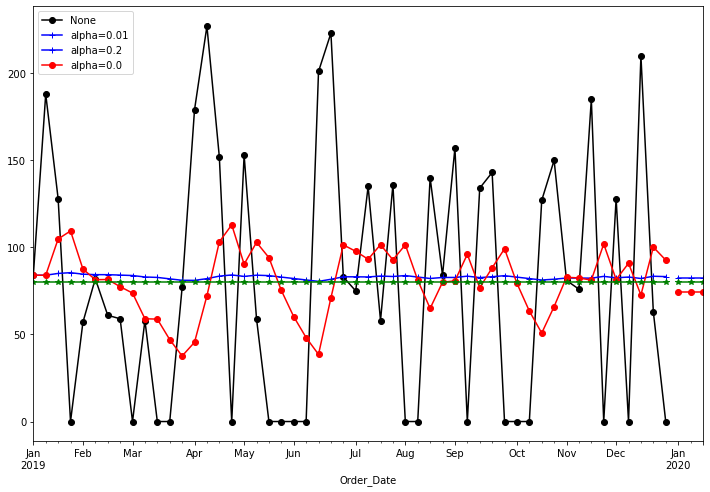

In [228]:
#First Instance
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.01,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.01')

#Second Instance
ins2 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.2')

#Third Instance
ins3 = SimpleExpSmoothing(data).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

#After creating model we will visualize the plot
ax = data.plot(marker='o', color='black', figsize=(12,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')



In [226]:
forcast = ins2.forecast(1)[0]
forcast

16.974327994284188

##### Draft

In [60]:
sub_cate_state = pd.merge(orders,glob, on=['Lat','Lon'])
sub_cate_state = sub_cate_state[['product category','sub-category','Quantity_y','state']]

In [61]:
sub_cate_demand = sub_cate_state.groupby(['product category','sub-category','state'])['Quantity_y'].sum().reset_index()



In [67]:
def cat_finder(df, cat, subcat):
    return df[(df['product category']==cat) & (df['sub-category']==subcat)]

sub_cate_demand

product category sub-category          state  Quantity_y
0                   A            f        Alabama    12115803
1                   A            f         Alaska      538176
2                   A            f        Arizona   137661467
3                   A            f       Arkansas     6850791
4                   A            f     California   725869502
...               ...          ...            ...         ...
2814                Y            s       Virginia     9446204
2815                Y            s     Washington    17692677
2816                Y            s  West Virginia      233943
2817                Y            s      Wisconsin     4269928
2818                Y            s        Wyoming        6950

[2819 rows x 4 columns]

In [ ]:
d = df['d'].values
sig = df['sig'].values

res = [x * y for x, y in zip(d, sig)]

# Task 3

#### a

In [72]:
fc_df = pd.read_csv('ISyE 6202 2022 Caseworks 3.1 and 3.2 Distribution and Fulfillment Centers location.csv')

In [73]:
fc_df

S. No. Role    ZIP             City State Country  ZIP_3        Lat  \
0        1   DC  31405         Savannah    GA      US    314  32.070088   
1        2   DC  92509    Jurupa Valley    CA      US    925  33.842416   
2        3   FC  30336          Atlanta    GA      US    303  33.822421   
3        4   FC  42276     Russellville    KY      US    422  36.907159   
4        5   FC  76164       Fort Worth    TX      US    761  32.756322   
5        6   FC  77078          Houston    TX      US    770  29.770498   
6        7   FC  92395      Victorville    CA      US    923  34.283624   
7        8   FC  95336          Manteca    CA      US    953  37.623269   
8        9   FC  97230         Portland    OR      US    972  45.527154   
9       10   FC  58801        Williston    ND      US    588  48.274431   
10      11   FC  80204           Denver    CO      US    802  39.736271   
11      12   FC  66115      Kansas City    KS      US    661  39.095282   
12      13   FC  60455       Bridgeview    IL      US    604  41.603865   
13      14   FC  48617            Clare    MI      US    486  43.649644   
14      15   FC  15205       Pittsburgh    PA      US    152  40.441678   
15      16   FC  19138     Philadelphia    PA      US    191  39.982446   
16      17   FC  21234        Parkville    MD      US    212  39.303552   
17      18   FC  11378          Maspeth    NY      US    113  40.742916   
18      19   FC   2118           Boston    MA      US     21  42.351704   
19      20   FC  33334  Fort Lauderdale    FL      US    333  26.148060   
20      21   FC  84044   Salt Lake City    UT      US    840  40.670132   
21      22   FC  85017          Phoenix    AZ      US    850  33.508011   

           Lon  
0   -81.117653  
1  -117.282294  
2   -84.342545  
3   -87.117858  
4   -97.271529  
5   -95.415197  
6  -117.286247  
7  -120.877263  
8  -122.682063  
9  -103.521921  
10 -104.997948  
11  -94.655244  
12  -87.898449  
13  -84.145876  
14  -79.983084  
15  -75.151008  
16  -76.628728  
17  -73.868601  
18  -71.077176  
19  -80.173884  
20 -111.753601  
21 -112.059435

In [172]:
sub_cate_dis['20d'] = sub_cate_dis['Order_Date'].apply(lambda x: datetime_to_num_of_twenty(dt_val=x))
sub_Qd_FC = sub_cate_dis.groupby(['ZIP','sub-category','20d'])['Quantity'].sum().reset_index()
sub_Qd_FC

NameError: name 'sub_cate_dis' is not defined

# Task 4

In [507]:
daily_orders_prd=huge_data_complete[['date','Product','Quantity','sub-category']]
daily_orders_prd

date  Product  Quantity sub-category
0         2023-01-01        1         0            f
1         2023-01-08        1       188            f
2         2023-01-15        1       128            f
3         2023-01-22        1         0            f
4         2023-01-29        1        57            f
...              ...      ...       ...          ...
63280729  2028-12-03      238         0            s
63280730  2028-12-10      238         0            s
63280731  2028-12-17      238         0            s
63280732  2028-12-24      238         0            s
63280733  2028-12-31      238         0            s

[63280734 rows x 4 columns]

In [ ]:
# Weekly Demand by product 2019 data
# Getting week value
daily_orders_prd_c=daily_orders_prd.copy()
daily_orders_prd_c['Week']= daily_orders_prd['Order_Date'].dt.isocalendar().week

daily_orders_prd_var=daily_orders_prd_c.groupby(['Product','sub-category','Week'])['Quantity'].var().reset_index() #calculate weekly variance for each product 
daily_orders_prd_c= pd.merge(daily_orders_prd_c,daily_orders_prd_var, on=['Product','sub-category','Week'])

daily_orders_prd_c= daily_orders_prd_c.rename(columns={'Quantity_x': 'Quantity', 'Quantity_y': 'Variance'}) #renamen col names
daily_orders_prd_c

In [ ]:
def coef_finder(demand, length):
    coef = demand/length

In [508]:
len(orders_raw)

713573